In [9]:
import subprocess
import pandas as pd
import numpy as np
import datetime

# 1. Write a function, given an ip address, output information of all TCP streams that involve this ip address, including stream's starting time, ending time, the other ip address, and stream's size in bytes

def mydateparser(time_in_secs):    
    return datetime.datetime.fromtimestamp(float(time_in_secs))

def read_traffic(filename, fields=[], display_filter="", timeseries=False, strict=False):
  
    if timeseries:
        fields = ["frame.time_epoch"] + fields
    fieldspec = " ".join("-e %s" % f for f in fields)

    display_filters = fields if strict else []
    if display_filter:
        display_filters.append(display_filters)
    filterspec = "-Y '%s'" % " and ".join(f for f in display_filters)

    options = "-r %s -n -T fields -Eheader=y" % filename
    cmd = "tshark %s %s %s" % (options, filterspec, fieldspec)
        
    proc = subprocess.Popen(cmd, shell = True, 
                                 stdout=subprocess.PIPE)
    if timeseries:
        df = pd.read_table(proc.stdout, 
                        index_col = "frame.time_epoch", 
                        parse_dates=True, 
                        date_parser=mydateparser)
    else:
        df = pd.read_table(proc.stdout)
    return df

def SortStreamsIP(ip = None):
    if (ip is None):
        return None
    
    streams = tcpstreams[(tcpstreams['Src IP']==ip) | (tcpstreams['Dest IP']==ip)]
    return streams
    

In [10]:
fields=["tcp.stream", "ip.src", "ip.dst", "tcp.len", "frame.time"]
ts=read_traffic("traffic_dump.pcap", fields, timeseries=True, strict=True)
#group the packets in streams
stream_group = ts.groupby("tcp.stream")
#use stream_group aggregate function to generate a data frame
tcpstreams=stream_group.agg({'frame.time':[np.min, np.max],'tcp.len':np.sum,'ip.dst':lambda x:x[0],'ip.src':lambda x:x[0]})
#rename the columns
tcpstreams.columns=['Stream Length', 'Start Time', 'End Time','Dest IP','Src IP']
#input the ip_addr
streams = SortStreamsIP('192.168.1.64')
streams



,Stream Length,Start Time,End Time,Dest IP,Src IP
tcp.stream,,,,,
0,0,"Jul 21, 2008 21:51:07.095278000 EDT","Jul 21, 2008 21:51:07.436746000 EDT",74.125.19.83,192.168.1.64
1,2565,"Jul 21, 2008 21:51:07.114897000 EDT","Jul 21, 2008 21:51:07.558553000 EDT",74.125.19.19,192.168.1.64
2,5158,"Jul 21, 2008 21:51:07.423663000 EDT","Jul 21, 2008 21:51:07.655556000 EDT",74.125.19.103,192.168.1.64
3,8266,"Jul 21, 2008 21:51:07.659558000 EDT","Jul 21, 2008 21:52:27.168965000 EDT",74.125.19.103,192.168.1.64
4,5017,"Jul 21, 2008 21:51:08.404617000 EDT","Jul 21, 2008 21:53:29.160668000 EDT",209.85.171.97,192.168.1.64
5,2521,"Jul 21, 2008 21:51:08.797425000 EDT","Jul 21, 2008 21:51:09.228901000 EDT",72.14.223.191,192.168.1.64
6,3067,"Jul 21, 2008 21:51:09.304315000 EDT","Jul 21, 2008 21:53:20.405529000 EDT",209.85.171.97,192.168.1.64
7,3369,"Jul 21, 2008 21:51:09.534025000 EDT","Jul 21, 2008 21:52:29.151718000 EDT",74.125.19.19,192.168.1.64
8,25630,"Jul 21, 2008 21:51:19.258123000 EDT","Jul 21, 2008 21:51:26.769411000 EDT",209.3.183.2,192.168.1.64


Populating the interactive namespace from numpy and matplotlib


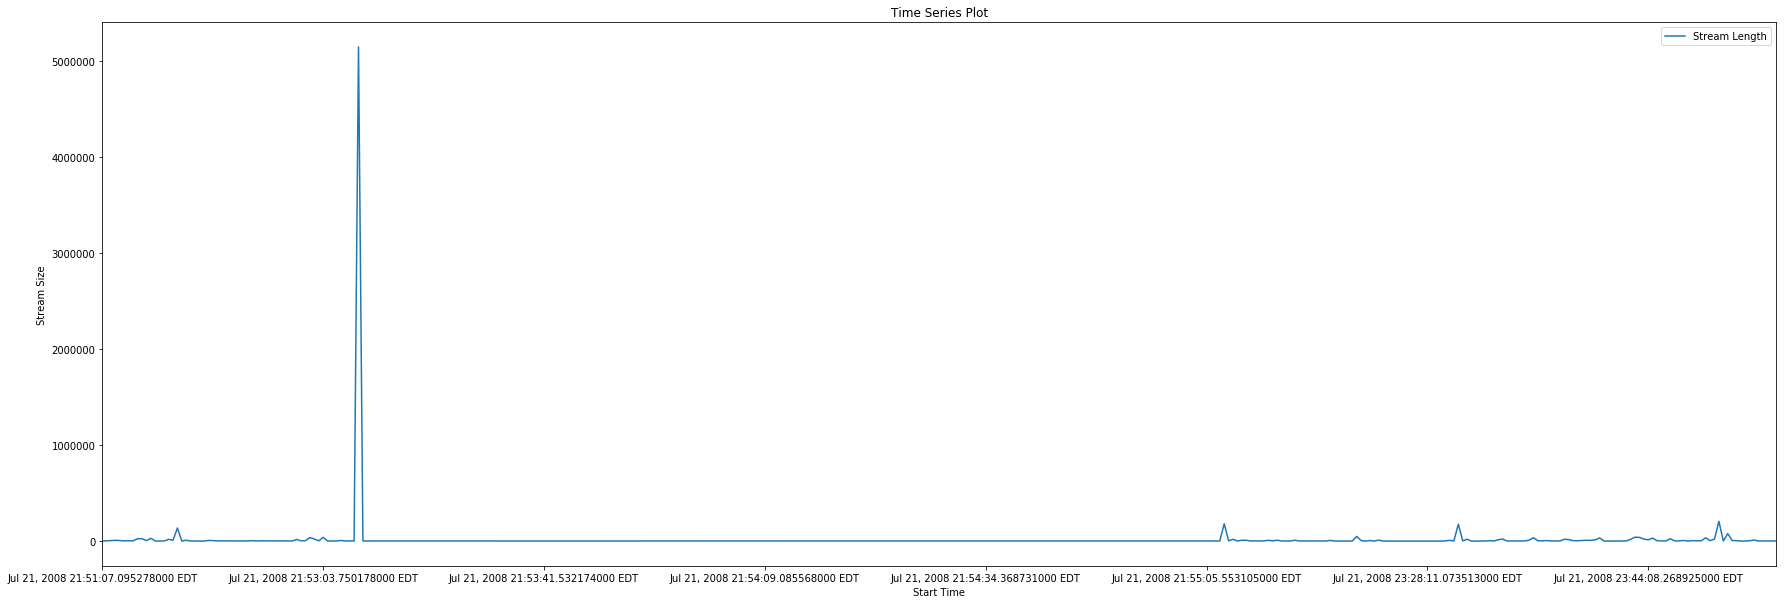

In [12]:
# 2. Use your function from task 1, get all streams of a given ip address (e.g. 192.168.1.64). Then Generate a time series plot of stream size over stream starting time.

import matplotlib.pyplot as plt

%matplotlib inline
%pylab inline

figsize(30,10)

streams.plot(x='Start Time', y='Stream Length')
xlabel('Start Time')
ylabel('Stream Size')
title("Time Series Plot")
plt.show()







# 3. Use the tool tcpflow to save all stream content to external files.


tcpflow -a -o tcpflow_streamanalysis -r traffic_dump.pcap






Prerits-MacBook-Pro:Assignment 2 preritchandok$ cd tcpflow_streamanalysis/
Prerits-MacBook-Pro:tcpflow_streamanalysis preritchandok$ ls
004.071.104.187.00080-192.168.015.004.35950
004.078.212.029.00080-192.168.015.004.35458
004.078.212.029.00080-192.168.015.004.35458-HTTPBODY-001.html
004.078.212.029.00080-192.168.015.004.35712
004.078.212.029.00080-192.168.015.004.35712-HTTPBODY-001.html
008.012.217.125.00080-192.168.015.004.32822
008.012.217.125.00080-192.168.015.004.32822-HTTPBODY-001.gif
008.012.217.125.00080-192.168.015.004.32822-HTTPBODY-002.gif
008.012.217.125.00080-192.168.015.004.32822-HTTPBODY-003.gif
008.012.217.125.00080-192.168.015.004.32822-HTTPBODY-004.gif
008.012.217.125.00080-192.168.015.004.32822-HTTPBODY-005.gif
008.012.217.125.00080-192.168.015.004.32822-HTTPBODY-006.gif
008.012.217.125.00080-192.168.015.004.32822-HTTPBODY-007.gif
008.012.217.125.00080-192.168.015.004.32822-HTTPBODY-008.jpg
008.012.217.125.00080-192.168.015.004.32822-HTTPBODY-009.gif
008.012.217.125.00080-192.168.015.004.32822-HTTPBODY-010.gif
008.012.217.125.00080-192.168.015.004.32822-HTTPBODY-011.gif
008.012.217.125.00080-192.168.015.004.32822-HTTPBODY-012.jpg
008.012.217.125.00080-192.168.015.004.32822-HTTPBODY-013.gif
008.012.217.125.00080-192.168.015.004.32822-HTTPBODY-014.gif
008.012.217.125.00080-192.168.015.004.32822-HTTPBODY-015.jpg
008.012.217.125.00080-192.168.015.004.32822-HTTPBODY-016.gif
008.012.217.125.00080-192.168.015.004.32822-HTTPBODY-017.jpg
008.012.217.125.00080-192.168.015.004.32822-HTTPBODY-018.gif
008.012.217.125.00080-192.168.015.004.32822-HTTPBODY-019.gif
008.012.217.125.00080-192.168.015.004.32824
008.012.217.125.00080-192.168.015.004.32824-HTTPBODY-001.gif
008.012.217.125.00080-192.168.015.004.32824-HTTPBODY-002.gif
008.012.217.125.00080-192.168.015.004.32824-HTTPBODY-003.gif
008.012.217.125.00080-192.168.015.004.32824-HTTPBODY-004.gif
008.012.217.125.00080-192.168.015.004.32824-HTTPBODY-005.gif
008.012.217.125.00080-192.168.015.004.32824-HTTPBODY-006.gif
008.012.217.125.00080-192.168.015.004.32824-HTTPBODY-007.jpg
008.012.217.125.00080-192.168.015.004.32824-HTTPBODY-008.jpg
008.012.217.125.00080-192.168.015.004.32824-HTTPBODY-009.gif
008.012.217.125.00080-192.168.015.004.32824-HTTPBODY-010.gif
008.012.217.125.00080-192.168.015.004.32824-HTTPBODY-011.gif
008.012.217.125.00080-192.168.015.004.32824-HTTPBODY-012.gif
008.012.217.125.00080-192.168.015.004.32824-HTTPBODY-013.jpg
008.012.217.125.00080-192.168.015.004.32828
008.012.217.125.00080-192.168.015.004.32828-HTTPBODY-001.gif
008.012.217.125.00080-192.168.015.004.32828-HTTPBODY-002.gif
008.012.217.125.00080-192.168.015.004.32828-HTTPBODY-003.gif
008.012.217.125.00080-192.168.015.004.32828-HTTPBODY-004.gif
008.012.217.125.00080-192.168.015.004.32828-HTTPBODY-005.gif
008.012.217.125.00080-192.168.015.004.32828-HTTPBODY-006.jpg
008.012.217.125.00080-192.168.015.004.32828-HTTPBODY-007.gif
008.012.217.125.00080-192.168.015.004.32828-HTTPBODY-008.jpg
008.012.217.125.00080-192.168.015.004.32830
008.012.217.125.00080-192.168.015.004.32830-HTTPBODY-001.gif
008.012.217.125.00080-192.168.015.004.32830-HTTPBODY-002.jpg
008.012.217.125.00080-192.168.015.004.32830-HTTPBODY-003.jpg
008.012.217.125.00080-192.168.015.004.32830-HTTPBODY-004.gif
008.012.217.125.00080-192.168.015.004.32830-HTTPBODY-005.jpg
008.012.217.125.00080-192.168.015.004.32830-HTTPBODY-006.jpg
008.012.221.123.00080-192.168.015.004.33298
008.012.221.123.00080-192.168.015.004.33298-HTTPBODY-001.gif
012.129.147.065.00080-192.168.001.064.34023
012.129.147.065.00080-192.168.001.064.34526
012.129.147.065.00080-192.168.001.064.39442
012.129.147.065.00080-192.168.001.064.40031
012.129.147.065.00080-192.168.001.064.41835
012.129.147.065.00080-192.168.015.004.33318
012.129.147.065.00080-192.168.015.004.33320
012.129.147.065.00080-192.168.015.004.34480
012.129.147.065.00080-192.168.015.004.34482
012.129.147.065.00080-192.168.015.004.35082
012.129.147.065.00080-192.168.015.004.35084
012.129.210.041.00080-192.168.015.004.35644
012.129.210.041.00080-192.168.015.004.35652
012.129.210.046.00080-192.168.015.004.35944
012.129.210.046.00080-192.168.015.004.35944-HTTPBODY-001.html
012.129.210.046.00080-192.168.015.004.35944-HTTPBODY-003.html
012.129.210.046.00080-192.168.015.004.36076
012.130.060.002.00080-192.168.015.004.35168
012.130.060.002.00080-192.168.015.004.35168-HTTPBODY-001.html
012.130.060.002.00080-192.168.015.004.35188
012.130.060.002.00080-192.168.015.004.35188-HTTPBODY-001.html
012.130.060.002.00080-192.168.015.004.35228
012.130.060.002.00080-192.168.015.004.35228-HTTPBODY-001.html
012.130.060.002.00080-192.168.015.004.35256
012.130.060.002.00080-192.168.015.004.35256-HTTPBODY-001.html
012.130.060.002.00080-192.168.015.004.36410
012.130.060.002.00080-192.168.015.004.36410-HTTPBODY-001.html
012.130.060.002.00080-192.168.015.004.36542
012.130.060.002.00080-192.168.015.004.36542-HTTPBODY-001.html
012.130.060.002.00080-192.168.015.004.36808
012.130.060.002.00080-192.168.015.004.36808-HTTPBODY-001.html
012.130.060.002.00443-192.168.015.004.32946
012.130.081.249.00080-192.168.015.004.35954
017.250.236.065.00080-192.168.001.064.34950
017.250.236.065.00080-192.168.001.064.38646
017.250.236.065.00080-192.168.015.004.33396
017.250.236.065.00080-192.168.015.004.33520
017.250.236.065.00080-192.168.015.004.33526
017.250.236.065.00080-192.168.015.004.33532
017.250.236.065.00080-192.168.015.004.36464
017.250.236.065.00080-192.168.015.004.36580
017.250.236.065.00080-192.168.015.004.36580-HTTPBODY-001
017.250.236.065.00080-192.168.015.004.36582
017.250.236.065.00080-192.168.015.004.36582-HTTPBODY-001
017.250.236.065.00080-192.168.015.004.36584
017.250.236.065.00080-192.168.015.004.36584-HTTPBODY-001
017.250.236.065.00080-192.168.015.004.36586
017.250.236.065.00080-192.168.015.004.36586-HTTPBODY-001
017.250.236.065.00080-192.168.015.004.36588
017.250.236.065.00080-192.168.015.004.36588-HTTPBODY-001
017.250.236.065.00443-192.168.001.064.41776
017.250.236.065.00443-192.168.015.004.33524
017.250.236.065.00443-192.168.015.004.33530
017.250.248.133.00443-192.168.015.004.34234
017.250.248.152.00080-192.168.015.004.34222
017.250.248.152.00080-192.168.015.004.34250
017.251.200.074.00080-192.168.015.004.36460
017.251.200.074.00080-192.168.015.004.36460-HTTPBODY-001.html
018.007.007.097.00080-192.168.001.064.37724
018.007.007.097.00080-192.168.001.064.37724-HTTPBODY-001
018.007.007.097.00080-192.168.015.004.32878
018.007.007.097.00080-192.168.015.004.32878-HTTPBODY-001
018.007.021.116.00080-192.168.001.064.37469
018.007.021.116.00080-192.168.001.064.37469-HTTPBODY-001.gif
018.007.021.116.00080-192.168.015.004.32890
018.007.021.116.00080-192.168.015.004.32890-HTTPBODY-001.gif
018.007.022.069.00080-192.168.001.064.36422
018.007.022.069.00080-192.168.001.064.36422-HTTPBODY-001.png
018.007.022.069.00080-192.168.001.064.36495
018.007.022.069.00080-192.168.001.064.36495-HTTPBODY-001.html
018.007.022.069.00080-192.168.001.064.37766
018.007.022.069.00080-192.168.001.064.37766-HTTPBODY-001.gif
018.007.022.069.00080-192.168.001.064.37901
018.007.022.069.00080-192.168.001.064.37901-HTTPBODY-001.css
018.007.022.069.00080-192.168.001.064.38563
018.007.022.069.00080-192.168.001.064.38563-HTTPBODY-001.gif
018.007.022.069.00080-192.168.001.064.38756
018.007.022.069.00080-192.168.001.064.38756-HTTPBODY-001.gif
018.007.022.069.00080-192.168.001.064.42800
018.007.022.069.00080-192.168.001.064.42800-HTTPBODY-001.gif
018.007.022.069.00080-192.168.001.064.48736
018.007.022.069.00080-192.168.001.064.48736-HTTPBODY-001.png
018.007.022.069.00080-192.168.001.064.49034
018.007.022.069.00080-192.168.001.064.49034-HTTPBODY-001.gif
018.007.022.069.00080-192.168.015.004.32866
018.007.022.069.00080-192.168.015.004.32866-HTTPBODY-001.html
018.007.022.069.00080-192.168.015.004.32868
018.007.022.069.00080-192.168.015.004.32868-HTTPBODY-001.css
018.007.022.069.00080-192.168.015.004.32870
018.007.022.069.00080-192.168.015.004.32870-HTTPBODY-001.gif
018.007.022.069.00080-192.168.015.004.32872
018.007.022.069.00080-192.168.015.004.32872-HTTPBODY-001.jpg
018.007.022.069.00080-192.168.015.004.32874
018.007.022.069.00080-192.168.015.004.32874-HTTPBODY-001.gif
018.007.022.069.00080-192.168.015.004.32876
018.007.022.069.00080-192.168.015.004.32876-HTTPBODY-001.jpg
018.007.022.069.00080-192.168.015.004.32880
018.007.022.069.00080-192.168.015.004.32880-HTTPBODY-001.gif
018.007.022.069.00080-192.168.015.004.32882
018.007.022.069.00080-192.168.015.004.32882-HTTPBODY-001.gif
018.007.022.069.00080-192.168.015.004.32884
018.007.022.069.00080-192.168.015.004.32884-HTTPBODY-001.png
018.007.022.069.00080-192.168.015.004.32886
018.007.022.069.00080-192.168.015.004.32886-HTTPBODY-001.png
018.007.022.069.00080-192.168.015.004.32892
018.007.022.069.00080-192.168.015.004.32892-HTTPBODY-001.gif
018.007.022.069.00080-192.168.015.004.32898
018.007.022.069.00080-192.168.015.004.32898-HTTPBODY-001.html
018.007.022.069.00080-192.168.015.004.32900
018.007.022.069.00080-192.168.015.004.32900-HTTPBODY-001.jpg
018.007.022.069.00080-192.168.015.004.32902
018.007.022.069.00080-192.168.015.004.32902-HTTPBODY-001.jpg
018.007.022.069.00080-192.168.015.004.32904
018.007.022.069.00080-192.168.015.004.32904-HTTPBODY-001.jpg
038.102.035.009.00080-192.168.015.004.35210
038.102.035.009.00080-192.168.015.004.35210-HTTPBODY-001.swf
038.102.035.009.00080-192.168.015.004.35210-HTTPBODY-002
038.102.035.009.00080-192.168.015.004.35210-HTTPBODY-003.swf
038.102.035.009.00080-192.168.015.004.35210-HTTPBODY-004
038.102.035.009.00080-192.168.015.004.35210-HTTPBODY-005
038.102.035.009.00080-192.168.015.004.35210-HTTPBODY-006
038.102.035.009.00080-192.168.015.004.36198
038.102.035.009.00080-192.168.015.004.36198-HTTPBODY-001
038.102.035.009.00080-192.168.015.004.36450
038.102.035.009.00080-192.168.015.004.36450-HTTPBODY-001
038.102.035.009.00080-192.168.015.004.36450-HTTPBODY-002.swf
038.102.035.009.00080-192.168.015.004.36450-HTTPBODY-003
038.102.035.018.00080-192.168.015.004.35318
038.102.035.018.00080-192.168.015.004.35318-HTTPBODY-001.gif
038.102.035.112.00080-192.168.015.004.35248
038.102.035.112.00080-192.168.015.004.35248-HTTPBODY-001.gif
038.102.035.112.00080-192.168.015.004.35282
038.102.035.112.00080-192.168.015.004.35282-HTTPBODY-001.gif
038.102.035.112.00080-192.168.015.004.36204
038.102.035.112.00080-192.168.015.004.36204-HTTPBODY-001.gif
038.102.035.112.00080-192.168.015.004.36458
038.102.035.112.00080-192.168.015.004.36458-HTTPBODY-001.gif
038.102.035.112.00080-192.168.015.004.36458-HTTPBODY-002.gif
038.102.035.167.00080-192.168.015.004.35216
038.102.035.167.00080-192.168.015.004.35216-HTTPBODY-001.png
038.102.035.167.00080-192.168.015.004.35222
038.102.035.167.00080-192.168.015.004.35222-HTTPBODY-001.html
038.102.035.167.00080-192.168.015.004.36206
038.102.035.167.00080-192.168.015.004.36206-HTTPBODY-001.png
038.102.035.167.00080-192.168.015.004.36206-HTTPBODY-002.html
038.102.035.167.00080-192.168.015.004.36456
038.102.035.167.00080-192.168.015.004.36456-HTTPBODY-001.png
038.102.035.167.00080-192.168.015.004.36522
038.102.035.167.00080-192.168.015.004.36522-HTTPBODY-001.html
038.102.035.167.00080-192.168.015.004.36856
038.102.035.167.00080-192.168.015.004.36856-HTTPBODY-001.png
038.102.035.167.00080-192.168.015.004.36856-HTTPBODY-002.html
038.102.035.230.00080-192.168.015.004.35270
038.102.035.230.00080-192.168.015.004.35270-HTTPBODY-001.gif
038.102.035.230.00080-192.168.015.004.35272
038.102.035.230.00080-192.168.015.004.35272-HTTPBODY-001.gif
038.102.035.230.00080-192.168.015.004.36104
038.102.035.230.00080-192.168.015.004.36104-HTTPBODY-001.gif
038.102.035.230.00080-192.168.015.004.36418
038.102.035.230.00080-192.168.015.004.36418-HTTPBODY-001.gif
038.102.035.230.00080-192.168.015.004.36418-HTTPBODY-002.gif
038.102.035.230.00080-192.168.015.004.36418-HTTPBODY-003.gif
038.102.035.230.00080-192.168.015.004.36418-HTTPBODY-004.gif
038.102.035.230.00080-192.168.015.004.36418-HTTPBODY-005.gif
038.102.035.230.00080-192.168.015.004.36420
038.102.035.230.00080-192.168.015.004.36420-HTTPBODY-001.gif
038.102.035.230.00080-192.168.015.004.36420-HTTPBODY-002.gif
038.102.035.230.00080-192.168.015.004.36420-HTTPBODY-003.gif
038.102.035.230.00080-192.168.015.004.36420-HTTPBODY-004.gif
038.102.035.230.00080-192.168.015.004.36420-HTTPBODY-005.gif
038.102.035.230.00080-192.168.015.004.36434
038.102.035.230.00080-192.168.015.004.36434-HTTPBODY-001.gif
038.102.035.230.00080-192.168.015.004.36438
038.102.035.230.00080-192.168.015.004.36438-HTTPBODY-001.gif
038.102.035.231.00080-192.168.015.004.36850
038.102.035.231.00080-192.168.015.004.36850-HTTPBODY-001.gif
063.088.212.182.00080-192.168.015.004.34886
063.088.212.182.00080-192.168.015.004.34886-HTTPBODY-001.gif
063.088.212.182.00080-192.168.015.004.34900
063.088.212.182.00080-192.168.015.004.34900-HTTPBODY-001.gif
063.088.212.182.00080-192.168.015.004.34902
063.088.212.182.00080-192.168.015.004.34902-HTTPBODY-001.gif
063.088.212.182.00080-192.168.015.004.34904
063.088.212.182.00080-192.168.015.004.34904-HTTPBODY-001.gif
063.088.212.182.00080-192.168.015.004.34912
063.088.212.182.00080-192.168.015.004.34912-HTTPBODY-001.gif
063.088.212.182.00080-192.168.015.004.34914
063.088.212.182.00080-192.168.015.004.34914-HTTPBODY-001.gif
063.088.212.182.00080-192.168.015.004.34922
063.088.212.182.00080-192.168.015.004.34922-HTTPBODY-001.gif
063.088.212.182.00080-192.168.015.004.34934
063.088.212.182.00080-192.168.015.004.34934-HTTPBODY-001.gif
063.088.212.182.00080-192.168.015.004.34938
063.088.212.182.00080-192.168.015.004.34938-HTTPBODY-001.gif
063.088.212.182.00080-192.168.015.004.35006
063.088.212.182.00080-192.168.015.004.35006-HTTPBODY-001.gif
063.088.212.182.00080-192.168.015.004.35008
063.088.212.182.00080-192.168.015.004.35008-HTTPBODY-001.gif
063.111.024.075.00080-192.168.015.004.34418
063.111.024.075.00080-192.168.015.004.34418-HTTPBODY-001.html
063.111.024.075.00080-192.168.015.004.34420
063.111.024.075.00080-192.168.015.004.34420-HTTPBODY-001
063.111.024.075.00080-192.168.015.004.34548
063.111.024.075.00080-192.168.015.004.34548-HTTPBODY-001.html
063.111.024.075.00080-192.168.015.004.34550
063.111.024.075.00080-192.168.015.004.34550-HTTPBODY-001
063.165.133.216.00080-192.168.015.004.33516
063.165.133.216.00080-192.168.015.004.33516-HTTPBODY-001
063.208.196.095.00443-192.168.001.064.45661
063.217.008.057.00080-192.168.015.004.33506
063.217.008.057.00080-192.168.015.004.33506-HTTPBODY-001
063.241.243.020.00080-192.168.001.064.40470
063.241.243.020.00080-192.168.001.064.40470-HTTPBODY-001.html
063.241.243.020.00080-192.168.001.064.40470-HTTPBODY-002.html
063.241.243.020.00080-192.168.001.064.40470-HTTPBODY-003.html
063.241.243.020.00080-192.168.001.064.40470-HTTPBODY-004.html
063.241.243.020.00080-192.168.001.064.40470-HTTPBODY-005.html
063.241.243.020.00080-192.168.001.064.40470-HTTPBODY-006.html
063.241.243.020.00080-192.168.001.064.48729
063.241.243.020.00080-192.168.001.064.48729-HTTPBODY-001.html
063.241.243.020.00080-192.168.001.064.49039
063.241.243.020.00080-192.168.001.064.49039-HTTPBODY-001.html
063.245.209.121.00080-192.168.001.064.38869
063.245.209.121.00080-192.168.001.064.38869-HTTPBODY-001.html
063.245.209.121.00080-192.168.001.064.47691
063.245.209.121.00080-192.168.001.064.47691-HTTPBODY-001.html
063.247.140.161.00080-192.168.001.064.39751
063.247.140.161.00080-192.168.001.064.43192
063.247.140.161.00080-192.168.001.064.43192-HTTPBODY-001.xml
063.247.140.161.00080-192.168.015.004.33334
063.247.140.161.00080-192.168.015.004.34494
063.247.140.161.00080-192.168.015.004.35098
064.004.021.061.00080-192.168.001.064.43821
064.004.021.061.00080-192.168.001.064.43821-HTTPBODY-002
064.004.023.190.00080-192.168.015.004.34650
064.004.023.190.00080-192.168.015.004.34650-HTTPBODY-002
064.012.030.040.05190-192.168.015.004.34292
064.012.160.138.00443-192.168.001.064.38341
064.012.187.025.00080-192.168.001.064.46912
064.012.187.025.00080-192.168.001.064.46912-HTTPBODY-001.xsm
064.012.187.025.00080-192.168.001.064.46912-HTTPBODY-002.xsm
064.012.187.025.00080-192.168.001.064.46912-HTTPBODY-003.xsm
064.012.201.038.05190-192.168.015.004.36548
064.012.201.042.05190-192.168.015.004.34290
064.079.161.090.00080-192.168.015.004.32856
064.079.161.090.00080-192.168.015.004.32856-HTTPBODY-001.html
064.079.161.090.00080-192.168.015.004.34910
064.079.161.090.00080-192.168.015.004.34910-HTTPBODY-001.html
064.079.161.090.00080-192.168.015.004.34910-HTTPBODY-002.html
064.079.161.090.00080-192.168.015.004.35672
064.079.161.090.00080-192.168.015.004.35672-HTTPBODY-001.html
064.094.186.012.00080-192.168.015.004.35154
064.094.186.012.00080-192.168.015.004.35154-HTTPBODY-001.gif
064.094.186.012.00080-192.168.015.004.35184
064.094.186.012.00080-192.168.015.004.35184-HTTPBODY-001.gif
064.094.186.012.00080-192.168.015.004.35224
064.094.186.012.00080-192.168.015.004.35224-HTTPBODY-001.gif
064.094.186.012.00080-192.168.015.004.35250
064.094.186.012.00080-192.168.015.004.35250-HTTPBODY-001.gif
064.094.186.012.00080-192.168.015.004.35350
064.094.186.012.00080-192.168.015.004.35350-HTTPBODY-001.gif
064.094.186.012.00080-192.168.015.004.35574
064.094.186.012.00080-192.168.015.004.35574-HTTPBODY-001.gif
064.094.186.012.00080-192.168.015.004.35578
064.094.186.012.00080-192.168.015.004.35578-HTTPBODY-001.gif
064.094.186.012.00080-192.168.015.004.35608
064.094.186.012.00080-192.168.015.004.35608-HTTPBODY-001.gif
064.094.186.012.00080-192.168.015.004.35726
064.094.186.012.00080-192.168.015.004.35726-HTTPBODY-001.gif
064.094.186.012.00080-192.168.015.004.36012
064.094.186.012.00080-192.168.015.004.36012-HTTPBODY-001.gif
064.094.186.012.00080-192.168.015.004.36070
064.094.186.012.00080-192.168.015.004.36070-HTTPBODY-001.gif
064.094.186.012.00080-192.168.015.004.36086
064.094.186.012.00080-192.168.015.004.36086-HTTPBODY-001.gif
064.094.186.012.00080-192.168.015.004.36208
064.094.186.012.00080-192.168.015.004.36208-HTTPBODY-001.gif
064.094.186.012.00080-192.168.015.004.36302
064.094.186.012.00080-192.168.015.004.36302-HTTPBODY-001.gif
064.094.186.012.00080-192.168.015.004.36362
064.094.186.012.00080-192.168.015.004.36362-HTTPBODY-001.gif
064.094.186.012.00080-192.168.015.004.36372
064.094.186.012.00080-192.168.015.004.36372-HTTPBODY-001.gif
064.094.186.012.00080-192.168.015.004.36384
064.094.186.012.00080-192.168.015.004.36384-HTTPBODY-001.gif
064.094.186.012.00080-192.168.015.004.36400
064.094.186.012.00080-192.168.015.004.36400-HTTPBODY-001.gif
064.094.186.012.00080-192.168.015.004.36534
064.094.186.012.00080-192.168.015.004.36534-HTTPBODY-001.gif
064.094.186.012.00080-192.168.015.004.36802
064.094.186.012.00080-192.168.015.004.36802-HTTPBODY-001.gif
064.094.186.012.00080-192.168.015.004.36832
064.094.186.012.00080-192.168.015.004.36832-HTTPBODY-001.gif
064.128.080.061.00080-192.168.015.004.34268
064.128.080.061.00080-192.168.015.004.34268-HTTPBODY-001.html
064.128.080.061.00080-192.168.015.004.36414
064.128.080.061.00080-192.168.015.004.36414-HTTPBODY-001.html
064.233.187.190.00080-192.168.001.064.45685
064.233.187.190.00080-192.168.001.064.45685-HTTPBODY-001.html
064.236.016.139.00080-192.168.015.004.32948
064.236.016.139.00080-192.168.015.004.32948-HTTPBODY-001.gif
064.236.016.139.00080-192.168.015.004.32948-HTTPBODY-002
064.236.022.071.00080-192.168.015.004.32964
064.236.022.071.00080-192.168.015.004.32964-HTTPBODY-001.gif
064.236.022.103.00080-192.168.015.004.32924
064.236.022.103.00080-192.168.015.004.32924-HTTPBODY-001.html
064.236.022.103.00080-192.168.015.004.32924-HTTPBODY-002.html
064.236.022.103.00080-192.168.015.004.32924-HTTPBODY-003.html
064.236.022.103.00080-192.168.015.004.32938
064.236.022.103.00080-192.168.015.004.32938-HTTPBODY-001.html
064.236.022.103.00080-192.168.015.004.32938-HTTPBODY-002.html
064.236.022.103.00080-192.168.015.004.32938-HTTPBODY-003
064.236.022.103.00080-192.168.015.004.32940
064.236.022.103.00080-192.168.015.004.32940-HTTPBODY-001.html
064.236.022.103.00080-192.168.015.004.32942
064.236.022.103.00080-192.168.015.004.32942-HTTPBODY-001.html
064.236.022.103.00080-192.168.015.004.32942-HTTPBODY-002.html
064.236.022.201.00080-192.168.015.004.32926
064.236.022.201.00080-192.168.015.004.32926-HTTPBODY-001.html
064.236.022.201.00080-192.168.015.004.32926-HTTPBODY-002.html
064.236.029.201.00080-192.168.015.004.32968
064.236.029.201.00080-192.168.015.004.32968-HTTPBODY-001.html
064.236.029.201.00080-192.168.015.004.32968-HTTPBODY-002
064.236.068.229.00080-192.168.001.064.34092
064.236.068.229.00080-192.168.001.064.34092-HTTPBODY-001.html
064.236.068.229.00080-192.168.001.064.34092-HTTPBODY-002
064.236.076.160.00080-192.168.015.004.34892
064.236.076.160.00080-192.168.015.004.34892-HTTPBODY-001
064.236.076.160.00080-192.168.015.004.34892-HTTPBODY-002
064.236.076.160.00080-192.168.015.004.34892-HTTPBODY-003
064.236.076.160.00080-192.168.015.004.34892-HTTPBODY-004
064.236.076.160.00080-192.168.015.004.34892-HTTPBODY-005
064.236.076.160.00080-192.168.015.004.34950
064.236.076.160.00080-192.168.015.004.34950-HTTPBODY-001
064.236.076.160.00080-192.168.015.004.34950-HTTPBODY-002
064.236.076.160.00080-192.168.015.004.34950-HTTPBODY-003
064.236.076.160.00080-192.168.015.004.34950-HTTPBODY-004
064.236.076.160.00080-192.168.015.004.35908
064.236.076.160.00080-192.168.015.004.35908-HTTPBODY-001
064.236.076.160.00080-192.168.015.004.35908-HTTPBODY-002
064.236.076.160.00080-192.168.015.004.35908-HTTPBODY-003
064.236.076.160.00080-192.168.015.004.35908-HTTPBODY-004
064.236.076.160.00080-192.168.015.004.35908-HTTPBODY-005
064.236.076.160.00080-192.168.015.004.35908-HTTPBODY-006
064.236.076.160.00080-192.168.015.004.35910
064.236.076.160.00080-192.168.015.004.35910-HTTPBODY-001
064.236.076.160.00080-192.168.015.004.35910-HTTPBODY-002
064.236.076.160.00080-192.168.015.004.35910-HTTPBODY-003
064.236.076.160.00080-192.168.015.004.35910-HTTPBODY-004
064.236.091.021.00080-192.168.015.004.32914
064.236.091.021.00080-192.168.015.004.32914-HTTPBODY-001.html
064.236.091.021.00080-192.168.015.004.32914-HTTPBODY-002.ico
064.236.091.021.00080-192.168.015.004.32914-HTTPBODY-003.gif
064.236.091.021.00080-192.168.015.004.32914-HTTPBODY-004.jpg
064.236.091.021.00080-192.168.015.004.32914-HTTPBODY-005.html
064.236.091.021.00080-192.168.015.004.32944
065.054.179.216.00443-192.168.015.004.36524
065.054.186.047.00443-192.168.015.004.36532
065.054.186.077.00080-192.168.015.004.35462
065.054.186.077.00080-192.168.015.004.35462-HTTPBODY-001.html
065.054.186.077.00080-192.168.015.004.35464
065.054.186.077.00080-192.168.015.004.35464-HTTPBODY-001.html
065.054.186.077.00080-192.168.015.004.35466
065.054.186.077.00080-192.168.015.004.35466-HTTPBODY-001.css
065.054.186.077.00080-192.168.015.004.35468
065.054.186.077.00080-192.168.015.004.35468-HTTPBODY-001.gif
065.054.186.077.00080-192.168.015.004.35472
065.054.186.077.00080-192.168.015.004.35472-HTTPBODY-001.gif
065.054.186.077.00080-192.168.015.004.35716
065.054.186.077.00080-192.168.015.004.35716-HTTPBODY-001.html
065.054.186.077.00080-192.168.015.004.35718
065.054.186.077.00080-192.168.015.004.35718-HTTPBODY-001.gif
065.054.239.020.01863-192.168.015.004.36512
065.055.013.158.00080-192.168.015.004.35342
065.055.013.158.00080-192.168.015.004.35596
065.055.013.158.00080-192.168.015.004.35596-HTTPBODY-002
065.055.013.158.00080-192.168.015.004.35600
065.055.013.158.00443-192.168.015.004.35594
065.055.015.242.00080-192.168.015.004.33362
065.055.015.242.00080-192.168.015.004.33362-HTTPBODY-001.html
065.055.015.242.00080-192.168.015.004.33362-HTTPBODY-002.html
065.175.087.070.00080-192.168.001.064.37679
065.175.087.070.00080-192.168.001.064.41607
065.175.087.070.00080-192.168.001.064.41607-HTTPBODY-001.gif
065.182.192.074.00080-192.168.015.004.34654
065.182.192.074.00080-192.168.015.004.34654-HTTPBODY-001.html
065.182.192.074.00080-192.168.015.004.34656
065.182.192.074.00080-192.168.015.004.34656-HTTPBODY-001
065.182.192.074.00080-192.168.015.004.34656-HTTPBODY-002
065.182.192.074.00080-192.168.015.004.34656-HTTPBODY-003
065.182.192.074.00080-192.168.015.004.34656-HTTPBODY-004.css
065.182.192.074.00080-192.168.015.004.34656-HTTPBODY-005.css
065.182.192.074.00080-192.168.015.004.34656-HTTPBODY-006.css
065.182.192.074.00080-192.168.015.004.34656-HTTPBODY-007.css
065.182.192.074.00080-192.168.015.004.34656-HTTPBODY-008.ico
065.182.192.074.00080-192.168.015.004.34656-HTTPBODY-009
065.182.192.074.00080-192.168.015.004.34656-HTTPBODY-010
065.182.192.074.00080-192.168.015.004.34656-HTTPBODY-011
065.182.192.074.00080-192.168.015.004.34656-HTTPBODY-012.jpg
065.182.192.074.00080-192.168.015.004.34656-HTTPBODY-013.gif
065.182.192.074.00080-192.168.015.004.34656-HTTPBODY-014.html
065.182.192.074.00080-192.168.015.004.34662
065.182.192.074.00080-192.168.015.004.34662-HTTPBODY-001
065.182.192.074.00080-192.168.015.004.34662-HTTPBODY-002
065.182.192.074.00080-192.168.015.004.34662-HTTPBODY-003
065.182.192.074.00080-192.168.015.004.34662-HTTPBODY-004.css
065.182.192.074.00080-192.168.015.004.34662-HTTPBODY-005
065.182.192.074.00080-192.168.015.004.34662-HTTPBODY-006.jpg
065.182.192.074.00080-192.168.015.004.34662-HTTPBODY-007.gif
065.182.192.074.00080-192.168.015.004.34662-HTTPBODY-008.gif
065.182.192.074.00080-192.168.015.004.34662-HTTPBODY-009.html
065.182.192.074.00080-192.168.015.004.34672
065.182.192.074.00080-192.168.015.004.34672-HTTPBODY-001
065.182.192.074.00080-192.168.015.004.34672-HTTPBODY-002
065.182.192.074.00080-192.168.015.004.34678
065.182.192.074.00080-192.168.015.004.34678-HTTPBODY-001.html
065.182.192.074.00080-192.168.015.004.34680
065.182.192.074.00080-192.168.015.004.34680-HTTPBODY-001.html
065.182.192.074.00080-192.168.015.004.34702
065.182.192.074.00080-192.168.015.004.34702-HTTPBODY-001.html
065.182.192.074.00080-192.168.015.004.34704
065.182.192.074.00080-192.168.015.004.34704-HTTPBODY-001.html
065.182.192.074.00080-192.168.015.004.34706
065.182.192.074.00080-192.168.015.004.34708
065.182.192.074.00080-192.168.015.004.34708-HTTPBODY-001.html
065.182.192.074.00080-192.168.015.004.34710
065.182.192.074.00080-192.168.015.004.34712
065.182.192.074.00080-192.168.015.004.34712-HTTPBODY-001.swf
065.182.192.074.00080-192.168.015.004.34712-HTTPBODY-002.jpg
065.182.192.074.00080-192.168.015.004.34712-HTTPBODY-003.jpg
065.182.192.074.00080-192.168.015.004.34712-HTTPBODY-004.jpg
065.182.192.074.00080-192.168.015.004.34712-HTTPBODY-005.jpg
065.182.192.074.00080-192.168.015.004.34712-HTTPBODY-006.gif
065.182.192.074.00080-192.168.015.004.34712-HTTPBODY-007.png
065.182.192.074.00080-192.168.015.004.34712-HTTPBODY-008.gif
065.182.192.074.00080-192.168.015.004.34712-HTTPBODY-009.gif
065.182.192.074.00080-192.168.015.004.34712-HTTPBODY-010.gif
065.182.192.074.00080-192.168.015.004.34712-HTTPBODY-011.gif
065.182.192.074.00080-192.168.015.004.34712-HTTPBODY-012.gif
065.182.192.074.00080-192.168.015.004.34712-HTTPBODY-013.gif
065.182.192.074.00080-192.168.015.004.34712-HTTPBODY-014.gif
065.182.192.074.00080-192.168.015.004.34712-HTTPBODY-015.jpg
065.182.192.074.00080-192.168.015.004.34712-HTTPBODY-016.gif
065.182.192.074.00080-192.168.015.004.34712-HTTPBODY-017.jpg
065.182.192.074.00080-192.168.015.004.34712-HTTPBODY-018.html
065.182.192.074.00080-192.168.015.004.34712-HTTPBODY-019.gif
065.182.192.074.00080-192.168.015.004.34712-HTTPBODY-020.gif
065.182.192.074.00080-192.168.015.004.34712-HTTPBODY-021.gif
065.182.192.074.00080-192.168.015.004.34712-HTTPBODY-022.gif
065.182.192.074.00080-192.168.015.004.34712-HTTPBODY-023.gif
065.182.192.074.00080-192.168.015.004.34714
065.182.192.074.00080-192.168.015.004.34714-HTTPBODY-001.html
065.182.192.074.00080-192.168.015.004.34716
065.182.192.074.00080-192.168.015.004.34716-HTTPBODY-001.gif
065.182.192.074.00080-192.168.015.004.34716-HTTPBODY-002.gif
065.182.192.074.00080-192.168.015.004.34716-HTTPBODY-003.jpg
065.182.192.074.00080-192.168.015.004.34716-HTTPBODY-004.gif
065.182.192.074.00080-192.168.015.004.34716-HTTPBODY-005.gif
065.182.192.074.00080-192.168.015.004.34716-HTTPBODY-006.gif
065.182.192.074.00080-192.168.015.004.34716-HTTPBODY-007.gif
065.182.192.074.00080-192.168.015.004.34716-HTTPBODY-008.gif
065.182.192.074.00080-192.168.015.004.34716-HTTPBODY-009.gif
065.203.229.041.00080-192.168.015.004.34896
065.203.229.041.00080-192.168.015.004.34918
065.203.229.041.00080-192.168.015.004.34918-HTTPBODY-001.html
065.205.008.052.00080-192.168.015.004.34206
065.205.008.052.00080-192.168.015.004.34206-HTTPBODY-001
065.207.183.121.00080-192.168.015.004.33916
065.207.183.121.00080-192.168.015.004.33916-HTTPBODY-001.html
065.207.183.121.00080-192.168.015.004.33918
065.207.183.121.00080-192.168.015.004.33918-HTTPBODY-001
065.207.183.121.00080-192.168.015.004.34634
065.207.183.121.00080-192.168.015.004.34634-HTTPBODY-001.html
065.207.183.121.00080-192.168.015.004.34636
065.207.183.121.00080-192.168.015.004.34636-HTTPBODY-001
065.207.183.121.00080-192.168.015.004.35302
065.207.183.121.00080-192.168.015.004.35302-HTTPBODY-001.html
065.207.183.121.00080-192.168.015.004.35304
065.207.183.121.00080-192.168.015.004.35304-HTTPBODY-001
065.212.118.021.00080-192.168.001.064.33410
065.212.118.021.00080-192.168.001.064.33410-HTTPBODY-001.html
065.212.121.021.00080-192.168.001.064.33756
065.212.121.021.00080-192.168.001.064.33756-HTTPBODY-001
065.212.121.021.00080-192.168.001.064.35700
065.212.121.021.00080-192.168.001.064.35700-HTTPBODY-001.html
065.212.121.021.00080-192.168.001.064.40320
065.212.121.021.00080-192.168.001.064.40320-HTTPBODY-001.html
065.212.121.021.00080-192.168.001.064.45039
065.212.121.021.00080-192.168.001.064.45039-HTTPBODY-001
065.212.121.021.00080-192.168.015.004.33002
065.212.121.021.00080-192.168.015.004.33002-HTTPBODY-001.html
065.212.121.021.00080-192.168.015.004.33004
065.212.121.021.00080-192.168.015.004.33004-HTTPBODY-001
065.212.121.021.00080-192.168.015.004.36566
065.212.121.021.00080-192.168.015.004.36566-HTTPBODY-001.html
065.212.121.021.00080-192.168.015.004.36572
065.212.121.021.00080-192.168.015.004.36572-HTTPBODY-001
065.242.027.032.00080-192.168.015.004.35590
065.242.027.032.00080-192.168.015.004.35590-HTTPBODY-001.html
065.242.027.032.00080-192.168.015.004.35616
065.242.027.032.00080-192.168.015.004.35616-HTTPBODY-001.html
066.011.048.136.00080-192.168.015.004.36416
066.011.048.136.00080-192.168.015.004.36416-HTTPBODY-001.jpg
066.011.048.136.00080-192.168.015.004.36422
066.011.048.136.00080-192.168.015.004.36422-HTTPBODY-001.jpg
066.011.048.136.00080-192.168.015.004.36432
066.011.048.136.00080-192.168.015.004.36432-HTTPBODY-001.jpg
066.011.048.136.00080-192.168.015.004.36436
066.011.048.136.00080-192.168.015.004.36436-HTTPBODY-001.jpg
066.011.048.136.00080-192.168.015.004.36440
066.011.048.136.00080-192.168.015.004.36440-HTTPBODY-001.jpg
066.011.048.136.00080-192.168.015.004.36442
066.011.048.136.00080-192.168.015.004.36442-HTTPBODY-001.jpg
066.011.048.136.00080-192.168.015.004.36444
066.011.048.136.00080-192.168.015.004.36444-HTTPBODY-001.jpg
066.033.212.043.00080-192.168.001.064.38049
066.033.212.043.00080-192.168.001.064.38652
066.033.212.043.00080-192.168.001.064.38652-HTTPBODY-001
066.033.212.043.00080-192.168.015.004.33348
066.033.212.043.00080-192.168.015.004.34508
066.033.212.043.00080-192.168.015.004.35110
066.035.234.149.00080-192.168.015.004.34844
066.035.234.150.00080-192.168.001.064.39530
066.039.211.225.00080-192.168.015.004.34726
066.039.211.225.00080-192.168.015.004.34726-HTTPBODY-001.html
066.039.211.225.00080-192.168.015.004.34728
066.039.211.225.00080-192.168.015.004.34728-HTTPBODY-001.html
066.039.211.225.00080-192.168.015.004.34728-HTTPBODY-002
066.039.211.225.00080-192.168.015.004.34728-HTTPBODY-003.gif
066.039.211.225.00080-192.168.015.004.34728-HTTPBODY-004.gif
066.039.211.225.00080-192.168.015.004.34728-HTTPBODY-005.jpg
066.039.211.225.00080-192.168.015.004.34728-HTTPBODY-006.swf
066.039.211.225.00080-192.168.015.004.34728-HTTPBODY-007.html
066.039.211.225.00080-192.168.015.004.34728-HTTPBODY-008.gif
066.039.211.225.00080-192.168.015.004.34730
066.039.211.225.00080-192.168.015.004.34730-HTTPBODY-001
066.039.211.225.00080-192.168.015.004.34730-HTTPBODY-002
066.039.211.225.00080-192.168.015.004.34732
066.039.211.225.00080-192.168.015.004.34732-HTTPBODY-001.jpg
066.094.226.022.00080-192.168.015.004.33064
066.094.226.022.00080-192.168.015.004.33064-HTTPBODY-001.jpg
066.094.226.022.00080-192.168.015.004.35666
066.094.226.022.00080-192.168.015.004.35666-HTTPBODY-001.jpg
066.094.234.072.00080-192.168.015.004.33082
066.094.234.072.00080-192.168.015.004.33082-HTTPBODY-001.gif
066.094.234.072.00080-192.168.015.004.33112
066.094.234.072.00080-192.168.015.004.33112-HTTPBODY-001.gif
066.094.234.072.00080-192.168.015.004.34174
066.094.234.072.00080-192.168.015.004.34174-HTTPBODY-001.gif
066.094.234.072.00080-192.168.015.004.34202
066.094.234.072.00080-192.168.015.004.34202-HTTPBODY-001.gif
066.094.234.072.00080-192.168.015.004.34246
066.094.234.072.00080-192.168.015.004.34246-HTTPBODY-001.gif
066.094.234.072.00080-192.168.015.004.35164
066.094.234.072.00080-192.168.015.004.35164-HTTPBODY-001.gif
066.094.234.072.00080-192.168.015.004.35166
066.094.234.072.00080-192.168.015.004.35358
066.094.234.072.00080-192.168.015.004.35358-HTTPBODY-001.gif
066.094.234.072.00080-192.168.015.004.35364
066.094.234.072.00080-192.168.015.004.35612
066.094.234.072.00080-192.168.015.004.35612-HTTPBODY-001.gif
066.094.234.072.00080-192.168.015.004.35614
066.094.234.072.00080-192.168.015.004.35660
066.094.234.072.00080-192.168.015.004.35660-HTTPBODY-001.gif
066.094.234.072.00080-192.168.015.004.35668
066.094.234.072.00080-192.168.015.004.35668-HTTPBODY-001.gif
066.094.234.072.00080-192.168.015.004.36094
066.094.234.072.00080-192.168.015.004.36094-HTTPBODY-001.gif
066.094.234.072.00080-192.168.015.004.36096
066.094.234.072.00080-192.168.015.004.36308
066.094.234.072.00080-192.168.015.004.36308-HTTPBODY-001.gif
066.094.234.072.00080-192.168.015.004.36312
066.094.234.072.00080-192.168.015.004.36388
066.094.234.072.00080-192.168.015.004.36388-HTTPBODY-001.gif
066.094.234.072.00080-192.168.015.004.36390
066.094.234.072.00080-192.168.015.004.36404
066.094.234.072.00080-192.168.015.004.36404-HTTPBODY-001.gif
066.094.234.072.00080-192.168.015.004.36408
066.094.234.072.00080-192.168.015.004.36840
066.094.234.072.00080-192.168.015.004.36840-HTTPBODY-001.gif
066.094.234.072.00080-192.168.015.004.36842
066.098.172.025.00080-192.168.015.004.35996
066.098.172.025.00080-192.168.015.004.35996-HTTPBODY-001.png
066.098.172.025.00080-192.168.015.004.36052
066.098.172.025.00080-192.168.015.004.36052-HTTPBODY-001.png
066.102.001.091.00080-192.168.015.004.34664
066.102.001.091.00080-192.168.015.004.34734
066.102.001.091.00080-192.168.015.004.34738
066.102.001.091.00080-192.168.015.004.34740
066.102.001.091.00080-192.168.015.004.34768
066.102.001.091.00080-192.168.015.004.34770
066.102.001.091.00080-192.168.015.004.34776
066.102.001.091.00080-192.168.015.004.34778
066.102.001.091.00080-192.168.015.004.34786
066.102.001.091.00080-192.168.015.004.34788
066.102.001.091.00080-192.168.015.004.34794
066.102.001.091.00080-192.168.015.004.34796
066.102.001.091.00080-192.168.015.004.34798
066.102.001.091.00080-192.168.015.004.34798-HTTPBODY-001.html
066.102.001.091.00080-192.168.015.004.34808
066.102.001.091.00080-192.168.015.004.34822
066.102.001.091.00080-192.168.015.004.34824
066.102.001.136.00080-192.168.001.064.42292
066.102.001.136.00080-192.168.001.064.42292-HTTPBODY-001.html
066.114.048.022.00080-192.168.015.004.35676
066.114.048.022.00080-192.168.015.004.35676-HTTPBODY-001.gif
066.114.048.034.00080-192.168.015.004.35530
066.114.048.034.00080-192.168.015.004.35530-HTTPBODY-001
066.114.048.049.00080-192.168.015.004.32888
066.114.048.049.00080-192.168.015.004.32888-HTTPBODY-001
066.114.050.083.00080-192.168.015.004.32858
066.114.050.083.00080-192.168.015.004.32858-HTTPBODY-001.gif
066.114.051.016.00080-192.168.015.004.33328
066.114.051.018.00080-192.168.015.004.33332
066.114.051.020.00080-192.168.001.064.42018
066.114.051.020.00080-192.168.001.064.42018-HTTPBODY-001
066.114.051.020.00080-192.168.015.004.35090
066.114.051.021.00080-192.168.001.064.33372
066.114.051.021.00080-192.168.001.064.33372-HTTPBODY-001
066.114.051.028.00080-192.168.015.004.34492
066.114.051.038.00080-192.168.001.064.42185
066.114.051.044.00080-192.168.015.004.34490
066.114.051.044.00080-192.168.015.004.35092
066.114.051.046.00080-192.168.001.064.41743
066.114.051.047.00080-192.168.001.064.40677
066.114.051.047.00080-192.168.001.064.40677-HTTPBODY-001
066.119.033.171.00443-192.168.015.004.32832
066.119.033.171.00443-192.168.015.004.33464
066.119.033.171.00443-192.168.015.004.33552
066.135.200.019.00080-192.168.015.004.35484
066.135.200.019.00080-192.168.015.004.35484-HTTPBODY-001.jpg
066.135.200.019.00080-192.168.015.004.35484-HTTPBODY-002.jpg
066.135.200.019.00080-192.168.015.004.35484-HTTPBODY-003.jpg
066.135.200.019.00080-192.168.015.004.35484-HTTPBODY-004.jpg
066.135.200.019.00080-192.168.015.004.35484-HTTPBODY-005.jpg
066.135.200.019.00080-192.168.015.004.35484-HTTPBODY-006.jpg
066.135.200.019.00080-192.168.015.004.35484-HTTPBODY-007.jpg
066.135.200.019.00080-192.168.015.004.35484-HTTPBODY-008.jpg
066.135.200.019.00080-192.168.015.004.35484-HTTPBODY-009.jpg
066.135.200.019.00080-192.168.015.004.35484-HTTPBODY-010.jpg
066.135.200.019.00080-192.168.015.004.35484-HTTPBODY-011.jpg
066.135.200.019.00080-192.168.015.004.35484-HTTPBODY-012.jpg
066.135.200.019.00080-192.168.015.004.35486
066.135.200.019.00080-192.168.015.004.35486-HTTPBODY-001.jpg
066.135.200.019.00080-192.168.015.004.35486-HTTPBODY-002.jpg
066.135.200.019.00080-192.168.015.004.35486-HTTPBODY-003.jpg
066.135.200.019.00080-192.168.015.004.35486-HTTPBODY-004.jpg
066.135.200.019.00080-192.168.015.004.35486-HTTPBODY-005.jpg
066.135.200.019.00080-192.168.015.004.35486-HTTPBODY-006.jpg
066.135.200.019.00080-192.168.015.004.35486-HTTPBODY-007.jpg
066.135.200.019.00080-192.168.015.004.35486-HTTPBODY-008.jpg
066.135.200.019.00080-192.168.015.004.35486-HTTPBODY-009.jpg
066.135.200.019.00080-192.168.015.004.35486-HTTPBODY-010.jpg
066.150.011.050.00443-192.168.015.004.34750
066.150.011.050.00443-192.168.015.004.34764
066.150.011.050.00443-192.168.015.004.34774
066.150.011.050.00443-192.168.015.004.34782
066.150.011.050.00443-192.168.015.004.34790
066.150.011.050.00443-192.168.015.004.34802
066.150.011.050.00443-192.168.015.004.34816
066.150.011.050.00443-192.168.015.004.34850
066.150.011.050.00443-192.168.015.004.34860
066.150.011.050.00443-192.168.015.004.34870
066.150.011.050.00443-192.168.015.004.34874
066.150.096.119.00080-192.168.001.064.36232
066.150.096.119.00080-192.168.001.064.37635
066.150.096.119.00080-192.168.001.064.41971
066.150.096.119.00080-192.168.001.064.41971-HTTPBODY-001.html
066.150.096.119.00080-192.168.001.064.43733
066.150.096.119.00080-192.168.001.064.43733-HTTPBODY-001
066.150.096.119.00080-192.168.001.064.44304
066.150.096.119.00080-192.168.001.064.45999
066.150.096.119.00080-192.168.001.064.45999-HTTPBODY-001
066.150.096.119.00080-192.168.001.064.46929
066.150.096.119.00080-192.168.001.064.46929-HTTPBODY-001
066.150.096.119.00080-192.168.001.064.47161
066.150.096.119.00080-192.168.001.064.47161-HTTPBODY-001
066.150.096.119.00080-192.168.001.064.48623
066.150.096.119.00080-192.168.015.004.33210
066.150.096.119.00080-192.168.015.004.33324
066.150.096.119.00080-192.168.015.004.33342
066.150.096.119.00080-192.168.015.004.33346
066.150.096.119.00080-192.168.015.004.33346-HTTPBODY-001
066.150.096.119.00080-192.168.015.004.34484
066.150.096.119.00080-192.168.015.004.34502
066.150.096.119.00080-192.168.015.004.34506
066.150.096.119.00080-192.168.015.004.35086
066.150.096.119.00080-192.168.015.004.35104
066.150.096.119.00080-192.168.015.004.35108
066.151.146.194.00080-192.168.015.004.35428
066.151.146.194.00080-192.168.015.004.35430
066.151.146.194.00080-192.168.015.004.35430-HTTPBODY-001.gif
066.151.146.194.00080-192.168.015.004.35452
066.151.146.194.00080-192.168.015.004.35452-HTTPBODY-001.gif
066.151.146.194.00080-192.168.015.004.35526
066.151.146.194.00080-192.168.015.004.35526-HTTPBODY-001.gif
066.151.146.194.00080-192.168.015.004.35566
066.151.146.194.00080-192.168.015.004.35566-HTTPBODY-001.gif
066.151.146.194.00080-192.168.015.004.35696
066.151.146.194.00080-192.168.015.004.35698
066.151.146.194.00080-192.168.015.004.35698-HTTPBODY-001.gif
066.151.146.194.00080-192.168.015.004.35790
066.151.146.194.00080-192.168.015.004.35790-HTTPBODY-001.gif
066.151.146.194.00080-192.168.015.004.35794
066.151.146.194.00080-192.168.015.004.35794-HTTPBODY-001.gif
066.151.146.194.00080-192.168.015.004.35822
066.151.146.194.00080-192.168.015.004.35822-HTTPBODY-001.gif
066.151.146.194.00080-192.168.015.004.35836
066.151.146.194.00080-192.168.015.004.35836-HTTPBODY-001.gif
066.151.146.194.00080-192.168.015.004.35844
066.151.146.194.00080-192.168.015.004.35844-HTTPBODY-001.gif
066.151.146.194.00080-192.168.015.004.35858
066.151.146.194.00080-192.168.015.004.35858-HTTPBODY-001.gif
066.151.146.194.00080-192.168.015.004.35866
066.151.146.194.00080-192.168.015.004.35866-HTTPBODY-001.gif
066.151.146.194.00080-192.168.015.004.35874
066.151.146.194.00080-192.168.015.004.35874-HTTPBODY-001.gif
066.151.146.194.00080-192.168.015.004.35884
066.151.146.194.00080-192.168.015.004.35884-HTTPBODY-001.gif
066.151.146.194.00080-192.168.015.004.35888
066.151.146.194.00080-192.168.015.004.35888-HTTPBODY-001.gif
066.151.146.194.00080-192.168.015.004.35960
066.151.146.194.00080-192.168.015.004.35960-HTTPBODY-001.gif
066.151.146.194.00080-192.168.015.004.35982
066.151.146.194.00080-192.168.015.004.35982-HTTPBODY-001.gif
066.151.146.194.00080-192.168.015.004.36010
066.151.146.194.00080-192.168.015.004.36010-HTTPBODY-001.gif
066.151.146.194.00080-192.168.015.004.36036
066.151.146.194.00080-192.168.015.004.36038
066.151.146.194.00080-192.168.015.004.36038-HTTPBODY-001.gif
066.151.146.194.00080-192.168.015.004.36334
066.151.146.194.00080-192.168.015.004.36336
066.151.146.194.00080-192.168.015.004.36336-HTTPBODY-001.gif
066.151.146.194.00080-192.168.015.004.36446
066.151.146.194.00080-192.168.015.004.36448
066.151.146.194.00080-192.168.015.004.36448-HTTPBODY-001.gif
066.151.146.194.00080-192.168.015.004.36568
066.151.146.194.00080-192.168.015.004.36570
066.151.146.194.00080-192.168.015.004.36570-HTTPBODY-001.gif
066.151.232.017.00080-192.168.001.064.43748
066.151.232.017.00080-192.168.001.064.46761
066.151.232.017.00080-192.168.001.064.46761-HTTPBODY-001.html
066.151.232.017.00080-192.168.001.064.48917
066.151.232.017.00080-192.168.001.064.48917-HTTPBODY-001.xml
066.151.244.162.00080-192.168.015.004.32966
066.151.244.162.00080-192.168.015.004.32966-HTTPBODY-001.gif
066.163.181.179.05050-192.168.015.004.36518
066.166.239.194.00080-192.168.015.004.35544
066.166.239.194.00080-192.168.015.004.35544-HTTPBODY-001.css
066.166.239.194.00080-192.168.015.004.35544-HTTPBODY-002.gif
066.166.239.194.00080-192.168.015.004.35544-HTTPBODY-003.gif
066.166.239.194.00080-192.168.015.004.35544-HTTPBODY-004.gif
066.166.239.194.00080-192.168.015.004.35544-HTTPBODY-005.gif
066.166.239.194.00080-192.168.015.004.35544-HTTPBODY-006.gif
066.166.239.194.00080-192.168.015.004.35544-HTTPBODY-007.gif
066.166.239.194.00080-192.168.015.004.35544-HTTPBODY-008.gif
066.166.239.194.00080-192.168.015.004.35544-HTTPBODY-009.gif
066.166.239.194.00080-192.168.015.004.35544-HTTPBODY-010.gif
066.166.239.194.00080-192.168.015.004.35544-HTTPBODY-011.jpg
066.166.239.194.00080-192.168.015.004.35544-HTTPBODY-012.jpg
066.166.239.194.00080-192.168.015.004.35544-HTTPBODY-013.jpg
066.166.239.194.00080-192.168.015.004.35548
066.166.239.194.00080-192.168.015.004.35548-HTTPBODY-001.jpg
066.166.239.194.00080-192.168.015.004.35554
066.166.239.194.00080-192.168.015.004.35554-HTTPBODY-001.jpg
066.166.239.194.00080-192.168.015.004.35556
066.166.239.194.00080-192.168.015.004.35556-HTTPBODY-001.jpg
066.179.217.049.00080-192.168.015.004.34754
066.179.217.049.00080-192.168.015.004.34754-HTTPBODY-002.gif
066.179.217.049.00080-192.168.015.004.34754-HTTPBODY-003.gif
066.179.217.049.00080-192.168.015.004.34754-HTTPBODY-004.gif
066.179.217.049.00080-192.168.015.004.34762
066.179.217.049.00080-192.168.015.004.34762-HTTPBODY-001.gif
066.179.217.049.00080-192.168.015.004.34762-HTTPBODY-002.gif
066.179.217.049.00080-192.168.015.004.34762-HTTPBODY-003.gif
066.179.217.049.00080-192.168.015.004.34762-HTTPBODY-004.gif
066.179.217.049.00080-192.168.015.004.34762-HTTPBODY-005.gif
066.179.217.049.00080-192.168.015.004.34762-HTTPBODY-006.gif
066.179.217.049.00080-192.168.015.004.34780
066.179.217.049.00080-192.168.015.004.34780-HTTPBODY-001.gif
066.179.217.049.00080-192.168.015.004.34780-HTTPBODY-002.gif
066.179.217.049.00080-192.168.015.004.34780-HTTPBODY-003.gif
066.179.217.049.00080-192.168.015.004.34780-HTTPBODY-004.gif
066.179.217.049.00080-192.168.015.004.34784
066.179.217.049.00080-192.168.015.004.34784-HTTPBODY-001.gif
066.179.217.049.00080-192.168.015.004.34784-HTTPBODY-002.gif
066.179.217.049.00080-192.168.015.004.34784-HTTPBODY-003.gif
066.179.217.049.00080-192.168.015.004.34800
066.179.217.049.00080-192.168.015.004.34800-HTTPBODY-001.gif
066.179.217.049.00080-192.168.015.004.34800-HTTPBODY-002.gif
066.179.217.049.00080-192.168.015.004.34800-HTTPBODY-003.gif
066.179.217.049.00080-192.168.015.004.34806
066.179.217.049.00080-192.168.015.004.34806-HTTPBODY-001.gif
066.179.217.049.00080-192.168.015.004.34806-HTTPBODY-002.gif
066.179.217.049.00080-192.168.015.004.34814
066.179.217.049.00080-192.168.015.004.34814-HTTPBODY-001.gif
066.179.217.049.00080-192.168.015.004.34814-HTTPBODY-002.gif
066.179.217.049.00080-192.168.015.004.34814-HTTPBODY-003.gif
066.179.217.049.00080-192.168.015.004.34814-HTTPBODY-004.gif
066.179.217.049.00080-192.168.015.004.34848
066.179.217.049.00080-192.168.015.004.34848-HTTPBODY-001.gif
066.179.217.049.00080-192.168.015.004.34848-HTTPBODY-002.gif
066.179.217.049.00080-192.168.015.004.34848-HTTPBODY-003.gif
066.179.217.049.00080-192.168.015.004.34858
066.179.217.049.00080-192.168.015.004.34858-HTTPBODY-001.gif
066.179.217.049.00080-192.168.015.004.34858-HTTPBODY-002.gif
066.179.217.049.00080-192.168.015.004.34858-HTTPBODY-003.gif
066.179.217.049.00080-192.168.015.004.34858-HTTPBODY-004.gif
066.179.217.049.00080-192.168.015.004.34864
066.179.217.049.00080-192.168.015.004.34864-HTTPBODY-001.gif
066.179.217.049.00080-192.168.015.004.34864-HTTPBODY-002.gif
066.179.217.049.00080-192.168.015.004.34864-HTTPBODY-003.gif
066.179.217.049.00080-192.168.015.004.34872
066.179.217.049.00080-192.168.015.004.34872-HTTPBODY-001.gif
066.179.217.049.00080-192.168.015.004.34872-HTTPBODY-002.gif
066.179.217.049.00080-192.168.015.004.34872-HTTPBODY-003.gif
066.179.217.049.00080-192.168.015.004.34872-HTTPBODY-004.gif
066.179.217.049.00080-192.168.015.004.34878
066.179.217.049.00080-192.168.015.004.34878-HTTPBODY-001.gif
066.211.160.022.00080-192.168.015.004.35788
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-001.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-002.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-003.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-004.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-005.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-006.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-007.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-008.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-009.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-010.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-011.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-012.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-013.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-014.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-015.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-016.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-017.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-018.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-019.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-020.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-021.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-022.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-023.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-024.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-025.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-026.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-027.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-028.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-029.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-030.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-031.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-032.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-033.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-034.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-035.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-036.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-037.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-038.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-039.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-040.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-041.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-042.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-043.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-044.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-045.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-046.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-047.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-048.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-049.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-050.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-051.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-052.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-053.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-054.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-055.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-056.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-057.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-058.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-059.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-060.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-061.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-062.jpg
066.211.160.022.00080-192.168.015.004.35788-HTTPBODY-063.jpg
066.211.160.061.00080-192.168.015.004.35136
066.211.160.061.00080-192.168.015.004.35136-HTTPBODY-001.jpg
066.211.160.061.00080-192.168.015.004.35136-HTTPBODY-002.jpg
066.211.160.061.00080-192.168.015.004.35136-HTTPBODY-003.jpg
066.211.160.061.00080-192.168.015.004.35136-HTTPBODY-004.jpg
066.211.160.061.00080-192.168.015.004.35136-HTTPBODY-005.jpg
066.211.160.061.00080-192.168.015.004.35136-HTTPBODY-006.jpg
066.211.160.061.00080-192.168.015.004.35136-HTTPBODY-007.jpg
066.211.160.061.00080-192.168.015.004.35136-HTTPBODY-008.jpg
066.211.160.061.00080-192.168.015.004.35136-HTTPBODY-009.jpg
066.211.160.061.00080-192.168.015.004.35136-HTTPBODY-010.jpg
066.211.160.061.00080-192.168.015.004.35136-HTTPBODY-011.jpg
066.211.160.061.00080-192.168.015.004.35136-HTTPBODY-012.jpg
066.211.160.061.00080-192.168.015.004.35136-HTTPBODY-013.jpg
066.211.160.061.00080-192.168.015.004.35136-HTTPBODY-014.jpg
066.211.160.061.00080-192.168.015.004.35136-HTTPBODY-015.jpg
066.211.160.061.00080-192.168.015.004.35136-HTTPBODY-016.jpg
066.211.160.061.00080-192.168.015.004.35136-HTTPBODY-017.jpg
066.211.160.061.00080-192.168.015.004.35136-HTTPBODY-018.jpg
066.211.160.061.00080-192.168.015.004.35136-HTTPBODY-019.jpg
066.211.160.061.00080-192.168.015.004.35136-HTTPBODY-020.jpg
066.211.160.061.00080-192.168.015.004.35136-HTTPBODY-021.jpg
066.211.160.061.00080-192.168.015.004.35136-HTTPBODY-022.jpg
066.211.160.061.00080-192.168.015.004.35136-HTTPBODY-023.jpg
066.211.160.061.00080-192.168.015.004.35136-HTTPBODY-024.jpg
066.211.160.061.00080-192.168.015.004.35136-HTTPBODY-025.jpg
066.211.160.061.00080-192.168.015.004.35136-HTTPBODY-026.jpg
066.211.160.061.00080-192.168.015.004.35136-HTTPBODY-027.jpg
066.211.160.061.00080-192.168.015.004.35136-HTTPBODY-028.jpg
066.211.160.061.00080-192.168.015.004.35136-HTTPBODY-029.jpg
066.211.160.061.00080-192.168.015.004.35136-HTTPBODY-030.jpg
066.211.160.061.00080-192.168.015.004.35136-HTTPBODY-031.jpg
066.211.160.061.00080-192.168.015.004.35136-HTTPBODY-032.jpg
066.211.160.061.00080-192.168.015.004.35136-HTTPBODY-033.jpg
066.211.160.061.00080-192.168.015.004.35138
066.211.160.061.00080-192.168.015.004.35138-HTTPBODY-001.jpg
066.211.160.061.00080-192.168.015.004.35138-HTTPBODY-002.jpg
066.211.160.061.00080-192.168.015.004.35138-HTTPBODY-003.jpg
066.211.160.061.00080-192.168.015.004.35138-HTTPBODY-004.jpg
066.211.160.061.00080-192.168.015.004.35138-HTTPBODY-005.jpg
066.211.160.061.00080-192.168.015.004.35138-HTTPBODY-006.jpg
066.211.160.061.00080-192.168.015.004.35138-HTTPBODY-007.jpg
066.211.160.061.00080-192.168.015.004.35138-HTTPBODY-008.jpg
066.211.160.061.00080-192.168.015.004.35138-HTTPBODY-009.jpg
066.211.160.061.00080-192.168.015.004.35138-HTTPBODY-010.jpg
066.211.160.061.00080-192.168.015.004.35138-HTTPBODY-011.jpg
066.211.160.061.00080-192.168.015.004.35138-HTTPBODY-012.jpg
066.211.160.061.00080-192.168.015.004.35138-HTTPBODY-013.jpg
066.211.160.061.00080-192.168.015.004.35138-HTTPBODY-014.jpg
066.211.160.061.00080-192.168.015.004.35138-HTTPBODY-015.jpg
066.211.160.061.00080-192.168.015.004.35138-HTTPBODY-016.jpg
066.211.160.061.00080-192.168.015.004.35138-HTTPBODY-017.jpg
066.211.160.061.00080-192.168.015.004.35138-HTTPBODY-018.jpg
066.211.160.061.00080-192.168.015.004.35138-HTTPBODY-019.jpg
066.211.160.061.00080-192.168.015.004.35138-HTTPBODY-020.jpg
066.211.160.061.00080-192.168.015.004.35138-HTTPBODY-021.jpg
066.211.160.061.00080-192.168.015.004.35138-HTTPBODY-022.jpg
066.211.160.061.00080-192.168.015.004.35138-HTTPBODY-023.jpg
066.211.160.061.00080-192.168.015.004.35138-HTTPBODY-024.jpg
066.211.160.061.00080-192.168.015.004.35138-HTTPBODY-025.jpg
066.211.160.061.00080-192.168.015.004.35138-HTTPBODY-026.jpg
066.211.160.061.00080-192.168.015.004.35138-HTTPBODY-027.jpg
066.211.160.061.00080-192.168.015.004.35138-HTTPBODY-028.jpg
066.211.160.061.00080-192.168.015.004.35138-HTTPBODY-029.jpg
066.211.160.061.00080-192.168.015.004.35138-HTTPBODY-030.jpg
066.211.160.061.00080-192.168.015.004.35138-HTTPBODY-031.jpg
066.211.160.061.00080-192.168.015.004.35138-HTTPBODY-032.jpg
066.211.160.061.00080-192.168.015.004.35784
066.211.160.061.00080-192.168.015.004.35784-HTTPBODY-001.jpg
066.211.160.061.00080-192.168.015.004.35784-HTTPBODY-002.jpg
066.211.160.061.00080-192.168.015.004.35784-HTTPBODY-003.jpg
066.211.160.061.00080-192.168.015.004.35784-HTTPBODY-004.jpg
066.211.160.061.00080-192.168.015.004.35784-HTTPBODY-005.jpg
066.211.160.061.00080-192.168.015.004.35784-HTTPBODY-006.jpg
066.211.160.061.00080-192.168.015.004.35784-HTTPBODY-007.jpg
066.211.160.061.00080-192.168.015.004.35784-HTTPBODY-008.jpg
066.211.160.061.00080-192.168.015.004.35784-HTTPBODY-009.jpg
066.211.160.061.00080-192.168.015.004.35784-HTTPBODY-010.jpg
066.211.160.061.00080-192.168.015.004.35784-HTTPBODY-011.jpg
066.211.160.061.00080-192.168.015.004.35786
066.211.160.061.00080-192.168.015.004.35786-HTTPBODY-001.jpg
066.211.160.061.00080-192.168.015.004.35786-HTTPBODY-002.jpg
066.211.160.061.00080-192.168.015.004.35786-HTTPBODY-003.jpg
066.211.160.061.00080-192.168.015.004.35786-HTTPBODY-004.jpg
066.211.160.061.00080-192.168.015.004.35786-HTTPBODY-005.jpg
066.211.160.061.00080-192.168.015.004.35786-HTTPBODY-006.jpg
066.211.160.061.00080-192.168.015.004.35786-HTTPBODY-007.jpg
066.211.160.061.00080-192.168.015.004.35786-HTTPBODY-008.jpg
066.211.160.061.00080-192.168.015.004.35786-HTTPBODY-009.jpg
066.211.160.061.00080-192.168.015.004.35786-HTTPBODY-010.jpg
066.211.160.061.00080-192.168.015.004.35786-HTTPBODY-011.jpg
066.211.160.061.00080-192.168.015.004.35786-HTTPBODY-012.jpg
066.211.160.061.00080-192.168.015.004.35870
066.211.160.061.00080-192.168.015.004.35870-HTTPBODY-001.jpg
066.211.160.061.00080-192.168.015.004.35870-HTTPBODY-002.jpg
066.211.160.061.00080-192.168.015.004.35870-HTTPBODY-003.jpg
066.211.160.061.00080-192.168.015.004.35870-HTTPBODY-004.jpg
066.211.160.061.00080-192.168.015.004.35870-HTTPBODY-005.jpg
066.211.160.061.00080-192.168.015.004.35870-HTTPBODY-006.jpg
066.211.160.061.00080-192.168.015.004.35872
066.211.160.061.00080-192.168.015.004.35872-HTTPBODY-001.jpg
066.211.160.061.00080-192.168.015.004.35872-HTTPBODY-002.jpg
066.211.160.061.00080-192.168.015.004.35872-HTTPBODY-003.jpg
066.211.160.061.00080-192.168.015.004.35872-HTTPBODY-004.jpg
066.211.160.061.00080-192.168.015.004.35872-HTTPBODY-005.jpg
066.211.160.061.00080-192.168.015.004.36080
066.211.160.061.00080-192.168.015.004.36080-HTTPBODY-001.jpg
066.211.160.061.00080-192.168.015.004.36080-HTTPBODY-002.jpg
066.211.160.061.00080-192.168.015.004.36080-HTTPBODY-003.jpg
066.211.160.061.00080-192.168.015.004.36080-HTTPBODY-004.jpg
066.211.160.061.00080-192.168.015.004.36080-HTTPBODY-005.jpg
066.211.160.061.00080-192.168.015.004.36080-HTTPBODY-006.jpg
066.211.160.061.00080-192.168.015.004.36080-HTTPBODY-007.jpg
066.211.160.061.00080-192.168.015.004.36082
066.211.160.061.00080-192.168.015.004.36082-HTTPBODY-001.jpg
066.211.160.061.00080-192.168.015.004.36082-HTTPBODY-002.jpg
066.211.160.061.00080-192.168.015.004.36082-HTTPBODY-003.jpg
066.211.160.061.00080-192.168.015.004.36082-HTTPBODY-004.jpg
066.211.160.061.00080-192.168.015.004.36082-HTTPBODY-005.jpg
066.211.160.061.00080-192.168.015.004.36082-HTTPBODY-006.jpg
066.211.160.061.00080-192.168.015.004.36082-HTTPBODY-007.jpg
066.211.160.061.00080-192.168.015.004.36294
066.211.160.061.00080-192.168.015.004.36294-HTTPBODY-001.jpg
066.211.160.061.00080-192.168.015.004.36294-HTTPBODY-002.jpg
066.211.160.061.00080-192.168.015.004.36294-HTTPBODY-003.jpg
066.211.160.061.00080-192.168.015.004.36294-HTTPBODY-004.jpg
066.211.160.061.00080-192.168.015.004.36294-HTTPBODY-005.jpg
066.211.160.061.00080-192.168.015.004.36294-HTTPBODY-006.jpg
066.211.160.061.00080-192.168.015.004.36294-HTTPBODY-007.jpg
066.211.160.061.00080-192.168.015.004.36296
066.211.160.061.00080-192.168.015.004.36296-HTTPBODY-001.jpg
066.211.160.061.00080-192.168.015.004.36296-HTTPBODY-002.jpg
066.211.160.061.00080-192.168.015.004.36296-HTTPBODY-003.jpg
066.211.160.061.00080-192.168.015.004.36296-HTTPBODY-004.jpg
066.211.160.061.00080-192.168.015.004.36296-HTTPBODY-005.jpg
066.211.160.061.00080-192.168.015.004.36296-HTTPBODY-006.jpg
066.211.160.061.00080-192.168.015.004.36296-HTTPBODY-007.jpg
066.211.160.061.00080-192.168.015.004.36376
066.211.160.061.00080-192.168.015.004.36376-HTTPBODY-001.jpg
066.211.160.061.00080-192.168.015.004.36376-HTTPBODY-002.jpg
066.211.160.061.00080-192.168.015.004.36376-HTTPBODY-003.jpg
066.211.160.061.00080-192.168.015.004.36376-HTTPBODY-004.jpg
066.211.160.061.00080-192.168.015.004.36376-HTTPBODY-005.jpg
066.211.160.061.00080-192.168.015.004.36376-HTTPBODY-006.jpg
066.211.160.061.00080-192.168.015.004.36376-HTTPBODY-007.jpg
066.211.160.061.00080-192.168.015.004.36378
066.211.160.061.00080-192.168.015.004.36378-HTTPBODY-001.jpg
066.211.160.061.00080-192.168.015.004.36378-HTTPBODY-002.jpg
066.211.160.061.00080-192.168.015.004.36378-HTTPBODY-003.jpg
066.211.160.061.00080-192.168.015.004.36378-HTTPBODY-004.jpg
066.211.160.061.00080-192.168.015.004.36378-HTTPBODY-005.jpg
066.211.160.061.00080-192.168.015.004.36378-HTTPBODY-006.jpg
066.211.160.061.00080-192.168.015.004.36378-HTTPBODY-007.jpg
066.211.160.061.00080-192.168.015.004.36392
066.211.160.061.00080-192.168.015.004.36392-HTTPBODY-001.jpg
066.211.160.061.00080-192.168.015.004.36392-HTTPBODY-002.jpg
066.211.160.061.00080-192.168.015.004.36392-HTTPBODY-003.jpg
066.211.160.061.00080-192.168.015.004.36392-HTTPBODY-004.jpg
066.211.160.061.00080-192.168.015.004.36392-HTTPBODY-005.jpg
066.211.160.061.00080-192.168.015.004.36392-HTTPBODY-006.jpg
066.211.160.061.00080-192.168.015.004.36392-HTTPBODY-007.jpg
066.211.160.061.00080-192.168.015.004.36394
066.211.160.061.00080-192.168.015.004.36394-HTTPBODY-001.jpg
066.211.160.061.00080-192.168.015.004.36394-HTTPBODY-002.jpg
066.211.160.061.00080-192.168.015.004.36394-HTTPBODY-003.jpg
066.211.160.061.00080-192.168.015.004.36394-HTTPBODY-004.jpg
066.211.160.061.00080-192.168.015.004.36394-HTTPBODY-005.jpg
066.211.160.061.00080-192.168.015.004.36828
066.211.160.061.00080-192.168.015.004.36828-HTTPBODY-001.jpg
066.211.160.061.00080-192.168.015.004.36828-HTTPBODY-002.jpg
066.211.160.061.00080-192.168.015.004.36828-HTTPBODY-003.jpg
066.211.160.061.00080-192.168.015.004.36828-HTTPBODY-004.jpg
066.211.160.061.00080-192.168.015.004.36830
066.211.160.061.00080-192.168.015.004.36830-HTTPBODY-001.jpg
066.211.160.061.00080-192.168.015.004.36830-HTTPBODY-002.jpg
066.211.160.061.00080-192.168.015.004.36830-HTTPBODY-003.jpg
066.211.160.061.00080-192.168.015.004.36830-HTTPBODY-004.jpg
066.211.160.061.00080-192.168.015.004.36830-HTTPBODY-005.jpg
066.211.160.061.00080-192.168.015.004.36830-HTTPBODY-006.jpg
066.211.160.061.00080-192.168.015.004.36830-HTTPBODY-007.jpg
066.211.160.062.00080-192.168.015.004.35122
066.211.160.062.00080-192.168.015.004.35122-HTTPBODY-001.jpg
066.211.160.062.00080-192.168.015.004.35122-HTTPBODY-002.jpg
066.211.160.062.00080-192.168.015.004.35122-HTTPBODY-003.jpg
066.211.160.062.00080-192.168.015.004.35122-HTTPBODY-004.jpg
066.211.160.062.00080-192.168.015.004.35122-HTTPBODY-005.jpg
066.211.160.062.00080-192.168.015.004.35122-HTTPBODY-006.jpg
066.211.160.062.00080-192.168.015.004.35122-HTTPBODY-007.jpg
066.211.160.062.00080-192.168.015.004.35122-HTTPBODY-008.jpg
066.211.160.062.00080-192.168.015.004.35122-HTTPBODY-009.jpg
066.211.160.062.00080-192.168.015.004.35122-HTTPBODY-010.jpg
066.211.160.062.00080-192.168.015.004.35122-HTTPBODY-011.jpg
066.211.160.062.00080-192.168.015.004.35122-HTTPBODY-012.jpg
066.211.160.062.00080-192.168.015.004.35122-HTTPBODY-013.jpg
066.211.160.062.00080-192.168.015.004.35122-HTTPBODY-014.jpg
066.211.160.062.00080-192.168.015.004.35122-HTTPBODY-015.jpg
066.211.160.062.00080-192.168.015.004.35122-HTTPBODY-016.jpg
066.211.160.062.00080-192.168.015.004.35122-HTTPBODY-017.jpg
066.211.160.062.00080-192.168.015.004.35122-HTTPBODY-018.jpg
066.211.160.062.00080-192.168.015.004.35122-HTTPBODY-019.jpg
066.211.160.062.00080-192.168.015.004.35122-HTTPBODY-020.jpg
066.211.160.062.00080-192.168.015.004.35122-HTTPBODY-021.jpg
066.211.160.062.00080-192.168.015.004.35124
066.211.160.062.00080-192.168.015.004.35124-HTTPBODY-001.jpg
066.211.160.062.00080-192.168.015.004.35124-HTTPBODY-002.jpg
066.211.160.062.00080-192.168.015.004.35124-HTTPBODY-003.jpg
066.211.160.062.00080-192.168.015.004.35124-HTTPBODY-004.jpg
066.211.160.062.00080-192.168.015.004.35124-HTTPBODY-005.jpg
066.211.160.062.00080-192.168.015.004.35124-HTTPBODY-006.jpg
066.211.160.062.00080-192.168.015.004.35124-HTTPBODY-007.jpg
066.211.160.062.00080-192.168.015.004.35124-HTTPBODY-008.jpg
066.211.160.062.00080-192.168.015.004.35124-HTTPBODY-009.jpg
066.211.160.062.00080-192.168.015.004.35124-HTTPBODY-010.jpg
066.211.160.062.00080-192.168.015.004.35124-HTTPBODY-011.jpg
066.211.160.062.00080-192.168.015.004.35124-HTTPBODY-012.jpg
066.211.160.062.00080-192.168.015.004.35124-HTTPBODY-013.jpg
066.211.160.062.00080-192.168.015.004.35124-HTTPBODY-014.jpg
066.211.160.062.00080-192.168.015.004.35124-HTTPBODY-015.jpg
066.211.160.062.00080-192.168.015.004.35124-HTTPBODY-016.jpg
066.211.160.062.00080-192.168.015.004.35124-HTTPBODY-017.jpg
066.211.160.062.00080-192.168.015.004.35124-HTTPBODY-018.jpg
066.211.160.062.00080-192.168.015.004.35124-HTTPBODY-019.jpg
066.211.160.062.00080-192.168.015.004.35124-HTTPBODY-020.jpg
066.211.160.062.00080-192.168.015.004.35124-HTTPBODY-021.jpg
066.211.160.062.00080-192.168.015.004.35124-HTTPBODY-022.jpg
066.211.160.062.00080-192.168.015.004.35124-HTTPBODY-023.jpg
066.211.160.062.00080-192.168.015.004.35124-HTTPBODY-024.jpg
066.211.162.057.00080-192.168.015.004.35516
066.211.162.057.00080-192.168.015.004.35516-HTTPBODY-001.jpg
066.211.162.057.00080-192.168.015.004.35516-HTTPBODY-002.jpg
066.211.162.058.00080-192.168.015.004.35410
066.211.162.058.00080-192.168.015.004.35410-HTTPBODY-001.jpg
066.211.162.058.00080-192.168.015.004.35410-HTTPBODY-002.jpg
066.211.162.058.00080-192.168.015.004.35412
066.211.162.058.00080-192.168.015.004.35412-HTTPBODY-001.jpg
066.211.162.058.00080-192.168.015.004.35412-HTTPBODY-002.jpg
066.211.162.058.00080-192.168.015.004.36194
066.211.162.058.00080-192.168.015.004.36194-HTTPBODY-001.jpg
066.211.162.058.00080-192.168.015.004.36194-HTTPBODY-002.jpg
066.211.162.058.00080-192.168.015.004.36326
066.211.162.058.00080-192.168.015.004.36326-HTTPBODY-001.jpg
066.211.162.058.00080-192.168.015.004.36326-HTTPBODY-002.jpg
066.211.162.060.00080-192.168.015.004.35414
066.211.162.060.00080-192.168.015.004.35414-HTTPBODY-001.jpg
066.211.162.060.00080-192.168.015.004.35414-HTTPBODY-002.jpg
066.211.162.060.00080-192.168.015.004.35510
066.211.162.060.00080-192.168.015.004.35510-HTTPBODY-001.jpg
066.211.162.060.00080-192.168.015.004.35510-HTTPBODY-002.jpg
066.211.162.060.00080-192.168.015.004.35512
066.211.162.060.00080-192.168.015.004.35512-HTTPBODY-001.jpg
066.211.162.060.00080-192.168.015.004.35512-HTTPBODY-002.jpg
066.211.162.060.00080-192.168.015.004.36330
066.211.162.060.00080-192.168.015.004.36330-HTTPBODY-001.jpg
066.211.162.060.00080-192.168.015.004.36330-HTTPBODY-002.jpg
066.211.162.060.00080-192.168.015.004.36556
066.211.162.060.00080-192.168.015.004.36556-HTTPBODY-001.jpg
066.211.162.062.00080-192.168.015.004.35234
066.211.162.062.00080-192.168.015.004.35234-HTTPBODY-001.jpg
066.211.162.062.00080-192.168.015.004.35234-HTTPBODY-002.jpg
066.211.162.063.00080-192.168.015.004.35520
066.211.162.063.00080-192.168.015.004.35520-HTTPBODY-001.jpg
066.211.162.063.00080-192.168.015.004.35520-HTTPBODY-002.jpg
066.211.162.064.00080-192.168.015.004.35396
066.211.162.064.00080-192.168.015.004.35396-HTTPBODY-001.jpg
066.211.162.064.00080-192.168.015.004.35396-HTTPBODY-002.jpg
066.211.162.064.00080-192.168.015.004.35404
066.211.162.064.00080-192.168.015.004.35404-HTTPBODY-001.jpg
066.211.162.064.00080-192.168.015.004.35682
066.211.162.064.00080-192.168.015.004.35682-HTTPBODY-001.jpg
066.211.162.064.00080-192.168.015.004.35682-HTTPBODY-002.jpg
066.211.162.064.00080-192.168.015.004.35686
066.211.162.064.00080-192.168.015.004.35686-HTTPBODY-001.jpg
066.211.162.064.00080-192.168.015.004.36328
066.211.162.064.00080-192.168.015.004.36328-HTTPBODY-001.jpg
066.211.162.064.00080-192.168.015.004.36328-HTTPBODY-002.jpg
066.211.162.065.00080-192.168.015.004.35290
066.211.162.065.00080-192.168.015.004.35290-HTTPBODY-001.jpg
066.211.162.065.00080-192.168.015.004.35406
066.211.162.065.00080-192.168.015.004.35406-HTTPBODY-001.jpg
066.211.162.065.00080-192.168.015.004.35406-HTTPBODY-002.jpg
066.211.162.065.00080-192.168.015.004.35770
066.211.162.065.00080-192.168.015.004.35770-HTTPBODY-001.jpg
066.211.162.065.00080-192.168.015.004.35772
066.211.162.065.00080-192.168.015.004.35772-HTTPBODY-001.jpg
066.211.162.065.00080-192.168.015.004.36030
066.211.162.065.00080-192.168.015.004.36030-HTTPBODY-001.jpg
066.211.162.065.00080-192.168.015.004.36030-HTTPBODY-002.jpg
066.211.162.066.00080-192.168.015.004.35208
066.211.162.066.00080-192.168.015.004.35208-HTTPBODY-001.jpg
066.211.162.066.00080-192.168.015.004.35208-HTTPBODY-002.jpg
066.211.162.066.00080-192.168.015.004.36320
066.211.162.066.00080-192.168.015.004.36320-HTTPBODY-001.jpg
066.211.162.066.00080-192.168.015.004.36324
066.211.162.066.00080-192.168.015.004.36324-HTTPBODY-001.jpg
066.211.162.081.00080-192.168.015.004.36196
066.211.162.081.00080-192.168.015.004.36196-HTTPBODY-001.jpg
066.211.162.081.00080-192.168.015.004.36196-HTTPBODY-002.jpg
066.211.162.081.00080-192.168.015.004.36366
066.211.162.081.00080-192.168.015.004.36366-HTTPBODY-001.jpg
066.211.162.081.00080-192.168.015.004.36368
066.211.162.081.00080-192.168.015.004.36368-HTTPBODY-001.jpg
066.211.162.082.00080-192.168.015.004.35206
066.211.162.082.00080-192.168.015.004.35206-HTTPBODY-001.jpg
066.211.162.082.00080-192.168.015.004.35206-HTTPBODY-002.jpg
066.211.162.082.00080-192.168.015.004.35506
066.211.162.082.00080-192.168.015.004.35506-HTTPBODY-001.jpg
066.211.162.082.00080-192.168.015.004.35534
066.211.162.082.00080-192.168.015.004.35534-HTTPBODY-001.jpg
066.232.151.010.00080-192.168.015.004.32974
066.232.151.010.00080-192.168.015.004.32974-HTTPBODY-001
066.232.151.010.00080-192.168.015.004.32974-HTTPBODY-002
067.015.056.064.00080-192.168.015.004.32894
067.015.056.064.00080-192.168.015.004.32894-HTTPBODY-001.gif
067.015.076.053.00080-192.168.015.004.35532
067.015.076.053.00080-192.168.015.004.35532-HTTPBODY-001.png
067.015.076.053.00080-192.168.015.004.35560
067.015.076.053.00080-192.168.015.004.35560-HTTPBODY-001.png
067.015.076.053.00080-192.168.015.004.35856
067.015.076.053.00080-192.168.015.004.35856-HTTPBODY-001.png
067.015.076.053.00080-192.168.015.004.35882
067.015.076.053.00080-192.168.015.004.35882-HTTPBODY-001.png
067.015.076.053.00080-192.168.015.004.35886
067.015.076.053.00080-192.168.015.004.35886-HTTPBODY-001.png
068.142.079.069.00080-192.168.015.004.33276
068.142.079.069.00080-192.168.015.004.33276-HTTPBODY-001.gif
068.142.079.069.00080-192.168.015.004.33302
068.142.079.069.00080-192.168.015.004.33302-HTTPBODY-001.gif
068.142.079.070.00080-192.168.015.004.33246
068.142.079.070.00080-192.168.015.004.33246-HTTPBODY-001.gif
068.142.079.070.00080-192.168.015.004.33272
068.142.079.070.00080-192.168.015.004.33272-HTTPBODY-001.gif
068.142.079.070.00080-192.168.015.004.33354
068.142.079.070.00080-192.168.015.004.33354-HTTPBODY-001.jpg
068.142.122.070.00080-192.168.015.004.33288
068.142.122.070.00080-192.168.015.004.33288-HTTPBODY-001.gif
068.142.122.070.00080-192.168.015.004.33290
068.142.122.070.00080-192.168.015.004.33290-HTTPBODY-001.gif
068.142.122.070.00080-192.168.015.004.33296
068.142.122.070.00080-192.168.015.004.33296-HTTPBODY-001.gif
068.142.123.254.00080-192.168.015.004.33254
068.142.123.254.00080-192.168.015.004.33254-HTTPBODY-001.gif
068.142.123.254.00080-192.168.015.004.33284
068.142.123.254.00080-192.168.015.004.33284-HTTPBODY-001.gif
068.142.123.254.00080-192.168.015.004.33286
068.142.123.254.00080-192.168.015.004.33286-HTTPBODY-001.gif
068.142.196.211.00080-192.168.015.004.33102
068.142.196.211.00080-192.168.015.004.33102-HTTPBODY-001.jpg
068.142.196.211.00080-192.168.015.004.33104
068.142.196.211.00080-192.168.015.004.33104-HTTPBODY-001.jpg
068.142.196.211.00080-192.168.015.004.33106
068.142.196.211.00080-192.168.015.004.33106-HTTPBODY-001.jpg
068.142.196.211.00080-192.168.015.004.33108
068.142.196.211.00080-192.168.015.004.33108-HTTPBODY-001.jpg
068.142.196.211.00080-192.168.015.004.33110
068.142.196.211.00080-192.168.015.004.33110-HTTPBODY-001.jpg
068.142.214.024.00080-192.168.001.064.34497
068.142.214.024.00080-192.168.001.064.34497-HTTPBODY-001
068.142.214.024.00080-192.168.001.064.48381
068.142.214.024.00080-192.168.015.004.33212
068.142.214.024.00080-192.168.015.004.33336
068.142.214.024.00080-192.168.015.004.34498
068.142.214.024.00080-192.168.015.004.35096
068.180.150.139.00080-192.168.015.004.34180
068.180.150.139.00080-192.168.015.004.34180-HTTPBODY-001.html
069.017.116.124.00080-192.168.001.064.40892
069.017.116.124.00080-192.168.001.064.42323
069.017.116.124.00080-192.168.001.064.42323-HTTPBODY-001.html
069.017.116.124.00080-192.168.001.064.42323-HTTPBODY-002.gif
069.017.116.124.00080-192.168.001.064.42323-HTTPBODY-003.gif
069.022.167.198.00080-192.168.015.004.33398
069.022.167.198.00080-192.168.015.004.33398-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33400
069.022.167.198.00080-192.168.015.004.33400-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33402
069.022.167.198.00080-192.168.015.004.33402-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33404
069.022.167.198.00080-192.168.015.004.33404-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33406
069.022.167.198.00080-192.168.015.004.33406-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33408
069.022.167.198.00080-192.168.015.004.33408-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33410
069.022.167.198.00080-192.168.015.004.33410-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33412
069.022.167.198.00080-192.168.015.004.33412-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33414
069.022.167.198.00080-192.168.015.004.33414-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33416
069.022.167.198.00080-192.168.015.004.33416-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33418
069.022.167.198.00080-192.168.015.004.33418-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33420
069.022.167.198.00080-192.168.015.004.33420-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33422
069.022.167.198.00080-192.168.015.004.33422-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33424
069.022.167.198.00080-192.168.015.004.33424-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33426
069.022.167.198.00080-192.168.015.004.33426-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33428
069.022.167.198.00080-192.168.015.004.33428-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33430
069.022.167.198.00080-192.168.015.004.33430-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33434
069.022.167.198.00080-192.168.015.004.33434-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33436
069.022.167.198.00080-192.168.015.004.33436-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33438
069.022.167.198.00080-192.168.015.004.33438-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33440
069.022.167.198.00080-192.168.015.004.33440-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33442
069.022.167.198.00080-192.168.015.004.33442-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33444
069.022.167.198.00080-192.168.015.004.33444-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33446
069.022.167.198.00080-192.168.015.004.33446-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33448
069.022.167.198.00080-192.168.015.004.33448-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33450
069.022.167.198.00080-192.168.015.004.33450-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33454
069.022.167.198.00080-192.168.015.004.33454-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33456
069.022.167.198.00080-192.168.015.004.33456-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33492
069.022.167.198.00080-192.168.015.004.33492-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33502
069.022.167.198.00080-192.168.015.004.33502-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33704
069.022.167.198.00080-192.168.015.004.33704-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33706
069.022.167.198.00080-192.168.015.004.33706-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33708
069.022.167.198.00080-192.168.015.004.33708-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33712
069.022.167.198.00080-192.168.015.004.33712-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33714
069.022.167.198.00080-192.168.015.004.33714-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33716
069.022.167.198.00080-192.168.015.004.33716-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33718
069.022.167.198.00080-192.168.015.004.33718-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33722
069.022.167.198.00080-192.168.015.004.33722-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33726
069.022.167.198.00080-192.168.015.004.33726-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33728
069.022.167.198.00080-192.168.015.004.33728-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33730
069.022.167.198.00080-192.168.015.004.33730-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33732
069.022.167.198.00080-192.168.015.004.33732-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33736
069.022.167.198.00080-192.168.015.004.33736-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33738
069.022.167.198.00080-192.168.015.004.33738-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33740
069.022.167.198.00080-192.168.015.004.33740-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33744
069.022.167.198.00080-192.168.015.004.33744-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33746
069.022.167.198.00080-192.168.015.004.33746-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33748
069.022.167.198.00080-192.168.015.004.33748-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33750
069.022.167.198.00080-192.168.015.004.33750-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33752
069.022.167.198.00080-192.168.015.004.33752-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33754
069.022.167.198.00080-192.168.015.004.33754-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33756
069.022.167.198.00080-192.168.015.004.33756-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33758
069.022.167.198.00080-192.168.015.004.33758-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33760
069.022.167.198.00080-192.168.015.004.33760-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33762
069.022.167.198.00080-192.168.015.004.33762-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33764
069.022.167.198.00080-192.168.015.004.33764-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33766
069.022.167.198.00080-192.168.015.004.33766-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33768
069.022.167.198.00080-192.168.015.004.33768-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33770
069.022.167.198.00080-192.168.015.004.33770-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33772
069.022.167.198.00080-192.168.015.004.33772-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33774
069.022.167.198.00080-192.168.015.004.33774-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33776
069.022.167.198.00080-192.168.015.004.33776-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33778
069.022.167.198.00080-192.168.015.004.33778-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33780
069.022.167.198.00080-192.168.015.004.33780-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33782
069.022.167.198.00080-192.168.015.004.33782-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33784
069.022.167.198.00080-192.168.015.004.33784-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33786
069.022.167.198.00080-192.168.015.004.33786-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.33788
069.022.167.198.00080-192.168.015.004.33788-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.34804
069.022.167.198.00080-192.168.015.004.34804-HTTPBODY-001.jpg
069.022.167.198.00080-192.168.015.004.34804-HTTPBODY-003.gif
069.022.167.198.00080-192.168.015.004.34804-HTTPBODY-004.gif
069.022.167.198.00080-192.168.015.004.34804-HTTPBODY-005.gif
069.022.167.198.00080-192.168.015.004.34804-HTTPBODY-006.gif
069.022.167.198.00080-192.168.015.004.34804-HTTPBODY-007.gif
069.022.167.198.00080-192.168.015.004.34804-HTTPBODY-008.gif
069.022.167.198.00080-192.168.015.004.34804-HTTPBODY-009.gif
069.022.167.198.00080-192.168.015.004.34804-HTTPBODY-010.gif
069.022.167.198.00080-192.168.015.004.34804-HTTPBODY-011.gif
069.022.167.198.00080-192.168.015.004.34804-HTTPBODY-012
069.022.167.198.00080-192.168.015.004.34804-HTTPBODY-013.gif
069.022.167.198.00080-192.168.015.004.34804-HTTPBODY-014.gif
069.022.167.198.00080-192.168.015.004.34804-HTTPBODY-015.gif
069.022.167.198.00080-192.168.015.004.34804-HTTPBODY-016.gif
069.022.167.198.00080-192.168.015.004.34804-HTTPBODY-017.gif
069.022.167.198.00080-192.168.015.004.34804-HTTPBODY-018.gif
069.022.167.198.00080-192.168.015.004.34804-HTTPBODY-019.gif
069.022.167.198.00080-192.168.015.004.34804-HTTPBODY-020.gif
069.022.167.198.00080-192.168.015.004.34804-HTTPBODY-021.gif
069.022.167.198.00080-192.168.015.004.34804-HTTPBODY-022.gif
069.022.167.198.00080-192.168.015.004.34804-HTTPBODY-023.gif
069.022.167.198.00080-192.168.015.004.34804-HTTPBODY-024.gif
069.022.167.198.00080-192.168.015.004.34812
069.022.167.198.00080-192.168.015.004.34812-HTTPBODY-001
069.022.167.198.00080-192.168.015.004.34812-HTTPBODY-002.gif
069.022.167.198.00080-192.168.015.004.34812-HTTPBODY-003.gif
069.022.167.198.00080-192.168.015.004.34812-HTTPBODY-004
069.022.167.198.00080-192.168.015.004.34812-HTTPBODY-005.gif
069.022.167.198.00080-192.168.015.004.34812-HTTPBODY-006.gif
069.022.167.198.00080-192.168.015.004.34812-HTTPBODY-007.gif
069.022.167.198.00080-192.168.015.004.34812-HTTPBODY-008.gif
069.022.167.198.00080-192.168.015.004.34812-HTTPBODY-009.gif
069.022.167.198.00080-192.168.015.004.34812-HTTPBODY-010.gif
069.022.167.198.00080-192.168.015.004.34812-HTTPBODY-011.gif
069.022.167.198.00080-192.168.015.004.34812-HTTPBODY-012.gif
069.022.167.198.00080-192.168.015.004.34812-HTTPBODY-013.gif
069.022.167.198.00080-192.168.015.004.34812-HTTPBODY-014.gif
069.022.167.198.00080-192.168.015.004.34812-HTTPBODY-015.gif
069.022.167.198.00080-192.168.015.004.34812-HTTPBODY-016.gif
069.022.167.199.00080-192.168.015.004.36492
069.022.167.199.00080-192.168.015.004.36492-HTTPBODY-001.jpg
069.022.167.199.00080-192.168.015.004.36494
069.022.167.199.00080-192.168.015.004.36494-HTTPBODY-001.jpg
069.022.167.199.00080-192.168.015.004.36496
069.022.167.199.00080-192.168.015.004.36496-HTTPBODY-001.jpg
069.022.167.199.00080-192.168.015.004.36506
069.022.167.199.00080-192.168.015.004.36506-HTTPBODY-001.jpg
069.022.167.199.00080-192.168.015.004.36508
069.022.167.199.00080-192.168.015.004.36508-HTTPBODY-001.jpg
069.022.167.200.00080-192.168.015.004.33514
069.022.167.200.00080-192.168.015.004.33514-HTTPBODY-001
069.022.167.200.00080-192.168.015.004.33522
069.022.167.200.00080-192.168.015.004.33522-HTTPBODY-001
069.022.167.200.00080-192.168.015.004.33528
069.022.167.200.00080-192.168.015.004.33528-HTTPBODY-001
069.022.167.200.00080-192.168.015.004.33536
069.022.167.200.00080-192.168.015.004.33538
069.022.167.200.00080-192.168.015.004.33538-HTTPBODY-001
069.022.167.200.00080-192.168.015.004.33542
069.022.167.200.00080-192.168.015.004.33542-HTTPBODY-001
069.022.167.200.00080-192.168.015.004.33544
069.022.167.200.00080-192.168.015.004.33544-HTTPBODY-001
069.022.167.200.00080-192.168.015.004.33546
069.022.167.200.00080-192.168.015.004.33546-HTTPBODY-001
069.022.167.200.00080-192.168.015.004.33560
069.022.167.200.00080-192.168.015.004.33560-HTTPBODY-001
069.022.167.200.00080-192.168.015.004.33564
069.022.167.200.00080-192.168.015.004.33564-HTTPBODY-001
069.022.167.200.00080-192.168.015.004.33568
069.022.167.200.00080-192.168.015.004.33568-HTTPBODY-001
069.022.167.200.00080-192.168.015.004.33572
069.022.167.200.00080-192.168.015.004.33572-HTTPBODY-001
069.022.167.200.00080-192.168.015.004.33576
069.022.167.200.00080-192.168.015.004.33576-HTTPBODY-001
069.022.167.200.00080-192.168.015.004.33578
069.022.167.200.00080-192.168.015.004.33578-HTTPBODY-001
069.022.167.200.00080-192.168.015.004.33580
069.022.167.200.00080-192.168.015.004.33580-HTTPBODY-001
069.022.167.200.00080-192.168.015.004.33582
069.022.167.200.00080-192.168.015.004.33582-HTTPBODY-001
069.022.167.200.00080-192.168.015.004.33584
069.022.167.200.00080-192.168.015.004.33584-HTTPBODY-001
069.022.167.200.00080-192.168.015.004.33588
069.022.167.200.00080-192.168.015.004.33588-HTTPBODY-001
069.022.167.200.00080-192.168.015.004.33590
069.022.167.200.00080-192.168.015.004.33590-HTTPBODY-001
069.022.167.200.00080-192.168.015.004.33592
069.022.167.200.00080-192.168.015.004.33592-HTTPBODY-001
069.022.167.200.00080-192.168.015.004.33594
069.022.167.200.00080-192.168.015.004.33594-HTTPBODY-001
069.022.167.200.00080-192.168.015.004.33598
069.022.167.200.00080-192.168.015.004.33598-HTTPBODY-001
069.022.167.200.00080-192.168.015.004.33600
069.022.167.200.00080-192.168.015.004.33600-HTTPBODY-001
069.022.167.200.00080-192.168.015.004.33604
069.022.167.200.00080-192.168.015.004.33604-HTTPBODY-001
069.022.167.200.00080-192.168.015.004.33606
069.022.167.200.00080-192.168.015.004.33606-HTTPBODY-001
069.022.167.201.00080-192.168.001.064.33729
069.022.167.201.00080-192.168.001.064.33861
069.022.167.201.00080-192.168.001.064.33861-HTTPBODY-001
069.022.167.201.00080-192.168.001.064.34307
069.022.167.201.00080-192.168.001.064.34307-HTTPBODY-001
069.022.167.201.00080-192.168.001.064.35347
069.022.167.201.00080-192.168.001.064.35347-HTTPBODY-001
069.022.167.201.00080-192.168.001.064.36131
069.022.167.201.00080-192.168.001.064.36131-HTTPBODY-001
069.022.167.201.00080-192.168.001.064.36818
069.022.167.201.00080-192.168.001.064.36818-HTTPBODY-001
069.022.167.201.00080-192.168.001.064.36925
069.022.167.201.00080-192.168.001.064.36925-HTTPBODY-001
069.022.167.201.00080-192.168.001.064.38843
069.022.167.201.00080-192.168.001.064.38843-HTTPBODY-001
069.022.167.201.00080-192.168.001.064.39720
069.022.167.201.00080-192.168.001.064.39720-HTTPBODY-001
069.022.167.201.00080-192.168.001.064.40676
069.022.167.201.00080-192.168.001.064.40676-HTTPBODY-001
069.022.167.201.00080-192.168.001.064.40869
069.022.167.201.00080-192.168.001.064.40869-HTTPBODY-001
069.022.167.201.00080-192.168.001.064.42271
069.022.167.201.00080-192.168.001.064.42271-HTTPBODY-001
069.022.167.201.00080-192.168.001.064.43076
069.022.167.201.00080-192.168.001.064.43076-HTTPBODY-001
069.022.167.201.00080-192.168.001.064.43109
069.022.167.201.00080-192.168.001.064.43109-HTTPBODY-001
069.022.167.201.00080-192.168.001.064.43648
069.022.167.201.00080-192.168.001.064.43648-HTTPBODY-001
069.022.167.201.00080-192.168.001.064.43882
069.022.167.201.00080-192.168.001.064.43882-HTTPBODY-001
069.022.167.201.00080-192.168.001.064.44130
069.022.167.201.00080-192.168.001.064.44130-HTTPBODY-001
069.022.167.201.00080-192.168.001.064.44570
069.022.167.201.00080-192.168.001.064.44570-HTTPBODY-001
069.022.167.201.00080-192.168.001.064.44722
069.022.167.201.00080-192.168.001.064.44722-HTTPBODY-001
069.022.167.201.00080-192.168.001.064.44862
069.022.167.201.00080-192.168.001.064.44862-HTTPBODY-001
069.022.167.201.00080-192.168.001.064.44979
069.022.167.201.00080-192.168.001.064.44979-HTTPBODY-001
069.022.167.201.00080-192.168.001.064.46311
069.022.167.201.00080-192.168.001.064.46311-HTTPBODY-001
069.022.167.201.00080-192.168.001.064.46332
069.022.167.201.00080-192.168.001.064.46332-HTTPBODY-001
069.022.167.201.00080-192.168.001.064.47482
069.022.167.201.00080-192.168.001.064.47482-HTTPBODY-001
069.022.167.201.00080-192.168.001.064.47486
069.022.167.201.00080-192.168.001.064.47486-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33610
069.022.167.201.00080-192.168.015.004.33610-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33612
069.022.167.201.00080-192.168.015.004.33612-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33614
069.022.167.201.00080-192.168.015.004.33614-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33616
069.022.167.201.00080-192.168.015.004.33616-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33618
069.022.167.201.00080-192.168.015.004.33618-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33620
069.022.167.201.00080-192.168.015.004.33620-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33622
069.022.167.201.00080-192.168.015.004.33622-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33624
069.022.167.201.00080-192.168.015.004.33624-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33626
069.022.167.201.00080-192.168.015.004.33626-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33628
069.022.167.201.00080-192.168.015.004.33628-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33630
069.022.167.201.00080-192.168.015.004.33630-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33634
069.022.167.201.00080-192.168.015.004.33634-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33636
069.022.167.201.00080-192.168.015.004.33636-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33638
069.022.167.201.00080-192.168.015.004.33638-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33640
069.022.167.201.00080-192.168.015.004.33640-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33642
069.022.167.201.00080-192.168.015.004.33642-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33644
069.022.167.201.00080-192.168.015.004.33644-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33646
069.022.167.201.00080-192.168.015.004.33646-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33648
069.022.167.201.00080-192.168.015.004.33648-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33650
069.022.167.201.00080-192.168.015.004.33650-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33654
069.022.167.201.00080-192.168.015.004.33654-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33656
069.022.167.201.00080-192.168.015.004.33656-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33658
069.022.167.201.00080-192.168.015.004.33658-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33660
069.022.167.201.00080-192.168.015.004.33660-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33662
069.022.167.201.00080-192.168.015.004.33664
069.022.167.201.00080-192.168.015.004.33664-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33666
069.022.167.201.00080-192.168.015.004.33666-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33668
069.022.167.201.00080-192.168.015.004.33668-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33670
069.022.167.201.00080-192.168.015.004.33670-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33672
069.022.167.201.00080-192.168.015.004.33672-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33674
069.022.167.201.00080-192.168.015.004.33674-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33676
069.022.167.201.00080-192.168.015.004.33676-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33680
069.022.167.201.00080-192.168.015.004.33680-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33682
069.022.167.201.00080-192.168.015.004.33682-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33684
069.022.167.201.00080-192.168.015.004.33684-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33688
069.022.167.201.00080-192.168.015.004.33688-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33690
069.022.167.201.00080-192.168.015.004.33690-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33692
069.022.167.201.00080-192.168.015.004.33692-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33694
069.022.167.201.00080-192.168.015.004.33694-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33698
069.022.167.201.00080-192.168.015.004.33698-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33700
069.022.167.201.00080-192.168.015.004.33700-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33702
069.022.167.201.00080-192.168.015.004.33702-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33792
069.022.167.201.00080-192.168.015.004.33792-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33794
069.022.167.201.00080-192.168.015.004.33794-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33796
069.022.167.201.00080-192.168.015.004.33796-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33798
069.022.167.201.00080-192.168.015.004.33798-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33800
069.022.167.201.00080-192.168.015.004.33800-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33802
069.022.167.201.00080-192.168.015.004.33802-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33804
069.022.167.201.00080-192.168.015.004.33804-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33954
069.022.167.201.00080-192.168.015.004.33954-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33958
069.022.167.201.00080-192.168.015.004.33958-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33960
069.022.167.201.00080-192.168.015.004.33960-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33962
069.022.167.201.00080-192.168.015.004.33964
069.022.167.201.00080-192.168.015.004.33964-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33966
069.022.167.201.00080-192.168.015.004.33966-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33968
069.022.167.201.00080-192.168.015.004.33968-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33970
069.022.167.201.00080-192.168.015.004.33970-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33972
069.022.167.201.00080-192.168.015.004.33972-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33974
069.022.167.201.00080-192.168.015.004.33974-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33976
069.022.167.201.00080-192.168.015.004.33976-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33980
069.022.167.201.00080-192.168.015.004.33980-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33982
069.022.167.201.00080-192.168.015.004.33982-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33984
069.022.167.201.00080-192.168.015.004.33984-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.33986
069.022.167.201.00080-192.168.015.004.33986-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.34216
069.022.167.201.00080-192.168.015.004.34216-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.36576
069.022.167.201.00080-192.168.015.004.36576-HTTPBODY-001
069.022.167.201.00080-192.168.015.004.36578
069.022.167.201.00080-192.168.015.004.36590
069.022.167.201.00080-192.168.015.004.36592
069.022.167.201.00080-192.168.015.004.36592-HTTPBODY-001.png
069.022.167.201.00080-192.168.015.004.36594
069.022.167.201.00080-192.168.015.004.36594-HTTPBODY-001.png
069.022.167.201.00080-192.168.015.004.36596
069.022.167.201.00080-192.168.015.004.36598
069.022.167.201.00080-192.168.015.004.36598-HTTPBODY-001.png
069.022.167.201.00080-192.168.015.004.36600
069.022.167.201.00080-192.168.015.004.36600-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36602
069.022.167.201.00080-192.168.015.004.36602-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36604
069.022.167.201.00080-192.168.015.004.36604-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36606
069.022.167.201.00080-192.168.015.004.36606-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36608
069.022.167.201.00080-192.168.015.004.36608-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36610
069.022.167.201.00080-192.168.015.004.36610-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36612
069.022.167.201.00080-192.168.015.004.36612-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36614
069.022.167.201.00080-192.168.015.004.36614-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36616
069.022.167.201.00080-192.168.015.004.36616-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36618
069.022.167.201.00080-192.168.015.004.36618-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36620
069.022.167.201.00080-192.168.015.004.36620-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36622
069.022.167.201.00080-192.168.015.004.36622-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36624
069.022.167.201.00080-192.168.015.004.36624-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36626
069.022.167.201.00080-192.168.015.004.36628
069.022.167.201.00080-192.168.015.004.36628-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36630
069.022.167.201.00080-192.168.015.004.36630-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36632
069.022.167.201.00080-192.168.015.004.36632-HTTPBODY-001.png
069.022.167.201.00080-192.168.015.004.36634
069.022.167.201.00080-192.168.015.004.36634-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36636
069.022.167.201.00080-192.168.015.004.36638
069.022.167.201.00080-192.168.015.004.36638-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36640
069.022.167.201.00080-192.168.015.004.36640-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36642
069.022.167.201.00080-192.168.015.004.36642-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36644
069.022.167.201.00080-192.168.015.004.36644-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36646
069.022.167.201.00080-192.168.015.004.36646-HTTPBODY-001.png
069.022.167.201.00080-192.168.015.004.36648
069.022.167.201.00080-192.168.015.004.36648-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36650
069.022.167.201.00080-192.168.015.004.36650-HTTPBODY-001.png
069.022.167.201.00080-192.168.015.004.36652
069.022.167.201.00080-192.168.015.004.36652-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36654
069.022.167.201.00080-192.168.015.004.36654-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36656
069.022.167.201.00080-192.168.015.004.36656-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36658
069.022.167.201.00080-192.168.015.004.36658-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36660
069.022.167.201.00080-192.168.015.004.36660-HTTPBODY-001.png
069.022.167.201.00080-192.168.015.004.36662
069.022.167.201.00080-192.168.015.004.36662-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36664
069.022.167.201.00080-192.168.015.004.36664-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36666
069.022.167.201.00080-192.168.015.004.36666-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36668
069.022.167.201.00080-192.168.015.004.36668-HTTPBODY-001.png
069.022.167.201.00080-192.168.015.004.36670
069.022.167.201.00080-192.168.015.004.36670-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36672
069.022.167.201.00080-192.168.015.004.36674
069.022.167.201.00080-192.168.015.004.36674-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36676
069.022.167.201.00080-192.168.015.004.36676-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36678
069.022.167.201.00080-192.168.015.004.36678-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36680
069.022.167.201.00080-192.168.015.004.36680-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36682
069.022.167.201.00080-192.168.015.004.36682-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36684
069.022.167.201.00080-192.168.015.004.36684-HTTPBODY-001.png
069.022.167.201.00080-192.168.015.004.36686
069.022.167.201.00080-192.168.015.004.36686-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36688
069.022.167.201.00080-192.168.015.004.36688-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36690
069.022.167.201.00080-192.168.015.004.36690-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36692
069.022.167.201.00080-192.168.015.004.36692-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36694
069.022.167.201.00080-192.168.015.004.36694-HTTPBODY-001.png
069.022.167.201.00080-192.168.015.004.36696
069.022.167.201.00080-192.168.015.004.36696-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36698
069.022.167.201.00080-192.168.015.004.36698-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36700
069.022.167.201.00080-192.168.015.004.36702
069.022.167.201.00080-192.168.015.004.36702-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36704
069.022.167.201.00080-192.168.015.004.36704-HTTPBODY-001.png
069.022.167.201.00080-192.168.015.004.36706
069.022.167.201.00080-192.168.015.004.36706-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36708
069.022.167.201.00080-192.168.015.004.36708-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36710
069.022.167.201.00080-192.168.015.004.36710-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36712
069.022.167.201.00080-192.168.015.004.36712-HTTPBODY-001.png
069.022.167.201.00080-192.168.015.004.36714
069.022.167.201.00080-192.168.015.004.36714-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36716
069.022.167.201.00080-192.168.015.004.36716-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36718
069.022.167.201.00080-192.168.015.004.36718-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36720
069.022.167.201.00080-192.168.015.004.36720-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36722
069.022.167.201.00080-192.168.015.004.36722-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36724
069.022.167.201.00080-192.168.015.004.36724-HTTPBODY-001.png
069.022.167.201.00080-192.168.015.004.36726
069.022.167.201.00080-192.168.015.004.36726-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36728
069.022.167.201.00080-192.168.015.004.36728-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36730
069.022.167.201.00080-192.168.015.004.36730-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36732
069.022.167.201.00080-192.168.015.004.36732-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36734
069.022.167.201.00080-192.168.015.004.36734-HTTPBODY-001.png
069.022.167.201.00080-192.168.015.004.36736
069.022.167.201.00080-192.168.015.004.36736-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36738
069.022.167.201.00080-192.168.015.004.36738-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36740
069.022.167.201.00080-192.168.015.004.36740-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36742
069.022.167.201.00080-192.168.015.004.36742-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36744
069.022.167.201.00080-192.168.015.004.36744-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36746
069.022.167.201.00080-192.168.015.004.36746-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36748
069.022.167.201.00080-192.168.015.004.36748-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36750
069.022.167.201.00080-192.168.015.004.36750-HTTPBODY-001.png
069.022.167.201.00080-192.168.015.004.36752
069.022.167.201.00080-192.168.015.004.36752-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36754
069.022.167.201.00080-192.168.015.004.36756
069.022.167.201.00080-192.168.015.004.36756-HTTPBODY-001.png
069.022.167.201.00080-192.168.015.004.36758
069.022.167.201.00080-192.168.015.004.36760
069.022.167.201.00080-192.168.015.004.36760-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36762
069.022.167.201.00080-192.168.015.004.36762-HTTPBODY-001.png
069.022.167.201.00080-192.168.015.004.36764
069.022.167.201.00080-192.168.015.004.36764-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36766
069.022.167.201.00080-192.168.015.004.36766-HTTPBODY-001.jpg
069.022.167.201.00080-192.168.015.004.36768
069.022.167.201.00080-192.168.015.004.36770
069.022.167.201.00080-192.168.015.004.36770-HTTPBODY-001.jpg
069.022.167.206.00080-192.168.001.064.32883
069.022.167.206.00080-192.168.001.064.32883-HTTPBODY-001
069.022.167.206.00080-192.168.001.064.33266
069.022.167.206.00080-192.168.001.064.33266-HTTPBODY-001
069.022.167.206.00080-192.168.001.064.35201
069.022.167.206.00080-192.168.001.064.36423
069.022.167.206.00080-192.168.001.064.36423-HTTPBODY-001
069.022.167.206.00080-192.168.001.064.37285
069.022.167.206.00080-192.168.001.064.37285-HTTPBODY-001
069.022.167.206.00080-192.168.001.064.38653
069.022.167.206.00080-192.168.001.064.38653-HTTPBODY-001
069.022.167.206.00080-192.168.001.064.39999
069.022.167.206.00080-192.168.001.064.39999-HTTPBODY-001
069.022.167.206.00080-192.168.001.064.41182
069.022.167.206.00080-192.168.001.064.41182-HTTPBODY-001
069.022.167.206.00080-192.168.001.064.42645
069.022.167.206.00080-192.168.001.064.42645-HTTPBODY-001
069.022.167.206.00080-192.168.001.064.43667
069.022.167.206.00080-192.168.001.064.43667-HTTPBODY-001
069.022.167.206.00080-192.168.001.064.43744
069.022.167.206.00080-192.168.001.064.43744-HTTPBODY-001
069.022.167.206.00080-192.168.001.064.45424
069.022.167.206.00080-192.168.001.064.45424-HTTPBODY-001
069.022.167.206.00080-192.168.001.064.45885
069.022.167.206.00080-192.168.001.064.45885-HTTPBODY-001
069.022.167.206.00080-192.168.001.064.46426
069.022.167.206.00080-192.168.001.064.46426-HTTPBODY-001
069.022.167.206.00080-192.168.001.064.46454
069.022.167.206.00080-192.168.001.064.46454-HTTPBODY-001
069.022.167.206.00080-192.168.001.064.46774
069.022.167.206.00080-192.168.001.064.46774-HTTPBODY-001
069.022.167.206.00080-192.168.001.064.47533
069.022.167.206.00080-192.168.001.064.47533-HTTPBODY-001
069.022.167.206.00080-192.168.001.064.47573
069.022.167.206.00080-192.168.001.064.47573-HTTPBODY-001
069.022.167.206.00080-192.168.001.064.48082
069.022.167.206.00080-192.168.001.064.48082-HTTPBODY-001
069.022.167.206.00080-192.168.001.064.48589
069.022.167.206.00080-192.168.001.064.48589-HTTPBODY-001
069.022.167.206.00080-192.168.001.064.48767
069.022.167.206.00080-192.168.001.064.48767-HTTPBODY-001
069.022.167.206.00080-192.168.001.064.48955
069.022.167.206.00080-192.168.001.064.48955-HTTPBODY-001
069.022.167.206.00080-192.168.015.004.33930
069.022.167.206.00080-192.168.015.004.33930-HTTPBODY-001
069.022.167.206.00080-192.168.015.004.33932
069.022.167.206.00080-192.168.015.004.33932-HTTPBODY-001
069.022.167.206.00080-192.168.015.004.33934
069.022.167.206.00080-192.168.015.004.33934-HTTPBODY-001
069.022.167.206.00080-192.168.015.004.33936
069.022.167.206.00080-192.168.015.004.33936-HTTPBODY-001
069.022.167.206.00080-192.168.015.004.33938
069.022.167.206.00080-192.168.015.004.33938-HTTPBODY-001
069.022.167.206.00080-192.168.015.004.33942
069.022.167.206.00080-192.168.015.004.33942-HTTPBODY-001
069.022.167.206.00080-192.168.015.004.33946
069.022.167.206.00080-192.168.015.004.33946-HTTPBODY-001
069.022.167.206.00080-192.168.015.004.33950
069.022.167.206.00080-192.168.015.004.33950-HTTPBODY-001
069.022.167.214.00080-192.168.001.064.33035
069.022.167.214.00080-192.168.001.064.33035-HTTPBODY-001.png
069.022.167.214.00080-192.168.001.064.33674
069.022.167.214.00080-192.168.001.064.33674-HTTPBODY-001.png
069.022.167.214.00080-192.168.001.064.34779
069.022.167.214.00080-192.168.001.064.34779-HTTPBODY-001.jpg
069.022.167.214.00080-192.168.001.064.34948
069.022.167.214.00080-192.168.001.064.34948-HTTPBODY-001
069.022.167.214.00080-192.168.001.064.35204
069.022.167.214.00080-192.168.001.064.35204-HTTPBODY-001
069.022.167.214.00080-192.168.001.064.35389
069.022.167.214.00080-192.168.001.064.35389-HTTPBODY-001.png
069.022.167.214.00080-192.168.001.064.36199
069.022.167.214.00080-192.168.001.064.36199-HTTPBODY-001
069.022.167.214.00080-192.168.001.064.36802
069.022.167.214.00080-192.168.001.064.36802-HTTPBODY-001
069.022.167.214.00080-192.168.001.064.37049
069.022.167.214.00080-192.168.001.064.37049-HTTPBODY-001
069.022.167.214.00080-192.168.001.064.37982
069.022.167.214.00080-192.168.001.064.37982-HTTPBODY-001
069.022.167.214.00080-192.168.001.064.38645
069.022.167.214.00080-192.168.001.064.38645-HTTPBODY-001
069.022.167.214.00080-192.168.001.064.38753
069.022.167.214.00080-192.168.001.064.38753-HTTPBODY-001.png
069.022.167.214.00080-192.168.001.064.39387
069.022.167.214.00080-192.168.001.064.39387-HTTPBODY-001.png
069.022.167.214.00080-192.168.001.064.39890
069.022.167.214.00080-192.168.001.064.39890-HTTPBODY-001.png
069.022.167.214.00080-192.168.001.064.40472
069.022.167.214.00080-192.168.001.064.40472-HTTPBODY-001
069.022.167.214.00080-192.168.001.064.40536
069.022.167.214.00080-192.168.001.064.40536-HTTPBODY-001.css
069.022.167.214.00080-192.168.001.064.41316
069.022.167.214.00080-192.168.001.064.41316-HTTPBODY-001.png
069.022.167.214.00080-192.168.001.064.42176
069.022.167.214.00080-192.168.001.064.42176-HTTPBODY-001.png
069.022.167.214.00080-192.168.001.064.42474
069.022.167.214.00080-192.168.001.064.42474-HTTPBODY-001.png
069.022.167.214.00080-192.168.001.064.43017
069.022.167.214.00080-192.168.001.064.43017-HTTPBODY-001.png
069.022.167.214.00080-192.168.001.064.43592
069.022.167.214.00080-192.168.001.064.43592-HTTPBODY-001
069.022.167.214.00080-192.168.001.064.44628
069.022.167.214.00080-192.168.001.064.44628-HTTPBODY-001
069.022.167.214.00080-192.168.001.064.44721
069.022.167.214.00080-192.168.001.064.44721-HTTPBODY-001
069.022.167.214.00080-192.168.001.064.46281
069.022.167.214.00080-192.168.001.064.46281-HTTPBODY-001
069.022.167.214.00080-192.168.001.064.46510
069.022.167.214.00080-192.168.001.064.46510-HTTPBODY-001.png
069.022.167.214.00080-192.168.001.064.47769
069.022.167.214.00080-192.168.001.064.47769-HTTPBODY-001
069.022.167.214.00080-192.168.001.064.48402
069.022.167.214.00080-192.168.001.064.48402-HTTPBODY-001.png
069.022.167.214.00080-192.168.001.064.48918
069.022.167.214.00080-192.168.001.064.48918-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33574
069.022.167.214.00080-192.168.015.004.33574-HTTPBODY-001.jpg
069.022.167.214.00080-192.168.015.004.33586
069.022.167.214.00080-192.168.015.004.33586-HTTPBODY-001.jpg
069.022.167.214.00080-192.168.015.004.33596
069.022.167.214.00080-192.168.015.004.33596-HTTPBODY-001.jpg
069.022.167.214.00080-192.168.015.004.33602
069.022.167.214.00080-192.168.015.004.33602-HTTPBODY-001.jpg
069.022.167.214.00080-192.168.015.004.33608
069.022.167.214.00080-192.168.015.004.33608-HTTPBODY-001.jpg
069.022.167.214.00080-192.168.015.004.33632
069.022.167.214.00080-192.168.015.004.33632-HTTPBODY-001.jpg
069.022.167.214.00080-192.168.015.004.33808
069.022.167.214.00080-192.168.015.004.33808-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33810
069.022.167.214.00080-192.168.015.004.33810-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33812
069.022.167.214.00080-192.168.015.004.33812-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33814
069.022.167.214.00080-192.168.015.004.33814-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33816
069.022.167.214.00080-192.168.015.004.33816-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33818
069.022.167.214.00080-192.168.015.004.33818-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33820
069.022.167.214.00080-192.168.015.004.33820-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33822
069.022.167.214.00080-192.168.015.004.33822-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33824
069.022.167.214.00080-192.168.015.004.33824-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33826
069.022.167.214.00080-192.168.015.004.33826-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33828
069.022.167.214.00080-192.168.015.004.33828-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33830
069.022.167.214.00080-192.168.015.004.33830-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33832
069.022.167.214.00080-192.168.015.004.33832-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33834
069.022.167.214.00080-192.168.015.004.33834-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33836
069.022.167.214.00080-192.168.015.004.33836-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33838
069.022.167.214.00080-192.168.015.004.33838-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33840
069.022.167.214.00080-192.168.015.004.33840-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33842
069.022.167.214.00080-192.168.015.004.33842-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33844
069.022.167.214.00080-192.168.015.004.33844-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33846
069.022.167.214.00080-192.168.015.004.33846-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33848
069.022.167.214.00080-192.168.015.004.33848-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33850
069.022.167.214.00080-192.168.015.004.33850-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33852
069.022.167.214.00080-192.168.015.004.33852-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33854
069.022.167.214.00080-192.168.015.004.33854-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33858
069.022.167.214.00080-192.168.015.004.33858-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33860
069.022.167.214.00080-192.168.015.004.33860-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33862
069.022.167.214.00080-192.168.015.004.33862-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33864
069.022.167.214.00080-192.168.015.004.33864-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33866
069.022.167.214.00080-192.168.015.004.33866-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33868
069.022.167.214.00080-192.168.015.004.33868-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33870
069.022.167.214.00080-192.168.015.004.33870-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33874
069.022.167.214.00080-192.168.015.004.33874-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33876
069.022.167.214.00080-192.168.015.004.33876-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33878
069.022.167.214.00080-192.168.015.004.33878-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33880
069.022.167.214.00080-192.168.015.004.33880-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33882
069.022.167.214.00080-192.168.015.004.33882-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33884
069.022.167.214.00080-192.168.015.004.33884-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33886
069.022.167.214.00080-192.168.015.004.33886-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33888
069.022.167.214.00080-192.168.015.004.33888-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33890
069.022.167.214.00080-192.168.015.004.33890-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33892
069.022.167.214.00080-192.168.015.004.33892-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33894
069.022.167.214.00080-192.168.015.004.33894-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33978
069.022.167.214.00080-192.168.015.004.33978-HTTPBODY-001.jpg
069.022.167.214.00080-192.168.015.004.33988
069.022.167.214.00080-192.168.015.004.33988-HTTPBODY-001.jpg
069.022.167.214.00080-192.168.015.004.33990
069.022.167.214.00080-192.168.015.004.33990-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33992
069.022.167.214.00080-192.168.015.004.33992-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33994
069.022.167.214.00080-192.168.015.004.33994-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33996
069.022.167.214.00080-192.168.015.004.33996-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.33998
069.022.167.214.00080-192.168.015.004.33998-HTTPBODY-001.jpg
069.022.167.214.00080-192.168.015.004.34000
069.022.167.214.00080-192.168.015.004.34000-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.34002
069.022.167.214.00080-192.168.015.004.34004
069.022.167.214.00080-192.168.015.004.34004-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.34006
069.022.167.214.00080-192.168.015.004.34006-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.34008
069.022.167.214.00080-192.168.015.004.34008-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.34010
069.022.167.214.00080-192.168.015.004.34010-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.34012
069.022.167.214.00080-192.168.015.004.34012-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.34014
069.022.167.214.00080-192.168.015.004.34014-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.34016
069.022.167.214.00080-192.168.015.004.34016-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.34018
069.022.167.214.00080-192.168.015.004.34018-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.34020
069.022.167.214.00080-192.168.015.004.34020-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.34022
069.022.167.214.00080-192.168.015.004.34022-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.34024
069.022.167.214.00080-192.168.015.004.34024-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.34026
069.022.167.214.00080-192.168.015.004.34026-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.34028
069.022.167.214.00080-192.168.015.004.34028-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.34030
069.022.167.214.00080-192.168.015.004.34030-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.34032
069.022.167.214.00080-192.168.015.004.34032-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.34034
069.022.167.214.00080-192.168.015.004.34034-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.34036
069.022.167.214.00080-192.168.015.004.34036-HTTPBODY-001
069.022.167.214.00080-192.168.015.004.34044
069.022.167.214.00080-192.168.015.004.34044-HTTPBODY-001.jpg
069.022.167.214.00080-192.168.015.004.34048
069.022.167.214.00080-192.168.015.004.34048-HTTPBODY-001.jpg
069.022.167.214.00080-192.168.015.004.34072
069.022.167.214.00080-192.168.015.004.34072-HTTPBODY-001.jpg
069.022.167.214.00080-192.168.015.004.34096
069.022.167.214.00080-192.168.015.004.34096-HTTPBODY-001.jpg
069.022.167.214.00080-192.168.015.004.34108
069.022.167.214.00080-192.168.015.004.34108-HTTPBODY-001.jpg
069.022.167.214.00080-192.168.015.004.34114
069.022.167.214.00080-192.168.015.004.34114-HTTPBODY-001.jpg
069.022.167.214.00080-192.168.015.004.34118
069.022.167.214.00080-192.168.015.004.34118-HTTPBODY-001.jpg
069.022.167.214.00080-192.168.015.004.34138
069.022.167.214.00080-192.168.015.004.34138-HTTPBODY-001.jpg
069.022.167.214.00080-192.168.015.004.34146
069.022.167.214.00080-192.168.015.004.34146-HTTPBODY-001.jpg
069.022.167.214.00080-192.168.015.004.34152
069.022.167.214.00080-192.168.015.004.34152-HTTPBODY-001.jpg
069.022.167.215.00080-192.168.001.064.32957
069.022.167.215.00080-192.168.001.064.32957-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.33141
069.022.167.215.00080-192.168.001.064.33141-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.33274
069.022.167.215.00080-192.168.001.064.33274-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.33277
069.022.167.215.00080-192.168.001.064.33277-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.33350
069.022.167.215.00080-192.168.001.064.33350-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.33547
069.022.167.215.00080-192.168.001.064.33547-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.33681
069.022.167.215.00080-192.168.001.064.33681-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.33881
069.022.167.215.00080-192.168.001.064.33881-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.34139
069.022.167.215.00080-192.168.001.064.34139-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.34151
069.022.167.215.00080-192.168.001.064.34151-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.34184
069.022.167.215.00080-192.168.001.064.34184-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.34199
069.022.167.215.00080-192.168.001.064.34199-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.34231
069.022.167.215.00080-192.168.001.064.34242
069.022.167.215.00080-192.168.001.064.34242-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.34327
069.022.167.215.00080-192.168.001.064.34327-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.34464
069.022.167.215.00080-192.168.001.064.34464-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.34586
069.022.167.215.00080-192.168.001.064.34586-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.34638
069.022.167.215.00080-192.168.001.064.34638-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.34750
069.022.167.215.00080-192.168.001.064.34750-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.34772
069.022.167.215.00080-192.168.001.064.34772-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.34811
069.022.167.215.00080-192.168.001.064.34811-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.34843
069.022.167.215.00080-192.168.001.064.34843-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.35011
069.022.167.215.00080-192.168.001.064.35011-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.35188
069.022.167.215.00080-192.168.001.064.35188-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.35499
069.022.167.215.00080-192.168.001.064.35499-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.35813
069.022.167.215.00080-192.168.001.064.35813-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.36029
069.022.167.215.00080-192.168.001.064.36029-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.36084
069.022.167.215.00080-192.168.001.064.36084-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.36196
069.022.167.215.00080-192.168.001.064.36196-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.36351
069.022.167.215.00080-192.168.001.064.36351-HTTPBODY-001.jpg
069.022.167.215.00080-192.168.001.064.36529
069.022.167.215.00080-192.168.001.064.36529-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.36727
069.022.167.215.00080-192.168.001.064.36727-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.36791
069.022.167.215.00080-192.168.001.064.36791-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.36880
069.022.167.215.00080-192.168.001.064.36880-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.36898
069.022.167.215.00080-192.168.001.064.36898-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.36906
069.022.167.215.00080-192.168.001.064.36906-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.37333
069.022.167.215.00080-192.168.001.064.37333-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.37387
069.022.167.215.00080-192.168.001.064.37387-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.37394
069.022.167.215.00080-192.168.001.064.37394-HTTPBODY-001.jpg
069.022.167.215.00080-192.168.001.064.37461
069.022.167.215.00080-192.168.001.064.37461-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.37536
069.022.167.215.00080-192.168.001.064.37536-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.37558
069.022.167.215.00080-192.168.001.064.37584
069.022.167.215.00080-192.168.001.064.37584-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.38001
069.022.167.215.00080-192.168.001.064.38001-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.38132
069.022.167.215.00080-192.168.001.064.38132-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.38259
069.022.167.215.00080-192.168.001.064.38259-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.38372
069.022.167.215.00080-192.168.001.064.38372-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.38409
069.022.167.215.00080-192.168.001.064.38409-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.38512
069.022.167.215.00080-192.168.001.064.38512-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.38564
069.022.167.215.00080-192.168.001.064.38564-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.38665
069.022.167.215.00080-192.168.001.064.38665-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.39040
069.022.167.215.00080-192.168.001.064.39040-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.39253
069.022.167.215.00080-192.168.001.064.39253-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.39676
069.022.167.215.00080-192.168.001.064.39676-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.39678
069.022.167.215.00080-192.168.001.064.39678-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.39779
069.022.167.215.00080-192.168.001.064.39779-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.39848
069.022.167.215.00080-192.168.001.064.39848-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.39876
069.022.167.215.00080-192.168.001.064.39876-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.40025
069.022.167.215.00080-192.168.001.064.40025-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.40161
069.022.167.215.00080-192.168.001.064.40161-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.40261
069.022.167.215.00080-192.168.001.064.40261-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.40310
069.022.167.215.00080-192.168.001.064.40310-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.40482
069.022.167.215.00080-192.168.001.064.40482-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.40539
069.022.167.215.00080-192.168.001.064.40539-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.40692
069.022.167.215.00080-192.168.001.064.40692-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.40705
069.022.167.215.00080-192.168.001.064.40705-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.40715
069.022.167.215.00080-192.168.001.064.40715-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.40876
069.022.167.215.00080-192.168.001.064.40876-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.41023
069.022.167.215.00080-192.168.001.064.41023-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.41251
069.022.167.215.00080-192.168.001.064.41251-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.41279
069.022.167.215.00080-192.168.001.064.41279-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.41291
069.022.167.215.00080-192.168.001.064.41291-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.41501
069.022.167.215.00080-192.168.001.064.41501-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.41574
069.022.167.215.00080-192.168.001.064.41574-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.41736
069.022.167.215.00080-192.168.001.064.41736-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.41766
069.022.167.215.00080-192.168.001.064.41766-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.41921
069.022.167.215.00080-192.168.001.064.41921-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.42095
069.022.167.215.00080-192.168.001.064.42095-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.42173
069.022.167.215.00080-192.168.001.064.42173-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.42239
069.022.167.215.00080-192.168.001.064.42239-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.42311
069.022.167.215.00080-192.168.001.064.42311-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.42406
069.022.167.215.00080-192.168.001.064.42406-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.42639
069.022.167.215.00080-192.168.001.064.42639-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.42774
069.022.167.215.00080-192.168.001.064.42774-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.42856
069.022.167.215.00080-192.168.001.064.42856-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.43332
069.022.167.215.00080-192.168.001.064.43332-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.43409
069.022.167.215.00080-192.168.001.064.43409-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.43414
069.022.167.215.00080-192.168.001.064.43414-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.43454
069.022.167.215.00080-192.168.001.064.43454-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.43528
069.022.167.215.00080-192.168.001.064.43528-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.43772
069.022.167.215.00080-192.168.001.064.43772-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.43811
069.022.167.215.00080-192.168.001.064.43811-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.43859
069.022.167.215.00080-192.168.001.064.43859-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.44039
069.022.167.215.00080-192.168.001.064.44039-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.44092
069.022.167.215.00080-192.168.001.064.44092-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.44114
069.022.167.215.00080-192.168.001.064.44114-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.44168
069.022.167.215.00080-192.168.001.064.44168-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.44391
069.022.167.215.00080-192.168.001.064.44391-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.44407
069.022.167.215.00080-192.168.001.064.44407-HTTPBODY-001.jpg
069.022.167.215.00080-192.168.001.064.44452
069.022.167.215.00080-192.168.001.064.44452-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.44705
069.022.167.215.00080-192.168.001.064.44705-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.44752
069.022.167.215.00080-192.168.001.064.44752-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.44781
069.022.167.215.00080-192.168.001.064.44781-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.44967
069.022.167.215.00080-192.168.001.064.44967-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.45002
069.022.167.215.00080-192.168.001.064.45002-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.45008
069.022.167.215.00080-192.168.001.064.45008-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.45030
069.022.167.215.00080-192.168.001.064.45030-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.45087
069.022.167.215.00080-192.168.001.064.45087-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.45116
069.022.167.215.00080-192.168.001.064.45116-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.45170
069.022.167.215.00080-192.168.001.064.45170-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.45240
069.022.167.215.00080-192.168.001.064.45240-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.45391
069.022.167.215.00080-192.168.001.064.45391-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.45434
069.022.167.215.00080-192.168.001.064.45445
069.022.167.215.00080-192.168.001.064.45445-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.45514
069.022.167.215.00080-192.168.001.064.45514-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.45674
069.022.167.215.00080-192.168.001.064.45674-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.45813
069.022.167.215.00080-192.168.001.064.45813-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.45825
069.022.167.215.00080-192.168.001.064.45825-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.45884
069.022.167.215.00080-192.168.001.064.45884-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.46116
069.022.167.215.00080-192.168.001.064.46116-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.46215
069.022.167.215.00080-192.168.001.064.46215-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.46235
069.022.167.215.00080-192.168.001.064.46235-HTTPBODY-001.jpg
069.022.167.215.00080-192.168.001.064.46384
069.022.167.215.00080-192.168.001.064.46384-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.46579
069.022.167.215.00080-192.168.001.064.46579-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.46740
069.022.167.215.00080-192.168.001.064.46740-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.46756
069.022.167.215.00080-192.168.001.064.46756-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.47014
069.022.167.215.00080-192.168.001.064.47014-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.47149
069.022.167.215.00080-192.168.001.064.47149-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.47268
069.022.167.215.00080-192.168.001.064.47268-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.47474
069.022.167.215.00080-192.168.001.064.47474-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.47633
069.022.167.215.00080-192.168.001.064.47633-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.47658
069.022.167.215.00080-192.168.001.064.47658-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.47745
069.022.167.215.00080-192.168.001.064.47745-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.47764
069.022.167.215.00080-192.168.001.064.47764-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.47796
069.022.167.215.00080-192.168.001.064.47796-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.47855
069.022.167.215.00080-192.168.001.064.47855-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.47869
069.022.167.215.00080-192.168.001.064.47869-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.47929
069.022.167.215.00080-192.168.001.064.47929-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.48088
069.022.167.215.00080-192.168.001.064.48088-HTTPBODY-001.jpg
069.022.167.215.00080-192.168.001.064.48369
069.022.167.215.00080-192.168.001.064.48369-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.48391
069.022.167.215.00080-192.168.001.064.48391-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.48441
069.022.167.215.00080-192.168.001.064.48441-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.48472
069.022.167.215.00080-192.168.001.064.48472-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.49000
069.022.167.215.00080-192.168.001.064.49000-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.49069
069.022.167.215.00080-192.168.001.064.49069-HTTPBODY-001
069.022.167.215.00080-192.168.001.064.49151
069.022.167.215.00080-192.168.001.064.49151-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.33518
069.022.167.215.00080-192.168.015.004.33518-HTTPBODY-001.jpg
069.022.167.215.00080-192.168.015.004.33554
069.022.167.215.00080-192.168.015.004.33554-HTTPBODY-001.jpg
069.022.167.215.00080-192.168.015.004.33562
069.022.167.215.00080-192.168.015.004.33562-HTTPBODY-001.jpg
069.022.167.215.00080-192.168.015.004.33566
069.022.167.215.00080-192.168.015.004.33566-HTTPBODY-001.jpg
069.022.167.215.00080-192.168.015.004.33570
069.022.167.215.00080-192.168.015.004.33570-HTTPBODY-001.jpg
069.022.167.215.00080-192.168.015.004.33652
069.022.167.215.00080-192.168.015.004.33652-HTTPBODY-001.jpg
069.022.167.215.00080-192.168.015.004.33678
069.022.167.215.00080-192.168.015.004.33678-HTTPBODY-001.jpg
069.022.167.215.00080-192.168.015.004.33686
069.022.167.215.00080-192.168.015.004.33686-HTTPBODY-001.jpg
069.022.167.215.00080-192.168.015.004.33696
069.022.167.215.00080-192.168.015.004.33696-HTTPBODY-001.jpg
069.022.167.215.00080-192.168.015.004.33710
069.022.167.215.00080-192.168.015.004.33710-HTTPBODY-001.jpg
069.022.167.215.00080-192.168.015.004.33720
069.022.167.215.00080-192.168.015.004.33720-HTTPBODY-001.jpg
069.022.167.215.00080-192.168.015.004.33724
069.022.167.215.00080-192.168.015.004.33724-HTTPBODY-001.jpg
069.022.167.215.00080-192.168.015.004.33734
069.022.167.215.00080-192.168.015.004.33734-HTTPBODY-001.jpg
069.022.167.215.00080-192.168.015.004.33742
069.022.167.215.00080-192.168.015.004.33742-HTTPBODY-001.jpg
069.022.167.215.00080-192.168.015.004.33790
069.022.167.215.00080-192.168.015.004.33790-HTTPBODY-001.jpg
069.022.167.215.00080-192.168.015.004.33806
069.022.167.215.00080-192.168.015.004.33806-HTTPBODY-001.jpg
069.022.167.215.00080-192.168.015.004.33856
069.022.167.215.00080-192.168.015.004.33856-HTTPBODY-001.jpg
069.022.167.215.00080-192.168.015.004.33872
069.022.167.215.00080-192.168.015.004.33872-HTTPBODY-001.jpg
069.022.167.215.00080-192.168.015.004.33896
069.022.167.215.00080-192.168.015.004.33896-HTTPBODY-001.jpg
069.022.167.215.00080-192.168.015.004.33898
069.022.167.215.00080-192.168.015.004.33898-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.33900
069.022.167.215.00080-192.168.015.004.33900-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.33902
069.022.167.215.00080-192.168.015.004.33902-HTTPBODY-001.jpg
069.022.167.215.00080-192.168.015.004.33904
069.022.167.215.00080-192.168.015.004.33904-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.33908
069.022.167.215.00080-192.168.015.004.33908-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.33910
069.022.167.215.00080-192.168.015.004.33910-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.33912
069.022.167.215.00080-192.168.015.004.33912-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.33914
069.022.167.215.00080-192.168.015.004.33914-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.33920
069.022.167.215.00080-192.168.015.004.33920-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.33922
069.022.167.215.00080-192.168.015.004.33922-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.33926
069.022.167.215.00080-192.168.015.004.33926-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.33928
069.022.167.215.00080-192.168.015.004.33928-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.33940
069.022.167.215.00080-192.168.015.004.33940-HTTPBODY-001.jpg
069.022.167.215.00080-192.168.015.004.33944
069.022.167.215.00080-192.168.015.004.33944-HTTPBODY-001.jpg
069.022.167.215.00080-192.168.015.004.33948
069.022.167.215.00080-192.168.015.004.33948-HTTPBODY-001.jpg
069.022.167.215.00080-192.168.015.004.33952
069.022.167.215.00080-192.168.015.004.33952-HTTPBODY-001.jpg
069.022.167.215.00080-192.168.015.004.33956
069.022.167.215.00080-192.168.015.004.33956-HTTPBODY-001.jpg
069.022.167.215.00080-192.168.015.004.34038
069.022.167.215.00080-192.168.015.004.34038-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34040
069.022.167.215.00080-192.168.015.004.34040-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34042
069.022.167.215.00080-192.168.015.004.34042-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34046
069.022.167.215.00080-192.168.015.004.34046-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34050
069.022.167.215.00080-192.168.015.004.34050-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34052
069.022.167.215.00080-192.168.015.004.34052-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34054
069.022.167.215.00080-192.168.015.004.34054-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34056
069.022.167.215.00080-192.168.015.004.34056-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34058
069.022.167.215.00080-192.168.015.004.34058-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34060
069.022.167.215.00080-192.168.015.004.34060-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34062
069.022.167.215.00080-192.168.015.004.34062-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34064
069.022.167.215.00080-192.168.015.004.34064-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34066
069.022.167.215.00080-192.168.015.004.34066-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34068
069.022.167.215.00080-192.168.015.004.34068-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34070
069.022.167.215.00080-192.168.015.004.34070-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34074
069.022.167.215.00080-192.168.015.004.34074-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34076
069.022.167.215.00080-192.168.015.004.34076-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34078
069.022.167.215.00080-192.168.015.004.34078-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34080
069.022.167.215.00080-192.168.015.004.34080-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34082
069.022.167.215.00080-192.168.015.004.34082-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34084
069.022.167.215.00080-192.168.015.004.34084-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34086
069.022.167.215.00080-192.168.015.004.34086-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34088
069.022.167.215.00080-192.168.015.004.34088-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34090
069.022.167.215.00080-192.168.015.004.34090-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34092
069.022.167.215.00080-192.168.015.004.34092-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34094
069.022.167.215.00080-192.168.015.004.34094-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34098
069.022.167.215.00080-192.168.015.004.34098-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34100
069.022.167.215.00080-192.168.015.004.34100-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34102
069.022.167.215.00080-192.168.015.004.34102-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34104
069.022.167.215.00080-192.168.015.004.34104-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34106
069.022.167.215.00080-192.168.015.004.34106-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34110
069.022.167.215.00080-192.168.015.004.34110-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34112
069.022.167.215.00080-192.168.015.004.34112-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34116
069.022.167.215.00080-192.168.015.004.34116-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34120
069.022.167.215.00080-192.168.015.004.34120-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34122
069.022.167.215.00080-192.168.015.004.34122-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34124
069.022.167.215.00080-192.168.015.004.34124-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34126
069.022.167.215.00080-192.168.015.004.34126-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34128
069.022.167.215.00080-192.168.015.004.34128-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34130
069.022.167.215.00080-192.168.015.004.34130-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34132
069.022.167.215.00080-192.168.015.004.34132-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34134
069.022.167.215.00080-192.168.015.004.34134-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34136
069.022.167.215.00080-192.168.015.004.34136-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34140
069.022.167.215.00080-192.168.015.004.34140-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34142
069.022.167.215.00080-192.168.015.004.34142-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34144
069.022.167.215.00080-192.168.015.004.34144-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34148
069.022.167.215.00080-192.168.015.004.34148-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34150
069.022.167.215.00080-192.168.015.004.34150-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34154
069.022.167.215.00080-192.168.015.004.34154-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34156
069.022.167.215.00080-192.168.015.004.34156-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34160
069.022.167.215.00080-192.168.015.004.34160-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34162
069.022.167.215.00080-192.168.015.004.34162-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34164
069.022.167.215.00080-192.168.015.004.34164-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.34176
069.022.167.215.00080-192.168.015.004.34176-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.36462
069.022.167.215.00080-192.168.015.004.36462-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.36466
069.022.167.215.00080-192.168.015.004.36466-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.36468
069.022.167.215.00080-192.168.015.004.36468-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.36470
069.022.167.215.00080-192.168.015.004.36470-HTTPBODY-001
069.022.167.215.00080-192.168.015.004.36472
069.022.167.215.00080-192.168.015.004.36472-HTTPBODY-001.css
069.022.167.215.00080-192.168.015.004.36474
069.022.167.215.00080-192.168.015.004.36474-HTTPBODY-001.jpg
069.022.167.215.00080-192.168.015.004.36476
069.022.167.215.00080-192.168.015.004.36476-HTTPBODY-001.png
069.022.167.215.00080-192.168.015.004.36478
069.022.167.215.00080-192.168.015.004.36478-HTTPBODY-001.png
069.022.167.215.00080-192.168.015.004.36480
069.022.167.215.00080-192.168.015.004.36480-HTTPBODY-001.png
069.022.167.215.00080-192.168.015.004.36482
069.022.167.215.00080-192.168.015.004.36482-HTTPBODY-001.png
069.022.167.215.00080-192.168.015.004.36484
069.022.167.215.00080-192.168.015.004.36484-HTTPBODY-001.png
069.022.167.215.00080-192.168.015.004.36486
069.022.167.215.00080-192.168.015.004.36486-HTTPBODY-001.png
069.022.167.215.00080-192.168.015.004.36488
069.022.167.215.00080-192.168.015.004.36488-HTTPBODY-001.png
069.022.167.215.00080-192.168.015.004.36490
069.022.167.215.00080-192.168.015.004.36490-HTTPBODY-001.png
069.022.167.215.00080-192.168.015.004.36498
069.022.167.215.00080-192.168.015.004.36498-HTTPBODY-001.png
069.022.167.215.00080-192.168.015.004.36500
069.022.167.215.00080-192.168.015.004.36500-HTTPBODY-001.png
069.022.167.215.00080-192.168.015.004.36502
069.022.167.215.00080-192.168.015.004.36502-HTTPBODY-001.png
069.022.167.215.00080-192.168.015.004.36504
069.022.167.215.00080-192.168.015.004.36504-HTTPBODY-001.png
069.022.167.216.00080-192.168.015.004.33100
069.022.167.216.00080-192.168.015.004.33100-HTTPBODY-001.jpg
069.022.167.216.00080-192.168.015.004.35916
069.022.167.216.00080-192.168.015.004.35916-HTTPBODY-001.gif
069.022.167.217.00080-192.168.015.004.34890
069.022.167.217.00080-192.168.015.004.35126
069.022.167.217.00080-192.168.015.004.35126-HTTPBODY-001.jpg
069.022.167.217.00080-192.168.015.004.35126-HTTPBODY-002.jpg
069.022.167.217.00080-192.168.015.004.35126-HTTPBODY-003
069.022.167.217.00080-192.168.015.004.35126-HTTPBODY-004.gif
069.022.167.217.00080-192.168.015.004.35128
069.022.167.217.00080-192.168.015.004.35128-HTTPBODY-001.jpg
069.022.167.217.00080-192.168.015.004.35128-HTTPBODY-002
069.022.167.217.00080-192.168.015.004.35904
069.022.167.217.00080-192.168.015.004.35904-HTTPBODY-001
069.022.167.217.00080-192.168.015.004.35978
069.022.167.217.00080-192.168.015.004.35978-HTTPBODY-001
069.022.167.222.00080-192.168.001.064.47691
069.022.167.222.00080-192.168.001.064.47691-HTTPBODY-001
069.022.167.223.00080-192.168.001.064.40980
069.022.167.223.00080-192.168.015.004.35258
069.022.167.223.00080-192.168.015.004.35258-HTTPBODY-001.gif
069.022.167.223.00080-192.168.015.004.35276
069.022.167.223.00080-192.168.015.004.35276-HTTPBODY-001.css
069.022.167.223.00080-192.168.015.004.35276-HTTPBODY-002
069.022.167.223.00080-192.168.015.004.35276-HTTPBODY-003
069.022.167.223.00080-192.168.015.004.35276-HTTPBODY-004.css
069.022.167.223.00080-192.168.015.004.35276-HTTPBODY-005
069.022.167.223.00080-192.168.015.004.35276-HTTPBODY-006
069.022.167.223.00080-192.168.015.004.35420
069.022.167.223.00080-192.168.015.004.35422
069.022.167.223.00080-192.168.015.004.35450
069.022.167.223.00080-192.168.015.004.35730
069.022.167.223.00080-192.168.015.004.35730-HTTPBODY-001.gif
069.022.167.223.00080-192.168.015.004.35776
069.022.167.223.00080-192.168.015.004.35776-HTTPBODY-001
069.022.167.223.00080-192.168.015.004.35776-HTTPBODY-002
069.022.167.223.00080-192.168.015.004.36814
069.022.167.223.00080-192.168.015.004.36814-HTTPBODY-001.gif
069.022.167.224.00080-192.168.015.004.35760
069.022.167.224.00080-192.168.015.004.35760-HTTPBODY-001.gif
069.022.167.224.00080-192.168.015.004.36310
069.022.167.224.00080-192.168.015.004.36310-HTTPBODY-001
069.022.167.224.00080-192.168.015.004.36310-HTTPBODY-002.swf
069.022.167.225.00080-192.168.015.004.32816
069.022.167.225.00080-192.168.015.004.32816-HTTPBODY-001.css
069.022.167.225.00080-192.168.015.004.32816-HTTPBODY-002
069.022.167.225.00080-192.168.015.004.32816-HTTPBODY-003
069.022.167.225.00080-192.168.015.004.32816-HTTPBODY-004
069.022.167.225.00080-192.168.015.004.32816-HTTPBODY-005
069.022.167.225.00080-192.168.015.004.32816-HTTPBODY-006.css
069.022.167.225.00080-192.168.015.004.32818
069.022.167.225.00080-192.168.015.004.32818-HTTPBODY-001
069.022.167.225.00080-192.168.015.004.32818-HTTPBODY-002
069.022.167.225.00080-192.168.015.004.35156
069.022.167.225.00080-192.168.015.004.35156-HTTPBODY-001.jpg
069.022.167.225.00080-192.168.015.004.35156-HTTPBODY-002.jpg
069.022.167.225.00080-192.168.015.004.35158
069.022.167.225.00080-192.168.015.004.35158-HTTPBODY-001.jpg
069.022.167.225.00080-192.168.015.004.35158-HTTPBODY-002.jpg
069.022.167.225.00080-192.168.015.004.35192
069.022.167.225.00080-192.168.015.004.35192-HTTPBODY-001
069.022.167.225.00080-192.168.015.004.35196
069.022.167.225.00080-192.168.015.004.35196-HTTPBODY-001.swf
069.022.167.225.00080-192.168.015.004.35196-HTTPBODY-002.swf
069.022.167.225.00080-192.168.015.004.35356
069.022.167.225.00080-192.168.015.004.35588
069.022.167.225.00080-192.168.015.004.35588-HTTPBODY-001.swf
069.022.167.230.00080-192.168.015.004.35366
069.022.167.230.00080-192.168.015.004.35366-HTTPBODY-001
069.022.167.232.00080-192.168.001.064.42088
069.022.167.232.00080-192.168.001.064.48515
069.022.167.232.00080-192.168.015.004.35160
069.022.167.232.00080-192.168.015.004.35160-HTTPBODY-001.gif
069.022.167.232.00080-192.168.015.004.35252
069.022.167.232.00080-192.168.015.004.35252-HTTPBODY-001.jpg
069.022.167.232.00080-192.168.015.004.35474
069.022.167.232.00080-192.168.015.004.35474-HTTPBODY-001.gif
069.022.167.232.00080-192.168.015.004.35476
069.022.167.232.00080-192.168.015.004.35476-HTTPBODY-001.png
069.022.167.239.00080-192.168.015.004.34742
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-001.html
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-002.html
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-003.html
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-004.html
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-005.css
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-006.css
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-007.css
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-008
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-009.txt
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-010.html
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-011.html
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-012.html
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-013.html
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-014.html
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-015.html
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-016.html
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-017.css
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-018.css
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-019.html
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-020
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-021.txt
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-022.html
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-023.html
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-024
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-025.txt
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-026.html
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-027
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-028.txt
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-029.html
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-030.html
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-031.html
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-032.html
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-033.html
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-034
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-035.txt
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-036.html
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-037.html
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-038.html
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-039.html
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-040.jpg
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-041.jpg
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-042.jpg
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-043.jpg
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-044.jpg
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-045.html
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-046.html
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-047.html
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-048.jpg
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-049.jpg
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-050.jpg
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-051.jpg
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-052.jpg
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-053.html
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-054.html
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-055.html
069.022.167.239.00080-192.168.015.004.34742-HTTPBODY-056.html
069.022.167.239.00080-192.168.015.004.34744
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-001.css
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-002
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-003.gif
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-004
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-005.jpg
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-006
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-007
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-008.gif
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-009
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-010.jpg
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-011.jpg
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-012.gif
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-013.gif
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-014.gif
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-015
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-016.gif
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-017
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-018.ico
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-019.gif
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-020.gif
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-021.gif
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-022.gif
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-023.gif
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-024.gif
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-025.gif
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-026.gif
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-027.gif
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-028.gif
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-029.gif
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-030.gif
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-031.gif
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-032.gif
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-033
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-034.jpg
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-035
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-036.gif
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-037.gif
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-038.gif
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-039.gif
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-040.gif
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-041.gif
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-042.gif
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-043.gif
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-044.gif
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-045.gif
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-046.gif
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-047.gif
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-048.jpg
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-049.gif
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-050.jpg
069.022.167.239.00080-192.168.015.004.34744-HTTPBODY-051.jpg
069.022.167.239.00080-192.168.015.004.34746
069.022.167.239.00080-192.168.015.004.34746-HTTPBODY-001.gif
069.022.167.239.00080-192.168.015.004.34746-HTTPBODY-002.gif
069.022.167.239.00080-192.168.015.004.34746-HTTPBODY-003.gif
069.022.167.239.00080-192.168.015.004.34748
069.022.167.239.00080-192.168.015.004.34748-HTTPBODY-001.gif
069.022.167.239.00080-192.168.015.004.34748-HTTPBODY-002.jpg
069.022.167.239.00080-192.168.015.004.34748-HTTPBODY-003.jpg
069.022.167.239.00080-192.168.015.004.34748-HTTPBODY-004.jpg
069.022.167.239.00080-192.168.015.004.34748-HTTPBODY-005.gif
069.022.167.239.00080-192.168.015.004.34748-HTTPBODY-006.gif
069.022.167.239.00080-192.168.015.004.34748-HTTPBODY-007.gif
069.022.167.239.00080-192.168.015.004.34748-HTTPBODY-008.gif
069.022.167.239.00080-192.168.015.004.34748-HTTPBODY-009
069.022.167.239.00080-192.168.015.004.34748-HTTPBODY-010
069.022.167.239.00080-192.168.015.004.34748-HTTPBODY-011.gif
069.022.167.239.00080-192.168.015.004.34748-HTTPBODY-012.gif
069.022.167.239.00080-192.168.015.004.34748-HTTPBODY-013.gif
069.022.167.239.00080-192.168.015.004.34748-HTTPBODY-014.gif
069.022.167.239.00080-192.168.015.004.34748-HTTPBODY-015.gif
069.022.167.239.00080-192.168.015.004.34748-HTTPBODY-016.gif
069.022.167.239.00080-192.168.015.004.34748-HTTPBODY-017.jpg
069.022.167.239.00080-192.168.015.004.34748-HTTPBODY-018.gif
069.022.167.239.00080-192.168.015.004.34748-HTTPBODY-019.gif
069.022.167.239.00080-192.168.015.004.34748-HTTPBODY-020.gif
069.022.167.239.00080-192.168.015.004.34748-HTTPBODY-021.gif
069.022.167.239.00080-192.168.015.004.34748-HTTPBODY-022.gif
069.022.167.239.00080-192.168.015.004.34748-HTTPBODY-023.gif
069.022.167.239.00080-192.168.015.004.34748-HTTPBODY-024.gif
069.022.167.239.00080-192.168.015.004.34748-HTTPBODY-025.gif
069.022.167.239.00080-192.168.015.004.34748-HTTPBODY-026.jpg
069.022.167.239.00080-192.168.015.004.34748-HTTPBODY-027.gif
069.022.167.239.00080-192.168.015.004.34748-HTTPBODY-028.gif
069.022.167.239.00080-192.168.015.004.34748-HTTPBODY-029.jpg
069.022.167.239.00080-192.168.015.004.34818
069.022.167.239.00080-192.168.015.004.34818-HTTPBODY-001.html
069.022.167.239.00080-192.168.015.004.34818-HTTPBODY-002.html
069.022.167.239.00080-192.168.015.004.34818-HTTPBODY-003.jpg
069.022.167.239.00080-192.168.015.004.34818-HTTPBODY-004.jpg
069.022.167.239.00080-192.168.015.004.34818-HTTPBODY-005.jpg
069.022.167.239.00080-192.168.015.004.34818-HTTPBODY-006.jpg
069.022.167.239.00080-192.168.015.004.34818-HTTPBODY-007.jpg
069.022.167.239.00080-192.168.015.004.34818-HTTPBODY-008.html
069.022.167.239.00080-192.168.015.004.34852
069.022.167.239.00080-192.168.015.004.34852-HTTPBODY-001.html
069.022.167.239.00080-192.168.015.004.34852-HTTPBODY-002.html
069.022.167.239.00080-192.168.015.004.34852-HTTPBODY-003.jpg
069.022.167.239.00080-192.168.015.004.34852-HTTPBODY-004.jpg
069.022.167.239.00080-192.168.015.004.34852-HTTPBODY-005.jpg
069.022.167.239.00080-192.168.015.004.34852-HTTPBODY-006.jpg
069.022.167.239.00080-192.168.015.004.34852-HTTPBODY-007.jpg
069.022.167.239.00080-192.168.015.004.34852-HTTPBODY-008.html
069.022.167.239.00080-192.168.015.004.34852-HTTPBODY-009.html
069.022.167.239.00080-192.168.015.004.34852-HTTPBODY-010.html
069.022.167.239.00080-192.168.015.004.34852-HTTPBODY-011.jpg
069.022.167.246.00080-192.168.015.004.35118
069.022.167.246.00080-192.168.015.004.35118-HTTPBODY-001.gif
069.022.167.246.00080-192.168.015.004.35118-HTTPBODY-002.gif
069.022.167.246.00080-192.168.015.004.35118-HTTPBODY-003.gif
069.022.167.246.00080-192.168.015.004.35118-HTTPBODY-004.jpg
069.022.167.246.00080-192.168.015.004.35118-HTTPBODY-005.jpg
069.022.167.246.00080-192.168.015.004.35118-HTTPBODY-006.gif
069.022.167.246.00080-192.168.015.004.35120
069.022.167.246.00080-192.168.015.004.35120-HTTPBODY-001.gif
069.022.167.246.00080-192.168.015.004.35120-HTTPBODY-002.gif
069.022.167.246.00080-192.168.015.004.35120-HTTPBODY-003.gif
069.022.167.246.00080-192.168.015.004.35120-HTTPBODY-004.jpg
069.022.167.246.00080-192.168.015.004.35120-HTTPBODY-005.jpg
069.022.167.246.00080-192.168.015.004.35176
069.022.167.246.00080-192.168.015.004.35176-HTTPBODY-001.gif
069.022.167.246.00080-192.168.015.004.35176-HTTPBODY-002.gif
069.022.167.246.00080-192.168.015.004.35176-HTTPBODY-003.gif
069.022.167.246.00080-192.168.015.004.35180
069.022.167.246.00080-192.168.015.004.35180-HTTPBODY-001.gif
069.022.167.246.00080-192.168.015.004.35180-HTTPBODY-002.gif
069.022.167.246.00080-192.168.015.004.35180-HTTPBODY-003.gif
069.022.167.246.00080-192.168.015.004.35236
069.022.167.246.00080-192.168.015.004.35236-HTTPBODY-001.gif
069.022.167.246.00080-192.168.015.004.35286
069.022.167.246.00080-192.168.015.004.35286-HTTPBODY-001.gif
069.022.167.246.00080-192.168.015.004.35286-HTTPBODY-002.gif
069.022.167.246.00080-192.168.015.004.35286-HTTPBODY-003.gif
069.022.167.246.00080-192.168.015.004.35286-HTTPBODY-004.gif
069.022.167.246.00080-192.168.015.004.35286-HTTPBODY-005.gif
069.022.167.246.00080-192.168.015.004.35286-HTTPBODY-006.gif
069.022.167.246.00080-192.168.015.004.35286-HTTPBODY-007.gif
069.022.167.246.00080-192.168.015.004.35286-HTTPBODY-008.gif
069.022.167.246.00080-192.168.015.004.35286-HTTPBODY-009.gif
069.022.167.246.00080-192.168.015.004.35286-HTTPBODY-010.gif
069.022.167.246.00080-192.168.015.004.35286-HTTPBODY-011.gif
069.022.167.246.00080-192.168.015.004.35286-HTTPBODY-012.gif
069.022.167.246.00080-192.168.015.004.35286-HTTPBODY-013.gif
069.022.167.246.00080-192.168.015.004.35288
069.022.167.246.00080-192.168.015.004.35288-HTTPBODY-001.gif
069.022.167.246.00080-192.168.015.004.35288-HTTPBODY-002.gif
069.022.167.246.00080-192.168.015.004.35288-HTTPBODY-003.gif
069.022.167.246.00080-192.168.015.004.35288-HTTPBODY-004.gif
069.022.167.246.00080-192.168.015.004.35288-HTTPBODY-005.gif
069.022.167.246.00080-192.168.015.004.35288-HTTPBODY-006.gif
069.022.167.246.00080-192.168.015.004.35288-HTTPBODY-007.gif
069.022.167.246.00080-192.168.015.004.35288-HTTPBODY-008.gif
069.022.167.246.00080-192.168.015.004.35288-HTTPBODY-009.gif
069.022.167.246.00080-192.168.015.004.35288-HTTPBODY-010.gif
069.022.167.246.00080-192.168.015.004.35288-HTTPBODY-011.gif
069.022.167.246.00080-192.168.015.004.35288-HTTPBODY-012.gif
069.022.167.246.00080-192.168.015.004.35288-HTTPBODY-013.gif
069.022.167.246.00080-192.168.015.004.35442
069.022.167.246.00080-192.168.015.004.35442-HTTPBODY-001.gif
069.022.167.246.00080-192.168.015.004.35442-HTTPBODY-002.gif
069.022.167.246.00080-192.168.015.004.35482
069.022.167.246.00080-192.168.015.004.35482-HTTPBODY-001.gif
069.022.167.246.00080-192.168.015.004.35690
069.022.167.246.00080-192.168.015.004.35690-HTTPBODY-001.gif
069.022.167.246.00080-192.168.015.004.35690-HTTPBODY-002.gif
069.022.167.246.00080-192.168.015.004.35690-HTTPBODY-003.gif
069.022.167.246.00080-192.168.015.004.35690-HTTPBODY-004.gif
069.022.167.246.00080-192.168.015.004.35690-HTTPBODY-005.gif
069.022.167.246.00080-192.168.015.004.35690-HTTPBODY-006.gif
069.022.167.246.00080-192.168.015.004.35690-HTTPBODY-007.gif
069.022.167.246.00080-192.168.015.004.35692
069.022.167.246.00080-192.168.015.004.35692-HTTPBODY-001.gif
069.022.167.246.00080-192.168.015.004.35692-HTTPBODY-002.gif
069.022.167.246.00080-192.168.015.004.35692-HTTPBODY-003.gif
069.022.167.246.00080-192.168.015.004.35692-HTTPBODY-004.gif
069.022.167.246.00080-192.168.015.004.35692-HTTPBODY-005.gif
069.022.167.246.00080-192.168.015.004.35692-HTTPBODY-006.gif
069.022.167.246.00080-192.168.015.004.35748
069.022.167.246.00080-192.168.015.004.35748-HTTPBODY-001.gif
069.022.167.246.00080-192.168.015.004.36084
069.022.167.246.00080-192.168.015.004.36084-HTTPBODY-001.gif
069.022.167.246.00080-192.168.015.004.36846
069.022.167.246.00080-192.168.015.004.36846-HTTPBODY-001.gif
069.022.167.246.00080-192.168.015.004.36846-HTTPBODY-002.gif
069.022.167.246.00080-192.168.015.004.36846-HTTPBODY-003.gif
069.022.167.246.00080-192.168.015.004.36846-HTTPBODY-004.gif
069.022.167.246.00080-192.168.015.004.36846-HTTPBODY-005.gif
069.022.167.246.00080-192.168.015.004.36846-HTTPBODY-006.gif
069.022.167.246.00080-192.168.015.004.36846-HTTPBODY-007.gif
069.022.167.246.00080-192.168.015.004.36846-HTTPBODY-008.gif
069.022.167.246.00080-192.168.015.004.36846-HTTPBODY-009.gif
069.022.167.246.00080-192.168.015.004.36848
069.022.167.246.00080-192.168.015.004.36848-HTTPBODY-001.gif
069.022.167.246.00080-192.168.015.004.36848-HTTPBODY-002.gif
069.022.167.246.00080-192.168.015.004.36848-HTTPBODY-003.gif
069.022.167.246.00080-192.168.015.004.36848-HTTPBODY-004.gif
069.022.167.246.00080-192.168.015.004.36848-HTTPBODY-005.gif
069.022.167.246.00080-192.168.015.004.36848-HTTPBODY-006.gif
069.022.167.246.00080-192.168.015.004.36848-HTTPBODY-007.gif
069.022.167.247.00080-192.168.015.004.33248
069.022.167.247.00080-192.168.015.004.33248-HTTPBODY-001.jpg
069.022.167.247.00080-192.168.015.004.35372
069.022.167.247.00080-192.168.015.004.35372-HTTPBODY-001.swf
069.022.167.247.00080-192.168.015.004.35956
069.022.167.247.00080-192.168.015.004.35956-HTTPBODY-001
069.022.167.248.00080-192.168.015.004.33224
069.022.167.248.00080-192.168.015.004.35174
069.022.167.248.00080-192.168.015.004.35214
069.022.167.248.00080-192.168.015.004.35326
069.022.167.248.00080-192.168.015.004.35326-HTTPBODY-001.gif
069.022.167.248.00080-192.168.015.004.35326-HTTPBODY-002.gif
069.022.167.248.00080-192.168.015.004.35326-HTTPBODY-003.gif
069.022.167.248.00080-192.168.015.004.35326-HTTPBODY-004.gif
069.022.167.248.00080-192.168.015.004.35334
069.022.167.248.00080-192.168.015.004.35334-HTTPBODY-001.css
069.022.167.248.00080-192.168.015.004.35334-HTTPBODY-002
069.022.167.248.00080-192.168.015.004.35336
069.022.167.248.00080-192.168.015.004.35336-HTTPBODY-001.gif
069.022.167.248.00080-192.168.015.004.35394
069.022.167.248.00080-192.168.015.004.35394-HTTPBODY-001.gif
069.022.167.248.00080-192.168.015.004.35394-HTTPBODY-002.gif
069.022.167.248.00080-192.168.015.004.35394-HTTPBODY-003.gif
069.022.167.248.00080-192.168.015.004.35470
069.022.167.248.00080-192.168.015.004.35470-HTTPBODY-001.png
069.022.167.248.00080-192.168.015.004.35584
069.022.167.248.00080-192.168.015.004.35584-HTTPBODY-001.css
069.022.167.248.00080-192.168.015.004.35584-HTTPBODY-002.gif
069.022.167.248.00080-192.168.015.004.35586
069.022.167.248.00080-192.168.015.004.35586-HTTPBODY-001.jpg
069.022.167.248.00080-192.168.015.004.35628
069.022.167.248.00080-192.168.015.004.35628-HTTPBODY-001.gif
069.022.167.248.00080-192.168.015.004.35628-HTTPBODY-002.gif
069.022.167.248.00080-192.168.015.004.35628-HTTPBODY-003.gif
069.022.167.248.00080-192.168.015.004.35630
069.022.167.248.00080-192.168.015.004.35630-HTTPBODY-001.gif
069.022.167.248.00080-192.168.015.004.35630-HTTPBODY-002.gif
069.022.167.248.00080-192.168.015.004.36124
069.022.167.248.00080-192.168.015.004.36124-HTTPBODY-001
069.022.167.248.00080-192.168.015.004.36186
069.022.167.248.00080-192.168.015.004.36186-HTTPBODY-001.gif
069.022.167.248.00080-192.168.015.004.36186-HTTPBODY-002.gif
069.022.167.248.00080-192.168.015.004.36186-HTTPBODY-003.gif
069.022.167.248.00080-192.168.015.004.36186-HTTPBODY-004.gif
069.022.167.248.00080-192.168.015.004.36186-HTTPBODY-005.gif
069.022.167.248.00080-192.168.015.004.36322
069.022.167.248.00080-192.168.015.004.36322-HTTPBODY-001.gif
069.022.167.248.00080-192.168.015.004.36322-HTTPBODY-002.gif
069.022.167.248.00080-192.168.015.004.36322-HTTPBODY-003.gif
069.022.167.248.00080-192.168.015.004.36322-HTTPBODY-004.gif
069.022.167.249.00080-192.168.001.064.39288
069.022.167.249.00080-192.168.015.004.34476
069.022.167.249.00080-192.168.015.004.35080
069.022.167.249.00080-192.168.015.004.35200
069.022.167.249.00080-192.168.015.004.35200-HTTPBODY-001.jpg
069.022.167.249.00080-192.168.015.004.35646
069.022.167.249.00080-192.168.015.004.35646-HTTPBODY-001.gif
069.022.167.249.00080-192.168.015.004.35648
069.022.167.249.00080-192.168.015.004.35648-HTTPBODY-001.swf
069.022.167.249.00080-192.168.015.004.35942
069.022.167.249.00080-192.168.015.004.35942-HTTPBODY-001
069.022.167.249.00080-192.168.015.004.35942-HTTPBODY-002
069.022.167.249.00080-192.168.015.004.35942-HTTPBODY-003
069.022.167.249.00080-192.168.015.004.35942-HTTPBODY-004
069.022.167.249.00080-192.168.015.004.35946
069.022.167.249.00080-192.168.015.004.35946-HTTPBODY-001
069.022.167.249.00080-192.168.015.004.35976
069.022.167.249.00080-192.168.015.004.35976-HTTPBODY-001.gif
069.022.167.249.00080-192.168.015.004.35976-HTTPBODY-002.gif
069.022.167.249.00080-192.168.015.004.35976-HTTPBODY-003.jpg
069.022.167.249.00080-192.168.015.004.36020
069.022.167.249.00080-192.168.015.004.36020-HTTPBODY-001.swf
069.025.094.022.00080-192.168.015.004.35984
069.025.094.022.00080-192.168.015.004.35984-HTTPBODY-001.html
069.025.094.022.00080-192.168.015.004.35988
069.025.094.022.00080-192.168.015.004.35988-HTTPBODY-001.gif
069.025.094.022.00080-192.168.015.004.35992
069.025.094.022.00080-192.168.015.004.35992-HTTPBODY-001.gif
069.025.094.022.00080-192.168.015.004.35994
069.025.094.022.00080-192.168.015.004.35994-HTTPBODY-001.gif
069.025.094.022.00080-192.168.015.004.36000
069.025.094.022.00080-192.168.015.004.36000-HTTPBODY-001.gif
069.025.094.022.00080-192.168.015.004.36002
069.025.094.022.00080-192.168.015.004.36002-HTTPBODY-001.gif
069.025.094.022.00080-192.168.015.004.36008
069.025.094.022.00080-192.168.015.004.36008-HTTPBODY-001.gif
069.025.094.022.00080-192.168.015.004.36044
069.025.094.022.00080-192.168.015.004.36046
069.025.094.022.00080-192.168.015.004.36046-HTTPBODY-001.html
069.025.094.022.00080-192.168.015.004.36048
069.025.094.022.00080-192.168.015.004.36048-HTTPBODY-001.gif
069.025.152.120.00080-192.168.015.004.34660
069.025.152.120.00080-192.168.015.004.34660-HTTPBODY-001.html
069.026.180.008.00080-192.168.015.004.33322
069.026.180.008.00080-192.168.015.004.33458
069.026.180.008.00080-192.168.015.004.33458-HTTPBODY-001.css
069.026.180.008.00080-192.168.015.004.33458-HTTPBODY-002.gif
069.026.180.008.00080-192.168.015.004.33458-HTTPBODY-003.gif
069.026.180.008.00080-192.168.015.004.33460
069.026.180.008.00080-192.168.015.004.33460-HTTPBODY-001
069.026.180.008.00080-192.168.015.004.33488
069.026.180.008.00080-192.168.015.004.33490
069.026.180.008.00080-192.168.015.004.33490-HTTPBODY-001
069.026.180.017.00080-192.168.015.004.33220
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-001
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-002.css
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-003.css
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-004.css
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-005.css
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-006.css
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-007
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-008
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-009
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-010
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-011.ico
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-012.gif
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-013.gif
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-014.gif
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-015.gif
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-016.gif
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-017.gif
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-018.gif
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-019.gif
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-020.css
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-021.css
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-022.css
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-023.css
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-024.css
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-025.css
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-026.css
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-027.css
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-028.css
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-029.css
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-030
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-031
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-032
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-033
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-034
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-035
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-036
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-037.gif
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-038.gif
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-039.png
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-040.jpg
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-041.gif
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-042.gif
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-043.gif
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-044.gif
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-045.png
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-046.gif
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-047.gif
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-048.css
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-049
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-050
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-051
069.026.180.017.00080-192.168.015.004.33220-HTTPBODY-052.gif
069.026.180.017.00080-192.168.015.004.33222
069.026.180.017.00080-192.168.015.004.33222-HTTPBODY-002.gif
069.026.180.017.00080-192.168.015.004.33222-HTTPBODY-003.gif
069.026.180.017.00080-192.168.015.004.33222-HTTPBODY-004.gif
069.026.180.017.00080-192.168.015.004.33222-HTTPBODY-005.gif
069.026.180.017.00080-192.168.015.004.33222-HTTPBODY-006.gif
069.026.180.017.00080-192.168.015.004.33222-HTTPBODY-007.gif
069.026.180.017.00080-192.168.015.004.33222-HTTPBODY-008.css
069.026.180.017.00080-192.168.015.004.33222-HTTPBODY-009.css
069.026.180.017.00080-192.168.015.004.33222-HTTPBODY-010.css
069.026.180.017.00080-192.168.015.004.33222-HTTPBODY-011.css
069.026.180.017.00080-192.168.015.004.33222-HTTPBODY-012.css
069.026.180.017.00080-192.168.015.004.33222-HTTPBODY-013.css
069.026.180.017.00080-192.168.015.004.33222-HTTPBODY-014.css
069.026.180.017.00080-192.168.015.004.33222-HTTPBODY-015.css
069.026.180.017.00080-192.168.015.004.33222-HTTPBODY-016.css
069.026.180.017.00080-192.168.015.004.33222-HTTPBODY-017.css
069.026.180.017.00080-192.168.015.004.33222-HTTPBODY-018
069.026.180.017.00080-192.168.015.004.33222-HTTPBODY-019
069.026.180.017.00080-192.168.015.004.33222-HTTPBODY-020
069.026.180.017.00080-192.168.015.004.33222-HTTPBODY-021
069.026.180.017.00080-192.168.015.004.33222-HTTPBODY-022
069.026.180.017.00080-192.168.015.004.33222-HTTPBODY-023
069.026.180.017.00080-192.168.015.004.33222-HTTPBODY-024.gif
069.026.180.017.00080-192.168.015.004.33222-HTTPBODY-025.gif
069.026.180.017.00080-192.168.015.004.33222-HTTPBODY-026.gif
069.026.180.017.00080-192.168.015.004.33222-HTTPBODY-027.gif
069.026.180.017.00080-192.168.015.004.33222-HTTPBODY-028.gif
069.026.180.017.00080-192.168.015.004.33222-HTTPBODY-029.gif
069.026.180.017.00080-192.168.015.004.33222-HTTPBODY-030.gif
069.026.180.017.00080-192.168.015.004.33222-HTTPBODY-031.gif
069.026.180.017.00080-192.168.015.004.33222-HTTPBODY-032.gif
069.026.180.017.00080-192.168.015.004.33222-HTTPBODY-033.gif
069.026.180.017.00080-192.168.015.004.33222-HTTPBODY-034.gif
069.026.180.017.00080-192.168.015.004.33222-HTTPBODY-035.gif
069.026.180.017.00080-192.168.015.004.33222-HTTPBODY-036.gif
069.026.180.017.00080-192.168.015.004.33222-HTTPBODY-037.gif
069.026.180.017.00080-192.168.015.004.33222-HTTPBODY-038.css
069.026.180.017.00080-192.168.015.004.33222-HTTPBODY-039
069.026.180.017.00080-192.168.015.004.33222-HTTPBODY-040
069.026.180.017.00080-192.168.015.004.33222-HTTPBODY-041.gif
069.026.180.017.00080-192.168.015.004.33266
069.026.180.017.00080-192.168.015.004.33266-HTTPBODY-001.gif
069.026.180.017.00080-192.168.015.004.33266-HTTPBODY-002.gif
069.026.180.017.00443-192.168.015.004.32954
069.026.180.017.00443-192.168.015.004.32960
069.026.180.023.00080-192.168.015.004.33314
069.026.180.023.00080-192.168.015.004.33314-HTTPBODY-001.jpg
069.026.180.023.00080-192.168.015.004.33314-HTTPBODY-002.html
069.026.180.023.00080-192.168.015.004.33314-HTTPBODY-003.gif
069.026.180.023.00080-192.168.015.004.33314-HTTPBODY-004.html
069.026.180.023.00080-192.168.015.004.33314-HTTPBODY-005.gif
069.026.180.023.00080-192.168.015.004.33314-HTTPBODY-006.jpg
069.026.180.023.00080-192.168.015.004.33314-HTTPBODY-007.jpg
069.026.180.023.00080-192.168.015.004.33314-HTTPBODY-008.jpg
069.026.180.023.00080-192.168.015.004.33314-HTTPBODY-009.jpg
069.026.180.023.00080-192.168.015.004.33314-HTTPBODY-010.jpg
069.026.180.023.00080-192.168.015.004.33314-HTTPBODY-011.jpg
069.026.180.023.00080-192.168.015.004.33314-HTTPBODY-012.jpg
069.026.180.023.00080-192.168.015.004.33314-HTTPBODY-013.jpg
069.026.180.024.00080-192.168.015.004.33512
069.026.180.024.00080-192.168.015.004.33512-HTTPBODY-001.html
069.026.190.048.00080-192.168.015.004.33076
069.026.190.048.00080-192.168.015.004.33076-HTTPBODY-001.gif
069.026.190.048.00080-192.168.015.004.33076-HTTPBODY-002.gif
069.026.190.048.00080-192.168.015.004.33076-HTTPBODY-003.jpg
069.026.190.048.00080-192.168.015.004.33080
069.026.190.048.00080-192.168.015.004.33080-HTTPBODY-001.gif
069.026.190.048.00080-192.168.015.004.33080-HTTPBODY-002.jpg
069.026.190.048.00080-192.168.015.004.33080-HTTPBODY-003.jpg
069.026.190.048.00080-192.168.015.004.33088
069.026.190.048.00080-192.168.015.004.33088-HTTPBODY-001.jpg
069.026.190.048.00080-192.168.015.004.33090
069.026.190.048.00080-192.168.015.004.33090-HTTPBODY-001.jpg
069.026.190.048.00080-192.168.015.004.33092
069.026.190.048.00080-192.168.015.004.33092-HTTPBODY-001.jpg
069.028.150.204.00080-192.168.015.004.32936
069.028.150.204.00080-192.168.015.004.32936-HTTPBODY-001.gif
069.028.150.204.00080-192.168.015.004.32936-HTTPBODY-002.css
069.028.176.012.00080-192.168.001.064.43776
069.028.176.012.00080-192.168.001.064.43776-HTTPBODY-001.html
069.028.176.041.00080-192.168.015.004.33924
069.028.176.041.00080-192.168.015.004.33924-HTTPBODY-001.jpg
069.028.176.053.00080-192.168.001.064.44387
069.028.176.053.00080-192.168.001.064.44387-HTTPBODY-001.jpg
069.028.176.065.00080-192.168.015.004.34552
069.028.176.065.00080-192.168.015.004.34552-HTTPBODY-001.jpg
069.028.176.068.00080-192.168.015.004.34638
069.028.176.068.00080-192.168.015.004.34638-HTTPBODY-001.jpg
069.028.178.068.00080-192.168.015.004.33006
069.028.178.068.00080-192.168.015.004.33006-HTTPBODY-001.jpg
069.039.067.098.00080-192.168.001.064.34312
069.039.067.098.00080-192.168.001.064.42941
069.039.067.098.00080-192.168.001.064.42941-HTTPBODY-001
069.039.067.098.00080-192.168.015.004.33350
069.039.067.098.00080-192.168.015.004.34510
069.039.067.098.00080-192.168.015.004.35112
069.063.176.011.00080-192.168.015.004.33378
069.063.176.011.00080-192.168.015.004.33378-HTTPBODY-001.html
069.063.176.011.00080-192.168.015.004.33378-HTTPBODY-004.html
069.063.176.011.00080-192.168.015.004.33378-HTTPBODY-005.css
069.063.176.011.00080-192.168.015.004.33378-HTTPBODY-006.swf
069.063.176.040.00080-192.168.015.004.33218
069.063.176.040.00080-192.168.015.004.33218-HTTPBODY-001.html
069.063.176.040.00080-192.168.015.004.33218-HTTPBODY-002.gif
069.063.176.040.00080-192.168.015.004.33218-HTTPBODY-003.gif
069.063.176.040.00080-192.168.015.004.33228
069.063.176.040.00080-192.168.015.004.33228-HTTPBODY-001.html
069.063.176.040.00080-192.168.015.004.33228-HTTPBODY-002.swf
069.063.176.040.00080-192.168.015.004.33228-HTTPBODY-003.html
069.063.176.044.00443-192.168.015.004.33382
069.063.176.174.00080-192.168.015.004.33256
069.063.176.174.00080-192.168.015.004.33256-HTTPBODY-001.html
069.063.176.174.00080-192.168.015.004.33258
069.063.176.174.00080-192.168.015.004.33258-HTTPBODY-001.html
069.063.178.011.00080-192.168.015.004.33216
069.063.178.012.00080-192.168.015.004.33352
069.063.178.012.00080-192.168.015.004.33352-HTTPBODY-001.html
069.063.178.012.00080-192.168.015.004.33352-HTTPBODY-002.html
069.063.178.012.00080-192.168.015.004.33352-HTTPBODY-003.html
069.063.178.012.00080-192.168.015.004.33352-HTTPBODY-004.ico
069.063.178.012.00080-192.168.015.004.33352-HTTPBODY-005.html
069.063.178.012.00080-192.168.015.004.33352-HTTPBODY-006.html
069.063.178.012.00080-192.168.015.004.33352-HTTPBODY-007.html
069.063.178.012.00080-192.168.015.004.33352-HTTPBODY-008.html
069.063.178.012.00080-192.168.015.004.33352-HTTPBODY-009.html
069.063.178.012.00080-192.168.015.004.33352-HTTPBODY-010
069.063.178.012.00080-192.168.015.004.33370
069.063.178.012.00080-192.168.015.004.33370-HTTPBODY-001.html
069.063.178.012.00080-192.168.015.004.33370-HTTPBODY-002
069.063.178.012.00080-192.168.015.004.33370-HTTPBODY-003.html
069.063.178.012.00080-192.168.015.004.33370-HTTPBODY-005.html
069.063.178.012.00080-192.168.015.004.33370-HTTPBODY-006.html
069.063.178.023.00443-192.168.015.004.33226
069.080.200.254.00080-192.168.015.004.32952
069.080.200.254.00080-192.168.015.004.32952-HTTPBODY-001.html
069.080.200.254.00080-192.168.015.004.32956
069.080.200.254.00080-192.168.015.004.32956-HTTPBODY-001
069.080.200.254.00080-192.168.015.004.32958
069.080.200.254.00080-192.168.015.004.32958-HTTPBODY-001.html
069.080.200.254.00080-192.168.015.004.32962
069.080.200.254.00080-192.168.015.004.32962-HTTPBODY-001.gif
069.080.225.091.00080-192.168.015.004.35848
069.080.225.091.00080-192.168.015.004.35848-HTTPBODY-001.html
069.080.225.091.00080-192.168.015.004.35848-HTTPBODY-002.gif
069.080.225.091.00080-192.168.015.004.35848-HTTPBODY-003.jpg
069.080.225.091.00080-192.168.015.004.35850
069.080.225.091.00080-192.168.015.004.35850-HTTPBODY-001.css
069.080.225.091.00080-192.168.015.004.35850-HTTPBODY-002.gif
069.080.225.091.00080-192.168.015.004.35876
069.080.225.091.00080-192.168.015.004.35876-HTTPBODY-001.html
069.080.225.091.00080-192.168.015.004.35876-HTTPBODY-002.jpg
069.147.071.020.00080-192.168.015.004.33052
069.147.071.020.00080-192.168.015.004.33052-HTTPBODY-001.html
069.147.071.020.00080-192.168.015.004.33058
069.147.071.020.00080-192.168.015.004.33058-HTTPBODY-001.ico
069.147.071.020.00080-192.168.015.004.33078
069.147.071.020.00080-192.168.015.004.33078-HTTPBODY-001.xml
069.147.071.020.00080-192.168.015.004.33084
069.147.071.020.00080-192.168.015.004.33084-HTTPBODY-001.xml
069.147.071.020.00080-192.168.015.004.33096
069.147.071.020.00080-192.168.015.004.33096-HTTPBODY-001.html
070.042.153.135.00080-192.168.015.004.35004
070.042.153.135.00080-192.168.015.004.35004-HTTPBODY-001
070.042.153.135.00080-192.168.015.004.35004-HTTPBODY-002
070.042.153.135.00080-192.168.015.004.35004-HTTPBODY-003
070.042.153.135.00080-192.168.015.004.35004-HTTPBODY-004
070.042.153.135.00080-192.168.015.004.35004-HTTPBODY-005
070.042.153.135.00080-192.168.015.004.35004-HTTPBODY-006
070.042.153.135.00080-192.168.015.004.35004-HTTPBODY-007
070.042.153.135.00080-192.168.015.004.35004-HTTPBODY-008
070.042.153.135.00080-192.168.015.004.35004-HTTPBODY-009
070.042.153.135.00080-192.168.015.004.35004-HTTPBODY-010
070.042.153.135.00080-192.168.015.004.35004-HTTPBODY-011
070.042.153.135.00080-192.168.015.004.35004-HTTPBODY-012
070.042.153.135.00080-192.168.015.004.35004-HTTPBODY-013
072.005.244.079.00080-192.168.001.064.47886
072.005.244.079.00080-192.168.001.064.47886-HTTPBODY-001.xml
072.014.223.191.00443-192.168.001.064.36235
072.014.223.191.00443-192.168.001.064.41756
072.014.223.191.00443-192.168.001.064.46756
072.014.253.125.05222-192.168.015.004.34274
072.014.253.125.05222-192.168.015.004.36516
072.021.202.098.00080-192.168.015.004.36844
072.021.202.098.00080-192.168.015.004.36844-HTTPBODY-001
072.021.207.136.00080-192.168.015.004.35218
072.021.207.136.00080-192.168.015.004.35218-HTTPBODY-001
072.021.207.136.00080-192.168.015.004.35218-HTTPBODY-002
072.021.207.136.00080-192.168.015.004.35218-HTTPBODY-003
072.021.207.136.00080-192.168.015.004.35218-HTTPBODY-004
072.021.207.136.00080-192.168.015.004.35218-HTTPBODY-005
072.021.207.136.00080-192.168.015.004.35218-HTTPBODY-006
072.021.207.136.00080-192.168.015.004.35218-HTTPBODY-007
072.021.207.136.00080-192.168.015.004.35218-HTTPBODY-008
072.021.207.136.00080-192.168.015.004.35220
072.021.207.136.00080-192.168.015.004.35220-HTTPBODY-001
072.021.207.136.00080-192.168.015.004.35220-HTTPBODY-002
072.021.207.136.00080-192.168.015.004.35220-HTTPBODY-003
072.021.207.136.00080-192.168.015.004.35220-HTTPBODY-004
072.021.207.136.00080-192.168.015.004.35220-HTTPBODY-005
072.021.207.136.00080-192.168.015.004.35220-HTTPBODY-006
072.021.207.136.00080-192.168.015.004.35220-HTTPBODY-007
072.021.207.136.00080-192.168.015.004.35220-HTTPBODY-008
072.021.207.136.00080-192.168.015.004.35220-HTTPBODY-009
072.021.207.136.00080-192.168.015.004.35220-HTTPBODY-010
072.021.207.136.00080-192.168.015.004.35220-HTTPBODY-011
072.021.207.136.00080-192.168.015.004.35220-HTTPBODY-012
072.021.207.136.00080-192.168.015.004.35220-HTTPBODY-013
072.021.207.136.00080-192.168.015.004.35220-HTTPBODY-014
072.021.207.136.00080-192.168.015.004.35220-HTTPBODY-015
072.021.207.136.00080-192.168.015.004.35220-HTTPBODY-016
072.021.207.136.00080-192.168.015.004.35246
072.021.207.136.00080-192.168.015.004.35246-HTTPBODY-001
072.021.207.136.00080-192.168.015.004.35246-HTTPBODY-002
072.021.207.136.00080-192.168.015.004.35246-HTTPBODY-003
072.021.207.136.00080-192.168.015.004.35246-HTTPBODY-004
072.021.207.136.00080-192.168.015.004.35246-HTTPBODY-005
072.021.207.136.00080-192.168.015.004.35246-HTTPBODY-006
072.021.207.136.00080-192.168.015.004.35246-HTTPBODY-007
072.021.207.136.00080-192.168.015.004.35246-HTTPBODY-008
072.021.210.011.00080-192.168.015.004.32814
072.021.210.011.00080-192.168.015.004.32814-HTTPBODY-001.html
072.021.210.011.00080-192.168.015.004.32814-HTTPBODY-002.ico
072.021.210.011.00080-192.168.015.004.33452
072.021.210.011.00080-192.168.015.004.33452-HTTPBODY-001.html
072.021.210.011.00080-192.168.015.004.33452-HTTPBODY-002.html
072.021.210.011.00080-192.168.015.004.33452-HTTPBODY-003
072.021.211.101.00080-192.168.015.004.35278
072.021.211.101.00080-192.168.015.004.35278-HTTPBODY-001
072.021.211.101.00080-192.168.015.004.35278-HTTPBODY-002
072.021.211.101.00080-192.168.015.004.35278-HTTPBODY-003
072.021.211.101.00080-192.168.015.004.35278-HTTPBODY-004
072.021.211.101.00080-192.168.015.004.35278-HTTPBODY-005
072.021.211.101.00080-192.168.015.004.35278-HTTPBODY-006
072.021.211.101.00080-192.168.015.004.35278-HTTPBODY-007
072.021.211.101.00080-192.168.015.004.35278-HTTPBODY-008
072.021.211.101.00080-192.168.015.004.35280
072.021.211.101.00080-192.168.015.004.35280-HTTPBODY-001
072.021.211.101.00080-192.168.015.004.35280-HTTPBODY-002.xml
072.021.211.101.00080-192.168.015.004.35280-HTTPBODY-003
072.021.211.101.00080-192.168.015.004.35280-HTTPBODY-004
072.021.211.101.00080-192.168.015.004.35280-HTTPBODY-005
072.021.211.101.00080-192.168.015.004.35280-HTTPBODY-006
072.021.211.101.00080-192.168.015.004.35280-HTTPBODY-007
072.021.211.101.00080-192.168.015.004.35280-HTTPBODY-008
072.021.211.101.00080-192.168.015.004.35280-HTTPBODY-009.xml
072.021.211.101.00080-192.168.015.004.35322
072.021.211.101.00080-192.168.015.004.35322-HTTPBODY-001.xml
072.021.211.101.00080-192.168.015.004.35322-HTTPBODY-002.xml
072.021.211.101.00080-192.168.015.004.36200
072.021.211.101.00080-192.168.015.004.36200-HTTPBODY-001
072.021.211.101.00080-192.168.015.004.36200-HTTPBODY-002
072.021.211.101.00080-192.168.015.004.36200-HTTPBODY-003
072.021.211.101.00080-192.168.015.004.36200-HTTPBODY-004
072.021.211.101.00080-192.168.015.004.36200-HTTPBODY-005
072.021.211.101.00080-192.168.015.004.36200-HTTPBODY-006
072.021.211.101.00080-192.168.015.004.36200-HTTPBODY-007
072.021.211.101.00080-192.168.015.004.36200-HTTPBODY-008
072.021.211.101.00080-192.168.015.004.36202
072.021.211.101.00080-192.168.015.004.36202-HTTPBODY-001
072.021.211.101.00080-192.168.015.004.36202-HTTPBODY-002
072.021.211.101.00080-192.168.015.004.36202-HTTPBODY-003
072.021.211.101.00080-192.168.015.004.36202-HTTPBODY-004
072.021.211.101.00080-192.168.015.004.36202-HTTPBODY-005
072.021.211.101.00080-192.168.015.004.36202-HTTPBODY-006
072.021.211.101.00080-192.168.015.004.36202-HTTPBODY-007
072.021.211.101.00080-192.168.015.004.36202-HTTPBODY-008
072.021.211.145.00080-192.168.015.004.36452
072.021.211.145.00080-192.168.015.004.36452-HTTPBODY-001
072.021.211.145.00080-192.168.015.004.36452-HTTPBODY-002
072.021.211.145.00080-192.168.015.004.36452-HTTPBODY-003
072.021.211.145.00080-192.168.015.004.36452-HTTPBODY-004
072.021.211.145.00080-192.168.015.004.36452-HTTPBODY-005
072.021.211.145.00080-192.168.015.004.36452-HTTPBODY-006
072.021.211.145.00080-192.168.015.004.36452-HTTPBODY-007
072.021.211.145.00080-192.168.015.004.36454
072.021.211.145.00080-192.168.015.004.36454-HTTPBODY-001
072.021.211.145.00080-192.168.015.004.36454-HTTPBODY-002
072.021.211.145.00080-192.168.015.004.36454-HTTPBODY-003
072.021.211.145.00080-192.168.015.004.36454-HTTPBODY-004
072.021.211.145.00080-192.168.015.004.36454-HTTPBODY-005
072.021.211.145.00080-192.168.015.004.36454-HTTPBODY-006
072.021.211.145.00080-192.168.015.004.36454-HTTPBODY-007
072.021.211.145.00080-192.168.015.004.36454-HTTPBODY-008
072.021.211.145.00080-192.168.015.004.36852
072.021.211.145.00080-192.168.015.004.36852-HTTPBODY-001
072.021.211.145.00080-192.168.015.004.36854
072.021.211.145.00080-192.168.015.004.36854-HTTPBODY-001
072.030.033.114.00080-192.168.015.004.34724
072.032.231.008.00080-192.168.001.064.34075
072.032.231.008.00080-192.168.001.064.34075-HTTPBODY-001
072.032.231.008.00080-192.168.001.064.42985
072.032.231.008.00080-192.168.001.064.42985-HTTPBODY-001
072.032.231.008.00080-192.168.015.004.33214
072.032.231.008.00080-192.168.015.004.33214-HTTPBODY-001
072.032.231.008.00080-192.168.015.004.33338
072.032.231.008.00080-192.168.015.004.33338-HTTPBODY-001
072.032.231.008.00080-192.168.015.004.34496
072.032.231.008.00080-192.168.015.004.34496-HTTPBODY-001
072.032.231.008.00080-192.168.015.004.35100
072.032.231.008.00080-192.168.015.004.35100-HTTPBODY-001
072.246.086.052.00080-192.168.001.064.41767
072.246.086.052.00080-192.168.001.064.41767-HTTPBODY-001.txt
072.246.086.052.00080-192.168.015.004.34846
072.246.086.052.00080-192.168.015.004.34846-HTTPBODY-001.txt
072.247.171.161.00443-192.168.015.004.34942
072.247.171.161.00443-192.168.015.004.34944
072.247.171.161.00443-192.168.015.004.34948
072.247.171.161.00443-192.168.015.004.34952
072.247.171.161.00443-192.168.015.004.34954
072.247.171.161.00443-192.168.015.004.34956
072.247.171.161.00443-192.168.015.004.34958
072.247.171.161.00443-192.168.015.004.34960
072.247.171.161.00443-192.168.015.004.34962
072.247.171.161.00443-192.168.015.004.34964
072.247.171.161.00443-192.168.015.004.34966
072.247.171.161.00443-192.168.015.004.34968
072.247.171.161.00443-192.168.015.004.34970
072.247.171.161.00443-192.168.015.004.34972
072.247.171.161.00443-192.168.015.004.34974
072.247.171.161.00443-192.168.015.004.34976
072.247.171.161.00443-192.168.015.004.34978
072.247.171.161.00443-192.168.015.004.34980
072.247.171.161.00443-192.168.015.004.34982
072.247.171.161.00443-192.168.015.004.34984
072.247.171.161.00443-192.168.015.004.34986
072.247.171.161.00443-192.168.015.004.34988
072.247.171.161.00443-192.168.015.004.34990
072.247.171.161.00443-192.168.015.004.34992
072.247.171.161.00443-192.168.015.004.34994
072.247.171.161.00443-192.168.015.004.34996
072.247.171.161.00443-192.168.015.004.34998
072.247.171.161.00443-192.168.015.004.35000
072.247.171.161.00443-192.168.015.004.35002
072.247.171.161.00443-192.168.015.004.35010
072.247.171.161.00443-192.168.015.004.35012
072.247.171.161.00443-192.168.015.004.35014
072.247.171.161.00443-192.168.015.004.35016
072.247.171.161.00443-192.168.015.004.35018
072.247.171.161.00443-192.168.015.004.35020
072.247.171.161.00443-192.168.015.004.35022
072.247.171.161.00443-192.168.015.004.35024
072.247.171.161.00443-192.168.015.004.35026
072.247.171.161.00443-192.168.015.004.35028
072.247.171.161.00443-192.168.015.004.35030
072.247.171.161.00443-192.168.015.004.35032
072.247.171.161.00443-192.168.015.004.35034
072.247.171.161.00443-192.168.015.004.35036
072.247.171.161.00443-192.168.015.004.35038
072.247.171.161.00443-192.168.015.004.35040
072.247.171.161.00443-192.168.015.004.35042
072.247.171.161.00443-192.168.015.004.35044
072.247.171.161.00443-192.168.015.004.35046
072.247.171.161.00443-192.168.015.004.35048
072.247.171.161.00443-192.168.015.004.35050
072.247.171.161.00443-192.168.015.004.35052
072.247.171.161.00443-192.168.015.004.35054
072.247.171.161.00443-192.168.015.004.35056
072.247.171.161.00443-192.168.015.004.35058
072.247.171.161.00443-192.168.015.004.35060
072.247.171.161.00443-192.168.015.004.35062
072.247.171.161.00443-192.168.015.004.35064
072.247.171.161.00443-192.168.015.004.35066
072.247.171.191.00080-192.168.015.004.35952
074.006.104.011.00080-192.168.015.004.35162
074.006.104.011.00080-192.168.015.004.35162-HTTPBODY-001.html
074.006.104.011.00080-192.168.015.004.35186
074.006.104.011.00080-192.168.015.004.35186-HTTPBODY-001.html
074.006.104.011.00080-192.168.015.004.35226
074.006.104.011.00080-192.168.015.004.35226-HTTPBODY-001.html
074.006.104.011.00080-192.168.015.004.35254
074.006.104.011.00080-192.168.015.004.35254-HTTPBODY-001.html
074.054.077.137.00080-192.168.001.064.40884
074.054.077.137.00080-192.168.001.064.40884-HTTPBODY-001.xml
074.125.015.021.00080-192.168.015.004.36068
074.125.015.021.00080-192.168.015.004.36068-HTTPBODY-001.jpg
074.125.015.023.00080-192.168.015.004.33142
074.125.015.023.00080-192.168.015.004.33142-HTTPBODY-001.jpg
074.125.015.029.00080-192.168.015.004.33192
074.125.015.029.00080-192.168.015.004.33192-HTTPBODY-001
074.125.015.029.00080-192.168.015.004.33192-HTTPBODY-002.jpg
074.125.015.033.00080-192.168.015.004.33140
074.125.015.033.00080-192.168.015.004.33140-HTTPBODY-001.jpg
074.125.015.081.00080-192.168.015.004.33128
074.125.015.081.00080-192.168.015.004.33128-HTTPBODY-001.jpg
074.125.015.081.00080-192.168.015.004.33130
074.125.015.081.00080-192.168.015.004.33130-HTTPBODY-001.jpg
074.125.015.098.00080-192.168.015.004.36060
074.125.015.098.00080-192.168.015.004.36060-HTTPBODY-001.css
074.125.015.098.00080-192.168.015.004.36060-HTTPBODY-002
074.125.015.098.00080-192.168.015.004.36060-HTTPBODY-003.gif
074.125.015.098.00080-192.168.015.004.36062
074.125.015.098.00080-192.168.015.004.36062-HTTPBODY-001.gif
074.125.015.159.00080-192.168.015.004.33148
074.125.015.159.00080-192.168.015.004.33148-HTTPBODY-001
074.125.019.017.00080-192.168.015.004.35804
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-001.html
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-002.html
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-004.html
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-005.html
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-006.html
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-007.html
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-008.html
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-009.html
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-010.html
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-011.html
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-012.html
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-013.html
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-014.html
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-015.html
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-016.html
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-017.html
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-018.html
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-019.html
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-020.gif
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-021.gif
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-022.gif
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-023.gif
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-024.gif
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-025.gif
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-026.gif
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-027.html
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-028.html
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-029.gif
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-030.gif
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-031.gif
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-032.gif
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-033.gif
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-034.gif
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-035.gif
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-036.gif
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-038.gif
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-039.gif
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-040.gif
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-041.gif
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-042.png
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-043.png
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-044.png
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-045.png
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-046.png
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-047.png
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-048.png
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-049.png
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-050.png
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-051.png
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-052.png
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-053.png
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-054.png
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-055.png
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-056.png
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-057.png
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-058.png
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-059.png
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-060.html
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-061.html
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-062
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-063.html
074.125.019.017.00080-192.168.015.004.35804-HTTPBODY-064.html
074.125.019.017.00080-192.168.015.004.35824
074.125.019.017.00080-192.168.015.004.35824-HTTPBODY-001
074.125.019.017.00080-192.168.015.004.35824-HTTPBODY-002
074.125.019.017.00080-192.168.015.004.35824-HTTPBODY-003.html
074.125.019.017.00080-192.168.015.004.35824-HTTPBODY-004
074.125.019.017.00080-192.168.015.004.35824-HTTPBODY-005.html
074.125.019.017.00080-192.168.015.004.35824-HTTPBODY-006.html
074.125.019.017.00080-192.168.015.004.35824-HTTPBODY-007.html
074.125.019.017.00080-192.168.015.004.35824-HTTPBODY-008.html
074.125.019.017.00080-192.168.015.004.35824-HTTPBODY-009.html
074.125.019.017.00080-192.168.015.004.35824-HTTPBODY-010.html
074.125.019.017.00080-192.168.015.004.35824-HTTPBODY-011.html
074.125.019.017.00080-192.168.015.004.35824-HTTPBODY-012.html
074.125.019.017.00080-192.168.015.004.35824-HTTPBODY-013.html
074.125.019.017.00080-192.168.015.004.35824-HTTPBODY-014.html
074.125.019.017.00080-192.168.015.004.35824-HTTPBODY-015.html
074.125.019.017.00080-192.168.015.004.35824-HTTPBODY-016.html
074.125.019.017.00080-192.168.015.004.35824-HTTPBODY-017
074.125.019.017.00080-192.168.015.004.35824-HTTPBODY-018.gif
074.125.019.017.00080-192.168.015.004.35824-HTTPBODY-019.gif
074.125.019.017.00080-192.168.015.004.35824-HTTPBODY-020.gif
074.125.019.017.00080-192.168.015.004.35824-HTTPBODY-021.gif
074.125.019.017.00080-192.168.015.004.35824-HTTPBODY-022.gif
074.125.019.017.00080-192.168.015.004.35824-HTTPBODY-023.gif
074.125.019.017.00080-192.168.015.004.35824-HTTPBODY-024.html
074.125.019.017.00080-192.168.015.004.35832
074.125.019.017.00080-192.168.015.004.35832-HTTPBODY-001.gif
074.125.019.017.00080-192.168.015.004.35832-HTTPBODY-002
074.125.019.017.00080-192.168.015.004.35834
074.125.019.017.00080-192.168.015.004.35834-HTTPBODY-001.gif
074.125.019.017.00080-192.168.015.004.35834-HTTPBODY-002.html
074.125.019.017.00080-192.168.015.004.35834-HTTPBODY-003.gif
074.125.019.017.00080-192.168.015.004.35834-HTTPBODY-004.gif
074.125.019.017.00080-192.168.015.004.35834-HTTPBODY-005.gif
074.125.019.017.00080-192.168.015.004.35834-HTTPBODY-006.gif
074.125.019.017.00080-192.168.015.004.35834-HTTPBODY-007.gif
074.125.019.017.00080-192.168.015.004.35834-HTTPBODY-008
074.125.019.017.00080-192.168.015.004.35834-HTTPBODY-009.html
074.125.019.017.00080-192.168.015.004.35834-HTTPBODY-010
074.125.019.017.00080-192.168.015.004.35834-HTTPBODY-011.gif
074.125.019.017.00080-192.168.015.004.35834-HTTPBODY-012.gif
074.125.019.017.00080-192.168.015.004.35834-HTTPBODY-013.gif
074.125.019.017.00080-192.168.015.004.35834-HTTPBODY-014.png
074.125.019.017.00080-192.168.015.004.35834-HTTPBODY-015.png
074.125.019.017.00080-192.168.015.004.35834-HTTPBODY-016.png
074.125.019.017.00080-192.168.015.004.35834-HTTPBODY-017.png
074.125.019.017.00080-192.168.015.004.35834-HTTPBODY-018.png
074.125.019.017.00080-192.168.015.004.35834-HTTPBODY-019.png
074.125.019.017.00080-192.168.015.004.35834-HTTPBODY-020.png
074.125.019.017.00080-192.168.015.004.35834-HTTPBODY-021.png
074.125.019.017.00080-192.168.015.004.35834-HTTPBODY-022.png
074.125.019.017.00080-192.168.015.004.35834-HTTPBODY-023.png
074.125.019.017.00080-192.168.015.004.35834-HTTPBODY-024.png
074.125.019.017.00080-192.168.015.004.35834-HTTPBODY-025.png
074.125.019.017.00080-192.168.015.004.35834-HTTPBODY-026.png
074.125.019.017.00080-192.168.015.004.35834-HTTPBODY-027.png
074.125.019.017.00080-192.168.015.004.35834-HTTPBODY-028.png
074.125.019.017.00080-192.168.015.004.35834-HTTPBODY-029.png
074.125.019.017.00080-192.168.015.004.35834-HTTPBODY-030.png
074.125.019.017.00080-192.168.015.004.35834-HTTPBODY-031.html
074.125.019.019.00080-192.168.001.064.35011
074.125.019.019.00080-192.168.001.064.37312
074.125.019.019.00080-192.168.001.064.37312-HTTPBODY-001.txt
074.125.019.019.00080-192.168.001.064.40694
074.125.019.019.00080-192.168.001.064.40694-HTTPBODY-001.html
074.125.019.019.00080-192.168.001.064.40694-HTTPBODY-002.gif
074.125.019.019.00080-192.168.001.064.40694-HTTPBODY-003.html
074.125.019.019.00080-192.168.001.064.40694-HTTPBODY-004.html
074.125.019.019.00080-192.168.001.064.40694-HTTPBODY-005.html
074.125.019.019.00080-192.168.001.064.40694-HTTPBODY-006.html
074.125.019.019.00080-192.168.001.064.42634
074.125.019.019.00080-192.168.001.064.42634-HTTPBODY-001.html
074.125.019.019.00080-192.168.001.064.42634-HTTPBODY-003.html
074.125.019.019.00080-192.168.001.064.42634-HTTPBODY-004
074.125.019.019.00080-192.168.001.064.42634-HTTPBODY-005
074.125.019.019.00080-192.168.001.064.42634-HTTPBODY-006
074.125.019.019.00080-192.168.001.064.42634-HTTPBODY-007.gif
074.125.019.019.00080-192.168.001.064.42634-HTTPBODY-008.html
074.125.019.019.00080-192.168.001.064.42634-HTTPBODY-009.html
074.125.019.019.00080-192.168.001.064.42634-HTTPBODY-010.html
074.125.019.019.00080-192.168.001.064.44332
074.125.019.019.00080-192.168.001.064.44332-HTTPBODY-001.txt
074.125.019.019.00443-192.168.001.064.38677
074.125.019.019.00443-192.168.001.064.42608
074.125.019.019.00443-192.168.001.064.45060
074.125.019.091.00080-192.168.015.004.34826
074.125.019.091.00080-192.168.015.004.34826-HTTPBODY-001.png
074.125.019.091.00080-192.168.015.004.34826-HTTPBODY-002.png
074.125.019.091.00080-192.168.015.004.34828
074.125.019.091.00080-192.168.015.004.34828-HTTPBODY-001.png
074.125.019.091.00080-192.168.015.004.34828-HTTPBODY-002.png
074.125.019.091.00080-192.168.015.004.34830
074.125.019.091.00080-192.168.015.004.34830-HTTPBODY-001.png
074.125.019.091.00080-192.168.015.004.34830-HTTPBODY-002.png
074.125.019.091.00080-192.168.015.004.34830-HTTPBODY-003.png
074.125.019.091.00080-192.168.015.004.34832
074.125.019.091.00080-192.168.015.004.34832-HTTPBODY-001.png
074.125.019.093.00080-192.168.015.004.34694
074.125.019.093.00080-192.168.015.004.34694-HTTPBODY-001.png
074.125.019.093.00080-192.168.015.004.34696
074.125.019.093.00080-192.168.015.004.34696-HTTPBODY-001.png
074.125.019.093.00080-192.168.015.004.34698
074.125.019.093.00080-192.168.015.004.34698-HTTPBODY-001.png
074.125.019.093.00080-192.168.015.004.34700
074.125.019.093.00080-192.168.015.004.34700-HTTPBODY-001.png
074.125.019.093.00080-192.168.015.004.34838
074.125.019.093.00080-192.168.015.004.34838-HTTPBODY-001.png
074.125.019.093.00080-192.168.015.004.34838-HTTPBODY-002.png
074.125.019.093.00080-192.168.015.004.34840
074.125.019.093.00080-192.168.015.004.34840-HTTPBODY-001.png
074.125.019.093.00080-192.168.015.004.34840-HTTPBODY-002.png
074.125.019.096.00080-192.168.015.004.34652
074.125.019.096.00080-192.168.015.004.34652-HTTPBODY-002.gif
074.125.019.096.00080-192.168.015.004.34652-HTTPBODY-003.html
074.125.019.096.00080-192.168.015.004.35732
074.125.019.096.00080-192.168.015.004.36050
074.125.019.096.00080-192.168.015.004.36050-HTTPBODY-001
074.125.019.096.00080-192.168.015.004.36050-HTTPBODY-002.html
074.125.019.097.00443-192.168.001.064.33076
074.125.019.097.00443-192.168.001.064.37974
074.125.019.097.00443-192.168.001.064.41996
074.125.019.097.00443-192.168.001.064.43255
074.125.019.097.00443-192.168.015.004.35738
074.125.019.099.00080-192.168.015.004.33120
074.125.019.099.00080-192.168.015.004.33120-HTTPBODY-001.html
074.125.019.099.00080-192.168.015.004.33122
074.125.019.099.00080-192.168.015.004.33122-HTTPBODY-001.html
074.125.019.099.00080-192.168.015.004.33122-HTTPBODY-002.gif
074.125.019.099.00080-192.168.015.004.33124
074.125.019.099.00080-192.168.015.004.33124-HTTPBODY-001.jpg
074.125.019.099.00080-192.168.015.004.34666
074.125.019.099.00080-192.168.015.004.34666-HTTPBODY-001
074.125.019.099.00080-192.168.015.004.34666-HTTPBODY-002
074.125.019.099.00080-192.168.015.004.34666-HTTPBODY-003
074.125.019.099.00080-192.168.015.004.34666-HTTPBODY-004
074.125.019.099.00080-192.168.015.004.34820
074.125.019.099.00080-192.168.015.004.34820-HTTPBODY-001
074.125.019.099.00080-192.168.015.004.34820-HTTPBODY-002
074.125.019.099.00080-192.168.015.004.34820-HTTPBODY-003
074.125.019.099.00080-192.168.015.004.36858
074.125.019.099.00080-192.168.015.004.36858-HTTPBODY-001.html
074.125.019.099.00080-192.168.015.004.36860
074.125.019.099.00080-192.168.015.004.36860-HTTPBODY-001.html
074.125.019.101.00080-192.168.015.004.36170
074.125.019.101.00080-192.168.015.004.36170-HTTPBODY-001
074.125.019.102.00080-192.168.015.004.35734
074.125.019.102.00080-192.168.015.004.35734-HTTPBODY-001.html
074.125.019.102.00080-192.168.015.004.35800
074.125.019.102.00080-192.168.015.004.35800-HTTPBODY-001.gif
074.125.019.102.00080-192.168.015.004.35800-HTTPBODY-002.gif
074.125.019.102.00080-192.168.015.004.35800-HTTPBODY-003.png
074.125.019.102.00080-192.168.015.004.35802
074.125.019.102.00080-192.168.015.004.35802-HTTPBODY-001.gif
074.125.019.102.00080-192.168.015.004.35802-HTTPBODY-002.gif
074.125.019.103.00080-192.168.001.064.42668
074.125.019.103.00080-192.168.001.064.42668-HTTPBODY-001.ics
074.125.019.103.00080-192.168.001.064.43025
074.125.019.103.00080-192.168.001.064.43025-HTTPBODY-001.ics
074.125.019.103.00080-192.168.001.064.46070
074.125.019.103.00080-192.168.001.064.46070-HTTPBODY-001.ics
074.125.019.103.00080-192.168.015.004.34640
074.125.019.103.00080-192.168.015.004.34640-HTTPBODY-001.html
074.125.019.103.00080-192.168.015.004.34640-HTTPBODY-005.html
074.125.019.103.00080-192.168.015.004.34640-HTTPBODY-006.gif
074.125.019.103.00080-192.168.015.004.34640-HTTPBODY-007.gif
074.125.019.103.00080-192.168.015.004.34648
074.125.019.103.00080-192.168.015.004.34648-HTTPBODY-001.gif
074.125.019.103.00080-192.168.015.004.36168
074.125.019.103.00080-192.168.015.004.36168-HTTPBODY-001
074.125.019.103.00080-192.168.015.004.36176
074.125.019.103.00080-192.168.015.004.36176-HTTPBODY-001.txt
074.125.019.103.00443-192.168.001.064.34050
074.125.019.103.00443-192.168.001.064.39153
074.125.019.104.00080-192.168.015.004.35478
074.125.019.104.00080-192.168.015.004.35478-HTTPBODY-001.html
074.125.019.104.00080-192.168.015.004.35480
074.125.019.104.00080-192.168.015.004.35480-HTTPBODY-001.html
074.125.019.104.00080-192.168.015.004.35488
074.125.019.104.00080-192.168.015.004.35488-HTTPBODY-001.html
074.125.019.104.00080-192.168.015.004.35488-HTTPBODY-002.gif
074.125.019.104.00080-192.168.015.004.35488-HTTPBODY-003.gif
074.125.019.104.00080-192.168.015.004.35488-HTTPBODY-004.gif
074.125.019.104.00080-192.168.015.004.35488-HTTPBODY-006.gif
074.125.019.104.00080-192.168.015.004.35488-HTTPBODY-008.gif
074.125.019.104.00080-192.168.015.004.35490
074.125.019.104.00080-192.168.015.004.35490-HTTPBODY-001.png
074.125.019.104.00080-192.168.015.004.35490-HTTPBODY-002.gif
074.125.019.104.00080-192.168.015.004.35490-HTTPBODY-003.html
074.125.019.104.00080-192.168.015.004.35490-HTTPBODY-004.html
074.125.019.104.00080-192.168.015.004.35490-HTTPBODY-005.html
074.125.019.104.00080-192.168.015.004.35490-HTTPBODY-006.html
074.125.019.104.00080-192.168.015.004.35724
074.125.019.104.00080-192.168.015.004.35724-HTTPBODY-001.html
074.125.019.104.00080-192.168.015.004.35724-HTTPBODY-003.html
074.125.019.104.00080-192.168.015.004.35724-HTTPBODY-005.html
074.125.019.104.00080-192.168.015.004.35796
074.125.019.104.00080-192.168.015.004.35796-HTTPBODY-001.html
074.125.019.104.00080-192.168.015.004.35796-HTTPBODY-002.html
074.125.019.104.00080-192.168.015.004.35796-HTTPBODY-003
074.125.019.104.00080-192.168.015.004.35796-HTTPBODY-004
074.125.019.104.00080-192.168.015.004.35798
074.125.019.104.00080-192.168.015.004.35798-HTTPBODY-001.css
074.125.019.104.00080-192.168.015.004.35798-HTTPBODY-002
074.125.019.104.00080-192.168.015.004.35798-HTTPBODY-003
074.125.019.104.00080-192.168.015.004.35798-HTTPBODY-005
074.125.019.104.00080-192.168.015.004.35798-HTTPBODY-006.html
074.125.019.104.00080-192.168.015.004.35798-HTTPBODY-007
074.125.019.104.00080-192.168.015.004.35798-HTTPBODY-008.html
074.125.019.104.00080-192.168.015.004.35798-HTTPBODY-009.html
074.125.019.104.00080-192.168.015.004.35846
074.125.019.104.00080-192.168.015.004.35846-HTTPBODY-001
074.125.019.104.00080-192.168.015.004.35846-HTTPBODY-003
074.125.019.104.00080-192.168.015.004.35890
074.125.019.104.00080-192.168.015.004.36054
074.125.019.104.00080-192.168.015.004.36054-HTTPBODY-001.html
074.125.019.104.00080-192.168.015.004.36054-HTTPBODY-003.html
074.125.019.104.00443-192.168.015.004.35736
074.125.019.104.00443-192.168.015.004.35740
074.125.019.104.00443-192.168.015.004.35816
074.125.019.118.00080-192.168.015.004.33132
074.125.019.118.00080-192.168.015.004.33132-HTTPBODY-001.jpg
074.125.019.118.00080-192.168.015.004.33134
074.125.019.118.00080-192.168.015.004.33134-HTTPBODY-001.jpg
074.125.019.118.00080-192.168.015.004.33136
074.125.019.118.00080-192.168.015.004.33136-HTTPBODY-001.jpg
074.125.019.118.00080-192.168.015.004.33136-HTTPBODY-002.jpg
074.125.019.118.00080-192.168.015.004.33138
074.125.019.118.00080-192.168.015.004.33138-HTTPBODY-001.jpg
074.125.019.118.00080-192.168.015.004.33138-HTTPBODY-002.jpg
074.125.019.118.00080-192.168.015.004.33190
074.125.019.118.00080-192.168.015.004.33190-HTTPBODY-001
074.125.019.118.00080-192.168.015.004.33190-HTTPBODY-002.jpg
074.125.019.118.00080-192.168.015.004.35492
074.125.019.118.00080-192.168.015.004.35492-HTTPBODY-001.jpg
074.125.019.118.00080-192.168.015.004.36056
074.125.019.118.00080-192.168.015.004.36056-HTTPBODY-001.jpg
074.125.019.118.00080-192.168.015.004.36064
074.125.019.118.00080-192.168.015.004.36064-HTTPBODY-001.jpg
074.125.019.118.00080-192.168.015.004.36064-HTTPBODY-002.jpg
074.125.019.118.00080-192.168.015.004.36064-HTTPBODY-003.jpg
074.125.019.118.00080-192.168.015.004.36064-HTTPBODY-004.jpg
074.125.019.118.00080-192.168.015.004.36064-HTTPBODY-005.jpg
074.125.019.118.00080-192.168.015.004.36064-HTTPBODY-006.jpg
074.125.019.118.00080-192.168.015.004.36066
074.125.019.118.00080-192.168.015.004.36066-HTTPBODY-001.jpg
074.125.019.118.00080-192.168.015.004.36066-HTTPBODY-002.jpg
074.125.019.118.00080-192.168.015.004.36066-HTTPBODY-003.jpg
074.125.019.118.00080-192.168.015.004.36066-HTTPBODY-004.jpg
074.125.019.118.00080-192.168.015.004.36066-HTTPBODY-005.jpg
074.125.019.118.00080-192.168.015.004.36066-HTTPBODY-006.jpg
074.125.019.118.00080-192.168.015.004.36066-HTTPBODY-007.jpg
074.125.019.127.00080-192.168.001.064.32898
074.125.019.127.00080-192.168.001.064.32898-HTTPBODY-001.gif
074.125.019.127.00080-192.168.001.064.39555
074.125.019.127.00080-192.168.001.064.39555-HTTPBODY-001.gif
074.125.019.127.00080-192.168.015.004.34674
074.125.019.127.00080-192.168.015.004.34674-HTTPBODY-001.gif
074.125.019.127.00080-192.168.015.004.34674-HTTPBODY-002.gif
074.125.019.127.00080-192.168.015.004.34674-HTTPBODY-003.gif
074.125.019.127.00080-192.168.015.004.34676
074.125.019.127.00080-192.168.015.004.34676-HTTPBODY-001.gif
074.125.019.127.00080-192.168.015.004.34676-HTTPBODY-002.gif
074.125.019.127.00080-192.168.015.004.34676-HTTPBODY-003.gif
074.125.019.127.00080-192.168.015.004.34676-HTTPBODY-004.gif
074.125.019.127.00080-192.168.015.004.34676-HTTPBODY-005.gif
074.125.019.127.00080-192.168.015.004.34752
074.125.019.127.00080-192.168.015.004.34752-HTTPBODY-001.gif
074.125.019.127.00080-192.168.015.004.34758
074.125.019.127.00080-192.168.015.004.34758-HTTPBODY-001.gif
074.125.019.127.00080-192.168.015.004.34758-HTTPBODY-002.gif
074.125.019.127.00080-192.168.015.004.34758-HTTPBODY-003.gif
074.125.019.127.00080-192.168.015.004.34758-HTTPBODY-004.gif
074.125.019.127.00080-192.168.015.004.34758-HTTPBODY-005.gif
074.125.019.127.00080-192.168.015.004.34758-HTTPBODY-006.gif
074.125.019.127.00080-192.168.015.004.34758-HTTPBODY-007.gif
074.125.019.127.00080-192.168.015.004.34758-HTTPBODY-008.gif
074.125.019.127.00080-192.168.015.004.34758-HTTPBODY-009.gif
074.125.019.127.00080-192.168.015.004.34758-HTTPBODY-010.gif
074.125.019.127.00080-192.168.015.004.34758-HTTPBODY-011.gif
074.125.019.127.00080-192.168.015.004.34758-HTTPBODY-012.gif
074.125.019.127.00080-192.168.015.004.34758-HTTPBODY-013.gif
074.125.019.127.00080-192.168.015.004.34758-HTTPBODY-014.gif
074.125.019.127.00080-192.168.015.004.34758-HTTPBODY-015.gif
074.125.019.127.00080-192.168.015.004.34758-HTTPBODY-016.gif
074.125.019.127.00080-192.168.015.004.34758-HTTPBODY-017.gif
074.125.019.127.00080-192.168.015.004.34758-HTTPBODY-018.gif
074.125.019.127.00080-192.168.015.004.34758-HTTPBODY-019.gif
074.125.019.127.00080-192.168.015.004.34758-HTTPBODY-020.gif
074.125.019.127.00080-192.168.015.004.34758-HTTPBODY-021.gif
074.125.019.127.00080-192.168.015.004.34758-HTTPBODY-022.gif
074.125.019.127.00080-192.168.015.004.34758-HTTPBODY-023.gif
074.125.019.127.00080-192.168.015.004.34758-HTTPBODY-024.gif
074.125.019.127.00080-192.168.015.004.34758-HTTPBODY-025.gif
074.125.019.127.00080-192.168.015.004.34758-HTTPBODY-026.gif
074.125.019.127.00080-192.168.015.004.34760
074.125.019.127.00080-192.168.015.004.34760-HTTPBODY-001.gif
074.125.019.127.00080-192.168.015.004.34760-HTTPBODY-002.gif
074.125.019.127.00080-192.168.015.004.34760-HTTPBODY-003.gif
074.125.019.127.00080-192.168.015.004.34760-HTTPBODY-004.gif
074.125.019.127.00080-192.168.015.004.34760-HTTPBODY-005.gif
074.125.019.127.00080-192.168.015.004.34760-HTTPBODY-006.gif
074.125.019.127.00080-192.168.015.004.34760-HTTPBODY-007.gif
074.125.019.127.00080-192.168.015.004.34760-HTTPBODY-008.gif
074.125.019.127.00080-192.168.015.004.34760-HTTPBODY-009.gif
074.125.019.127.00080-192.168.015.004.34760-HTTPBODY-010.gif
074.125.019.127.00080-192.168.015.004.34760-HTTPBODY-011.gif
074.125.019.127.00080-192.168.015.004.34760-HTTPBODY-012.gif
074.125.019.127.00080-192.168.015.004.34760-HTTPBODY-013.gif
074.125.019.127.00080-192.168.015.004.34760-HTTPBODY-014.gif
074.125.019.127.00080-192.168.015.004.34760-HTTPBODY-015.gif
074.125.019.127.00080-192.168.015.004.34760-HTTPBODY-016.gif
074.125.019.127.00080-192.168.015.004.34760-HTTPBODY-017.gif
074.125.019.127.00080-192.168.015.004.34760-HTTPBODY-018.gif
074.125.019.127.00080-192.168.015.004.34760-HTTPBODY-019.gif
074.125.019.127.00080-192.168.015.004.34760-HTTPBODY-020.gif
074.125.019.127.00080-192.168.015.004.34760-HTTPBODY-021.gif
074.125.019.127.00080-192.168.015.004.34760-HTTPBODY-022.gif
074.125.019.127.00080-192.168.015.004.34760-HTTPBODY-023.gif
074.125.019.127.00080-192.168.015.004.34760-HTTPBODY-024.gif
074.125.019.127.00080-192.168.015.004.34760-HTTPBODY-025.gif
074.125.019.127.00080-192.168.015.004.34760-HTTPBODY-026.gif
074.125.019.127.00080-192.168.015.004.35528
074.125.019.127.00080-192.168.015.004.35528-HTTPBODY-001.gif
074.125.019.127.00080-192.168.015.004.35528-HTTPBODY-002.gif
074.125.019.127.00080-192.168.015.004.35998
074.125.019.127.00080-192.168.015.004.35998-HTTPBODY-001.gif
074.125.019.127.00080-192.168.015.004.35998-HTTPBODY-002.gif
074.125.019.136.00080-192.168.015.004.34690
074.125.019.136.00080-192.168.015.004.34690-HTTPBODY-001.png
074.125.019.136.00080-192.168.015.004.34690-HTTPBODY-002.png
074.125.019.136.00080-192.168.015.004.34692
074.125.019.136.00080-192.168.015.004.34692-HTTPBODY-001.png
074.125.019.136.00080-192.168.015.004.34692-HTTPBODY-002.png
074.125.019.147.00080-192.168.001.064.35282
074.125.019.147.00080-192.168.015.004.36818
074.125.019.147.00080-192.168.015.004.36818-HTTPBODY-001
074.125.019.147.00080-192.168.015.004.36818-HTTPBODY-002
074.125.019.147.00080-192.168.015.004.36824
074.125.019.147.00080-192.168.015.004.36824-HTTPBODY-001.txt
074.125.019.147.00443-192.168.001.064.33006
074.125.019.164.00080-192.168.001.064.38853
074.125.019.164.00080-192.168.001.064.38853-HTTPBODY-001.html
074.125.019.164.00080-192.168.001.064.38853-HTTPBODY-002.html
074.125.019.164.00080-192.168.001.064.38853-HTTPBODY-003
074.125.019.165.00080-192.168.015.004.33146
074.125.019.165.00080-192.168.015.004.33146-HTTPBODY-001.html
074.125.019.165.00080-192.168.015.004.33146-HTTPBODY-002.jpg
074.125.019.166.00080-192.168.015.004.32950
074.125.019.166.00080-192.168.015.004.32950-HTTPBODY-001
074.125.019.166.00080-192.168.015.004.32950-HTTPBODY-002
074.125.019.167.00080-192.168.015.004.35558
074.125.019.167.00080-192.168.015.004.35558-HTTPBODY-001
074.125.019.167.00080-192.168.015.004.35558-HTTPBODY-002.html
074.125.019.167.00080-192.168.015.004.35558-HTTPBODY-003
074.125.019.167.00080-192.168.015.004.35558-HTTPBODY-004.png
074.125.019.167.00080-192.168.015.004.35562
074.125.019.167.00080-192.168.015.004.35562-HTTPBODY-001.png
074.125.019.167.00080-192.168.015.004.35852
074.125.019.167.00080-192.168.015.004.35852-HTTPBODY-001.html
074.125.019.167.00080-192.168.015.004.35852-HTTPBODY-002.html
074.125.019.167.00080-192.168.015.004.35854
074.125.019.167.00080-192.168.015.004.35854-HTTPBODY-001.html
074.125.019.167.00080-192.168.015.004.35854-HTTPBODY-002.jpg
074.125.019.167.00080-192.168.015.004.35878
074.125.019.167.00080-192.168.015.004.35878-HTTPBODY-001.html
074.125.019.167.00080-192.168.015.004.35878-HTTPBODY-003
074.125.019.167.00080-192.168.015.004.35878-HTTPBODY-004.html
074.125.019.167.00080-192.168.015.004.35878-HTTPBODY-005.html
074.125.019.167.00080-192.168.015.004.35880
074.125.019.167.00080-192.168.015.004.35880-HTTPBODY-001.html
074.125.019.167.00080-192.168.015.004.35880-HTTPBODY-002.gif
074.125.019.167.00080-192.168.015.004.35880-HTTPBODY-004
074.125.019.167.00080-192.168.015.004.35880-HTTPBODY-005
074.125.019.167.00080-192.168.015.004.35880-HTTPBODY-006.html
074.125.019.167.00080-192.168.015.004.35880-HTTPBODY-007.html
074.125.019.190.00080-192.168.015.004.34686
074.125.019.190.00080-192.168.015.004.34686-HTTPBODY-001.png
074.125.019.190.00080-192.168.015.004.34686-HTTPBODY-002.png
074.125.019.190.00080-192.168.015.004.34688
074.125.019.190.00080-192.168.015.004.34688-HTTPBODY-001.png
074.125.019.190.00080-192.168.015.004.34688-HTTPBODY-002.png
074.125.019.190.00080-192.168.015.004.34834
074.125.019.190.00080-192.168.015.004.34834-HTTPBODY-001.png
074.125.019.190.00080-192.168.015.004.34834-HTTPBODY-002.png
074.125.019.190.00080-192.168.015.004.34836
074.125.019.190.00080-192.168.015.004.34836-HTTPBODY-001.png
074.125.019.190.00080-192.168.015.004.34836-HTTPBODY-002.png
075.126.076.142.00080-192.168.015.004.35550
075.126.076.142.00080-192.168.015.004.35550-HTTPBODY-001.html
075.126.076.142.00080-192.168.015.004.35550-HTTPBODY-002.swf
075.126.076.142.00080-192.168.015.004.35550-HTTPBODY-003.swf
076.013.208.011.00080-192.168.015.004.35360
076.013.208.011.00080-192.168.015.004.35360-HTTPBODY-001.html
076.013.208.011.00080-192.168.015.004.35362
076.013.208.011.00080-192.168.015.004.35362-HTTPBODY-001.html
076.013.208.011.00080-192.168.015.004.35384
076.013.208.011.00080-192.168.015.004.35384-HTTPBODY-001.html
076.013.208.011.00080-192.168.015.004.35576
076.013.208.011.00080-192.168.015.004.35576-HTTPBODY-001.html
076.013.208.011.00080-192.168.015.004.35580
076.013.208.011.00080-192.168.015.004.35580-HTTPBODY-001.html
076.013.208.011.00080-192.168.015.004.35582
076.013.208.011.00080-192.168.015.004.35582-HTTPBODY-001.html
076.013.208.011.00080-192.168.015.004.35610
076.013.208.011.00080-192.168.015.004.35610-HTTPBODY-001.html
076.013.208.011.00080-192.168.015.004.35664
076.013.208.011.00080-192.168.015.004.35664-HTTPBODY-001.html
076.013.208.011.00080-192.168.015.004.35674
076.013.208.011.00080-192.168.015.004.35678
076.013.208.011.00080-192.168.015.004.35678-HTTPBODY-001.gif
076.013.208.011.00080-192.168.015.004.35728
076.013.208.011.00080-192.168.015.004.35728-HTTPBODY-001.html
076.013.208.011.00080-192.168.015.004.36014
076.013.208.011.00080-192.168.015.004.36014-HTTPBODY-001.html
076.013.208.011.00080-192.168.015.004.36072
076.013.208.011.00080-192.168.015.004.36072-HTTPBODY-001.html
076.013.208.011.00080-192.168.015.004.36092
076.013.208.011.00080-192.168.015.004.36092-HTTPBODY-001.html
076.013.212.011.00080-192.168.015.004.34192
076.013.212.011.00080-192.168.015.004.34192-HTTPBODY-001
076.013.212.011.00080-192.168.015.004.34194
076.013.212.011.00080-192.168.015.004.34194-HTTPBODY-001
076.013.212.011.00080-192.168.015.004.34198
076.013.212.011.00080-192.168.015.004.34200
076.013.212.011.00080-192.168.015.004.34200-HTTPBODY-001
076.013.212.011.00080-192.168.015.004.34204
076.013.212.011.00080-192.168.015.004.34204-HTTPBODY-001.html
076.013.212.011.00080-192.168.015.004.36178
076.013.212.011.00080-192.168.015.004.36178-HTTPBODY-001.html
076.013.212.011.00080-192.168.015.004.36210
076.013.212.011.00080-192.168.015.004.36210-HTTPBODY-001.html
076.013.212.011.00080-192.168.015.004.36306
076.013.212.011.00080-192.168.015.004.36306-HTTPBODY-001.html
076.013.212.011.00080-192.168.015.004.36314
076.013.212.011.00080-192.168.015.004.36316
076.013.212.011.00080-192.168.015.004.36316-HTTPBODY-001.gif
076.013.212.011.00080-192.168.015.004.36364
076.013.212.011.00080-192.168.015.004.36364-HTTPBODY-001.html
076.013.212.011.00080-192.168.015.004.36374
076.013.212.011.00080-192.168.015.004.36374-HTTPBODY-001.html
076.013.212.011.00080-192.168.015.004.36386
076.013.212.011.00080-192.168.015.004.36386-HTTPBODY-001.html
076.013.212.011.00080-192.168.015.004.36402
076.013.212.011.00080-192.168.015.004.36402-HTTPBODY-001.html
076.013.212.011.00080-192.168.015.004.36406
076.013.212.011.00080-192.168.015.004.36406-HTTPBODY-001.html
076.013.212.011.00080-192.168.015.004.36536
076.013.212.011.00080-192.168.015.004.36536-HTTPBODY-001.html
076.013.212.011.00080-192.168.015.004.36538
076.013.212.011.00080-192.168.015.004.36538-HTTPBODY-001.html
076.013.212.011.00080-192.168.015.004.36544
076.013.212.011.00080-192.168.015.004.36546
076.013.212.011.00080-192.168.015.004.36546-HTTPBODY-001.gif
076.013.212.011.00080-192.168.015.004.36804
076.013.212.011.00080-192.168.015.004.36804-HTTPBODY-001.html
076.013.212.011.00080-192.168.015.004.36806
076.013.212.011.00080-192.168.015.004.36806-HTTPBODY-001.html
076.013.212.011.00080-192.168.015.004.36810
076.013.212.011.00080-192.168.015.004.36812
076.013.212.011.00080-192.168.015.004.36812-HTTPBODY-001.gif
076.013.212.011.00080-192.168.015.004.36838
076.013.212.011.00080-192.168.015.004.36838-HTTPBODY-001.html
076.074.252.195.00443-192.168.001.064.47666
076.074.252.195.00443-192.168.001.064.47810
076.074.252.195.00443-192.168.015.004.33196
076.074.252.195.00443-192.168.015.004.33198
076.074.252.195.00443-192.168.015.004.33200
076.074.252.195.00443-192.168.015.004.33202
076.074.252.195.00443-192.168.015.004.33204
076.074.252.195.00443-192.168.015.004.34924
076.074.252.195.00443-192.168.015.004.34926
076.074.252.195.00443-192.168.015.004.34928
076.074.252.195.00443-192.168.015.004.34930
076.074.252.195.00443-192.168.015.004.34932
077.067.126.009.00080-192.168.015.004.33510
077.067.126.009.00080-192.168.015.004.33510-HTTPBODY-001.swf
077.067.126.009.00080-192.168.015.004.34682
077.067.126.009.00080-192.168.015.004.34682-HTTPBODY-001.jpg
077.067.126.009.00080-192.168.015.004.34682-HTTPBODY-002.jpg
077.067.126.009.00080-192.168.015.004.34682-HTTPBODY-003.jpg
077.067.126.009.00080-192.168.015.004.34682-HTTPBODY-004.jpg
077.067.126.009.00080-192.168.015.004.34682-HTTPBODY-005.jpg
077.067.126.009.00080-192.168.015.004.34682-HTTPBODY-006.jpg
077.067.126.009.00080-192.168.015.004.34684
077.067.126.009.00080-192.168.015.004.34684-HTTPBODY-001.jpg
077.067.126.009.00080-192.168.015.004.34684-HTTPBODY-002.jpg
077.067.126.034.00080-192.168.015.004.34658
077.067.126.034.00080-192.168.015.004.34658-HTTPBODY-001.html
077.067.126.034.00080-192.168.015.004.34658-HTTPBODY-002.html
077.067.126.034.00080-192.168.015.004.34658-HTTPBODY-003
077.067.126.034.00080-192.168.015.004.34658-HTTPBODY-004
077.067.126.034.00080-192.168.015.004.34658-HTTPBODY-005
077.067.126.034.00080-192.168.015.004.34658-HTTPBODY-006
077.067.126.034.00080-192.168.015.004.34658-HTTPBODY-007
077.067.126.034.00080-192.168.015.004.34658-HTTPBODY-008
077.067.126.048.00080-192.168.015.004.35170
077.067.126.048.00080-192.168.015.004.35170-HTTPBODY-001.swf
077.067.126.048.00080-192.168.015.004.35170-HTTPBODY-002.swf
077.067.126.048.00080-192.168.015.004.35170-HTTPBODY-003.swf
077.067.126.048.00080-192.168.015.004.35170-HTTPBODY-004.swf
077.067.126.081.00080-192.168.015.004.34920
077.067.126.081.00080-192.168.015.004.34920-HTTPBODY-001.swf
084.200.227.131.00080-192.168.015.004.36160
084.200.227.131.00080-192.168.015.004.36162
084.200.227.131.00080-192.168.015.004.36162-HTTPBODY-001.html
084.200.227.131.00080-192.168.015.004.36162-HTTPBODY-002.ico
084.200.227.131.00080-192.168.015.004.36162-HTTPBODY-003
084.200.227.131.00080-192.168.015.004.36162-HTTPBODY-004
084.200.227.131.00080-192.168.015.004.36162-HTTPBODY-005
084.200.227.131.00080-192.168.015.004.36162-HTTPBODY-006.gif
084.200.227.131.00080-192.168.015.004.36162-HTTPBODY-007
084.200.227.131.00080-192.168.015.004.36162-HTTPBODY-008
084.200.227.131.00080-192.168.015.004.36162-HTTPBODY-009
084.200.227.131.00080-192.168.015.004.36162-HTTPBODY-010
084.200.227.131.00080-192.168.015.004.36164
084.200.227.131.00080-192.168.015.004.36164-HTTPBODY-001.css
084.200.227.131.00080-192.168.015.004.36164-HTTPBODY-002.gif
084.200.227.131.00080-192.168.015.004.36164-HTTPBODY-003
084.200.227.131.00080-192.168.015.004.36164-HTTPBODY-004
084.200.227.131.00080-192.168.015.004.36166
084.200.227.131.00080-192.168.015.004.36166-HTTPBODY-001.css
084.200.227.131.00080-192.168.015.004.36166-HTTPBODY-002.gif
084.200.227.131.00080-192.168.015.004.36172
084.200.227.131.00080-192.168.015.004.36172-HTTPBODY-001
084.200.227.131.00080-192.168.015.004.36172-HTTPBODY-002.gif
084.200.227.131.00080-192.168.015.004.36816
084.200.227.131.00080-192.168.015.004.36816-HTTPBODY-001.html
084.200.227.131.00080-192.168.015.004.36816-HTTPBODY-002.html
084.200.227.131.00080-192.168.015.004.36820
084.200.227.131.00080-192.168.015.004.36820-HTTPBODY-001.gif
084.200.227.131.00080-192.168.015.004.36820-HTTPBODY-002.gif
084.200.227.131.00080-192.168.015.004.36820-HTTPBODY-003.gif
084.200.227.131.00080-192.168.015.004.36822
084.200.227.131.00080-192.168.015.004.36822-HTTPBODY-001.gif
084.200.227.131.00080-192.168.015.004.36822-HTTPBODY-002.html
085.010.206.119.00080-192.168.015.004.36174
091.121.109.197.00080-192.168.015.004.33384
091.121.109.197.00080-192.168.015.004.33384-HTTPBODY-001.html
091.121.109.197.00080-192.168.015.004.33384-HTTPBODY-002.gif
091.121.109.197.00080-192.168.015.004.33384-HTTPBODY-003.gif
091.121.109.197.00080-192.168.015.004.33384-HTTPBODY-004.jpg
091.121.109.197.00080-192.168.015.004.33388
091.121.109.197.00080-192.168.015.004.33388-HTTPBODY-001.gif
091.121.109.197.00080-192.168.015.004.33388-HTTPBODY-002.gif
091.121.109.197.00080-192.168.015.004.33388-HTTPBODY-003.gif
091.121.109.197.00080-192.168.015.004.33388-HTTPBODY-004.gif
128.114.049.008.00080-192.168.001.064.38905
128.114.049.008.00080-192.168.001.064.38905-HTTPBODY-001
128.114.049.008.00080-192.168.001.064.47149
128.114.049.008.00080-192.168.015.004.33208
128.114.049.008.00080-192.168.015.004.33340
128.114.049.008.00080-192.168.015.004.34500
128.114.049.008.00080-192.168.015.004.35102
128.241.021.229.00443-192.168.015.004.33534
128.241.021.229.00443-192.168.015.004.33540
128.241.218.009.00080-192.168.015.004.33278
128.241.218.009.00080-192.168.015.004.33278-HTTPBODY-001.gif
128.241.218.009.00080-192.168.015.004.33278-HTTPBODY-002.gif
128.241.218.009.00080-192.168.015.004.33278-HTTPBODY-003.gif
128.241.218.009.00080-192.168.015.004.33278-HTTPBODY-004.gif
128.241.218.009.00080-192.168.015.004.33280
128.241.218.009.00080-192.168.015.004.33280-HTTPBODY-001.gif
128.241.218.009.00080-192.168.015.004.33280-HTTPBODY-002.gif
128.241.218.009.00080-192.168.015.004.33280-HTTPBODY-003.gif
128.241.218.017.00080-192.168.015.004.33236
128.241.218.017.00080-192.168.015.004.33236-HTTPBODY-001.gif
128.241.218.017.00080-192.168.015.004.33236-HTTPBODY-002.gif
128.241.218.017.00080-192.168.015.004.33238
128.241.218.017.00080-192.168.015.004.33238-HTTPBODY-001.gif
128.241.218.017.00080-192.168.015.004.33238-HTTPBODY-002.gif
128.241.218.017.00080-192.168.015.004.33238-HTTPBODY-003.gif
128.241.218.024.00080-192.168.015.004.33232
128.241.218.024.00080-192.168.015.004.33232-HTTPBODY-001.gif
128.241.218.024.00080-192.168.015.004.33232-HTTPBODY-002.gif
128.241.218.024.00080-192.168.015.004.33232-HTTPBODY-003.gif
128.241.218.024.00080-192.168.015.004.33232-HTTPBODY-004.gif
128.241.218.024.00080-192.168.015.004.33232-HTTPBODY-005.gif
128.241.218.024.00080-192.168.015.004.33234
128.241.218.024.00080-192.168.015.004.33234-HTTPBODY-001.gif
128.241.218.024.00080-192.168.015.004.33264
128.241.218.024.00080-192.168.015.004.33264-HTTPBODY-001.gif
128.241.218.024.00080-192.168.015.004.33264-HTTPBODY-002.gif
128.241.218.024.00080-192.168.015.004.33264-HTTPBODY-003.gif
128.241.218.025.00080-192.168.015.004.33230
128.241.218.025.00080-192.168.015.004.33230-HTTPBODY-001.gif
128.241.218.025.00080-192.168.015.004.33230-HTTPBODY-002.gif
128.241.218.025.00080-192.168.015.004.33230-HTTPBODY-003.gif
128.241.218.025.00080-192.168.015.004.33230-HTTPBODY-004.gif
128.241.218.025.00080-192.168.015.004.33230-HTTPBODY-005.gif
128.241.218.025.00080-192.168.015.004.33230-HTTPBODY-006.gif
128.241.218.025.00080-192.168.015.004.33262
128.241.218.025.00080-192.168.015.004.33262-HTTPBODY-001.gif
128.241.218.025.00080-192.168.015.004.33262-HTTPBODY-002.gif
128.241.218.025.00080-192.168.015.004.33262-HTTPBODY-003.gif
128.241.218.025.00080-192.168.015.004.33262-HTTPBODY-004.gif
128.241.218.035.00080-192.168.015.004.33282
128.241.218.035.00080-192.168.015.004.33282-HTTPBODY-001.gif
128.241.218.035.00080-192.168.015.004.33282-HTTPBODY-002.gif
128.241.218.035.00080-192.168.015.004.33282-HTTPBODY-003.gif
128.241.218.051.00080-192.168.015.004.33270
128.241.218.051.00080-192.168.015.004.33270-HTTPBODY-001.gif
128.241.218.051.00080-192.168.015.004.33270-HTTPBODY-002.gif
128.241.218.051.00080-192.168.015.004.33270-HTTPBODY-003.gif
128.241.218.051.00080-192.168.015.004.33270-HTTPBODY-004.gif
128.241.218.051.00080-192.168.015.004.33270-HTTPBODY-005.gif
128.241.218.051.00080-192.168.015.004.33270-HTTPBODY-006.gif
128.241.218.066.00080-192.168.015.004.33292
128.241.218.066.00080-192.168.015.004.33292-HTTPBODY-001.gif
128.241.218.066.00080-192.168.015.004.33292-HTTPBODY-002.gif
128.241.218.066.00080-192.168.015.004.33306
128.241.218.066.00080-192.168.015.004.33306-HTTPBODY-001.gif
128.241.218.074.00080-192.168.015.004.33358
128.241.218.074.00080-192.168.015.004.33374
128.241.218.081.00080-192.168.015.004.33242
128.241.218.081.00080-192.168.015.004.33242-HTTPBODY-001.gif
128.241.218.081.00080-192.168.015.004.33242-HTTPBODY-002.gif
128.241.218.081.00080-192.168.015.004.33244
128.241.218.081.00080-192.168.015.004.33244-HTTPBODY-001.gif
140.247.062.034.08000-192.168.015.004.34554
144.160.103.100.00080-192.168.015.004.35620
144.160.103.100.00080-192.168.015.004.35620-HTTPBODY-001.gif
144.160.103.100.00080-192.168.015.004.36018
144.160.103.100.00080-192.168.015.004.36018-HTTPBODY-001.gif
149.020.054.131.00080-192.168.001.064.38586
149.020.054.131.00080-192.168.001.064.38586-HTTPBODY-001
165.193.233.120.00080-192.168.001.064.41453
165.193.233.120.00080-192.168.001.064.41453-HTTPBODY-001.html
165.193.233.120.00080-192.168.015.004.34842
165.193.233.120.00080-192.168.015.004.34842-HTTPBODY-001.html
168.075.068.013.00080-192.168.001.064.45727
168.075.068.013.00080-192.168.001.064.45727-HTTPBODY-001.gif
168.075.068.097.00080-192.168.001.064.41602
168.075.068.097.00080-192.168.001.064.41602-HTTPBODY-001
168.143.188.082.00080-192.168.015.004.34940
168.143.188.082.00080-192.168.015.004.34940-HTTPBODY-001.html
168.143.188.082.00080-192.168.015.004.34940-HTTPBODY-002.gif
168.143.188.082.00080-192.168.015.004.34940-HTTPBODY-003.jpg
168.143.188.082.00080-192.168.015.004.34940-HTTPBODY-004.jpg
168.143.188.082.00080-192.168.015.004.34940-HTTPBODY-005.jpg
168.143.188.082.00080-192.168.015.004.34940-HTTPBODY-006.jpg
168.143.188.082.00080-192.168.015.004.34940-HTTPBODY-007.jpg
168.143.188.082.00080-192.168.015.004.34940-HTTPBODY-008.jpg
168.143.188.082.00080-192.168.015.004.34940-HTTPBODY-009.jpg
168.143.188.082.00080-192.168.015.004.34940-HTTPBODY-010.jpg
168.143.188.082.00080-192.168.015.004.34940-HTTPBODY-011.jpg
168.143.188.082.00080-192.168.015.004.34940-HTTPBODY-012.jpg
168.143.188.082.00080-192.168.015.004.34940-HTTPBODY-013.jpg
168.143.188.082.00080-192.168.015.004.34940-HTTPBODY-014.jpg
168.143.188.082.00080-192.168.015.004.34940-HTTPBODY-015.jpg
168.143.188.082.00080-192.168.015.004.34940-HTTPBODY-016.jpg
168.143.188.082.00080-192.168.015.004.34940-HTTPBODY-017.jpg
168.143.188.082.00080-192.168.015.004.34946
168.143.188.082.00080-192.168.015.004.34946-HTTPBODY-001.gif
168.143.188.082.00080-192.168.015.004.34946-HTTPBODY-002.jpg
168.143.188.082.00080-192.168.015.004.34946-HTTPBODY-003.jpg
168.143.188.082.00080-192.168.015.004.34946-HTTPBODY-004.jpg
168.143.188.082.00080-192.168.015.004.34946-HTTPBODY-005.jpg
168.143.188.082.00080-192.168.015.004.34946-HTTPBODY-006.jpg
168.143.188.082.00080-192.168.015.004.34946-HTTPBODY-007.jpg
168.143.188.082.00080-192.168.015.004.34946-HTTPBODY-008.jpg
168.143.188.082.00080-192.168.015.004.34946-HTTPBODY-009.jpg
168.143.188.082.00080-192.168.015.004.34946-HTTPBODY-010.jpg
168.143.188.082.00080-192.168.015.004.34946-HTTPBODY-011.jpg
168.143.188.082.00080-192.168.015.004.34946-HTTPBODY-012.jpg
168.143.188.082.00080-192.168.015.004.34946-HTTPBODY-013.jpg
168.143.188.082.00080-192.168.015.004.34946-HTTPBODY-014.jpg
168.143.188.082.00080-192.168.015.004.34946-HTTPBODY-015.jpg
168.143.188.082.00080-192.168.015.004.35074
168.143.188.082.00080-192.168.015.004.35074-HTTPBODY-001.jpg
168.143.188.082.00080-192.168.015.004.35074-HTTPBODY-002.jpg
168.143.188.082.00080-192.168.015.004.35074-HTTPBODY-003.jpg
168.143.188.082.00080-192.168.015.004.35074-HTTPBODY-004.jpg
168.143.188.082.00080-192.168.015.004.35074-HTTPBODY-005.jpg
168.143.188.082.00080-192.168.015.004.35074-HTTPBODY-006.jpg
168.143.188.082.00080-192.168.015.004.35074-HTTPBODY-007.jpg
168.143.188.082.00080-192.168.015.004.35074-HTTPBODY-008.jpg
192.168.001.064.32883-069.022.167.206.00080
192.168.001.064.32898-074.125.019.127.00080
192.168.001.064.32957-069.022.167.215.00080
192.168.001.064.32972-216.239.122.151.00080
192.168.001.064.33006-074.125.019.147.00443
192.168.001.064.33035-069.022.167.214.00080
192.168.001.064.33076-074.125.019.097.00443
192.168.001.064.33141-069.022.167.215.00080
192.168.001.064.33266-069.022.167.206.00080
192.168.001.064.33274-069.022.167.215.00080
192.168.001.064.33277-069.022.167.215.00080
192.168.001.064.33350-069.022.167.215.00080
192.168.001.064.33372-066.114.051.021.00080
192.168.001.064.33410-065.212.118.021.00080
192.168.001.064.33547-069.022.167.215.00080
192.168.001.064.33674-069.022.167.214.00080
192.168.001.064.33681-069.022.167.215.00080
192.168.001.064.33729-069.022.167.201.00080
192.168.001.064.33756-065.212.121.021.00080
192.168.001.064.33861-069.022.167.201.00080
192.168.001.064.33881-069.022.167.215.00080
192.168.001.064.34023-012.129.147.065.00080
192.168.001.064.34050-074.125.019.103.00443
192.168.001.064.34075-072.032.231.008.00080
192.168.001.064.34092-064.236.068.229.00080
192.168.001.064.34139-069.022.167.215.00080
192.168.001.064.34151-069.022.167.215.00080
192.168.001.064.34184-069.022.167.215.00080
192.168.001.064.34199-069.022.167.215.00080
192.168.001.064.34231-069.022.167.215.00080
192.168.001.064.34242-069.022.167.215.00080
192.168.001.064.34307-069.022.167.201.00080
192.168.001.064.34312-069.039.067.098.00080
192.168.001.064.34327-069.022.167.215.00080
192.168.001.064.34464-069.022.167.215.00080
192.168.001.064.34497-068.142.214.024.00080
192.168.001.064.34526-012.129.147.065.00080
192.168.001.064.34586-069.022.167.215.00080
192.168.001.064.34638-069.022.167.215.00080
192.168.001.064.34750-069.022.167.215.00080
192.168.001.064.34763-212.058.226.075.00080
192.168.001.064.34772-069.022.167.215.00080
192.168.001.064.34779-069.022.167.214.00080
192.168.001.064.34811-069.022.167.215.00080
192.168.001.064.34843-069.022.167.215.00080
192.168.001.064.34871-209.003.183.002.00080
192.168.001.064.34948-069.022.167.214.00080
192.168.001.064.34950-017.250.236.065.00080
192.168.001.064.35011-069.022.167.215.00080
192.168.001.064.35011-074.125.019.019.00080
192.168.001.064.35169-216.246.105.011.08020
192.168.001.064.35188-069.022.167.215.00080
192.168.001.064.35201-069.022.167.206.00080
192.168.001.064.35204-069.022.167.214.00080
192.168.001.064.35251-149.020.054.133.00080
192.168.001.064.35282-074.125.019.147.00080
192.168.001.064.35347-069.022.167.201.00080
192.168.001.064.35389-069.022.167.214.00080
192.168.001.064.35499-069.022.167.215.00080
192.168.001.064.35700-065.212.121.021.00080
192.168.001.064.35813-069.022.167.215.00080
192.168.001.064.36029-069.022.167.215.00080
192.168.001.064.36084-069.022.167.215.00080
192.168.001.064.36131-069.022.167.201.00080
192.168.001.064.36196-069.022.167.215.00080
192.168.001.064.36199-069.022.167.214.00080
192.168.001.064.36232-066.150.096.119.00080
192.168.001.064.36235-072.014.223.191.00443
192.168.001.064.36351-069.022.167.215.00080
192.168.001.064.36422-018.007.022.069.00080
192.168.001.064.36423-069.022.167.206.00080
192.168.001.064.36495-018.007.022.069.00080
192.168.001.064.36529-069.022.167.215.00080
192.168.001.064.36727-069.022.167.215.00080
192.168.001.064.36791-069.022.167.215.00080
192.168.001.064.36802-069.022.167.214.00080
192.168.001.064.36818-069.022.167.201.00080
192.168.001.064.36880-069.022.167.215.00080
192.168.001.064.36898-069.022.167.215.00080
192.168.001.064.36906-069.022.167.215.00080
192.168.001.064.36925-069.022.167.201.00080
192.168.001.064.37049-069.022.167.214.00080
192.168.001.064.37253-199.239.137.200.00080
192.168.001.064.37285-069.022.167.206.00080
192.168.001.064.37312-074.125.019.019.00080
192.168.001.064.37314-208.111.153.175.00080
192.168.001.064.37333-069.022.167.215.00080
192.168.001.064.37351-066.135.205.013.00080
192.168.001.064.37387-069.022.167.215.00080
192.168.001.064.37394-069.022.167.215.00080
192.168.001.064.37461-069.022.167.215.00080
192.168.001.064.37469-018.007.021.116.00080
192.168.001.064.37536-069.022.167.215.00080
192.168.001.064.37558-069.022.167.215.00080
192.168.001.064.37584-069.022.167.215.00080
192.168.001.064.37635-066.150.096.119.00080
192.168.001.064.37679-065.175.087.070.00080
192.168.001.064.37724-018.007.007.097.00080
192.168.001.064.37766-018.007.022.069.00080
192.168.001.064.37901-018.007.022.069.00080
192.168.001.064.37974-074.125.019.097.00443
192.168.001.064.37982-069.022.167.214.00080
192.168.001.064.38001-069.022.167.215.00080
192.168.001.064.38049-066.033.212.043.00080
192.168.001.064.38132-069.022.167.215.00080
192.168.001.064.38259-069.022.167.215.00080
192.168.001.064.38341-064.012.160.138.00443
192.168.001.064.38372-069.022.167.215.00080
192.168.001.064.38409-069.022.167.215.00080
192.168.001.064.38512-069.022.167.215.00080
192.168.001.064.38537-205.188.009.131.00443
192.168.001.064.38563-018.007.022.069.00080
192.168.001.064.38564-069.022.167.215.00080
192.168.001.064.38586-149.020.054.131.00080
192.168.001.064.38645-069.022.167.214.00080
192.168.001.064.38646-017.250.236.065.00080
192.168.001.064.38652-066.033.212.043.00080
192.168.001.064.38653-069.022.167.206.00080
192.168.001.064.38665-069.022.167.215.00080
192.168.001.064.38677-074.125.019.019.00443
192.168.001.064.38753-069.022.167.214.00080
192.168.001.064.38756-018.007.022.069.00080
192.168.001.064.38836-205.188.142.249.00443
192.168.001.064.38843-069.022.167.201.00080
192.168.001.064.38853-074.125.019.164.00080
192.168.001.064.38869-063.245.209.121.00080
192.168.001.064.38905-128.114.049.008.00080
192.168.001.064.38912-209.225.000.101.00080
192.168.001.064.38913-209.085.171.097.00443
192.168.001.064.39040-069.022.167.215.00080
192.168.001.064.39153-074.125.019.103.00443
192.168.001.064.39253-069.022.167.215.00080
192.168.001.064.39288-069.022.167.249.00080
192.168.001.064.39387-069.022.167.214.00080
192.168.001.064.39442-012.129.147.065.00080
192.168.001.064.39530-066.035.234.150.00080
192.168.001.064.39555-074.125.019.127.00080
192.168.001.064.39676-069.022.167.215.00080
192.168.001.064.39678-069.022.167.215.00080
192.168.001.064.39710-208.111.148.006.00080
192.168.001.064.39720-069.022.167.201.00080
192.168.001.064.39751-063.247.140.161.00080
192.168.001.064.39779-069.022.167.215.00080
192.168.001.064.39848-069.022.167.215.00080
192.168.001.064.39876-069.022.167.215.00080
192.168.001.064.39890-069.022.167.214.00080
192.168.001.064.39999-069.022.167.206.00080
192.168.001.064.40025-069.022.167.215.00080
192.168.001.064.40031-012.129.147.065.00080
192.168.001.064.40161-069.022.167.215.00080
192.168.001.064.40261-069.022.167.215.00080
192.168.001.064.40310-069.022.167.215.00080
192.168.001.064.40320-065.212.121.021.00080
192.168.001.064.40470-063.241.243.020.00080
192.168.001.064.40472-069.022.167.214.00080
192.168.001.064.40482-069.022.167.215.00080
192.168.001.064.40536-069.022.167.214.00080
192.168.001.064.40539-069.022.167.215.00080
192.168.001.064.40676-069.022.167.201.00080
192.168.001.064.40677-066.114.051.047.00080
192.168.001.064.40692-069.022.167.215.00080
192.168.001.064.40694-074.125.019.019.00080
192.168.001.064.40705-069.022.167.215.00080
192.168.001.064.40715-069.022.167.215.00080
192.168.001.064.40869-069.022.167.201.00080
192.168.001.064.40876-069.022.167.215.00080
192.168.001.064.40884-074.054.077.137.00080
192.168.001.064.40892-069.017.116.124.00080
192.168.001.064.40980-069.022.167.223.00080
192.168.001.064.41023-069.022.167.215.00080
192.168.001.064.41182-069.022.167.206.00080
192.168.001.064.41251-069.022.167.215.00080
192.168.001.064.41279-069.022.167.215.00080
192.168.001.064.41291-069.022.167.215.00080
192.168.001.064.41316-069.022.167.214.00080
192.168.001.064.41453-165.193.233.120.00080
192.168.001.064.41501-069.022.167.215.00080
192.168.001.064.41574-069.022.167.215.00080
192.168.001.064.41602-168.075.068.097.00080
192.168.001.064.41607-065.175.087.070.00080
192.168.001.064.41736-069.022.167.215.00080
192.168.001.064.41743-066.114.051.046.00080
192.168.001.064.41756-072.014.223.191.00443
192.168.001.064.41766-069.022.167.215.00080
192.168.001.064.41767-072.246.086.052.00080
192.168.001.064.41776-017.250.236.065.00443
192.168.001.064.41835-012.129.147.065.00080
192.168.001.064.41921-069.022.167.215.00080
192.168.001.064.41971-066.150.096.119.00080
192.168.001.064.41996-074.125.019.097.00443
192.168.001.064.42018-066.114.051.020.00080
192.168.001.064.42088-069.022.167.232.00080
192.168.001.064.42095-069.022.167.215.00080
192.168.001.064.42113-208.099.185.063.00080
192.168.001.064.42173-069.022.167.215.00080
192.168.001.064.42176-069.022.167.214.00080
192.168.001.064.42185-066.114.051.038.00080
192.168.001.064.42239-069.022.167.215.00080
192.168.001.064.42292-066.102.001.136.00080
192.168.001.064.42311-069.022.167.215.00080
192.168.001.064.42323-069.017.116.124.00080
192.168.001.064.42406-069.022.167.215.00080
192.168.001.064.42474-069.022.167.214.00080
192.168.001.064.42608-074.125.019.019.00443
192.168.001.064.42634-074.125.019.019.00080
192.168.001.064.42639-069.022.167.215.00080
192.168.001.064.42645-069.022.167.206.00080
192.168.001.064.42668-074.125.019.103.00080
192.168.001.064.42774-069.022.167.215.00080
192.168.001.064.42800-018.007.022.069.00080
192.168.001.064.42856-069.022.167.215.00080
192.168.001.064.42941-069.039.067.098.00080
192.168.001.064.42985-072.032.231.008.00080
192.168.001.064.43017-069.022.167.214.00080
192.168.001.064.43025-074.125.019.103.00080
192.168.001.064.43076-069.022.167.201.00080
192.168.001.064.43112-212.058.226.079.00080
192.168.001.064.43192-063.247.140.161.00080
192.168.001.064.43255-074.125.019.097.00443
192.168.001.064.43332-069.022.167.215.00080
192.168.001.064.43409-069.022.167.215.00080
192.168.001.064.43414-069.022.167.215.00080
192.168.001.064.43454-069.022.167.215.00080
192.168.001.064.43507-216.239.122.151.00080
192.168.001.064.43528-069.022.167.215.00080
192.168.001.064.43592-069.022.167.214.00080
192.168.001.064.43648-069.022.167.201.00080
192.168.001.064.43667-069.022.167.206.00080
192.168.001.064.43723-216.239.122.151.00080
192.168.001.064.43733-066.150.096.119.00080
192.168.001.064.43744-069.022.167.206.00080
192.168.001.064.43748-066.151.232.017.00080
192.168.001.064.43772-069.022.167.215.00080
192.168.001.064.43776-069.028.176.012.00080
192.168.001.064.43811-069.022.167.215.00080
192.168.001.064.43821-064.004.021.061.00080
192.168.001.064.43859-069.022.167.215.00080
192.168.001.064.43882-069.022.167.201.00080
192.168.001.064.44018-209.003.183.002.00080
192.168.001.064.44039-069.022.167.215.00080
192.168.001.064.44092-069.022.167.215.00080
192.168.001.064.44114-069.022.167.215.00080
192.168.001.064.44130-069.022.167.201.00080
192.168.001.064.44168-069.022.167.215.00080
192.168.001.064.44304-066.150.096.119.00080
192.168.001.064.44332-074.125.019.019.00080
192.168.001.064.44387-069.028.176.053.00080
192.168.001.064.44391-069.022.167.215.00080
192.168.001.064.44407-069.022.167.215.00080
192.168.001.064.44565-209.003.183.002.00080
192.168.001.064.44570-069.022.167.201.00080
192.168.001.064.44628-069.022.167.214.00080
192.168.001.064.44705-069.022.167.215.00080
192.168.001.064.44721-069.022.167.214.00080
192.168.001.064.44722-069.022.167.201.00080
192.168.001.064.44752-069.022.167.215.00080
192.168.001.064.44781-069.022.167.215.00080
192.168.001.064.44862-069.022.167.201.00080
192.168.001.064.44967-069.022.167.215.00080
192.168.001.064.44979-069.022.167.201.00080
192.168.001.064.45002-069.022.167.215.00080
192.168.001.064.45008-069.022.167.215.00080
192.168.001.064.45030-069.022.167.215.00080
192.168.001.064.45036-208.099.185.063.00080
192.168.001.064.45039-065.212.121.021.00080
192.168.001.064.45060-074.125.019.019.00443
192.168.001.064.45087-069.022.167.215.00080
192.168.001.064.45116-069.022.167.215.00080
192.168.001.064.45170-069.022.167.215.00080
192.168.001.064.45240-069.022.167.215.00080
192.168.001.064.45391-069.022.167.215.00080
192.168.001.064.45424-069.022.167.206.00080
192.168.001.064.45434-069.022.167.215.00080
192.168.001.064.45445-069.022.167.215.00080
192.168.001.064.45514-069.022.167.215.00080
192.168.001.064.45661-063.208.196.095.00443
192.168.001.064.45674-069.022.167.215.00080
192.168.001.064.45685-064.233.187.190.00080
192.168.001.064.45727-168.075.068.013.00080
192.168.001.064.45813-069.022.167.215.00080
192.168.001.064.45825-069.022.167.215.00080
192.168.001.064.45884-069.022.167.215.00080
192.168.001.064.45885-069.022.167.206.00080
192.168.001.064.45999-066.150.096.119.00080
192.168.001.064.46062-209.085.171.097.00443
192.168.001.064.46070-074.125.019.103.00080
192.168.001.064.46116-069.022.167.215.00080
192.168.001.064.46202-209.003.183.002.00080
192.168.001.064.46215-069.022.167.215.00080
192.168.001.064.46235-069.022.167.215.00080
192.168.001.064.46281-069.022.167.214.00080
192.168.001.064.46332-069.022.167.201.00080
192.168.001.064.46384-069.022.167.215.00080
192.168.001.064.46426-069.022.167.206.00080
192.168.001.064.46454-069.022.167.206.00080
192.168.001.064.46510-069.022.167.214.00080
192.168.001.064.46579-069.022.167.215.00080
192.168.001.064.46740-069.022.167.215.00080
192.168.001.064.46756-069.022.167.215.00080
192.168.001.064.46756-072.014.223.191.00443
192.168.001.064.46761-066.151.232.017.00080
192.168.001.064.46774-069.022.167.206.00080
192.168.001.064.46912-064.012.187.025.00080
192.168.001.064.46929-066.150.096.119.00080
192.168.001.064.47014-069.022.167.215.00080
192.168.001.064.47149-069.022.167.215.00080
192.168.001.064.47149-128.114.049.008.00080
192.168.001.064.47161-066.150.096.119.00080
192.168.001.064.47268-069.022.167.215.00080
192.168.001.064.47474-069.022.167.215.00080
192.168.001.064.47482-069.022.167.201.00080
192.168.001.064.47486-069.022.167.201.00080
192.168.001.064.47533-069.022.167.206.00080
192.168.001.064.47573-069.022.167.206.00080
192.168.001.064.47633-069.022.167.215.00080
192.168.001.064.47658-069.022.167.215.00080
192.168.001.064.47666-076.074.252.195.00443
192.168.001.064.47691-063.245.209.121.00080
192.168.001.064.47691-069.022.167.222.00080
192.168.001.064.47745-069.022.167.215.00080
192.168.001.064.47764-069.022.167.215.00080
192.168.001.064.47769-069.022.167.214.00080
192.168.001.064.47796-069.022.167.215.00080
192.168.001.064.47810-076.074.252.195.00443
192.168.001.064.47855-069.022.167.215.00080
192.168.001.064.47869-069.022.167.215.00080
192.168.001.064.47886-072.005.244.079.00080
192.168.001.064.47929-069.022.167.215.00080
192.168.001.064.48072-204.013.249.070.08245
192.168.001.064.48082-069.022.167.206.00080
192.168.001.064.48087-074.125.019.099.00080
192.168.001.064.48088-069.022.167.215.00080
192.168.001.064.48369-069.022.167.215.00080
192.168.001.064.48381-068.142.214.024.00080
192.168.001.064.48391-069.022.167.215.00080
192.168.001.064.48402-069.022.167.214.00080
192.168.001.064.48441-069.022.167.215.00080
192.168.001.064.48472-069.022.167.215.00080
192.168.001.064.48490-209.085.201.189.00080
192.168.001.064.48515-069.022.167.232.00080
192.168.001.064.48589-069.022.167.206.00080
192.168.001.064.48623-066.150.096.119.00080
192.168.001.064.48729-063.241.243.020.00080
192.168.001.064.48736-018.007.022.069.00080
192.168.001.064.48767-069.022.167.206.00080
192.168.001.064.48917-066.151.232.017.00080
192.168.001.064.48918-069.022.167.214.00080
192.168.001.064.48955-069.022.167.206.00080
192.168.001.064.49000-069.022.167.215.00080
192.168.001.064.49019-216.246.105.011.08020
192.168.001.064.49034-018.007.022.069.00080
192.168.001.064.49039-063.241.243.020.00080
192.168.001.064.49069-069.022.167.215.00080
192.168.001.064.49151-069.022.167.215.00080
192.168.015.004.32814-072.021.210.011.00080
192.168.015.004.32816-069.022.167.225.00080
192.168.015.004.32818-069.022.167.225.00080
192.168.015.004.32820-216.073.086.052.00443
192.168.015.004.32822-008.012.217.125.00080
192.168.015.004.32824-008.012.217.125.00080
192.168.015.004.32826-216.073.086.052.00443
192.168.015.004.32828-008.012.217.125.00080
192.168.015.004.32830-008.012.217.125.00080
192.168.015.004.32832-066.119.033.171.00443
192.168.015.004.32834-216.073.086.052.00443
192.168.015.004.32836-209.084.002.125.00080
192.168.015.004.32838-209.084.002.125.00080
192.168.015.004.32840-209.084.002.125.00080
192.168.015.004.32842-204.002.133.074.00080
192.168.015.004.32844-209.084.002.125.00080
192.168.015.004.32846-216.073.086.052.00080
192.168.015.004.32848-216.073.086.052.00080
192.168.015.004.32850-216.073.086.052.00443
192.168.015.004.32852-209.085.066.221.00080
192.168.015.004.32854-209.062.186.012.00080
192.168.015.004.32856-064.079.161.090.00080
192.168.015.004.32858-066.114.050.083.00080
192.168.015.004.32866-018.007.022.069.00080
192.168.015.004.32868-018.007.022.069.00080
192.168.015.004.32870-018.007.022.069.00080
192.168.015.004.32872-018.007.022.069.00080
192.168.015.004.32874-018.007.022.069.00080
192.168.015.004.32876-018.007.022.069.00080
192.168.015.004.32878-018.007.007.097.00080
192.168.015.004.32880-018.007.022.069.00080
192.168.015.004.32882-018.007.022.069.00080
192.168.015.004.32884-018.007.022.069.00080
192.168.015.004.32886-018.007.022.069.00080
192.168.015.004.32888-066.114.048.049.00080
192.168.015.004.32890-018.007.021.116.00080
192.168.015.004.32892-018.007.022.069.00080
192.168.015.004.32894-067.015.056.064.00080
192.168.015.004.32896-209.085.171.127.00080
192.168.015.004.32898-018.007.022.069.00080
192.168.015.004.32900-018.007.022.069.00080
192.168.015.004.32902-018.007.022.069.00080
192.168.015.004.32904-018.007.022.069.00080
192.168.015.004.32914-064.236.091.021.00080
192.168.015.004.32916-199.093.058.125.00080
192.168.015.004.32918-199.093.058.125.00080
192.168.015.004.32920-199.093.058.125.00080
192.168.015.004.32922-204.160.122.126.00080
192.168.015.004.32924-064.236.022.103.00080
192.168.015.004.32926-064.236.022.201.00080
192.168.015.004.32928-204.160.122.126.00080
192.168.015.004.32930-204.160.122.126.00080
192.168.015.004.32932-204.160.122.126.00080
192.168.015.004.32934-199.093.058.125.00080
192.168.015.004.32936-069.028.150.204.00080
192.168.015.004.32938-064.236.022.103.00080
192.168.015.004.32940-064.236.022.103.00080
192.168.015.004.32942-064.236.022.103.00080
192.168.015.004.32944-064.236.091.021.00080
192.168.015.004.32946-012.130.060.002.00443
192.168.015.004.32948-064.236.016.139.00080
192.168.015.004.32950-074.125.019.166.00080
192.168.015.004.32952-069.080.200.254.00080
192.168.015.004.32954-069.026.180.017.00443
192.168.015.004.32956-069.080.200.254.00080
192.168.015.004.32958-069.080.200.254.00080
192.168.015.004.32960-069.026.180.017.00443
192.168.015.004.32962-069.080.200.254.00080
192.168.015.004.32964-064.236.022.071.00080
192.168.015.004.32966-066.151.244.162.00080
192.168.015.004.32968-064.236.029.201.00080
192.168.015.004.32970-216.073.087.052.00080
192.168.015.004.32972-209.062.186.012.00080
192.168.015.004.32974-066.232.151.010.00080
192.168.015.004.32976-199.093.058.125.00080
192.168.015.004.32978-199.093.058.125.00080
192.168.015.004.32980-199.093.058.125.00080
192.168.015.004.32982-199.093.058.125.00080
192.168.015.004.32984-199.093.058.125.00080
192.168.015.004.32986-199.093.058.125.00080
192.168.015.004.32988-199.093.058.125.00080
192.168.015.004.32990-199.093.058.125.00080
192.168.015.004.32992-209.053.113.023.00080
192.168.015.004.32998-199.093.058.125.00080
192.168.015.004.33000-199.093.058.125.00080
192.168.015.004.33002-065.212.121.021.00080
192.168.015.004.33004-065.212.121.021.00080
192.168.015.004.33006-069.028.178.068.00080
192.168.015.004.33050-209.131.036.158.00080
192.168.015.004.33052-069.147.071.020.00080
192.168.015.004.33054-209.073.191.242.00080
192.168.015.004.33056-209.073.191.242.00080
192.168.015.004.33058-069.147.071.020.00080
192.168.015.004.33060-209.073.191.242.00080
192.168.015.004.33062-209.073.191.249.00080
192.168.015.004.33064-066.094.226.022.00080
192.168.015.004.33066-209.073.191.242.00080
192.168.015.004.33068-068.142.196.211.00080
192.168.015.004.33076-069.026.190.048.00080
192.168.015.004.33078-069.147.071.020.00080
192.168.015.004.33080-069.026.190.048.00080
192.168.015.004.33082-066.094.234.072.00080
192.168.015.004.33084-069.147.071.020.00080
192.168.015.004.33086-209.073.191.242.00080
192.168.015.004.33088-069.026.190.048.00080
192.168.015.004.33090-069.026.190.048.00080
192.168.015.004.33092-069.026.190.048.00080
192.168.015.004.33096-069.147.071.020.00080
192.168.015.004.33098-209.073.191.249.00080
192.168.015.004.33100-069.022.167.216.00080
192.168.015.004.33102-068.142.196.211.00080
192.168.015.004.33104-068.142.196.211.00080
192.168.015.004.33106-068.142.196.211.00080
192.168.015.004.33108-068.142.196.211.00080
192.168.015.004.33110-068.142.196.211.00080
192.168.015.004.33112-066.094.234.072.00080
192.168.015.004.33114-205.178.189.131.00080
192.168.015.004.33116-216.177.071.007.00080
192.168.015.004.33118-216.177.071.007.00080
192.168.015.004.33120-074.125.019.099.00080
192.168.015.004.33122-074.125.019.099.00080
192.168.015.004.33124-074.125.019.099.00080
192.168.015.004.33126-208.065.153.251.00080
192.168.015.004.33128-074.125.015.081.00080
192.168.015.004.33130-074.125.015.081.00080
192.168.015.004.33132-074.125.019.118.00080
192.168.015.004.33134-074.125.019.118.00080
192.168.015.004.33136-074.125.019.118.00080
192.168.015.004.33138-074.125.019.118.00080
192.168.015.004.33140-074.125.015.033.00080
192.168.015.004.33142-074.125.015.023.00080
192.168.015.004.33144-216.073.086.052.00080
192.168.015.004.33146-074.125.019.165.00080
192.168.015.004.33148-074.125.015.159.00080
192.168.015.004.33150-209.085.173.127.00080
192.168.015.004.33152-208.065.153.251.00080
192.168.015.004.33154-208.065.153.251.00080
192.168.015.004.33156-209.085.171.127.00080
192.168.015.004.33188-208.065.153.251.00080
192.168.015.004.33190-074.125.019.118.00080
192.168.015.004.33192-074.125.015.029.00080
192.168.015.004.33194-209.085.171.127.00080
192.168.015.004.33196-076.074.252.195.00443
192.168.015.004.33198-076.074.252.195.00443
192.168.015.004.33200-076.074.252.195.00443
192.168.015.004.33202-076.074.252.195.00443
192.168.015.004.33204-076.074.252.195.00443
192.168.015.004.33206-209.085.171.093.00080
192.168.015.004.33208-128.114.049.008.00080
192.168.015.004.33210-066.150.096.119.00080
192.168.015.004.33212-068.142.214.024.00080
192.168.015.004.33214-072.032.231.008.00080
192.168.015.004.33216-069.063.178.011.00080
192.168.015.004.33218-069.063.176.040.00080
192.168.015.004.33220-069.026.180.017.00080
192.168.015.004.33222-069.026.180.017.00080
192.168.015.004.33224-069.022.167.248.00080
192.168.015.004.33226-069.063.178.023.00443
192.168.015.004.33228-069.063.176.040.00080
192.168.015.004.33230-128.241.218.025.00080
192.168.015.004.33232-128.241.218.024.00080
192.168.015.004.33234-128.241.218.024.00080
192.168.015.004.33236-128.241.218.017.00080
192.168.015.004.33238-128.241.218.017.00080
192.168.015.004.33240-208.111.148.006.00080
192.168.015.004.33242-128.241.218.081.00080
192.168.015.004.33244-128.241.218.081.00080
192.168.015.004.33246-068.142.079.070.00080
192.168.015.004.33248-069.022.167.247.00080
192.168.015.004.33250-204.002.133.042.00080
192.168.015.004.33252-204.002.133.042.00080
192.168.015.004.33254-068.142.123.254.00080
192.168.015.004.33256-069.063.176.174.00080
192.168.015.004.33258-069.063.176.174.00080
192.168.015.004.33262-128.241.218.025.00080
192.168.015.004.33264-128.241.218.024.00080
192.168.015.004.33266-069.026.180.017.00080
192.168.015.004.33270-128.241.218.051.00080
192.168.015.004.33272-068.142.079.070.00080
192.168.015.004.33274-068.142.122.070.00080
192.168.015.004.33276-068.142.079.069.00080
192.168.015.004.33278-128.241.218.009.00080
192.168.015.004.33280-128.241.218.009.00080
192.168.015.004.33282-128.241.218.035.00080
192.168.015.004.33284-068.142.123.254.00080
192.168.015.004.33286-068.142.123.254.00080
192.168.015.004.33288-068.142.122.070.00080
192.168.015.004.33290-068.142.122.070.00080
192.168.015.004.33292-128.241.218.066.00080
192.168.015.004.33294-208.111.148.006.00080
192.168.015.004.33296-068.142.122.070.00080
192.168.015.004.33298-008.012.221.123.00080
192.168.015.004.33300-208.111.148.006.00080
192.168.015.004.33302-068.142.079.069.00080
192.168.015.004.33304-068.142.123.254.00080
192.168.015.004.33306-128.241.218.066.00080
192.168.015.004.33308-068.142.123.254.00080
192.168.015.004.33310-208.111.148.006.00080
192.168.015.004.33314-069.026.180.023.00080
192.168.015.004.33316-216.239.122.151.00080
192.168.015.004.33318-012.129.147.065.00080
192.168.015.004.33320-012.129.147.065.00080
192.168.015.004.33322-069.026.180.008.00080
192.168.015.004.33324-066.150.096.119.00080
192.168.015.004.33328-066.114.051.016.00080
192.168.015.004.33330-208.099.185.063.00080
192.168.015.004.33332-066.114.051.018.00080
192.168.015.004.33334-063.247.140.161.00080
192.168.015.004.33336-068.142.214.024.00080
192.168.015.004.33338-072.032.231.008.00080
192.168.015.004.33340-128.114.049.008.00080
192.168.015.004.33342-066.150.096.119.00080
192.168.015.004.33346-066.150.096.119.00080
192.168.015.004.33348-066.033.212.043.00080
192.168.015.004.33350-069.039.067.098.00080
192.168.015.004.33352-069.063.178.012.00080
192.168.015.004.33354-068.142.079.070.00080
192.168.015.004.33356-204.002.133.034.00080
192.168.015.004.33358-128.241.218.074.00080
192.168.015.004.33360-199.093.058.125.00080
192.168.015.004.33362-065.055.015.242.00080
192.168.015.004.33364-207.046.148.033.00080
192.168.015.004.33368-207.046.148.033.00080
192.168.015.004.33370-069.063.178.012.00080
192.168.015.004.33372-069.063.176.174.00080
192.168.015.004.33374-128.241.218.074.00080
192.168.015.004.33376-208.111.148.006.00080
192.168.015.004.33378-069.063.176.011.00080
192.168.015.004.33380-069.063.176.174.00080
192.168.015.004.33382-069.063.176.044.00443
192.168.015.004.33384-091.121.109.197.00080
192.168.015.004.33386-069.063.176.174.00080
192.168.015.004.33388-091.121.109.197.00080
192.168.015.004.33390-069.063.176.174.00080
192.168.015.004.33392-069.063.176.174.00080
192.168.015.004.33396-017.250.236.065.00080
192.168.015.004.33398-069.022.167.198.00080
192.168.015.004.33400-069.022.167.198.00080
192.168.015.004.33402-069.022.167.198.00080
192.168.015.004.33404-069.022.167.198.00080
192.168.015.004.33406-069.022.167.198.00080
192.168.015.004.33408-069.022.167.198.00080
192.168.015.004.33410-069.022.167.198.00080
192.168.015.004.33412-069.022.167.198.00080
192.168.015.004.33414-069.022.167.198.00080
192.168.015.004.33416-069.022.167.198.00080
192.168.015.004.33418-069.022.167.198.00080
192.168.015.004.33420-069.022.167.198.00080
192.168.015.004.33422-069.022.167.198.00080
192.168.015.004.33424-069.022.167.198.00080
192.168.015.004.33426-069.022.167.198.00080
192.168.015.004.33428-069.022.167.198.00080
192.168.015.004.33430-069.022.167.198.00080
192.168.015.004.33434-069.022.167.198.00080
192.168.015.004.33436-069.022.167.198.00080
192.168.015.004.33438-069.022.167.198.00080
192.168.015.004.33440-069.022.167.198.00080
192.168.015.004.33442-069.022.167.198.00080
192.168.015.004.33444-069.022.167.198.00080
192.168.015.004.33446-069.022.167.198.00080
192.168.015.004.33448-069.022.167.198.00080
192.168.015.004.33450-069.022.167.198.00080
192.168.015.004.33452-072.021.210.011.00080
192.168.015.004.33454-069.022.167.198.00080
192.168.015.004.33456-069.022.167.198.00080
192.168.015.004.33458-069.026.180.008.00080
192.168.015.004.33460-069.026.180.008.00080
192.168.015.004.33462-216.038.162.097.00080
192.168.015.004.33464-066.119.033.171.00443
192.168.015.004.33466-216.038.162.097.00080
192.168.015.004.33468-216.038.162.097.00080
192.168.015.004.33470-216.038.162.097.00080
192.168.015.004.33480-216.038.162.097.00080
192.168.015.004.33482-216.038.162.097.00080
192.168.015.004.33484-216.038.162.097.00080
192.168.015.004.33486-216.038.162.097.00080
192.168.015.004.33488-069.026.180.008.00080
192.168.015.004.33490-069.026.180.008.00080
192.168.015.004.33492-069.022.167.198.00080
192.168.015.004.33500-207.046.148.033.00080
192.168.015.004.33502-069.022.167.198.00080
192.168.015.004.33504-209.062.186.012.00080
192.168.015.004.33506-063.217.008.057.00080
192.168.015.004.33508-209.062.186.012.00080
192.168.015.004.33510-077.067.126.009.00080
192.168.015.004.33512-069.026.180.024.00080
192.168.015.004.33514-069.022.167.200.00080
192.168.015.004.33516-063.165.133.216.00080
192.168.015.004.33518-069.022.167.215.00080
192.168.015.004.33520-017.250.236.065.00080
192.168.015.004.33524-017.250.236.065.00443
192.168.015.004.33526-017.250.236.065.00080
192.168.015.004.33528-069.022.167.200.00080
192.168.015.004.33530-017.250.236.065.00443
192.168.015.004.33532-017.250.236.065.00080
192.168.015.004.33534-128.241.021.229.00443
192.168.015.004.33536-069.022.167.200.00080
192.168.015.004.33538-069.022.167.200.00080
192.168.015.004.33540-128.241.021.229.00443
192.168.015.004.33542-069.022.167.200.00080
192.168.015.004.33544-069.022.167.200.00080
192.168.015.004.33546-069.022.167.200.00080
192.168.015.004.33552-066.119.033.171.00443
192.168.015.004.33554-069.022.167.215.00080
192.168.015.004.33560-069.022.167.200.00080
192.168.015.004.33562-069.022.167.215.00080
192.168.015.004.33564-069.022.167.200.00080
192.168.015.004.33566-069.022.167.215.00080
192.168.015.004.33568-069.022.167.200.00080
192.168.015.004.33570-069.022.167.215.00080
192.168.015.004.33572-069.022.167.200.00080
192.168.015.004.33574-069.022.167.214.00080
192.168.015.004.33576-069.022.167.200.00080
192.168.015.004.33578-069.022.167.200.00080
192.168.015.004.33580-069.022.167.200.00080
192.168.015.004.33582-069.022.167.200.00080
192.168.015.004.33584-069.022.167.200.00080
192.168.015.004.33586-069.022.167.214.00080
192.168.015.004.33588-069.022.167.200.00080
192.168.015.004.33590-069.022.167.200.00080
192.168.015.004.33592-069.022.167.200.00080
192.168.015.004.33594-069.022.167.200.00080
192.168.015.004.33596-069.022.167.214.00080
192.168.015.004.33598-069.022.167.200.00080
192.168.015.004.33600-069.022.167.200.00080
192.168.015.004.33602-069.022.167.214.00080
192.168.015.004.33604-069.022.167.200.00080
192.168.015.004.33606-069.022.167.200.00080
192.168.015.004.33608-069.022.167.214.00080
192.168.015.004.33610-069.022.167.201.00080
192.168.015.004.33612-069.022.167.201.00080
192.168.015.004.33614-069.022.167.201.00080
192.168.015.004.33616-069.022.167.201.00080
192.168.015.004.33618-069.022.167.201.00080
192.168.015.004.33620-069.022.167.201.00080
192.168.015.004.33622-069.022.167.201.00080
192.168.015.004.33624-069.022.167.201.00080
192.168.015.004.33626-069.022.167.201.00080
192.168.015.004.33628-069.022.167.201.00080
192.168.015.004.33630-069.022.167.201.00080
192.168.015.004.33632-069.022.167.214.00080
192.168.015.004.33634-069.022.167.201.00080
192.168.015.004.33636-069.022.167.201.00080
192.168.015.004.33638-069.022.167.201.00080
192.168.015.004.33640-069.022.167.201.00080
192.168.015.004.33642-069.022.167.201.00080
192.168.015.004.33644-069.022.167.201.00080
192.168.015.004.33646-069.022.167.201.00080
192.168.015.004.33648-069.022.167.201.00080
192.168.015.004.33650-069.022.167.201.00080
192.168.015.004.33652-069.022.167.215.00080
192.168.015.004.33654-069.022.167.201.00080
192.168.015.004.33656-069.022.167.201.00080
192.168.015.004.33658-069.022.167.201.00080
192.168.015.004.33660-069.022.167.201.00080
192.168.015.004.33662-069.022.167.201.00080
192.168.015.004.33664-069.022.167.201.00080
192.168.015.004.33666-069.022.167.201.00080
192.168.015.004.33668-069.022.167.201.00080
192.168.015.004.33670-069.022.167.201.00080
192.168.015.004.33672-069.022.167.201.00080
192.168.015.004.33674-069.022.167.201.00080
192.168.015.004.33676-069.022.167.201.00080
192.168.015.004.33678-069.022.167.215.00080
192.168.015.004.33680-069.022.167.201.00080
192.168.015.004.33682-069.022.167.201.00080
192.168.015.004.33684-069.022.167.201.00080
192.168.015.004.33686-069.022.167.215.00080
192.168.015.004.33688-069.022.167.201.00080
192.168.015.004.33690-069.022.167.201.00080
192.168.015.004.33692-069.022.167.201.00080
192.168.015.004.33694-069.022.167.201.00080
192.168.015.004.33696-069.022.167.215.00080
192.168.015.004.33698-069.022.167.201.00080
192.168.015.004.33700-069.022.167.201.00080
192.168.015.004.33702-069.022.167.201.00080
192.168.015.004.33704-069.022.167.198.00080
192.168.015.004.33706-069.022.167.198.00080
192.168.015.004.33708-069.022.167.198.00080
192.168.015.004.33710-069.022.167.215.00080
192.168.015.004.33712-069.022.167.198.00080
192.168.015.004.33714-069.022.167.198.00080
192.168.015.004.33716-069.022.167.198.00080
192.168.015.004.33718-069.022.167.198.00080
192.168.015.004.33720-069.022.167.215.00080
192.168.015.004.33722-069.022.167.198.00080
192.168.015.004.33724-069.022.167.215.00080
192.168.015.004.33726-069.022.167.198.00080
192.168.015.004.33728-069.022.167.198.00080
192.168.015.004.33730-069.022.167.198.00080
192.168.015.004.33732-069.022.167.198.00080
192.168.015.004.33734-069.022.167.215.00080
192.168.015.004.33736-069.022.167.198.00080
192.168.015.004.33738-069.022.167.198.00080
192.168.015.004.33740-069.022.167.198.00080
192.168.015.004.33742-069.022.167.215.00080
192.168.015.004.33744-069.022.167.198.00080
192.168.015.004.33746-069.022.167.198.00080
192.168.015.004.33748-069.022.167.198.00080
192.168.015.004.33750-069.022.167.198.00080
192.168.015.004.33752-069.022.167.198.00080
192.168.015.004.33754-069.022.167.198.00080
192.168.015.004.33756-069.022.167.198.00080
192.168.015.004.33758-069.022.167.198.00080
192.168.015.004.33760-069.022.167.198.00080
192.168.015.004.33762-069.022.167.198.00080
192.168.015.004.33764-069.022.167.198.00080
192.168.015.004.33766-069.022.167.198.00080
192.168.015.004.33768-069.022.167.198.00080
192.168.015.004.33770-069.022.167.198.00080
192.168.015.004.33772-069.022.167.198.00080
192.168.015.004.33774-069.022.167.198.00080
192.168.015.004.33776-069.022.167.198.00080
192.168.015.004.33778-069.022.167.198.00080
192.168.015.004.33780-069.022.167.198.00080
192.168.015.004.33782-069.022.167.198.00080
192.168.015.004.33784-069.022.167.198.00080
192.168.015.004.33786-069.022.167.198.00080
192.168.015.004.33788-069.022.167.198.00080
192.168.015.004.33790-069.022.167.215.00080
192.168.015.004.33792-069.022.167.201.00080
192.168.015.004.33794-069.022.167.201.00080
192.168.015.004.33796-069.022.167.201.00080
192.168.015.004.33798-069.022.167.201.00080
192.168.015.004.33800-069.022.167.201.00080
192.168.015.004.33802-069.022.167.201.00080
192.168.015.004.33804-069.022.167.201.00080
192.168.015.004.33806-069.022.167.215.00080
192.168.015.004.33808-069.022.167.214.00080
192.168.015.004.33810-069.022.167.214.00080
192.168.015.004.33812-069.022.167.214.00080
192.168.015.004.33814-069.022.167.214.00080
192.168.015.004.33816-069.022.167.214.00080
192.168.015.004.33818-069.022.167.214.00080
192.168.015.004.33820-069.022.167.214.00080
192.168.015.004.33822-069.022.167.214.00080
192.168.015.004.33824-069.022.167.214.00080
192.168.015.004.33826-069.022.167.214.00080
192.168.015.004.33828-069.022.167.214.00080
192.168.015.004.33830-069.022.167.214.00080
192.168.015.004.33832-069.022.167.214.00080
192.168.015.004.33834-069.022.167.214.00080
192.168.015.004.33836-069.022.167.214.00080
192.168.015.004.33838-069.022.167.214.00080
192.168.015.004.33840-069.022.167.214.00080
192.168.015.004.33842-069.022.167.214.00080
192.168.015.004.33844-069.022.167.214.00080
192.168.015.004.33846-069.022.167.214.00080
192.168.015.004.33848-069.022.167.214.00080
192.168.015.004.33850-069.022.167.214.00080
192.168.015.004.33852-069.022.167.214.00080
192.168.015.004.33854-069.022.167.214.00080
192.168.015.004.33856-069.022.167.215.00080
192.168.015.004.33858-069.022.167.214.00080
192.168.015.004.33860-069.022.167.214.00080
192.168.015.004.33862-069.022.167.214.00080
192.168.015.004.33864-069.022.167.214.00080
192.168.015.004.33866-069.022.167.214.00080
192.168.015.004.33868-069.022.167.214.00080
192.168.015.004.33870-069.022.167.214.00080
192.168.015.004.33872-069.022.167.215.00080
192.168.015.004.33874-069.022.167.214.00080
192.168.015.004.33876-069.022.167.214.00080
192.168.015.004.33878-069.022.167.214.00080
192.168.015.004.33880-069.022.167.214.00080
192.168.015.004.33882-069.022.167.214.00080
192.168.015.004.33884-069.022.167.214.00080
192.168.015.004.33886-069.022.167.214.00080
192.168.015.004.33888-069.022.167.214.00080
192.168.015.004.33890-069.022.167.214.00080
192.168.015.004.33892-069.022.167.214.00080
192.168.015.004.33894-069.022.167.214.00080
192.168.015.004.33896-069.022.167.215.00080
192.168.015.004.33898-069.022.167.215.00080
192.168.015.004.33900-069.022.167.215.00080
192.168.015.004.33902-069.022.167.215.00080
192.168.015.004.33904-069.022.167.215.00080
192.168.015.004.33908-069.022.167.215.00080
192.168.015.004.33910-069.022.167.215.00080
192.168.015.004.33912-069.022.167.215.00080
192.168.015.004.33914-069.022.167.215.00080
192.168.015.004.33916-065.207.183.121.00080
192.168.015.004.33918-065.207.183.121.00080
192.168.015.004.33920-069.022.167.215.00080
192.168.015.004.33922-069.022.167.215.00080
192.168.015.004.33924-069.028.176.041.00080
192.168.015.004.33926-069.022.167.215.00080
192.168.015.004.33928-069.022.167.215.00080
192.168.015.004.33930-069.022.167.206.00080
192.168.015.004.33932-069.022.167.206.00080
192.168.015.004.33934-069.022.167.206.00080
192.168.015.004.33936-069.022.167.206.00080
192.168.015.004.33938-069.022.167.206.00080
192.168.015.004.33940-069.022.167.215.00080
192.168.015.004.33942-069.022.167.206.00080
192.168.015.004.33944-069.022.167.215.00080
192.168.015.004.33946-069.022.167.206.00080
192.168.015.004.33948-069.022.167.215.00080
192.168.015.004.33950-069.022.167.206.00080
192.168.015.004.33952-069.022.167.215.00080
192.168.015.004.33954-069.022.167.201.00080
192.168.015.004.33956-069.022.167.215.00080
192.168.015.004.33958-069.022.167.201.00080
192.168.015.004.33960-069.022.167.201.00080
192.168.015.004.33962-069.022.167.201.00080
192.168.015.004.33964-069.022.167.201.00080
192.168.015.004.33966-069.022.167.201.00080
192.168.015.004.33968-069.022.167.201.00080
192.168.015.004.33970-069.022.167.201.00080
192.168.015.004.33972-069.022.167.201.00080
192.168.015.004.33974-069.022.167.201.00080
192.168.015.004.33976-069.022.167.201.00080
192.168.015.004.33978-069.022.167.214.00080
192.168.015.004.33980-069.022.167.201.00080
192.168.015.004.33982-069.022.167.201.00080
192.168.015.004.33984-069.022.167.201.00080
192.168.015.004.33986-069.022.167.201.00080
192.168.015.004.33988-069.022.167.214.00080
192.168.015.004.33990-069.022.167.214.00080
192.168.015.004.33992-069.022.167.214.00080
192.168.015.004.33994-069.022.167.214.00080
192.168.015.004.33996-069.022.167.214.00080
192.168.015.004.33998-069.022.167.214.00080
192.168.015.004.34000-069.022.167.214.00080
192.168.015.004.34002-069.022.167.214.00080
192.168.015.004.34004-069.022.167.214.00080
192.168.015.004.34006-069.022.167.214.00080
192.168.015.004.34008-069.022.167.214.00080
192.168.015.004.34010-069.022.167.214.00080
192.168.015.004.34012-069.022.167.214.00080
192.168.015.004.34014-069.022.167.214.00080
192.168.015.004.34016-069.022.167.214.00080
192.168.015.004.34018-069.022.167.214.00080
192.168.015.004.34020-069.022.167.214.00080
192.168.015.004.34022-069.022.167.214.00080
192.168.015.004.34024-069.022.167.214.00080
192.168.015.004.34026-069.022.167.214.00080
192.168.015.004.34028-069.022.167.214.00080
192.168.015.004.34030-069.022.167.214.00080
192.168.015.004.34032-069.022.167.214.00080
192.168.015.004.34034-069.022.167.214.00080
192.168.015.004.34036-069.022.167.214.00080
192.168.015.004.34038-069.022.167.215.00080
192.168.015.004.34040-069.022.167.215.00080
192.168.015.004.34042-069.022.167.215.00080
192.168.015.004.34044-069.022.167.214.00080
192.168.015.004.34046-069.022.167.215.00080
192.168.015.004.34048-069.022.167.214.00080
192.168.015.004.34050-069.022.167.215.00080
192.168.015.004.34052-069.022.167.215.00080
192.168.015.004.34054-069.022.167.215.00080
192.168.015.004.34056-069.022.167.215.00080
192.168.015.004.34058-069.022.167.215.00080
192.168.015.004.34060-069.022.167.215.00080
192.168.015.004.34062-069.022.167.215.00080
192.168.015.004.34064-069.022.167.215.00080
192.168.015.004.34066-069.022.167.215.00080
192.168.015.004.34068-069.022.167.215.00080
192.168.015.004.34070-069.022.167.215.00080
192.168.015.004.34072-069.022.167.214.00080
192.168.015.004.34074-069.022.167.215.00080
192.168.015.004.34076-069.022.167.215.00080
192.168.015.004.34078-069.022.167.215.00080
192.168.015.004.34080-069.022.167.215.00080
192.168.015.004.34082-069.022.167.215.00080
192.168.015.004.34084-069.022.167.215.00080
192.168.015.004.34086-069.022.167.215.00080
192.168.015.004.34088-069.022.167.215.00080
192.168.015.004.34090-069.022.167.215.00080
192.168.015.004.34092-069.022.167.215.00080
192.168.015.004.34094-069.022.167.215.00080
192.168.015.004.34096-069.022.167.214.00080
192.168.015.004.34098-069.022.167.215.00080
192.168.015.004.34100-069.022.167.215.00080
192.168.015.004.34102-069.022.167.215.00080
192.168.015.004.34104-069.022.167.215.00080
192.168.015.004.34106-069.022.167.215.00080
192.168.015.004.34108-069.022.167.214.00080
192.168.015.004.34110-069.022.167.215.00080
192.168.015.004.34112-069.022.167.215.00080
192.168.015.004.34114-069.022.167.214.00080
192.168.015.004.34116-069.022.167.215.00080
192.168.015.004.34118-069.022.167.214.00080
192.168.015.004.34120-069.022.167.215.00080
192.168.015.004.34122-069.022.167.215.00080
192.168.015.004.34124-069.022.167.215.00080
192.168.015.004.34126-069.022.167.215.00080
192.168.015.004.34128-069.022.167.215.00080
192.168.015.004.34130-069.022.167.215.00080
192.168.015.004.34132-069.022.167.215.00080
192.168.015.004.34134-069.022.167.215.00080
192.168.015.004.34136-069.022.167.215.00080
192.168.015.004.34138-069.022.167.214.00080
192.168.015.004.34140-069.022.167.215.00080
192.168.015.004.34142-069.022.167.215.00080
192.168.015.004.34144-069.022.167.215.00080
192.168.015.004.34146-069.022.167.214.00080
192.168.015.004.34148-069.022.167.215.00080
192.168.015.004.34150-069.022.167.215.00080
192.168.015.004.34152-069.022.167.214.00080
192.168.015.004.34154-069.022.167.215.00080
192.168.015.004.34156-069.022.167.215.00080
192.168.015.004.34160-069.022.167.215.00080
192.168.015.004.34162-069.022.167.215.00080
192.168.015.004.34164-069.022.167.215.00080
192.168.015.004.34168-209.131.036.158.00080
192.168.015.004.34170-209.073.191.242.00080
192.168.015.004.34172-209.073.191.242.00080
192.168.015.004.34174-066.094.234.072.00080
192.168.015.004.34176-069.022.167.215.00080
192.168.015.004.34178-209.131.036.158.00080
192.168.015.004.34180-068.180.150.139.00080
192.168.015.004.34182-209.073.191.242.00080
192.168.015.004.34184-209.073.191.242.00080
192.168.015.004.34186-209.073.191.249.00080
192.168.015.004.34188-209.073.191.249.00080
192.168.015.004.34190-204.160.122.126.00080
192.168.015.004.34192-076.013.212.011.00080
192.168.015.004.34194-076.013.212.011.00080
192.168.015.004.34196-209.131.039.155.00080
192.168.015.004.34198-076.013.212.011.00080
192.168.015.004.34200-076.013.212.011.00080
192.168.015.004.34202-066.094.234.072.00080
192.168.015.004.34204-076.013.212.011.00080
192.168.015.004.34206-065.205.008.052.00080
192.168.015.004.34208-194.129.079.021.00080
192.168.015.004.34210-209.062.186.009.00080
192.168.015.004.34212-204.002.166.008.00080
192.168.015.004.34214-204.002.166.034.00080
192.168.015.004.34216-069.022.167.201.00080
192.168.015.004.34222-017.250.248.152.00080
192.168.015.004.34234-017.250.248.133.00443
192.168.015.004.34240-209.131.036.158.00080
192.168.015.004.34242-209.073.191.242.00080
192.168.015.004.34244-209.073.191.242.00080
192.168.015.004.34246-066.094.234.072.00080
192.168.015.004.34248-216.073.086.152.00080
192.168.015.004.34250-017.250.248.152.00080
192.168.015.004.34268-064.128.080.061.00080
192.168.015.004.34274-072.014.253.125.05222
192.168.015.004.34278-205.188.179.233.05190
192.168.015.004.34280-208.068.163.220.05222
192.168.015.004.34282-209.191.093.051.00080
192.168.015.004.34288-205.188.248.143.05190
192.168.015.004.34290-064.012.201.042.05190
192.168.015.004.34292-064.012.030.040.05190
192.168.015.004.34418-063.111.024.075.00080
192.168.015.004.34420-063.111.024.075.00080
192.168.015.004.34422-208.111.153.208.00080
192.168.015.004.34466-209.085.171.136.00080
192.168.015.004.34476-069.022.167.249.00080
192.168.015.004.34478-216.239.122.151.00080
192.168.015.004.34480-012.129.147.065.00080
192.168.015.004.34482-012.129.147.065.00080
192.168.015.004.34484-066.150.096.119.00080
192.168.015.004.34488-208.099.185.063.00080
192.168.015.004.34490-066.114.051.044.00080
192.168.015.004.34492-066.114.051.028.00080
192.168.015.004.34494-063.247.140.161.00080
192.168.015.004.34496-072.032.231.008.00080
192.168.015.004.34498-068.142.214.024.00080
192.168.015.004.34500-128.114.049.008.00080
192.168.015.004.34502-066.150.096.119.00080
192.168.015.004.34506-066.150.096.119.00080
192.168.015.004.34508-066.033.212.043.00080
192.168.015.004.34510-069.039.067.098.00080
192.168.015.004.34528-140.247.062.034.08000
192.168.015.004.34548-063.111.024.075.00080
192.168.015.004.34550-063.111.024.075.00080
192.168.015.004.34552-069.028.176.065.00080
192.168.015.004.34554-140.247.062.034.08000
192.168.015.004.34634-065.207.183.121.00080
192.168.015.004.34636-065.207.183.121.00080
192.168.015.004.34638-069.028.176.068.00080
192.168.015.004.34640-074.125.019.103.00080
192.168.015.004.34644-209.085.171.099.00080
192.168.015.004.34646-209.085.171.099.00080
192.168.015.004.34648-074.125.019.103.00080
192.168.015.004.34650-064.004.023.190.00080
192.168.015.004.34652-074.125.019.096.00080
192.168.015.004.34654-065.182.192.074.00080
192.168.015.004.34656-065.182.192.074.00080
192.168.015.004.34658-077.067.126.034.00080
192.168.015.004.34660-069.025.152.120.00080
192.168.015.004.34662-065.182.192.074.00080
192.168.015.004.34664-066.102.001.091.00080
192.168.015.004.34666-074.125.019.099.00080
192.168.015.004.34668-206.055.125.137.00080
192.168.015.004.34670-206.055.125.137.00080
192.168.015.004.34672-065.182.192.074.00080
192.168.015.004.34674-074.125.019.127.00080
192.168.015.004.34676-074.125.019.127.00080
192.168.015.004.34678-065.182.192.074.00080
192.168.015.004.34680-065.182.192.074.00080
192.168.015.004.34682-077.067.126.009.00080
192.168.015.004.34684-077.067.126.009.00080
192.168.015.004.34686-074.125.019.190.00080
192.168.015.004.34688-074.125.019.190.00080
192.168.015.004.34690-074.125.019.136.00080
192.168.015.004.34692-074.125.019.136.00080
192.168.015.004.34694-074.125.019.093.00080
192.168.015.004.34696-074.125.019.093.00080
192.168.015.004.34698-074.125.019.093.00080
192.168.015.004.34700-074.125.019.093.00080
192.168.015.004.34702-065.182.192.074.00080
192.168.015.004.34704-065.182.192.074.00080
192.168.015.004.34706-065.182.192.074.00080
192.168.015.004.34708-065.182.192.074.00080
192.168.015.004.34710-065.182.192.074.00080
192.168.015.004.34712-065.182.192.074.00080
192.168.015.004.34714-065.182.192.074.00080
192.168.015.004.34716-065.182.192.074.00080
192.168.015.004.34718-206.055.125.137.00080
192.168.015.004.34720-206.055.125.137.00080
192.168.015.004.34722-206.055.125.137.00080
192.168.015.004.34724-072.030.033.114.00080
192.168.015.004.34726-066.039.211.225.00080
192.168.015.004.34728-066.039.211.225.00080
192.168.015.004.34730-066.039.211.225.00080
192.168.015.004.34732-066.039.211.225.00080
192.168.015.004.34734-066.102.001.091.00080
192.168.015.004.34738-066.102.001.091.00080
192.168.015.004.34740-066.102.001.091.00080
192.168.015.004.34742-069.022.167.239.00080
192.168.015.004.34744-069.022.167.239.00080
192.168.015.004.34746-069.022.167.239.00080
192.168.015.004.34748-069.022.167.239.00080
192.168.015.004.34750-066.150.011.050.00443
192.168.015.004.34752-074.125.019.127.00080
192.168.015.004.34754-066.179.217.049.00080
192.168.015.004.34758-074.125.019.127.00080
192.168.015.004.34760-074.125.019.127.00080
192.168.015.004.34762-066.179.217.049.00080
192.168.015.004.34764-066.150.011.050.00443
192.168.015.004.34766-216.034.207.071.00443
192.168.015.004.34768-066.102.001.091.00080
192.168.015.004.34770-066.102.001.091.00080
192.168.015.004.34774-066.150.011.050.00443
192.168.015.004.34776-066.102.001.091.00080
192.168.015.004.34778-066.102.001.091.00080
192.168.015.004.34780-066.179.217.049.00080
192.168.015.004.34782-066.150.011.050.00443
192.168.015.004.34784-066.179.217.049.00080
192.168.015.004.34786-066.102.001.091.00080
192.168.015.004.34788-066.102.001.091.00080
192.168.015.004.34790-066.150.011.050.00443
192.168.015.004.34794-066.102.001.091.00080
192.168.015.004.34796-066.102.001.091.00080
192.168.015.004.34798-066.102.001.091.00080
192.168.015.004.34800-066.179.217.049.00080
192.168.015.004.34802-066.150.011.050.00443
192.168.015.004.34804-069.022.167.198.00080
192.168.015.004.34806-066.179.217.049.00080
192.168.015.004.34808-066.102.001.091.00080
192.168.015.004.34812-069.022.167.198.00080
192.168.015.004.34814-066.179.217.049.00080
192.168.015.004.34816-066.150.011.050.00443
192.168.015.004.34818-069.022.167.239.00080
192.168.015.004.34820-074.125.019.099.00080
192.168.015.004.34822-066.102.001.091.00080
192.168.015.004.34824-066.102.001.091.00080
192.168.015.004.34826-074.125.019.091.00080
192.168.015.004.34828-074.125.019.091.00080
192.168.015.004.34830-074.125.019.091.00080
192.168.015.004.34832-074.125.019.091.00080
192.168.015.004.34834-074.125.019.190.00080
192.168.015.004.34836-074.125.019.190.00080
192.168.015.004.34838-074.125.019.093.00080
192.168.015.004.34840-074.125.019.093.00080
192.168.015.004.34842-165.193.233.120.00080
192.168.015.004.34844-066.035.234.149.00080
192.168.015.004.34846-072.246.086.052.00080
192.168.015.004.34848-066.179.217.049.00080
192.168.015.004.34848-066.179.217.049.00080c1
192.168.015.004.34848-066.179.217.049.00080c2
192.168.015.004.34850-066.150.011.050.00443
192.168.015.004.34852-069.022.167.239.00080
192.168.015.004.34858-066.179.217.049.00080
192.168.015.004.34860-066.150.011.050.00443
192.168.015.004.34862-216.034.207.071.00443
192.168.015.004.34864-066.179.217.049.00080
192.168.015.004.34866-209.085.133.190.00080
192.168.015.004.34868-209.085.133.190.00080
192.168.015.004.34870-066.150.011.050.00443
192.168.015.004.34872-066.179.217.049.00080
192.168.015.004.34874-066.150.011.050.00443
192.168.015.004.34876-216.034.207.071.00443
192.168.015.004.34878-066.179.217.049.00080
192.168.015.004.34880-198.151.061.100.00080
192.168.015.004.34882-198.151.060.100.00080
192.168.015.004.34884-198.151.060.100.00080
192.168.015.004.34886-063.088.212.182.00080
192.168.015.004.34888-198.151.061.175.00080
192.168.015.004.34890-069.022.167.217.00080
192.168.015.004.34892-064.236.076.160.00080
192.168.015.004.34894-198.151.061.175.00080
192.168.015.004.34896-065.203.229.041.00080
192.168.015.004.34898-208.111.173.054.00080
192.168.015.004.34900-063.088.212.182.00080
192.168.015.004.34902-063.088.212.182.00080
192.168.015.004.34904-063.088.212.182.00080
192.168.015.004.34906-206.107.131.080.00080
192.168.015.004.34908-209.085.066.221.00080
192.168.015.004.34910-064.079.161.090.00080
192.168.015.004.34912-063.088.212.182.00080
192.168.015.004.34914-063.088.212.182.00080
192.168.015.004.34916-209.085.066.221.00080
192.168.015.004.34918-065.203.229.041.00080
192.168.015.004.34920-077.067.126.081.00080
192.168.015.004.34922-063.088.212.182.00080
192.168.015.004.34924-076.074.252.195.00443
192.168.015.004.34926-076.074.252.195.00443
192.168.015.004.34928-076.074.252.195.00443
192.168.015.004.34930-076.074.252.195.00443
192.168.015.004.34932-076.074.252.195.00443
192.168.015.004.34934-063.088.212.182.00080
192.168.015.004.34936-198.151.061.100.00443
192.168.015.004.34938-063.088.212.182.00080
192.168.015.004.34940-168.143.188.082.00080
192.168.015.004.34942-072.247.171.161.00443
192.168.015.004.34944-072.247.171.161.00443
192.168.015.004.34946-168.143.188.082.00080
192.168.015.004.34948-072.247.171.161.00443
192.168.015.004.34950-064.236.076.160.00080
192.168.015.004.34952-072.247.171.161.00443
192.168.015.004.34954-072.247.171.161.00443
192.168.015.004.34956-072.247.171.161.00443
192.168.015.004.34958-072.247.171.161.00443
192.168.015.004.34960-072.247.171.161.00443
192.168.015.004.34962-072.247.171.161.00443
192.168.015.004.34964-072.247.171.161.00443
192.168.015.004.34966-072.247.171.161.00443
192.168.015.004.34968-072.247.171.161.00443
192.168.015.004.34970-072.247.171.161.00443
192.168.015.004.34972-072.247.171.161.00443
192.168.015.004.34974-072.247.171.161.00443
192.168.015.004.34976-072.247.171.161.00443
192.168.015.004.34978-072.247.171.161.00443
192.168.015.004.34980-072.247.171.161.00443
192.168.015.004.34982-072.247.171.161.00443
192.168.015.004.34984-072.247.171.161.00443
192.168.015.004.34986-072.247.171.161.00443
192.168.015.004.34988-072.247.171.161.00443
192.168.015.004.34990-072.247.171.161.00443
192.168.015.004.34992-072.247.171.161.00443
192.168.015.004.34994-072.247.171.161.00443
192.168.015.004.34996-072.247.171.161.00443
192.168.015.004.34998-072.247.171.161.00443
192.168.015.004.35000-072.247.171.161.00443
192.168.015.004.35002-072.247.171.161.00443
192.168.015.004.35004-070.042.153.135.00080
192.168.015.004.35006-063.088.212.182.00080
192.168.015.004.35008-063.088.212.182.00080
192.168.015.004.35010-072.247.171.161.00443
192.168.015.004.35012-072.247.171.161.00443
192.168.015.004.35014-072.247.171.161.00443
192.168.015.004.35016-072.247.171.161.00443
192.168.015.004.35018-072.247.171.161.00443
192.168.015.004.35020-072.247.171.161.00443
192.168.015.004.35022-072.247.171.161.00443
192.168.015.004.35024-072.247.171.161.00443
192.168.015.004.35026-072.247.171.161.00443
192.168.015.004.35028-072.247.171.161.00443
192.168.015.004.35030-072.247.171.161.00443
192.168.015.004.35032-072.247.171.161.00443
192.168.015.004.35034-072.247.171.161.00443
192.168.015.004.35036-072.247.171.161.00443
192.168.015.004.35038-072.247.171.161.00443
192.168.015.004.35040-072.247.171.161.00443
192.168.015.004.35042-072.247.171.161.00443
192.168.015.004.35044-072.247.171.161.00443
192.168.015.004.35046-072.247.171.161.00443
192.168.015.004.35048-072.247.171.161.00443
192.168.015.004.35050-072.247.171.161.00443
192.168.015.004.35052-072.247.171.161.00443
192.168.015.004.35054-072.247.171.161.00443
192.168.015.004.35056-072.247.171.161.00443
192.168.015.004.35058-072.247.171.161.00443
192.168.015.004.35060-072.247.171.161.00443
192.168.015.004.35062-072.247.171.161.00443
192.168.015.004.35064-072.247.171.161.00443
192.168.015.004.35066-072.247.171.161.00443
192.168.015.004.35074-168.143.188.082.00080
192.168.015.004.35078-216.239.122.151.00080
192.168.015.004.35080-069.022.167.249.00080
192.168.015.004.35082-012.129.147.065.00080
192.168.015.004.35084-012.129.147.065.00080
192.168.015.004.35086-066.150.096.119.00080
192.168.015.004.35090-066.114.051.020.00080
192.168.015.004.35092-066.114.051.044.00080
192.168.015.004.35094-208.099.185.063.00080
192.168.015.004.35096-068.142.214.024.00080
192.168.015.004.35098-063.247.140.161.00080
192.168.015.004.35100-072.032.231.008.00080
192.168.015.004.35102-128.114.049.008.00080
192.168.015.004.35104-066.150.096.119.00080
192.168.015.004.35108-066.150.096.119.00080
192.168.015.004.35110-066.033.212.043.00080
192.168.015.004.35112-069.039.067.098.00080
192.168.015.004.35118-069.022.167.246.00080
192.168.015.004.35120-069.022.167.246.00080
192.168.015.004.35122-066.211.160.062.00080
192.168.015.004.35124-066.211.160.062.00080
192.168.015.004.35126-069.022.167.217.00080
192.168.015.004.35128-069.022.167.217.00080
192.168.015.004.35136-066.211.160.061.00080
192.168.015.004.35138-066.211.160.061.00080
192.168.015.004.35140-216.113.185.090.00080
192.168.015.004.35142-216.113.185.090.00080
192.168.015.004.35144-216.113.185.092.00080
192.168.015.004.35146-216.113.185.092.00080
192.168.015.004.35150-216.252.125.079.00080
192.168.015.004.35152-216.252.125.079.00080
192.168.015.004.35154-064.094.186.012.00080
192.168.015.004.35156-069.022.167.225.00080
192.168.015.004.35158-069.022.167.225.00080
192.168.015.004.35160-069.022.167.232.00080
192.168.015.004.35162-074.006.104.011.00080
192.168.015.004.35164-066.094.234.072.00080
192.168.015.004.35166-066.094.234.072.00080
192.168.015.004.35168-012.130.060.002.00080
192.168.015.004.35170-077.067.126.048.00080
192.168.015.004.35174-069.022.167.248.00080
192.168.015.004.35176-069.022.167.246.00080
192.168.015.004.35178-216.113.181.045.00080
192.168.015.004.35180-069.022.167.246.00080
192.168.015.004.35182-216.113.181.045.00080
192.168.015.004.35184-064.094.186.012.00080
192.168.015.004.35186-074.006.104.011.00080
192.168.015.004.35188-012.130.060.002.00080
192.168.015.004.35190-216.075.197.069.00080
192.168.015.004.35192-069.022.167.225.00080
192.168.015.004.35194-216.075.197.069.00080
192.168.015.004.35196-069.022.167.225.00080
192.168.015.004.35198-216.075.197.069.00080
192.168.015.004.35200-069.022.167.249.00080
192.168.015.004.35204-216.113.181.044.00080
192.168.015.004.35206-066.211.162.082.00080
192.168.015.004.35208-066.211.162.066.00080
192.168.015.004.35210-038.102.035.009.00080
192.168.015.004.35214-069.022.167.248.00080
192.168.015.004.35216-038.102.035.167.00080
192.168.015.004.35218-072.021.207.136.00080
192.168.015.004.35220-072.021.207.136.00080
192.168.015.004.35222-038.102.035.167.00080
192.168.015.004.35224-064.094.186.012.00080
192.168.015.004.35226-074.006.104.011.00080
192.168.015.004.35228-012.130.060.002.00080
192.168.015.004.35230-216.075.197.069.00080
192.168.015.004.35234-066.211.162.062.00080
192.168.015.004.35236-069.022.167.246.00080
192.168.015.004.35238-209.017.069.018.00080
192.168.015.004.35240-209.017.069.018.00080
192.168.015.004.35244-209.017.069.018.00080
192.168.015.004.35246-072.021.207.136.00080
192.168.015.004.35248-038.102.035.112.00080
192.168.015.004.35250-064.094.186.012.00080
192.168.015.004.35252-069.022.167.232.00080
192.168.015.004.35254-074.006.104.011.00080
192.168.015.004.35256-012.130.060.002.00080
192.168.015.004.35258-069.022.167.223.00080
192.168.015.004.35260-209.225.008.065.00080
192.168.015.004.35262-209.225.008.065.00080
192.168.015.004.35264-209.123.229.231.00080
192.168.015.004.35266-209.123.229.231.00080
192.168.015.004.35270-038.102.035.230.00080
192.168.015.004.35272-038.102.035.230.00080
192.168.015.004.35276-069.022.167.223.00080
192.168.015.004.35278-072.021.211.101.00080
192.168.015.004.35280-072.021.211.101.00080
192.168.015.004.35282-038.102.035.112.00080
192.168.015.004.35286-069.022.167.246.00080
192.168.015.004.35288-069.022.167.246.00080
192.168.015.004.35290-066.211.162.065.00080
192.168.015.004.35292-209.225.008.065.00080
192.168.015.004.35296-216.113.185.092.00080
192.168.015.004.35298-216.113.185.092.00080
192.168.015.004.35302-065.207.183.121.00080
192.168.015.004.35304-065.207.183.121.00080
192.168.015.004.35306-208.111.148.128.00080
192.168.015.004.35310-209.123.229.231.00080
192.168.015.004.35312-209.123.229.231.00080
192.168.015.004.35318-038.102.035.018.00080
192.168.015.004.35320-208.082.241.018.00080
192.168.015.004.35322-072.021.211.101.00080
192.168.015.004.35326-069.022.167.248.00080
192.168.015.004.35334-069.022.167.248.00080
192.168.015.004.35336-069.022.167.248.00080
192.168.015.004.35338-208.111.173.045.00080
192.168.015.004.35342-065.055.013.158.00080
192.168.015.004.35346-216.113.185.092.00080
192.168.015.004.35348-216.113.185.092.00080
192.168.015.004.35350-064.094.186.012.00080
192.168.015.004.35352-216.252.125.079.00080
192.168.015.004.35354-216.252.125.079.00080
192.168.015.004.35356-069.022.167.225.00080
192.168.015.004.35358-066.094.234.072.00080
192.168.015.004.35360-076.013.208.011.00080
192.168.015.004.35362-076.013.208.011.00080
192.168.015.004.35364-066.094.234.072.00080
192.168.015.004.35366-069.022.167.230.00080
192.168.015.004.35368-216.075.197.069.00080
192.168.015.004.35370-216.075.197.069.00080
192.168.015.004.35372-069.022.167.247.00080
192.168.015.004.35374-216.075.197.069.00080
192.168.015.004.35376-216.113.185.092.00080
192.168.015.004.35394-069.022.167.248.00080
192.168.015.004.35396-066.211.162.064.00080
192.168.015.004.35398-200.062.055.201.00080
192.168.015.004.35400-208.082.240.210.00080
192.168.015.004.35402-208.082.240.210.00080
192.168.015.004.35404-066.211.162.064.00080
192.168.015.004.35406-066.211.162.065.00080
192.168.015.004.35408-216.113.181.034.00080
192.168.015.004.35410-066.211.162.058.00080
192.168.015.004.35412-066.211.162.058.00080
192.168.015.004.35414-066.211.162.060.00080
192.168.015.004.35416-216.113.181.049.00080
192.168.015.004.35418-208.082.240.210.00443
192.168.015.004.35420-069.022.167.223.00080
192.168.015.004.35422-069.022.167.223.00080
192.168.015.004.35424-208.082.240.210.00080
192.168.015.004.35426-208.082.240.210.00080
192.168.015.004.35428-066.151.146.194.00080
192.168.015.004.35430-066.151.146.194.00080
192.168.015.004.35432-216.113.181.034.00080
192.168.015.004.35434-208.082.240.210.00080
192.168.015.004.35438-208.082.240.210.00080
192.168.015.004.35440-208.082.240.210.00080
192.168.015.004.35442-069.022.167.246.00080
192.168.015.004.35444-216.113.185.092.00080
192.168.015.004.35446-216.113.185.092.00080
192.168.015.004.35448-216.113.185.092.00080
192.168.015.004.35450-069.022.167.223.00080
192.168.015.004.35452-066.151.146.194.00080
192.168.015.004.35454-207.046.019.190.00080
192.168.015.004.35456-207.046.019.190.00080
192.168.015.004.35458-004.078.212.029.00080
192.168.015.004.35460-207.046.011.121.00080
192.168.015.004.35462-065.054.186.077.00080
192.168.015.004.35464-065.054.186.077.00080
192.168.015.004.35466-065.054.186.077.00080
192.168.015.004.35468-065.054.186.077.00080
192.168.015.004.35470-069.022.167.248.00080
192.168.015.004.35472-065.054.186.077.00080
192.168.015.004.35474-069.022.167.232.00080
192.168.015.004.35476-069.022.167.232.00080
192.168.015.004.35478-074.125.019.104.00080
192.168.015.004.35480-074.125.019.104.00080
192.168.015.004.35482-069.022.167.246.00080
192.168.015.004.35484-066.135.200.019.00080
192.168.015.004.35486-066.135.200.019.00080
192.168.015.004.35488-074.125.019.104.00080
192.168.015.004.35490-074.125.019.104.00080
192.168.015.004.35492-074.125.019.118.00080
192.168.015.004.35498-216.113.181.029.00080
192.168.015.004.35500-208.082.240.210.00080
192.168.015.004.35502-208.082.240.210.00080
192.168.015.004.35504-216.113.181.029.00080
192.168.015.004.35506-066.211.162.082.00080
192.168.015.004.35508-216.113.181.034.00080
192.168.015.004.35510-066.211.162.060.00080
192.168.015.004.35512-066.211.162.060.00080
192.168.015.004.35514-216.113.181.043.00080
192.168.015.004.35516-066.211.162.057.00080
192.168.015.004.35518-216.113.181.026.00080
192.168.015.004.35520-066.211.162.063.00080
192.168.015.004.35522-216.113.181.030.00080
192.168.015.004.35524-208.082.240.210.00443
192.168.015.004.35526-066.151.146.194.00080
192.168.015.004.35528-074.125.019.127.00080
192.168.015.004.35530-066.114.048.034.00080
192.168.015.004.35532-067.015.076.053.00080
192.168.015.004.35534-066.211.162.082.00080
192.168.015.004.35536-216.113.181.030.00080
192.168.015.004.35538-216.113.181.043.00080
192.168.015.004.35540-216.113.181.026.00080
192.168.015.004.35544-066.166.239.194.00080
192.168.015.004.35546-204.009.177.195.00080
192.168.015.004.35548-066.166.239.194.00080
192.168.015.004.35550-075.126.076.142.00080
192.168.015.004.35552-208.065.153.238.00080
192.168.015.004.35554-066.166.239.194.00080
192.168.015.004.35556-066.166.239.194.00080
192.168.015.004.35558-074.125.019.167.00080
192.168.015.004.35560-067.015.076.053.00080
192.168.015.004.35562-074.125.019.167.00080
192.168.015.004.35566-066.151.146.194.00080
192.168.015.004.35568-208.082.240.210.00443
192.168.015.004.35570-208.082.240.210.00080
192.168.015.004.35574-064.094.186.012.00080
192.168.015.004.35576-076.013.208.011.00080
192.168.015.004.35578-064.094.186.012.00080
192.168.015.004.35580-076.013.208.011.00080
192.168.015.004.35582-076.013.208.011.00080
192.168.015.004.35584-069.022.167.248.00080
192.168.015.004.35586-069.022.167.248.00080
192.168.015.004.35588-069.022.167.225.00080
192.168.015.004.35590-065.242.027.032.00080
192.168.015.004.35592-216.075.197.069.00080
192.168.015.004.35594-065.055.013.158.00443
192.168.015.004.35596-065.055.013.158.00080
192.168.015.004.35598-208.111.173.045.00080
192.168.015.004.35600-065.055.013.158.00080
192.168.015.004.35604-216.252.125.079.00080
192.168.015.004.35606-216.252.125.079.00080
192.168.015.004.35608-064.094.186.012.00080
192.168.015.004.35610-076.013.208.011.00080
192.168.015.004.35612-066.094.234.072.00080
192.168.015.004.35614-066.094.234.072.00080
192.168.015.004.35616-065.242.027.032.00080
192.168.015.004.35618-209.073.187.220.00080
192.168.015.004.35620-144.160.103.100.00080
192.168.015.004.35622-209.073.191.242.00080
192.168.015.004.35624-209.073.191.242.00080
192.168.015.004.35628-069.022.167.248.00080
192.168.015.004.35630-069.022.167.248.00080
192.168.015.004.35644-012.129.210.041.00080
192.168.015.004.35646-069.022.167.249.00080
192.168.015.004.35648-069.022.167.249.00080
192.168.015.004.35650-209.073.187.220.00080
192.168.015.004.35652-012.129.210.041.00080
192.168.015.004.35656-209.073.191.242.00080
192.168.015.004.35658-209.073.191.242.00080
192.168.015.004.35660-066.094.234.072.00080
192.168.015.004.35662-209.073.187.220.00080
192.168.015.004.35664-076.013.208.011.00080
192.168.015.004.35666-066.094.226.022.00080
192.168.015.004.35668-066.094.234.072.00080
192.168.015.004.35670-209.085.066.221.00080
192.168.015.004.35672-064.079.161.090.00080
192.168.015.004.35674-076.013.208.011.00080
192.168.015.004.35676-066.114.048.022.00080
192.168.015.004.35678-076.013.208.011.00080
192.168.015.004.35682-066.211.162.064.00080
192.168.015.004.35684-216.113.181.030.00080
192.168.015.004.35686-066.211.162.064.00080
192.168.015.004.35688-216.113.181.045.00080
192.168.015.004.35690-069.022.167.246.00080
192.168.015.004.35692-069.022.167.246.00080
192.168.015.004.35694-216.113.181.028.00080
192.168.015.004.35696-066.151.146.194.00080
192.168.015.004.35698-066.151.146.194.00080
192.168.015.004.35702-216.113.185.092.00080
192.168.015.004.35704-216.113.185.092.00080
192.168.015.004.35710-207.046.019.190.00080
192.168.015.004.35712-004.078.212.029.00080
192.168.015.004.35714-207.046.011.121.00080
192.168.015.004.35716-065.054.186.077.00080
192.168.015.004.35718-065.054.186.077.00080
192.168.015.004.35720-216.113.181.028.00080
192.168.015.004.35722-216.113.181.045.00080
192.168.015.004.35724-074.125.019.104.00080
192.168.015.004.35726-064.094.186.012.00080
192.168.015.004.35728-076.013.208.011.00080
192.168.015.004.35730-069.022.167.223.00080
192.168.015.004.35732-074.125.019.096.00080
192.168.015.004.35734-074.125.019.102.00080
192.168.015.004.35736-074.125.019.104.00443
192.168.015.004.35738-074.125.019.097.00443
192.168.015.004.35740-074.125.019.104.00443
192.168.015.004.35742-204.002.133.048.00080
192.168.015.004.35744-216.113.181.029.00080
192.168.015.004.35746-204.002.133.048.00080
192.168.015.004.35748-069.022.167.246.00080
192.168.015.004.35750-216.154.195.069.00080
192.168.015.004.35758-216.154.206.051.00080
192.168.015.004.35760-069.022.167.224.00080
192.168.015.004.35770-066.211.162.065.00080
192.168.015.004.35772-066.211.162.065.00080
192.168.015.004.35774-216.113.181.044.00080
192.168.015.004.35776-069.022.167.223.00080
192.168.015.004.35778-216.113.181.036.00080
192.168.015.004.35784-066.211.160.061.00080
192.168.015.004.35786-066.211.160.061.00080
192.168.015.004.35788-066.211.160.022.00080
192.168.015.004.35790-066.151.146.194.00080
192.168.015.004.35794-066.151.146.194.00080
192.168.015.004.35796-074.125.019.104.00080
192.168.015.004.35798-074.125.019.104.00080
192.168.015.004.35800-074.125.019.102.00080
192.168.015.004.35802-074.125.019.102.00080
192.168.015.004.35804-074.125.019.017.00080
192.168.015.004.35808-204.002.133.048.00080
192.168.015.004.35814-204.002.133.048.00080
192.168.015.004.35816-074.125.019.104.00443
192.168.015.004.35818-204.002.133.041.00080
192.168.015.004.35820-204.002.133.041.00080
192.168.015.004.35822-066.151.146.194.00080
192.168.015.004.35824-074.125.019.017.00080
192.168.015.004.35826-209.085.201.189.00080
192.168.015.004.35828-209.085.201.189.00080
192.168.015.004.35832-074.125.019.017.00080
192.168.015.004.35834-074.125.019.017.00080
192.168.015.004.35836-066.151.146.194.00080
192.168.015.004.35844-066.151.146.194.00080
192.168.015.004.35846-074.125.019.104.00080
192.168.015.004.35848-069.080.225.091.00080
192.168.015.004.35850-069.080.225.091.00080
192.168.015.004.35852-074.125.019.167.00080
192.168.015.004.35854-074.125.019.167.00080
192.168.015.004.35856-067.015.076.053.00080
192.168.015.004.35858-066.151.146.194.00080
192.168.015.004.35866-066.151.146.194.00080
192.168.015.004.35870-066.211.160.061.00080
192.168.015.004.35872-066.211.160.061.00080
192.168.015.004.35874-066.151.146.194.00080
192.168.015.004.35876-069.080.225.091.00080
192.168.015.004.35878-074.125.019.167.00080
192.168.015.004.35880-074.125.019.167.00080
192.168.015.004.35882-067.015.076.053.00080
192.168.015.004.35884-066.151.146.194.00080
192.168.015.004.35886-067.015.076.053.00080
192.168.015.004.35888-066.151.146.194.00080
192.168.015.004.35890-074.125.019.104.00080
192.168.015.004.35892-208.185.127.040.00080
192.168.015.004.35894-208.185.127.035.00080
192.168.015.004.35896-208.185.127.035.00080
192.168.015.004.35898-208.185.127.040.00080
192.168.015.004.35904-069.022.167.217.00080
192.168.015.004.35906-209.062.186.009.00080
192.168.015.004.35908-064.236.076.160.00080
192.168.015.004.35910-064.236.076.160.00080
192.168.015.004.35912-192.217.199.107.00080
192.168.015.004.35914-209.062.186.009.00080
192.168.015.004.35916-069.022.167.216.00080
192.168.015.004.35918-209.062.186.009.00080
192.168.015.004.35920-208.185.127.034.00080
192.168.015.004.35922-209.062.186.009.00080
192.168.015.004.35924-208.185.127.034.00080
192.168.015.004.35926-209.085.133.093.00080
192.168.015.004.35930-208.185.127.033.00080
192.168.015.004.35942-069.022.167.249.00080
192.168.015.004.35944-012.129.210.046.00080
192.168.015.004.35946-069.022.167.249.00080
192.168.015.004.35948-194.129.079.021.00080
192.168.015.004.35950-004.071.104.187.00080
192.168.015.004.35952-072.247.171.191.00080
192.168.015.004.35954-012.130.081.249.00080
192.168.015.004.35956-069.022.167.247.00080
192.168.015.004.35960-066.151.146.194.00080
192.168.015.004.35962-208.185.127.033.00080
192.168.015.004.35968-194.129.079.021.00080
192.168.015.004.35970-194.129.079.021.00080
192.168.015.004.35972-199.093.058.125.00080
192.168.015.004.35974-199.093.058.125.00080
192.168.015.004.35976-069.022.167.249.00080
192.168.015.004.35978-069.022.167.217.00080
192.168.015.004.35982-066.151.146.194.00080
192.168.015.004.35984-069.025.094.022.00080
192.168.015.004.35988-069.025.094.022.00080
192.168.015.004.35990-194.129.079.021.00080
192.168.015.004.35992-069.025.094.022.00080
192.168.015.004.35994-069.025.094.022.00080
192.168.015.004.35996-066.098.172.025.00080
192.168.015.004.35998-074.125.019.127.00080
192.168.015.004.36000-069.025.094.022.00080
192.168.015.004.36002-069.025.094.022.00080
192.168.015.004.36008-069.025.094.022.00080
192.168.015.004.36010-066.151.146.194.00080
192.168.015.004.36012-064.094.186.012.00080
192.168.015.004.36014-076.013.208.011.00080
192.168.015.004.36016-194.129.079.021.00080
192.168.015.004.36018-144.160.103.100.00080
192.168.015.004.36020-069.022.167.249.00080
192.168.015.004.36022-216.113.181.045.00080
192.168.015.004.36024-216.113.181.045.00080
192.168.015.004.36026-216.113.181.030.00080
192.168.015.004.36028-216.113.181.043.00080
192.168.015.004.36030-066.211.162.065.00080
192.168.015.004.36032-216.113.181.046.00080
192.168.015.004.36034-216.113.181.046.00080
192.168.015.004.36036-066.151.146.194.00080
192.168.015.004.36038-066.151.146.194.00080
192.168.015.004.36040-216.113.181.046.00080
192.168.015.004.36044-069.025.094.022.00080
192.168.015.004.36046-069.025.094.022.00080
192.168.015.004.36048-069.025.094.022.00080
192.168.015.004.36050-074.125.019.096.00080
192.168.015.004.36052-066.098.172.025.00080
192.168.015.004.36054-074.125.019.104.00080
192.168.015.004.36056-074.125.019.118.00080
192.168.015.004.36058-208.065.153.251.00080
192.168.015.004.36060-074.125.015.098.00080
192.168.015.004.36062-074.125.015.098.00080
192.168.015.004.36064-074.125.019.118.00080
192.168.015.004.36066-074.125.019.118.00080
192.168.015.004.36068-074.125.015.021.00080
192.168.015.004.36070-064.094.186.012.00080
192.168.015.004.36072-076.013.208.011.00080
192.168.015.004.36074-194.129.079.021.00080
192.168.015.004.36076-012.129.210.046.00080
192.168.015.004.36080-066.211.160.061.00080
192.168.015.004.36082-066.211.160.061.00080
192.168.015.004.36084-069.022.167.246.00080
192.168.015.004.36086-064.094.186.012.00080
192.168.015.004.36088-216.252.125.079.00080
192.168.015.004.36090-216.252.125.079.00080
192.168.015.004.36092-076.013.208.011.00080
192.168.015.004.36094-066.094.234.072.00080
192.168.015.004.36096-066.094.234.072.00080
192.168.015.004.36098-205.188.183.101.00080
192.168.015.004.36102-216.113.181.043.00080
192.168.015.004.36104-038.102.035.230.00080
192.168.015.004.36106-216.113.181.043.00080
192.168.015.004.36108-209.017.065.004.00080
192.168.015.004.36110-209.017.065.004.00080
192.168.015.004.36112-209.017.065.003.00080
192.168.015.004.36114-203.194.198.148.00080
192.168.015.004.36116-209.017.065.004.00080
192.168.015.004.36118-209.017.065.004.00080
192.168.015.004.36120-209.017.065.004.00080
192.168.015.004.36122-209.017.065.004.00080
192.168.015.004.36124-069.022.167.248.00080
192.168.015.004.36126-209.017.065.004.00080
192.168.015.004.36128-209.017.065.004.00080
192.168.015.004.36160-084.200.227.131.00080
192.168.015.004.36162-084.200.227.131.00080
192.168.015.004.36164-084.200.227.131.00080
192.168.015.004.36166-084.200.227.131.00080
192.168.015.004.36168-074.125.019.103.00080
192.168.015.004.36170-074.125.019.101.00080
192.168.015.004.36172-084.200.227.131.00080
192.168.015.004.36174-085.010.206.119.00080
192.168.015.004.36176-074.125.019.103.00080
192.168.015.004.36178-076.013.212.011.00080
192.168.015.004.36184-216.113.181.028.00080
192.168.015.004.36186-069.022.167.248.00080
192.168.015.004.36188-216.113.181.028.00080
192.168.015.004.36190-216.113.181.030.00080
192.168.015.004.36192-216.113.181.029.00080
192.168.015.004.36194-066.211.162.058.00080
192.168.015.004.36196-066.211.162.081.00080
192.168.015.004.36198-038.102.035.009.00080
192.168.015.004.36200-072.021.211.101.00080
192.168.015.004.36202-072.021.211.101.00080
192.168.015.004.36204-038.102.035.112.00080
192.168.015.004.36206-038.102.035.167.00080
192.168.015.004.36208-064.094.186.012.00080
192.168.015.004.36210-076.013.212.011.00080
192.168.015.004.36294-066.211.160.061.00080
192.168.015.004.36296-066.211.160.061.00080
192.168.015.004.36298-216.252.125.079.00080
192.168.015.004.36300-216.252.125.079.00080
192.168.015.004.36302-064.094.186.012.00080
192.168.015.004.36306-076.013.212.011.00080
192.168.015.004.36308-066.094.234.072.00080
192.168.015.004.36310-069.022.167.224.00080
192.168.015.004.36312-066.094.234.072.00080
192.168.015.004.36314-076.013.212.011.00080
192.168.015.004.36316-076.013.212.011.00080
192.168.015.004.36320-066.211.162.066.00080
192.168.015.004.36322-069.022.167.248.00080
192.168.015.004.36324-066.211.162.066.00080
192.168.015.004.36326-066.211.162.058.00080
192.168.015.004.36328-066.211.162.064.00080
192.168.015.004.36330-066.211.162.060.00080
192.168.015.004.36332-216.113.181.046.00080
192.168.015.004.36334-066.151.146.194.00080
192.168.015.004.36336-066.151.146.194.00080
192.168.015.004.36338-216.113.181.046.00080
192.168.015.004.36362-064.094.186.012.00080
192.168.015.004.36364-076.013.212.011.00080
192.168.015.004.36366-066.211.162.081.00080
192.168.015.004.36368-066.211.162.081.00080
192.168.015.004.36372-064.094.186.012.00080
192.168.015.004.36374-076.013.212.011.00080
192.168.015.004.36376-066.211.160.061.00080
192.168.015.004.36378-066.211.160.061.00080
192.168.015.004.36380-216.252.125.079.00080
192.168.015.004.36382-216.252.125.079.00080
192.168.015.004.36384-064.094.186.012.00080
192.168.015.004.36386-076.013.212.011.00080
192.168.015.004.36388-066.094.234.072.00080
192.168.015.004.36390-066.094.234.072.00080
192.168.015.004.36392-066.211.160.061.00080
192.168.015.004.36394-066.211.160.061.00080
192.168.015.004.36396-216.252.125.079.00080
192.168.015.004.36398-216.252.125.079.00080
192.168.015.004.36400-064.094.186.012.00080
192.168.015.004.36402-076.013.212.011.00080
192.168.015.004.36404-066.094.234.072.00080
192.168.015.004.36406-076.013.212.011.00080
192.168.015.004.36408-066.094.234.072.00080
192.168.015.004.36410-012.130.060.002.00080
192.168.015.004.36414-064.128.080.061.00080
192.168.015.004.36416-066.011.048.136.00080
192.168.015.004.36418-038.102.035.230.00080
192.168.015.004.36420-038.102.035.230.00080
192.168.015.004.36422-066.011.048.136.00080
192.168.015.004.36426-209.017.065.004.00080
192.168.015.004.36428-209.017.065.012.00080
192.168.015.004.36430-209.017.065.014.00080
192.168.015.004.36432-066.011.048.136.00080
192.168.015.004.36434-038.102.035.230.00080
192.168.015.004.36436-066.011.048.136.00080
192.168.015.004.36438-038.102.035.230.00080
192.168.015.004.36440-066.011.048.136.00080
192.168.015.004.36442-066.011.048.136.00080
192.168.015.004.36444-066.011.048.136.00080
192.168.015.004.36446-066.151.146.194.00080
192.168.015.004.36448-066.151.146.194.00080
192.168.015.004.36450-038.102.035.009.00080
192.168.015.004.36452-072.021.211.145.00080
192.168.015.004.36454-072.021.211.145.00080
192.168.015.004.36456-038.102.035.167.00080
192.168.015.004.36458-038.102.035.112.00080
192.168.015.004.36460-017.251.200.074.00080
192.168.015.004.36462-069.022.167.215.00080
192.168.015.004.36464-017.250.236.065.00080
192.168.015.004.36466-069.022.167.215.00080
192.168.015.004.36468-069.022.167.215.00080
192.168.015.004.36470-069.022.167.215.00080
192.168.015.004.36472-069.022.167.215.00080
192.168.015.004.36474-069.022.167.215.00080
192.168.015.004.36476-069.022.167.215.00080
192.168.015.004.36478-069.022.167.215.00080
192.168.015.004.36480-069.022.167.215.00080
192.168.015.004.36482-069.022.167.215.00080
192.168.015.004.36484-069.022.167.215.00080
192.168.015.004.36486-069.022.167.215.00080
192.168.015.004.36488-069.022.167.215.00080
192.168.015.004.36490-069.022.167.215.00080
192.168.015.004.36492-069.022.167.199.00080
192.168.015.004.36494-069.022.167.199.00080
192.168.015.004.36496-069.022.167.199.00080
192.168.015.004.36498-069.022.167.215.00080
192.168.015.004.36500-069.022.167.215.00080
192.168.015.004.36502-069.022.167.215.00080
192.168.015.004.36504-069.022.167.215.00080
192.168.015.004.36506-069.022.167.199.00080
192.168.015.004.36508-069.022.167.199.00080
192.168.015.004.36510-216.064.142.080.00080
192.168.015.004.36512-065.054.239.020.01863
192.168.015.004.36516-072.014.253.125.05222
192.168.015.004.36518-066.163.181.179.05050
192.168.015.004.36522-038.102.035.167.00080
192.168.015.004.36524-065.054.179.216.00443
192.168.015.004.36526-209.191.093.051.00080
192.168.015.004.36530-209.191.110.214.00080
192.168.015.004.36532-065.054.186.047.00443
192.168.015.004.36534-064.094.186.012.00080
192.168.015.004.36536-076.013.212.011.00080
192.168.015.004.36538-076.013.212.011.00080
192.168.015.004.36542-012.130.060.002.00080
192.168.015.004.36544-076.013.212.011.00080
192.168.015.004.36546-076.013.212.011.00080
192.168.015.004.36548-064.012.201.038.05190
192.168.015.004.36554-209.017.073.006.00080
192.168.015.004.36556-066.211.162.060.00080
192.168.015.004.36558-209.017.073.006.00080
192.168.015.004.36560-216.154.206.051.00080
192.168.015.004.36562-204.002.133.041.00080
192.168.015.004.36564-204.002.133.041.00080
192.168.015.004.36566-065.212.121.021.00080
192.168.015.004.36568-066.151.146.194.00080
192.168.015.004.36570-066.151.146.194.00080
192.168.015.004.36572-065.212.121.021.00080
192.168.015.004.36574-208.111.148.164.00080
192.168.015.004.36576-069.022.167.201.00080
192.168.015.004.36578-069.022.167.201.00080
192.168.015.004.36580-017.250.236.065.00080
192.168.015.004.36582-017.250.236.065.00080
192.168.015.004.36584-017.250.236.065.00080
192.168.015.004.36586-017.250.236.065.00080
192.168.015.004.36588-017.250.236.065.00080
192.168.015.004.36590-069.022.167.201.00080
192.168.015.004.36592-069.022.167.201.00080
192.168.015.004.36594-069.022.167.201.00080
192.168.015.004.36596-069.022.167.201.00080
192.168.015.004.36598-069.022.167.201.00080
192.168.015.004.36600-069.022.167.201.00080
192.168.015.004.36602-069.022.167.201.00080
192.168.015.004.36604-069.022.167.201.00080
192.168.015.004.36606-069.022.167.201.00080
192.168.015.004.36608-069.022.167.201.00080
192.168.015.004.36610-069.022.167.201.00080
192.168.015.004.36612-069.022.167.201.00080
192.168.015.004.36614-069.022.167.201.00080
192.168.015.004.36616-069.022.167.201.00080
192.168.015.004.36618-069.022.167.201.00080
192.168.015.004.36620-069.022.167.201.00080
192.168.015.004.36622-069.022.167.201.00080
192.168.015.004.36624-069.022.167.201.00080
192.168.015.004.36626-069.022.167.201.00080
192.168.015.004.36628-069.022.167.201.00080
192.168.015.004.36630-069.022.167.201.00080
192.168.015.004.36632-069.022.167.201.00080
192.168.015.004.36634-069.022.167.201.00080
192.168.015.004.36636-069.022.167.201.00080
192.168.015.004.36638-069.022.167.201.00080
192.168.015.004.36640-069.022.167.201.00080
192.168.015.004.36642-069.022.167.201.00080
192.168.015.004.36644-069.022.167.201.00080
192.168.015.004.36646-069.022.167.201.00080
192.168.015.004.36648-069.022.167.201.00080
192.168.015.004.36650-069.022.167.201.00080
192.168.015.004.36652-069.022.167.201.00080
192.168.015.004.36654-069.022.167.201.00080
192.168.015.004.36656-069.022.167.201.00080
192.168.015.004.36658-069.022.167.201.00080
192.168.015.004.36660-069.022.167.201.00080
192.168.015.004.36662-069.022.167.201.00080
192.168.015.004.36664-069.022.167.201.00080
192.168.015.004.36666-069.022.167.201.00080
192.168.015.004.36668-069.022.167.201.00080
192.168.015.004.36670-069.022.167.201.00080
192.168.015.004.36672-069.022.167.201.00080
192.168.015.004.36674-069.022.167.201.00080
192.168.015.004.36676-069.022.167.201.00080
192.168.015.004.36678-069.022.167.201.00080
192.168.015.004.36680-069.022.167.201.00080
192.168.015.004.36682-069.022.167.201.00080
192.168.015.004.36684-069.022.167.201.00080
192.168.015.004.36686-069.022.167.201.00080
192.168.015.004.36688-069.022.167.201.00080
192.168.015.004.36690-069.022.167.201.00080
192.168.015.004.36692-069.022.167.201.00080
192.168.015.004.36694-069.022.167.201.00080
192.168.015.004.36696-069.022.167.201.00080
192.168.015.004.36698-069.022.167.201.00080
192.168.015.004.36700-069.022.167.201.00080
192.168.015.004.36702-069.022.167.201.00080
192.168.015.004.36704-069.022.167.201.00080
192.168.015.004.36706-069.022.167.201.00080
192.168.015.004.36708-069.022.167.201.00080
192.168.015.004.36710-069.022.167.201.00080
192.168.015.004.36712-069.022.167.201.00080
192.168.015.004.36714-069.022.167.201.00080
192.168.015.004.36716-069.022.167.201.00080
192.168.015.004.36718-069.022.167.201.00080
192.168.015.004.36720-069.022.167.201.00080
192.168.015.004.36722-069.022.167.201.00080
192.168.015.004.36724-069.022.167.201.00080
192.168.015.004.36726-069.022.167.201.00080
192.168.015.004.36728-069.022.167.201.00080
192.168.015.004.36730-069.022.167.201.00080
192.168.015.004.36732-069.022.167.201.00080
192.168.015.004.36734-069.022.167.201.00080
192.168.015.004.36736-069.022.167.201.00080
192.168.015.004.36738-069.022.167.201.00080
192.168.015.004.36740-069.022.167.201.00080
192.168.015.004.36742-069.022.167.201.00080
192.168.015.004.36744-069.022.167.201.00080
192.168.015.004.36746-069.022.167.201.00080
192.168.015.004.36748-069.022.167.201.00080
192.168.015.004.36750-069.022.167.201.00080
192.168.015.004.36752-069.022.167.201.00080
192.168.015.004.36754-069.022.167.201.00080
192.168.015.004.36756-069.022.167.201.00080
192.168.015.004.36758-069.022.167.201.00080
192.168.015.004.36760-069.022.167.201.00080
192.168.015.004.36762-069.022.167.201.00080
192.168.015.004.36764-069.022.167.201.00080
192.168.015.004.36766-069.022.167.201.00080
192.168.015.004.36768-069.022.167.201.00080
192.168.015.004.36770-069.022.167.201.00080
192.168.015.004.36772-069.022.167.201.00080
192.168.015.004.36774-069.022.167.201.00080
192.168.015.004.36776-069.022.167.201.00080
192.168.015.004.36778-069.022.167.201.00080
192.168.015.004.36802-064.094.186.012.00080
192.168.015.004.36804-076.013.212.011.00080
192.168.015.004.36806-076.013.212.011.00080
192.168.015.004.36808-012.130.060.002.00080
192.168.015.004.36810-076.013.212.011.00080
192.168.015.004.36812-076.013.212.011.00080
192.168.015.004.36814-069.022.167.223.00080
192.168.015.004.36816-084.200.227.131.00080
192.168.015.004.36818-074.125.019.147.00080
192.168.015.004.36820-084.200.227.131.00080
192.168.015.004.36822-084.200.227.131.00080
192.168.015.004.36824-074.125.019.147.00080
192.168.015.004.36828-066.211.160.061.00080
192.168.015.004.36830-066.211.160.061.00080
192.168.015.004.36832-064.094.186.012.00080
192.168.015.004.36834-216.252.125.079.00080
192.168.015.004.36836-216.252.125.079.00080
192.168.015.004.36838-076.013.212.011.00080
192.168.015.004.36840-066.094.234.072.00080
192.168.015.004.36842-066.094.234.072.00080
192.168.015.004.36844-072.021.202.098.00080
192.168.015.004.36846-069.022.167.246.00080
192.168.015.004.36848-069.022.167.246.00080
192.168.015.004.36850-038.102.035.231.00080
192.168.015.004.36852-072.021.211.145.00080
192.168.015.004.36854-072.021.211.145.00080
192.168.015.004.36856-038.102.035.167.00080
192.168.015.004.36858-074.125.019.099.00080
192.168.015.004.36860-074.125.019.099.00080
192.168.015.004.36862-209.085.171.190.00443
192.168.015.004.36864-199.007.071.072.00080
192.217.199.107.00080-192.168.015.004.35912
192.217.199.107.00080-192.168.015.004.35912-HTTPBODY-001.gif
192.217.199.107.00080-192.168.015.004.35912-HTTPBODY-002.gif
192.217.199.107.00080-192.168.015.004.35912-HTTPBODY-003.gif
192.217.199.107.00080-192.168.015.004.35912-HTTPBODY-004.gif
194.129.079.021.00080-192.168.015.004.34208
194.129.079.021.00080-192.168.015.004.34208-HTTPBODY-001.html
194.129.079.021.00080-192.168.015.004.35968
194.129.079.021.00080-192.168.015.004.35968-HTTPBODY-001.html
194.129.079.021.00080-192.168.015.004.35970
194.129.079.021.00080-192.168.015.004.35990
194.129.079.021.00080-192.168.015.004.35990-HTTPBODY-001.html
194.129.079.021.00080-192.168.015.004.36016
194.129.079.021.00080-192.168.015.004.36016-HTTPBODY-001.html
194.129.079.021.00080-192.168.015.004.36074
194.129.079.021.00080-192.168.015.004.36074-HTTPBODY-001.html
198.151.060.100.00080-192.168.015.004.34882
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-003.gif
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-005.gif
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-006.gif
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-007.gif
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-008.jpg
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-009.jpg
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-010.jpg
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-011.jpg
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-012.jpg
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-013.jpg
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-014.gif
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-015.html
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-016.js
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-018.gif
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-019.gif
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-020.jpg
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-021.gif
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-022.gif
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-023.html
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-024.js
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-027.js
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-028.gif
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-029.gif
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-031.gif
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-032.gif
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-034.gif
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-036.gif
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-037.gif
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-038.jpg
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-039.gif
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-040.jpg
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-041.jpg
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-042.jpg
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-043.jpg
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-044.jpg
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-045.jpg
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-046.jpg
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-047.jpg
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-048.jpg
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-049.jpg
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-050.jpg
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-051.jpg
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-052.gif
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-053.gif
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-054.gif
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-055.gif
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-056.gif
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-057.gif
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-058.gif
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-059.gif
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-060.gif
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-064.gif
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-065.gif
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-066.gif
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-067.gif
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-068.gif
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-069.gif
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-070.html
198.151.060.100.00080-192.168.015.004.34882-HTTPBODY-074.png
198.151.060.100.00080-192.168.015.004.34884
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-001.js
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-003.png
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-004.jpg
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-006.gif
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-007.gif
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-008.gif
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-015.gif
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-017.js
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-021.html
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-022.js
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-023.js
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-028.gif
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-029.gif
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-030.gif
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-031.gif
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-032.gif
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-033.gif
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-034.gif
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-035.gif
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-036.gif
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-037.gif
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-038.jpg
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-039.jpg
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-040.jpg
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-041.jpg
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-042.jpg
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-043.gif
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-044.jpg
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-045.jpg
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-046.jpg
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-047.jpg
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-048.jpg
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-049.jpg
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-050.gif
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-051.jpg
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-052.gif
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-053.gif
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-054.gif
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-055.gif
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-056.gif
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-057.png
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-058.gif
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-059.gif
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-060.html
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-064.gif
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-065.gif
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-066.gif
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-067.gif
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-068.gif
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-069.gif
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-073.gif
198.151.060.100.00080-192.168.015.004.34884-HTTPBODY-074.gif
198.151.061.100.00080-192.168.015.004.34880
198.151.061.100.00080-192.168.015.004.34880-HTTPBODY-001.html
198.151.061.100.00443-192.168.015.004.34936
198.151.061.175.00080-192.168.015.004.34888
198.151.061.175.00080-192.168.015.004.34894
199.007.071.072.00080-192.168.015.004.36864
199.007.071.072.00080-192.168.015.004.36864-HTTPBODY-001
199.093.058.125.00080-192.168.015.004.32916
199.093.058.125.00080-192.168.015.004.32916-HTTPBODY-001.css
199.093.058.125.00080-192.168.015.004.32916-HTTPBODY-002.css
199.093.058.125.00080-192.168.015.004.32916-HTTPBODY-003
199.093.058.125.00080-192.168.015.004.32916-HTTPBODY-004
199.093.058.125.00080-192.168.015.004.32916-HTTPBODY-005
199.093.058.125.00080-192.168.015.004.32916-HTTPBODY-006
199.093.058.125.00080-192.168.015.004.32916-HTTPBODY-007
199.093.058.125.00080-192.168.015.004.32916-HTTPBODY-008
199.093.058.125.00080-192.168.015.004.32916-HTTPBODY-009
199.093.058.125.00080-192.168.015.004.32916-HTTPBODY-010
199.093.058.125.00080-192.168.015.004.32916-HTTPBODY-011.gif
199.093.058.125.00080-192.168.015.004.32916-HTTPBODY-012.gif
199.093.058.125.00080-192.168.015.004.32916-HTTPBODY-013.gif
199.093.058.125.00080-192.168.015.004.32916-HTTPBODY-014.gif
199.093.058.125.00080-192.168.015.004.32916-HTTPBODY-015.gif
199.093.058.125.00080-192.168.015.004.32916-HTTPBODY-016.gif
199.093.058.125.00080-192.168.015.004.32916-HTTPBODY-017.gif
199.093.058.125.00080-192.168.015.004.32916-HTTPBODY-018.gif
199.093.058.125.00080-192.168.015.004.32916-HTTPBODY-019.gif
199.093.058.125.00080-192.168.015.004.32916-HTTPBODY-020.gif
199.093.058.125.00080-192.168.015.004.32916-HTTPBODY-021.gif
199.093.058.125.00080-192.168.015.004.32916-HTTPBODY-022.gif
199.093.058.125.00080-192.168.015.004.32916-HTTPBODY-023.gif
199.093.058.125.00080-192.168.015.004.32916-HTTPBODY-024.gif
199.093.058.125.00080-192.168.015.004.32916-HTTPBODY-025.gif
199.093.058.125.00080-192.168.015.004.32916-HTTPBODY-026
199.093.058.125.00080-192.168.015.004.32916-HTTPBODY-027.gif
199.093.058.125.00080-192.168.015.004.32916-HTTPBODY-028.gif
199.093.058.125.00080-192.168.015.004.32916-HTTPBODY-029.gif
199.093.058.125.00080-192.168.015.004.32916-HTTPBODY-030.gif
199.093.058.125.00080-192.168.015.004.32916-HTTPBODY-031
199.093.058.125.00080-192.168.015.004.32916-HTTPBODY-032.jpg
199.093.058.125.00080-192.168.015.004.32916-HTTPBODY-033.gif
199.093.058.125.00080-192.168.015.004.32916-HTTPBODY-034.gif
199.093.058.125.00080-192.168.015.004.32916-HTTPBODY-035.swf
199.093.058.125.00080-192.168.015.004.32916-HTTPBODY-036
199.093.058.125.00080-192.168.015.004.32916-HTTPBODY-037.jpg
199.093.058.125.00080-192.168.015.004.32916-HTTPBODY-038.gif
199.093.058.125.00080-192.168.015.004.32916-HTTPBODY-039.gif
199.093.058.125.00080-192.168.015.004.32916-HTTPBODY-040.gif
199.093.058.125.00080-192.168.015.004.32918
199.093.058.125.00080-192.168.015.004.32918-HTTPBODY-001.css
199.093.058.125.00080-192.168.015.004.32918-HTTPBODY-002.gif
199.093.058.125.00080-192.168.015.004.32918-HTTPBODY-003.gif
199.093.058.125.00080-192.168.015.004.32918-HTTPBODY-004.gif
199.093.058.125.00080-192.168.015.004.32918-HTTPBODY-005.gif
199.093.058.125.00080-192.168.015.004.32918-HTTPBODY-006.gif
199.093.058.125.00080-192.168.015.004.32918-HTTPBODY-007.gif
199.093.058.125.00080-192.168.015.004.32918-HTTPBODY-008.gif
199.093.058.125.00080-192.168.015.004.32918-HTTPBODY-009.gif
199.093.058.125.00080-192.168.015.004.32918-HTTPBODY-010.gif
199.093.058.125.00080-192.168.015.004.32918-HTTPBODY-011.gif
199.093.058.125.00080-192.168.015.004.32918-HTTPBODY-012.gif
199.093.058.125.00080-192.168.015.004.32918-HTTPBODY-013.gif
199.093.058.125.00080-192.168.015.004.32918-HTTPBODY-014.gif
199.093.058.125.00080-192.168.015.004.32918-HTTPBODY-015.gif
199.093.058.125.00080-192.168.015.004.32918-HTTPBODY-016.gif
199.093.058.125.00080-192.168.015.004.32918-HTTPBODY-017.gif
199.093.058.125.00080-192.168.015.004.32918-HTTPBODY-018.gif
199.093.058.125.00080-192.168.015.004.32918-HTTPBODY-019.swf
199.093.058.125.00080-192.168.015.004.32918-HTTPBODY-020
199.093.058.125.00080-192.168.015.004.32918-HTTPBODY-021.jpg
199.093.058.125.00080-192.168.015.004.32920
199.093.058.125.00080-192.168.015.004.32920-HTTPBODY-001
199.093.058.125.00080-192.168.015.004.32920-HTTPBODY-002.gif
199.093.058.125.00080-192.168.015.004.32920-HTTPBODY-003.gif
199.093.058.125.00080-192.168.015.004.32920-HTTPBODY-004.gif
199.093.058.125.00080-192.168.015.004.32920-HTTPBODY-005.gif
199.093.058.125.00080-192.168.015.004.32920-HTTPBODY-006.gif
199.093.058.125.00080-192.168.015.004.32920-HTTPBODY-007.gif
199.093.058.125.00080-192.168.015.004.32920-HTTPBODY-008.gif
199.093.058.125.00080-192.168.015.004.32920-HTTPBODY-009.gif
199.093.058.125.00080-192.168.015.004.32920-HTTPBODY-010.gif
199.093.058.125.00080-192.168.015.004.32920-HTTPBODY-011.gif
199.093.058.125.00080-192.168.015.004.32920-HTTPBODY-012.gif
199.093.058.125.00080-192.168.015.004.32920-HTTPBODY-013.gif
199.093.058.125.00080-192.168.015.004.32920-HTTPBODY-014.gif
199.093.058.125.00080-192.168.015.004.32920-HTTPBODY-015.gif
199.093.058.125.00080-192.168.015.004.32920-HTTPBODY-016.gif
199.093.058.125.00080-192.168.015.004.32934
199.093.058.125.00080-192.168.015.004.32934-HTTPBODY-001.gif
199.093.058.125.00080-192.168.015.004.32934-HTTPBODY-002.gif
199.093.058.125.00080-192.168.015.004.32934-HTTPBODY-003.gif
199.093.058.125.00080-192.168.015.004.32934-HTTPBODY-004.gif
199.093.058.125.00080-192.168.015.004.32934-HTTPBODY-005.gif
199.093.058.125.00080-192.168.015.004.32934-HTTPBODY-006.gif
199.093.058.125.00080-192.168.015.004.32934-HTTPBODY-007.gif
199.093.058.125.00080-192.168.015.004.32934-HTTPBODY-008.gif
199.093.058.125.00080-192.168.015.004.32934-HTTPBODY-009.gif
199.093.058.125.00080-192.168.015.004.32934-HTTPBODY-010.gif
199.093.058.125.00080-192.168.015.004.32934-HTTPBODY-011.gif
199.093.058.125.00080-192.168.015.004.32934-HTTPBODY-012.gif
199.093.058.125.00080-192.168.015.004.32934-HTTPBODY-013.gif
199.093.058.125.00080-192.168.015.004.32934-HTTPBODY-014.gif
199.093.058.125.00080-192.168.015.004.32934-HTTPBODY-015.gif
199.093.058.125.00080-192.168.015.004.32976
199.093.058.125.00080-192.168.015.004.32976-HTTPBODY-001.jpg
199.093.058.125.00080-192.168.015.004.32978
199.093.058.125.00080-192.168.015.004.32978-HTTPBODY-001.jpg
199.093.058.125.00080-192.168.015.004.32980
199.093.058.125.00080-192.168.015.004.32980-HTTPBODY-001.jpg
199.093.058.125.00080-192.168.015.004.32982
199.093.058.125.00080-192.168.015.004.32982-HTTPBODY-001.jpg
199.093.058.125.00080-192.168.015.004.32984
199.093.058.125.00080-192.168.015.004.32984-HTTPBODY-001.jpg
199.093.058.125.00080-192.168.015.004.32986
199.093.058.125.00080-192.168.015.004.32986-HTTPBODY-001.jpg
199.093.058.125.00080-192.168.015.004.32988
199.093.058.125.00080-192.168.015.004.32988-HTTPBODY-001.jpg
199.093.058.125.00080-192.168.015.004.32990
199.093.058.125.00080-192.168.015.004.32990-HTTPBODY-001.jpg
199.093.058.125.00080-192.168.015.004.32998
199.093.058.125.00080-192.168.015.004.32998-HTTPBODY-001.jpg
199.093.058.125.00080-192.168.015.004.33000
199.093.058.125.00080-192.168.015.004.33000-HTTPBODY-001.jpg
199.093.058.125.00080-192.168.015.004.33360
199.093.058.125.00080-192.168.015.004.35972
199.093.058.125.00080-192.168.015.004.35972-HTTPBODY-001.jpg
199.093.058.125.00080-192.168.015.004.35972-HTTPBODY-002.jpg
199.093.058.125.00080-192.168.015.004.35972-HTTPBODY-003.jpg
199.093.058.125.00080-192.168.015.004.35974
199.093.058.125.00080-192.168.015.004.35974-HTTPBODY-001.jpg
199.093.058.125.00080-192.168.015.004.35974-HTTPBODY-002.jpg
199.239.137.200.00080-192.168.001.064.37253
199.239.137.200.00080-192.168.001.064.37253-HTTPBODY-001
200.062.055.201.00080-192.168.015.004.35398
200.062.055.201.00080-192.168.015.004.35398-HTTPBODY-001.css
203.194.198.148.00080-192.168.015.004.36114
203.194.198.148.00080-192.168.015.004.36114-HTTPBODY-001.jpg
204.002.133.034.00080-192.168.015.004.33356
204.002.133.034.00080-192.168.015.004.33356-HTTPBODY-001.jpg
204.002.133.034.00080-192.168.015.004.33356-HTTPBODY-002.jpg
204.002.133.034.00080-192.168.015.004.33356-HTTPBODY-003.jpg
204.002.133.034.00080-192.168.015.004.33356-HTTPBODY-004.jpg
204.002.133.041.00080-192.168.015.004.35818
204.002.133.041.00080-192.168.015.004.35818-HTTPBODY-001.jpg
204.002.133.041.00080-192.168.015.004.35818-HTTPBODY-002.jpg
204.002.133.041.00080-192.168.015.004.35818-HTTPBODY-003.jpg
204.002.133.041.00080-192.168.015.004.35818-HTTPBODY-004.jpg
204.002.133.041.00080-192.168.015.004.35820
204.002.133.041.00080-192.168.015.004.35820-HTTPBODY-001.jpg
204.002.133.041.00080-192.168.015.004.35820-HTTPBODY-002.jpg
204.002.133.041.00080-192.168.015.004.35820-HTTPBODY-003.jpg
204.002.133.041.00080-192.168.015.004.36562
204.002.133.041.00080-192.168.015.004.36562-HTTPBODY-001.gif
204.002.133.041.00080-192.168.015.004.36564
204.002.133.041.00080-192.168.015.004.36564-HTTPBODY-001.gif
204.002.133.042.00080-192.168.015.004.33250
204.002.133.042.00080-192.168.015.004.33250-HTTPBODY-001.jpg
204.002.133.042.00080-192.168.015.004.33250-HTTPBODY-002.jpg
204.002.133.042.00080-192.168.015.004.33252
204.002.133.042.00080-192.168.015.004.33252-HTTPBODY-001.jpg
204.002.133.042.00080-192.168.015.004.33252-HTTPBODY-002.jpg
204.002.133.042.00080-192.168.015.004.33252-HTTPBODY-003.jpg
204.002.133.042.00080-192.168.015.004.33252-HTTPBODY-004.jpg
204.002.133.042.00080-192.168.015.004.33252-HTTPBODY-005.jpg
204.002.133.048.00080-192.168.015.004.35742
204.002.133.048.00080-192.168.015.004.35742-HTTPBODY-001.jpg
204.002.133.048.00080-192.168.015.004.35742-HTTPBODY-002.jpg
204.002.133.048.00080-192.168.015.004.35742-HTTPBODY-003.jpg
204.002.133.048.00080-192.168.015.004.35742-HTTPBODY-004.jpg
204.002.133.048.00080-192.168.015.004.35742-HTTPBODY-005.jpg
204.002.133.048.00080-192.168.015.004.35742-HTTPBODY-006.jpg
204.002.133.048.00080-192.168.015.004.35742-HTTPBODY-007.jpg
204.002.133.048.00080-192.168.015.004.35742-HTTPBODY-008.jpg
204.002.133.048.00080-192.168.015.004.35742-HTTPBODY-009.jpg
204.002.133.048.00080-192.168.015.004.35746
204.002.133.048.00080-192.168.015.004.35746-HTTPBODY-001.jpg
204.002.133.048.00080-192.168.015.004.35746-HTTPBODY-002.jpg
204.002.133.048.00080-192.168.015.004.35746-HTTPBODY-003.jpg
204.002.133.048.00080-192.168.015.004.35746-HTTPBODY-004.jpg
204.002.133.048.00080-192.168.015.004.35746-HTTPBODY-005.jpg
204.002.133.048.00080-192.168.015.004.35808
204.002.133.048.00080-192.168.015.004.35808-HTTPBODY-001.jpg
204.002.133.048.00080-192.168.015.004.35808-HTTPBODY-002.jpg
204.002.133.048.00080-192.168.015.004.35814
204.002.133.048.00080-192.168.015.004.35814-HTTPBODY-001.jpg
204.002.133.074.00080-192.168.015.004.32842
204.002.133.074.00080-192.168.015.004.32842-HTTPBODY-001.gif
204.002.166.008.00080-192.168.015.004.34212
204.002.166.008.00080-192.168.015.004.34212-HTTPBODY-001
204.002.166.034.00080-192.168.015.004.34214
204.002.166.034.00080-192.168.015.004.34214-HTTPBODY-001.swf
204.009.177.195.00080-192.168.015.004.35546
204.009.177.195.00080-192.168.015.004.35546-HTTPBODY-001.jpg
204.013.249.070.08245-192.168.001.064.48072
204.013.249.070.08245-192.168.001.064.48072-HTTPBODY-001.html
204.160.122.126.00080-192.168.015.004.32922
204.160.122.126.00080-192.168.015.004.32922-HTTPBODY-001.jpg
204.160.122.126.00080-192.168.015.004.32922-HTTPBODY-002.jpg
204.160.122.126.00080-192.168.015.004.32922-HTTPBODY-003.jpg
204.160.122.126.00080-192.168.015.004.32922-HTTPBODY-004.gif
204.160.122.126.00080-192.168.015.004.32922-HTTPBODY-005.jpg
204.160.122.126.00080-192.168.015.004.32922-HTTPBODY-006.jpg
204.160.122.126.00080-192.168.015.004.32922-HTTPBODY-007.jpg
204.160.122.126.00080-192.168.015.004.32922-HTTPBODY-008.jpg
204.160.122.126.00080-192.168.015.004.32922-HTTPBODY-009.jpg
204.160.122.126.00080-192.168.015.004.32922-HTTPBODY-010.jpg
204.160.122.126.00080-192.168.015.004.32922-HTTPBODY-011.jpg
204.160.122.126.00080-192.168.015.004.32922-HTTPBODY-012.jpg
204.160.122.126.00080-192.168.015.004.32928
204.160.122.126.00080-192.168.015.004.32928-HTTPBODY-001.gif
204.160.122.126.00080-192.168.015.004.32928-HTTPBODY-002.jpg
204.160.122.126.00080-192.168.015.004.32928-HTTPBODY-003.gif
204.160.122.126.00080-192.168.015.004.32928-HTTPBODY-004.jpg
204.160.122.126.00080-192.168.015.004.32928-HTTPBODY-005.jpg
204.160.122.126.00080-192.168.015.004.32928-HTTPBODY-006.jpg
204.160.122.126.00080-192.168.015.004.32928-HTTPBODY-007.jpg
204.160.122.126.00080-192.168.015.004.32928-HTTPBODY-008.jpg
204.160.122.126.00080-192.168.015.004.32930
204.160.122.126.00080-192.168.015.004.32930-HTTPBODY-001.gif
204.160.122.126.00080-192.168.015.004.32930-HTTPBODY-002.jpg
204.160.122.126.00080-192.168.015.004.32930-HTTPBODY-003.jpg
204.160.122.126.00080-192.168.015.004.32932
204.160.122.126.00080-192.168.015.004.32932-HTTPBODY-001.jpg
204.160.122.126.00080-192.168.015.004.32932-HTTPBODY-002.jpg
204.160.122.126.00080-192.168.015.004.32932-HTTPBODY-003.jpg
204.160.122.126.00080-192.168.015.004.32932-HTTPBODY-004.jpg
204.160.122.126.00080-192.168.015.004.32932-HTTPBODY-005.jpg
204.160.122.126.00080-192.168.015.004.34190
204.160.122.126.00080-192.168.015.004.34190-HTTPBODY-001
205.178.189.131.00080-192.168.015.004.33114
205.178.189.131.00080-192.168.015.004.33114-HTTPBODY-001.html
205.188.009.131.00443-192.168.001.064.38458
205.188.009.131.00443-192.168.001.064.38537
205.188.142.249.00443-192.168.001.064.38836
205.188.179.233.05190-192.168.015.004.34278
205.188.183.101.00080-192.168.015.004.36098
205.188.183.101.00080-192.168.015.004.36098-HTTPBODY-001.txt
205.188.248.143.05190-192.168.015.004.34288
206.055.125.137.00080-192.168.015.004.34668
206.055.125.137.00080-192.168.015.004.34668-HTTPBODY-001
206.055.125.137.00080-192.168.015.004.34670
206.055.125.137.00080-192.168.015.004.34718
206.055.125.137.00080-192.168.015.004.34720
206.055.125.137.00080-192.168.015.004.34722
206.107.131.080.00080-192.168.015.004.34906
206.107.131.080.00080-192.168.015.004.34906-HTTPBODY-001.txt
207.046.011.121.00080-192.168.015.004.35460
207.046.011.121.00080-192.168.015.004.35460-HTTPBODY-001.html
207.046.011.121.00080-192.168.015.004.35714
207.046.011.121.00080-192.168.015.004.35714-HTTPBODY-001.html
207.046.019.190.00080-192.168.015.004.35454
207.046.019.190.00080-192.168.015.004.35454-HTTPBODY-001.html
207.046.019.190.00080-192.168.015.004.35456
207.046.019.190.00080-192.168.015.004.35456-HTTPBODY-001.html
207.046.019.190.00080-192.168.015.004.35710
207.046.019.190.00080-192.168.015.004.35710-HTTPBODY-001.html
207.046.148.033.00080-192.168.015.004.33364
207.046.148.033.00080-192.168.015.004.33364-HTTPBODY-001.html
207.046.148.033.00080-192.168.015.004.33368
207.046.148.033.00080-192.168.015.004.33368-HTTPBODY-001.html
207.046.148.033.00080-192.168.015.004.33500
207.046.148.033.00080-192.168.015.004.33500-HTTPBODY-001.html
208.065.153.238.00080-192.168.015.004.35552
208.065.153.238.00080-192.168.015.004.35552-HTTPBODY-002.swf
208.065.153.251.00080-192.168.015.004.33126
208.065.153.251.00080-192.168.015.004.33126-HTTPBODY-001.html
208.065.153.251.00080-192.168.015.004.33152
208.065.153.251.00080-192.168.015.004.33152-HTTPBODY-001.html
208.065.153.251.00080-192.168.015.004.33154
208.065.153.251.00080-192.168.015.004.33154-HTTPBODY-001.html
208.065.153.251.00080-192.168.015.004.33154-HTTPBODY-002.html
208.065.153.251.00080-192.168.015.004.33188
208.065.153.251.00080-192.168.015.004.33188-HTTPBODY-001
208.065.153.251.00080-192.168.015.004.33188-HTTPBODY-002.html
208.065.153.251.00080-192.168.015.004.36058
208.065.153.251.00080-192.168.015.004.36058-HTTPBODY-001.html
208.065.153.251.00080-192.168.015.004.36058-HTTPBODY-002.swf
208.068.163.220.05222-192.168.015.004.34280
208.082.240.210.00080-192.168.015.004.35400
208.082.240.210.00080-192.168.015.004.35400-HTTPBODY-001.jpg
208.082.240.210.00080-192.168.015.004.35402
208.082.240.210.00080-192.168.015.004.35402-HTTPBODY-001.gif
208.082.240.210.00080-192.168.015.004.35402-HTTPBODY-002.jpg
208.082.240.210.00080-192.168.015.004.35424
208.082.240.210.00080-192.168.015.004.35424-HTTPBODY-001.jpg
208.082.240.210.00080-192.168.015.004.35424-HTTPBODY-002.jpg
208.082.240.210.00080-192.168.015.004.35424-HTTPBODY-003.jpg
208.082.240.210.00080-192.168.015.004.35424-HTTPBODY-004.jpg
208.082.240.210.00080-192.168.015.004.35424-HTTPBODY-005.jpg
208.082.240.210.00080-192.168.015.004.35426
208.082.240.210.00080-192.168.015.004.35426-HTTPBODY-001.jpg
208.082.240.210.00080-192.168.015.004.35426-HTTPBODY-002.jpg
208.082.240.210.00080-192.168.015.004.35426-HTTPBODY-003.jpg
208.082.240.210.00080-192.168.015.004.35426-HTTPBODY-004.jpg
208.082.240.210.00080-192.168.015.004.35434
208.082.240.210.00080-192.168.015.004.35434-HTTPBODY-001.jpg
208.082.240.210.00080-192.168.015.004.35434-HTTPBODY-002.jpg
208.082.240.210.00080-192.168.015.004.35434-HTTPBODY-003.jpg
208.082.240.210.00080-192.168.015.004.35434-HTTPBODY-004.jpg
208.082.240.210.00080-192.168.015.004.35434-HTTPBODY-005.jpg
208.082.240.210.00080-192.168.015.004.35434-HTTPBODY-006.jpg
208.082.240.210.00080-192.168.015.004.35434-HTTPBODY-007.jpg
208.082.240.210.00080-192.168.015.004.35434-HTTPBODY-008.jpg
208.082.240.210.00080-192.168.015.004.35434-HTTPBODY-009.jpg
208.082.240.210.00080-192.168.015.004.35434-HTTPBODY-010.jpg
208.082.240.210.00080-192.168.015.004.35438
208.082.240.210.00080-192.168.015.004.35438-HTTPBODY-001.gif
208.082.240.210.00080-192.168.015.004.35438-HTTPBODY-002.gif
208.082.240.210.00080-192.168.015.004.35438-HTTPBODY-003.gif
208.082.240.210.00080-192.168.015.004.35438-HTTPBODY-004.gif
208.082.240.210.00080-192.168.015.004.35438-HTTPBODY-005.gif
208.082.240.210.00080-192.168.015.004.35438-HTTPBODY-006.gif
208.082.240.210.00080-192.168.015.004.35440
208.082.240.210.00080-192.168.015.004.35440-HTTPBODY-001.gif
208.082.240.210.00080-192.168.015.004.35440-HTTPBODY-002.gif
208.082.240.210.00080-192.168.015.004.35440-HTTPBODY-003.gif
208.082.240.210.00080-192.168.015.004.35440-HTTPBODY-004.gif
208.082.240.210.00080-192.168.015.004.35440-HTTPBODY-005.gif
208.082.240.210.00080-192.168.015.004.35500
208.082.240.210.00080-192.168.015.004.35500-HTTPBODY-001.jpg
208.082.240.210.00080-192.168.015.004.35500-HTTPBODY-002.jpg
208.082.240.210.00080-192.168.015.004.35500-HTTPBODY-003.jpg
208.082.240.210.00080-192.168.015.004.35502
208.082.240.210.00080-192.168.015.004.35502-HTTPBODY-001.jpg
208.082.240.210.00080-192.168.015.004.35502-HTTPBODY-002.jpg
208.082.240.210.00080-192.168.015.004.35502-HTTPBODY-003.jpg
208.082.240.210.00080-192.168.015.004.35502-HTTPBODY-004.jpg
208.082.240.210.00080-192.168.015.004.35570
208.082.240.210.00080-192.168.015.004.35570-HTTPBODY-001
208.082.240.210.00443-192.168.015.004.35418
208.082.240.210.00443-192.168.015.004.35524
208.082.240.210.00443-192.168.015.004.35568
208.082.241.018.00080-192.168.015.004.35320
208.082.241.018.00080-192.168.015.004.35320-HTTPBODY-001.gif
208.099.185.063.00080-192.168.001.064.42113
208.099.185.063.00080-192.168.001.064.42113-HTTPBODY-001.xml
208.099.185.063.00080-192.168.001.064.45036
208.099.185.063.00080-192.168.015.004.33330
208.099.185.063.00080-192.168.015.004.34488
208.099.185.063.00080-192.168.015.004.34488-HTTPBODY-001.xml
208.099.185.063.00080-192.168.015.004.35094
208.111.148.006.00080-192.168.001.064.39710
208.111.148.006.00080-192.168.001.064.39710-HTTPBODY-001.mpga
208.111.148.006.00080-192.168.015.004.33240
208.111.148.006.00080-192.168.015.004.33240-HTTPBODY-001.gif
208.111.148.006.00080-192.168.015.004.33294
208.111.148.006.00080-192.168.015.004.33294-HTTPBODY-001.gif
208.111.148.006.00080-192.168.015.004.33300
208.111.148.006.00080-192.168.015.004.33300-HTTPBODY-001.gif
208.111.148.006.00080-192.168.015.004.33310
208.111.148.006.00080-192.168.015.004.33310-HTTPBODY-001.gif
208.111.148.006.00080-192.168.015.004.33376
208.111.148.128.00080-192.168.015.004.35306
208.111.148.128.00080-192.168.015.004.35306-HTTPBODY-001.jpg
208.111.148.164.00080-192.168.015.004.36574
208.111.148.164.00080-192.168.015.004.36574-HTTPBODY-001.jpg
208.111.153.175.00080-192.168.001.064.37314
208.111.153.175.00080-192.168.001.064.37314-HTTPBODY-001.jpg
208.111.153.208.00080-192.168.015.004.34422
208.111.153.208.00080-192.168.015.004.34422-HTTPBODY-001.jpg
208.111.173.045.00080-192.168.015.004.35338
208.111.173.045.00080-192.168.015.004.35598
208.111.173.045.00080-192.168.015.004.35598-HTTPBODY-001
208.111.173.054.00080-192.168.015.004.34898
208.111.173.054.00080-192.168.015.004.34898-HTTPBODY-001.gif
208.185.127.033.00080-192.168.015.004.35930
208.185.127.033.00080-192.168.015.004.35930-HTTPBODY-001.html
208.185.127.033.00080-192.168.015.004.35930-HTTPBODY-002.html
208.185.127.033.00080-192.168.015.004.35962
208.185.127.033.00080-192.168.015.004.35962-HTTPBODY-001.html
208.185.127.033.00080-192.168.015.004.35962-HTTPBODY-002.html
208.185.127.034.00080-192.168.015.004.35920
208.185.127.034.00080-192.168.015.004.35924
208.185.127.034.00080-192.168.015.004.35924-HTTPBODY-001.gif
208.185.127.034.00080-192.168.015.004.35924-HTTPBODY-002.gif
208.185.127.034.00080-192.168.015.004.35924-HTTPBODY-003.gif
208.185.127.035.00080-192.168.015.004.35894
208.185.127.035.00080-192.168.015.004.35894-HTTPBODY-001.css
208.185.127.035.00080-192.168.015.004.35894-HTTPBODY-002.css
208.185.127.035.00080-192.168.015.004.35894-HTTPBODY-003
208.185.127.035.00080-192.168.015.004.35894-HTTPBODY-004
208.185.127.035.00080-192.168.015.004.35894-HTTPBODY-005.gif
208.185.127.035.00080-192.168.015.004.35894-HTTPBODY-006.gif
208.185.127.035.00080-192.168.015.004.35894-HTTPBODY-007.gif
208.185.127.035.00080-192.168.015.004.35894-HTTPBODY-008.gif
208.185.127.035.00080-192.168.015.004.35894-HTTPBODY-009.gif
208.185.127.035.00080-192.168.015.004.35894-HTTPBODY-010.gif
208.185.127.035.00080-192.168.015.004.35894-HTTPBODY-011.gif
208.185.127.035.00080-192.168.015.004.35894-HTTPBODY-012.gif
208.185.127.035.00080-192.168.015.004.35894-HTTPBODY-013.gif
208.185.127.035.00080-192.168.015.004.35894-HTTPBODY-014.gif
208.185.127.035.00080-192.168.015.004.35894-HTTPBODY-015.gif
208.185.127.035.00080-192.168.015.004.35894-HTTPBODY-016.gif
208.185.127.035.00080-192.168.015.004.35894-HTTPBODY-017.jpg
208.185.127.035.00080-192.168.015.004.35894-HTTPBODY-018.html
208.185.127.035.00080-192.168.015.004.35894-HTTPBODY-019.gif
208.185.127.035.00080-192.168.015.004.35894-HTTPBODY-020.gif
208.185.127.035.00080-192.168.015.004.35894-HTTPBODY-021.gif
208.185.127.035.00080-192.168.015.004.35894-HTTPBODY-022.jpg
208.185.127.035.00080-192.168.015.004.35894-HTTPBODY-023.css
208.185.127.035.00080-192.168.015.004.35894-HTTPBODY-024.txt
208.185.127.035.00080-192.168.015.004.35894-HTTPBODY-025.gif
208.185.127.035.00080-192.168.015.004.35894-HTTPBODY-026.gif
208.185.127.035.00080-192.168.015.004.35894-HTTPBODY-027.gif
208.185.127.035.00080-192.168.015.004.35896
208.185.127.035.00080-192.168.015.004.35896-HTTPBODY-001.css
208.185.127.035.00080-192.168.015.004.35896-HTTPBODY-002.css
208.185.127.035.00080-192.168.015.004.35896-HTTPBODY-003.gif
208.185.127.035.00080-192.168.015.004.35896-HTTPBODY-004.gif
208.185.127.035.00080-192.168.015.004.35896-HTTPBODY-005.gif
208.185.127.035.00080-192.168.015.004.35896-HTTPBODY-006.gif
208.185.127.035.00080-192.168.015.004.35896-HTTPBODY-007.gif
208.185.127.035.00080-192.168.015.004.35896-HTTPBODY-008.gif
208.185.127.035.00080-192.168.015.004.35896-HTTPBODY-009.gif
208.185.127.035.00080-192.168.015.004.35896-HTTPBODY-010.gif
208.185.127.035.00080-192.168.015.004.35896-HTTPBODY-011.gif
208.185.127.035.00080-192.168.015.004.35896-HTTPBODY-012.gif
208.185.127.035.00080-192.168.015.004.35896-HTTPBODY-013.gif
208.185.127.035.00080-192.168.015.004.35896-HTTPBODY-014.gif
208.185.127.035.00080-192.168.015.004.35896-HTTPBODY-015.png
208.185.127.035.00080-192.168.015.004.35896-HTTPBODY-016.html
208.185.127.035.00080-192.168.015.004.35896-HTTPBODY-017.gif
208.185.127.035.00080-192.168.015.004.35896-HTTPBODY-018.png
208.185.127.035.00080-192.168.015.004.35896-HTTPBODY-019.gif
208.185.127.035.00080-192.168.015.004.35896-HTTPBODY-020.jpg
208.185.127.035.00080-192.168.015.004.35896-HTTPBODY-021.css
208.185.127.035.00080-192.168.015.004.35896-HTTPBODY-022.css
208.185.127.035.00080-192.168.015.004.35896-HTTPBODY-023
208.185.127.035.00080-192.168.015.004.35896-HTTPBODY-024.gif
208.185.127.035.00080-192.168.015.004.35896-HTTPBODY-025.gif
208.185.127.040.00080-192.168.015.004.35892
208.185.127.040.00080-192.168.015.004.35892-HTTPBODY-001.html
208.185.127.040.00080-192.168.015.004.35892-HTTPBODY-002.html
208.185.127.040.00080-192.168.015.004.35892-HTTPBODY-003.html
208.185.127.040.00080-192.168.015.004.35892-HTTPBODY-004.html
208.185.127.040.00080-192.168.015.004.35892-HTTPBODY-005.html
208.185.127.040.00080-192.168.015.004.35898
208.185.127.040.00080-192.168.015.004.35898-HTTPBODY-001
209.003.183.002.00080-192.168.001.064.34871
209.003.183.002.00080-192.168.001.064.34871-HTTPBODY-001.gif
209.003.183.002.00080-192.168.001.064.34871-HTTPBODY-002.gif
209.003.183.002.00080-192.168.001.064.34871-HTTPBODY-003.gif
209.003.183.002.00080-192.168.001.064.34871-HTTPBODY-004.gif
209.003.183.002.00080-192.168.001.064.44018
209.003.183.002.00080-192.168.001.064.44018-HTTPBODY-001.gif
209.003.183.002.00080-192.168.001.064.44018-HTTPBODY-002.gif
209.003.183.002.00080-192.168.001.064.44018-HTTPBODY-003.gif
209.003.183.002.00080-192.168.001.064.44018-HTTPBODY-004.jpg
209.003.183.002.00080-192.168.001.064.44565
209.003.183.002.00080-192.168.001.064.44565-HTTPBODY-001.gif
209.003.183.002.00080-192.168.001.064.44565-HTTPBODY-002.gif
209.003.183.002.00080-192.168.001.064.44565-HTTPBODY-003.gif
209.003.183.002.00080-192.168.001.064.44565-HTTPBODY-004.jpg
209.003.183.002.00080-192.168.001.064.46202
209.003.183.002.00080-192.168.001.064.46202-HTTPBODY-001.gif
209.003.183.002.00080-192.168.001.064.46202-HTTPBODY-002.gif
209.003.183.002.00080-192.168.001.064.46202-HTTPBODY-003.gif
209.003.183.002.00080-192.168.001.064.46202-HTTPBODY-004.gif
209.017.065.003.00080-192.168.015.004.36112
209.017.065.003.00080-192.168.015.004.36112-HTTPBODY-001.jpg
209.017.065.004.00080-192.168.015.004.36108
209.017.065.004.00080-192.168.015.004.36108-HTTPBODY-001.jpg
209.017.065.004.00080-192.168.015.004.36110
209.017.065.004.00080-192.168.015.004.36110-HTTPBODY-001.jpg
209.017.065.004.00080-192.168.015.004.36116
209.017.065.004.00080-192.168.015.004.36116-HTTPBODY-001.jpg
209.017.065.004.00080-192.168.015.004.36118
209.017.065.004.00080-192.168.015.004.36118-HTTPBODY-001.jpg
209.017.065.004.00080-192.168.015.004.36120
209.017.065.004.00080-192.168.015.004.36120-HTTPBODY-001.jpg
209.017.065.004.00080-192.168.015.004.36122
209.017.065.004.00080-192.168.015.004.36122-HTTPBODY-001.jpg
209.017.065.004.00080-192.168.015.004.36126
209.017.065.004.00080-192.168.015.004.36126-HTTPBODY-001.jpg
209.017.065.004.00080-192.168.015.004.36128
209.017.065.004.00080-192.168.015.004.36128-HTTPBODY-001.jpg
209.017.065.004.00080-192.168.015.004.36426
209.017.065.004.00080-192.168.015.004.36426-HTTPBODY-001.jpg
209.017.065.012.00080-192.168.015.004.36428
209.017.065.012.00080-192.168.015.004.36428-HTTPBODY-001.gif
209.017.065.014.00080-192.168.015.004.36430
209.017.065.014.00080-192.168.015.004.36430-HTTPBODY-001.jpg
209.017.069.018.00080-192.168.015.004.35238
209.017.069.018.00080-192.168.015.004.35238-HTTPBODY-001.jpg
209.017.069.018.00080-192.168.015.004.35240
209.017.069.018.00080-192.168.015.004.35240-HTTPBODY-001.jpg
209.017.069.018.00080-192.168.015.004.35244
209.017.069.018.00080-192.168.015.004.35244-HTTPBODY-001.jpg
209.017.073.006.00080-192.168.015.004.36554
209.017.073.006.00080-192.168.015.004.36554-HTTPBODY-001.jpg
209.017.073.006.00080-192.168.015.004.36558
209.017.073.006.00080-192.168.015.004.36558-HTTPBODY-001.jpg
209.053.113.023.00080-192.168.015.004.32992
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-001.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-002.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-003.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-004.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-005.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-006.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-007.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-008.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-009.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-010.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-011.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-012.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-013.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-014.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-015.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-016.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-017.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-018.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-019.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-020.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-021.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-022.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-023.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-024.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-025.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-026.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-027.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-028.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-029.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-030.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-031.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-032.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-033.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-034.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-035.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-036.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-037.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-038.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-039.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-040.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-041.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-042.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-043.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-044.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-045.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-046.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-047.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-048.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-049.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-050.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-051.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-052.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-053.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-054.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-055.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-056.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-057.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-058.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-059.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-060.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-061.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-062.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-063.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-064.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-065.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-066.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-067.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-068.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-069.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-070.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-071.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-072.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-073.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-074.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-075.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-076.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-077.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-078.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-079.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-080.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-081.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-082.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-083.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-084.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-085.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-086.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-087.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-088.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-089.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-090.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-091.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-092.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-093.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-094.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-095.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-096.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-097.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-098.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-099.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-100.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-101.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-102.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-103.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-104.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-105.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-106.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-107.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-108.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-109.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-110.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-111.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-112.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-113.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-114.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-115.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-116.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-117.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-118.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-119.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-120.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-121.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-122.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-123.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-124.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-125.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-126.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-127.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-128.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-129.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-130.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-131.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-132.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-133.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-134.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-135.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-136.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-137.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-138.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-139.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-140.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-141.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-142.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-143.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-144.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-145.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-146.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-147.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-148.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-149.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-150.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-151.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-152.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-153.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-154.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-155.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-156.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-157.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-158.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-159.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-160.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-161.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-162.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-163.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-164.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-165.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-166.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-167.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-168.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-169.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-170.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-171.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-172.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-173.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-174.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-175.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-176.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-177.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-178.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-179.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-180.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-181.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-182.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-183.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-184.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-185.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-186.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-187.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-188.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-189.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-190.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-191.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-192.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-193.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-194.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-195.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-196.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-197.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-198.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-199.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-200.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-201.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-202.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-203.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-204.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-205.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-206.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-207.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-208.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-209.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-210.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-211.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-212.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-213.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-214.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-215.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-216.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-217.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-218.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-219.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-220.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-221.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-222.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-223.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-224.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-225.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-226.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-227.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-228.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-229.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-230.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-231.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-232.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-233.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-234.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-235.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-236.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-237.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-238.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-239.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-240.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-241.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-242.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-243.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-244.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-245.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-246.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-247.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-248.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-249.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-250.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-251.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-252.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-253.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-254.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-255.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-256.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-257.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-258.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-259.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-260.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-261.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-262.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-263.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-264.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-265.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-266.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-267.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-268.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-269.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-270.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-271.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-272.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-273.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-274.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-275.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-276.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-277.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-278.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-279.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-280.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-281.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-282.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-283.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-284.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-285.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-286.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-287.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-288.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-289.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-290.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-291.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-292.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-293.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-294.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-295.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-296.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-297.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-298.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-299.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-300.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-301.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-302.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-303.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-304.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-305.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-306.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-307.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-308.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-309.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-310.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-311.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-312.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-313.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-314.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-315.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-316.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-317.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-318.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-319.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-320.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-321.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-322.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-323.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-324.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-325.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-326.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-327.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-328.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-329.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-330.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-331.jpg
209.053.113.023.00080-192.168.015.004.32992-HTTPBODY-332.jpg
209.062.186.009.00080-192.168.015.004.34210
209.062.186.009.00080-192.168.015.004.34210-HTTPBODY-001.swf
209.062.186.009.00080-192.168.015.004.35906
209.062.186.009.00080-192.168.015.004.35906-HTTPBODY-001
209.062.186.009.00080-192.168.015.004.35914
209.062.186.009.00080-192.168.015.004.35918
209.062.186.009.00080-192.168.015.004.35918-HTTPBODY-001.swf
209.062.186.009.00080-192.168.015.004.35918-HTTPBODY-002.swf
209.062.186.009.00080-192.168.015.004.35922
209.062.186.009.00080-192.168.015.004.35922-HTTPBODY-001.swf
209.062.186.012.00080-192.168.015.004.32854
209.062.186.012.00080-192.168.015.004.32854-HTTPBODY-001.jpg
209.062.186.012.00080-192.168.015.004.32972
209.062.186.012.00080-192.168.015.004.32972-HTTPBODY-001
209.062.186.012.00080-192.168.015.004.32972-HTTPBODY-002.swf
209.062.186.012.00080-192.168.015.004.33504
209.062.186.012.00080-192.168.015.004.33508
209.062.186.012.00080-192.168.015.004.33508-HTTPBODY-001.swf
209.073.187.220.00080-192.168.015.004.35618
209.073.187.220.00080-192.168.015.004.35618-HTTPBODY-001.html
209.073.187.220.00080-192.168.015.004.35650
209.073.187.220.00080-192.168.015.004.35650-HTTPBODY-001.html
209.073.187.220.00080-192.168.015.004.35662
209.073.187.220.00080-192.168.015.004.35662-HTTPBODY-001.html
209.073.191.242.00080-192.168.015.004.33054
209.073.191.242.00080-192.168.015.004.33054-HTTPBODY-001
209.073.191.242.00080-192.168.015.004.33054-HTTPBODY-002
209.073.191.242.00080-192.168.015.004.33054-HTTPBODY-003.jpg
209.073.191.242.00080-192.168.015.004.33054-HTTPBODY-004.jpg
209.073.191.242.00080-192.168.015.004.33054-HTTPBODY-005.gif
209.073.191.242.00080-192.168.015.004.33056
209.073.191.242.00080-192.168.015.004.33056-HTTPBODY-001.css
209.073.191.242.00080-192.168.015.004.33056-HTTPBODY-002.gif
209.073.191.242.00080-192.168.015.004.33056-HTTPBODY-003.gif
209.073.191.242.00080-192.168.015.004.33056-HTTPBODY-004.gif
209.073.191.242.00080-192.168.015.004.33060
209.073.191.242.00080-192.168.015.004.33060-HTTPBODY-001.css
209.073.191.242.00080-192.168.015.004.33066
209.073.191.242.00080-192.168.015.004.33066-HTTPBODY-001.gif
209.073.191.242.00080-192.168.015.004.33086
209.073.191.242.00080-192.168.015.004.33086-HTTPBODY-001.gif
209.073.191.242.00080-192.168.015.004.34170
209.073.191.242.00080-192.168.015.004.34170-HTTPBODY-001.jpg
209.073.191.242.00080-192.168.015.004.34172
209.073.191.242.00080-192.168.015.004.34172-HTTPBODY-001.gif
209.073.191.242.00080-192.168.015.004.34172-HTTPBODY-002.swf
209.073.191.242.00080-192.168.015.004.34182
209.073.191.242.00080-192.168.015.004.34182-HTTPBODY-001.jpg
209.073.191.242.00080-192.168.015.004.34182-HTTPBODY-002.gif
209.073.191.242.00080-192.168.015.004.34184
209.073.191.242.00080-192.168.015.004.34184-HTTPBODY-001.png
209.073.191.242.00080-192.168.015.004.34242
209.073.191.242.00080-192.168.015.004.34242-HTTPBODY-001.jpg
209.073.191.242.00080-192.168.015.004.34244
209.073.191.242.00080-192.168.015.004.34244-HTTPBODY-001.jpg
209.073.191.242.00080-192.168.015.004.35622
209.073.191.242.00080-192.168.015.004.35622-HTTPBODY-001.css
209.073.191.242.00080-192.168.015.004.35622-HTTPBODY-002
209.073.191.242.00080-192.168.015.004.35624
209.073.191.242.00080-192.168.015.004.35624-HTTPBODY-001.css
209.073.191.242.00080-192.168.015.004.35656
209.073.191.242.00080-192.168.015.004.35656-HTTPBODY-001.gif
209.073.191.242.00080-192.168.015.004.35656-HTTPBODY-002.gif
209.073.191.242.00080-192.168.015.004.35656-HTTPBODY-003.gif
209.073.191.242.00080-192.168.015.004.35656-HTTPBODY-004.gif
209.073.191.242.00080-192.168.015.004.35656-HTTPBODY-005.gif
209.073.191.242.00080-192.168.015.004.35656-HTTPBODY-006.gif
209.073.191.242.00080-192.168.015.004.35656-HTTPBODY-007.gif
209.073.191.242.00080-192.168.015.004.35656-HTTPBODY-008.gif
209.073.191.242.00080-192.168.015.004.35656-HTTPBODY-009.gif
209.073.191.242.00080-192.168.015.004.35656-HTTPBODY-010.gif
209.073.191.242.00080-192.168.015.004.35656-HTTPBODY-011.gif
209.073.191.242.00080-192.168.015.004.35656-HTTPBODY-012.png
209.073.191.242.00080-192.168.015.004.35656-HTTPBODY-013.gif
209.073.191.242.00080-192.168.015.004.35656-HTTPBODY-014.gif
209.073.191.242.00080-192.168.015.004.35656-HTTPBODY-015.gif
209.073.191.242.00080-192.168.015.004.35656-HTTPBODY-016.gif
209.073.191.242.00080-192.168.015.004.35656-HTTPBODY-017.gif
209.073.191.242.00080-192.168.015.004.35656-HTTPBODY-018.jpg
209.073.191.242.00080-192.168.015.004.35656-HTTPBODY-019.jpg
209.073.191.242.00080-192.168.015.004.35658
209.073.191.242.00080-192.168.015.004.35658-HTTPBODY-001.gif
209.073.191.242.00080-192.168.015.004.35658-HTTPBODY-002.gif
209.073.191.242.00080-192.168.015.004.35658-HTTPBODY-003.gif
209.073.191.242.00080-192.168.015.004.35658-HTTPBODY-004.gif
209.073.191.242.00080-192.168.015.004.35658-HTTPBODY-005.gif
209.073.191.242.00080-192.168.015.004.35658-HTTPBODY-006.gif
209.073.191.242.00080-192.168.015.004.35658-HTTPBODY-007.gif
209.073.191.242.00080-192.168.015.004.35658-HTTPBODY-008.png
209.073.191.242.00080-192.168.015.004.35658-HTTPBODY-009.gif
209.073.191.242.00080-192.168.015.004.35658-HTTPBODY-010.gif
209.073.191.242.00080-192.168.015.004.35658-HTTPBODY-011.gif
209.073.191.242.00080-192.168.015.004.35658-HTTPBODY-012.gif
209.073.191.242.00080-192.168.015.004.35658-HTTPBODY-013.gif
209.073.191.242.00080-192.168.015.004.35658-HTTPBODY-014.gif
209.073.191.242.00080-192.168.015.004.35658-HTTPBODY-015.gif
209.073.191.242.00080-192.168.015.004.35658-HTTPBODY-016.jpg
209.073.191.242.00080-192.168.015.004.35658-HTTPBODY-017.jpg
209.073.191.242.00080-192.168.015.004.35658-HTTPBODY-018.jpg
209.073.191.249.00080-192.168.015.004.33062
209.073.191.249.00080-192.168.015.004.33062-HTTPBODY-001
209.073.191.249.00080-192.168.015.004.33098
209.073.191.249.00080-192.168.015.004.34186
209.073.191.249.00080-192.168.015.004.34186-HTTPBODY-001.gif
209.073.191.249.00080-192.168.015.004.34188
209.073.191.249.00080-192.168.015.004.34188-HTTPBODY-001.jpg
209.084.002.125.00080-192.168.015.004.32836
209.084.002.125.00080-192.168.015.004.32836-HTTPBODY-001.jpg
209.084.002.125.00080-192.168.015.004.32836-HTTPBODY-002.jpg
209.084.002.125.00080-192.168.015.004.32836-HTTPBODY-003.jpg
209.084.002.125.00080-192.168.015.004.32836-HTTPBODY-004.jpg
209.084.002.125.00080-192.168.015.004.32836-HTTPBODY-005.jpg
209.084.002.125.00080-192.168.015.004.32836-HTTPBODY-006.jpg
209.084.002.125.00080-192.168.015.004.32838
209.084.002.125.00080-192.168.015.004.32838-HTTPBODY-001.jpg
209.084.002.125.00080-192.168.015.004.32838-HTTPBODY-002.jpg
209.084.002.125.00080-192.168.015.004.32838-HTTPBODY-003.jpg
209.084.002.125.00080-192.168.015.004.32838-HTTPBODY-004.jpg
209.084.002.125.00080-192.168.015.004.32838-HTTPBODY-005.jpg
209.084.002.125.00080-192.168.015.004.32840
209.084.002.125.00080-192.168.015.004.32840-HTTPBODY-001.jpg
209.084.002.125.00080-192.168.015.004.32840-HTTPBODY-002.jpg
209.084.002.125.00080-192.168.015.004.32840-HTTPBODY-003.jpg
209.084.002.125.00080-192.168.015.004.32840-HTTPBODY-004.jpg
209.084.002.125.00080-192.168.015.004.32844
209.084.002.125.00080-192.168.015.004.32844-HTTPBODY-001.jpg
209.084.002.125.00080-192.168.015.004.32844-HTTPBODY-002.jpg
209.085.066.221.00080-192.168.015.004.32852
209.085.066.221.00080-192.168.015.004.32852-HTTPBODY-001.html
209.085.066.221.00080-192.168.015.004.34908
209.085.066.221.00080-192.168.015.004.34908-HTTPBODY-001.html
209.085.066.221.00080-192.168.015.004.34916
209.085.066.221.00080-192.168.015.004.34916-HTTPBODY-001.html
209.085.066.221.00080-192.168.015.004.35670
209.085.066.221.00080-192.168.015.004.35670-HTTPBODY-001.html
209.085.133.093.00080-192.168.015.004.35926
209.085.133.093.00080-192.168.015.004.35926-HTTPBODY-001.html
209.085.133.190.00080-192.168.015.004.34866
209.085.133.190.00080-192.168.015.004.34868
209.085.171.093.00080-192.168.015.004.33206
209.085.171.093.00080-192.168.015.004.33206-HTTPBODY-001.html
209.085.171.097.00443-192.168.001.064.38913
209.085.171.097.00443-192.168.001.064.46062
209.085.171.099.00080-192.168.015.004.34644
209.085.171.099.00080-192.168.015.004.34644-HTTPBODY-001
209.085.171.099.00080-192.168.015.004.34644-HTTPBODY-002
209.085.171.099.00080-192.168.015.004.34644-HTTPBODY-003
209.085.171.099.00080-192.168.015.004.34644-HTTPBODY-004
209.085.171.099.00080-192.168.015.004.34644-HTTPBODY-005
209.085.171.099.00080-192.168.015.004.34646
209.085.171.099.00080-192.168.015.004.34646-HTTPBODY-001
209.085.171.099.00080-192.168.015.004.34646-HTTPBODY-002
209.085.171.127.00080-192.168.015.004.32896
209.085.171.127.00080-192.168.015.004.32896-HTTPBODY-001
209.085.171.127.00080-192.168.015.004.32896-HTTPBODY-002.gif
209.085.171.127.00080-192.168.015.004.32896-HTTPBODY-003.gif
209.085.171.127.00080-192.168.015.004.33156
209.085.171.127.00080-192.168.015.004.33194
209.085.171.136.00080-192.168.015.004.34466
209.085.171.136.00080-192.168.015.004.34466-HTTPBODY-001.html
209.085.171.190.00443-192.168.015.004.36862
209.085.173.127.00080-192.168.015.004.33150
209.085.201.189.00080-192.168.001.064.48490
209.085.201.189.00080-192.168.001.064.48490-HTTPBODY-001.gif
209.085.201.189.00080-192.168.015.004.35826
209.085.201.189.00080-192.168.015.004.35826-HTTPBODY-001.gif
209.085.201.189.00080-192.168.015.004.35828
209.085.201.189.00080-192.168.015.004.35828-HTTPBODY-001.html
209.085.201.189.00080-192.168.015.004.35828-HTTPBODY-002.html
209.123.229.231.00080-192.168.015.004.35264
209.123.229.231.00080-192.168.015.004.35264-HTTPBODY-001.jpg
209.123.229.231.00080-192.168.015.004.35264-HTTPBODY-002.jpg
209.123.229.231.00080-192.168.015.004.35264-HTTPBODY-003.jpg
209.123.229.231.00080-192.168.015.004.35264-HTTPBODY-004.jpg
209.123.229.231.00080-192.168.015.004.35264-HTTPBODY-005.jpg
209.123.229.231.00080-192.168.015.004.35266
209.123.229.231.00080-192.168.015.004.35266-HTTPBODY-001.jpg
209.123.229.231.00080-192.168.015.004.35266-HTTPBODY-002.jpg
209.123.229.231.00080-192.168.015.004.35266-HTTPBODY-003.jpg
209.123.229.231.00080-192.168.015.004.35266-HTTPBODY-004.jpg
209.123.229.231.00080-192.168.015.004.35266-HTTPBODY-005.jpg
209.123.229.231.00080-192.168.015.004.35266-HTTPBODY-006.jpg
209.123.229.231.00080-192.168.015.004.35266-HTTPBODY-007.jpg
209.123.229.231.00080-192.168.015.004.35310
209.123.229.231.00080-192.168.015.004.35310-HTTPBODY-001.jpg
209.123.229.231.00080-192.168.015.004.35310-HTTPBODY-002.jpg
209.123.229.231.00080-192.168.015.004.35312
209.123.229.231.00080-192.168.015.004.35312-HTTPBODY-001.jpg
209.123.229.231.00080-192.168.015.004.35312-HTTPBODY-002.jpg
209.131.036.158.00080-192.168.015.004.33050
209.131.036.158.00080-192.168.015.004.34168
209.131.036.158.00080-192.168.015.004.34168-HTTPBODY-001.html
209.131.036.158.00080-192.168.015.004.34178
209.131.036.158.00080-192.168.015.004.34240
209.131.036.158.00080-192.168.015.004.34240-HTTPBODY-001.html
209.131.039.155.00080-192.168.015.004.34196
209.131.039.155.00080-192.168.015.004.34196-HTTPBODY-001.txt
209.191.093.051.00080-192.168.015.004.34282
209.191.093.051.00080-192.168.015.004.34282-HTTPBODY-001
209.191.093.051.00080-192.168.015.004.36526
209.191.093.051.00080-192.168.015.004.36526-HTTPBODY-001
209.191.110.214.00080-192.168.015.004.36530
209.191.110.214.00080-192.168.015.004.36530-HTTPBODY-001.txt
209.225.000.101.00080-192.168.001.064.38912
209.225.000.101.00080-192.168.001.064.38912-HTTPBODY-001
209.225.008.065.00080-192.168.015.004.35260
209.225.008.065.00080-192.168.015.004.35260-HTTPBODY-001.gif
209.225.008.065.00080-192.168.015.004.35260-HTTPBODY-002.gif
209.225.008.065.00080-192.168.015.004.35260-HTTPBODY-003.gif
209.225.008.065.00080-192.168.015.004.35260-HTTPBODY-004.gif
209.225.008.065.00080-192.168.015.004.35260-HTTPBODY-005.gif
209.225.008.065.00080-192.168.015.004.35260-HTTPBODY-006.jpg
209.225.008.065.00080-192.168.015.004.35260-HTTPBODY-007.gif
209.225.008.065.00080-192.168.015.004.35260-HTTPBODY-008.gif
209.225.008.065.00080-192.168.015.004.35260-HTTPBODY-009.gif
209.225.008.065.00080-192.168.015.004.35262
209.225.008.065.00080-192.168.015.004.35262-HTTPBODY-001.gif
209.225.008.065.00080-192.168.015.004.35262-HTTPBODY-002.gif
209.225.008.065.00080-192.168.015.004.35262-HTTPBODY-003.gif
209.225.008.065.00080-192.168.015.004.35262-HTTPBODY-004.gif
209.225.008.065.00080-192.168.015.004.35262-HTTPBODY-005.gif
209.225.008.065.00080-192.168.015.004.35262-HTTPBODY-006.gif
209.225.008.065.00080-192.168.015.004.35262-HTTPBODY-007.gif
209.225.008.065.00080-192.168.015.004.35262-HTTPBODY-008.gif
209.225.008.065.00080-192.168.015.004.35262-HTTPBODY-009.gif
209.225.008.065.00080-192.168.015.004.35262-HTTPBODY-010.gif
209.225.008.065.00080-192.168.015.004.35292
209.225.008.065.00080-192.168.015.004.35292-HTTPBODY-001.gif
212.058.226.075.00080-192.168.001.064.34763
212.058.226.075.00080-192.168.001.064.34763-HTTPBODY-001.xml
212.058.226.079.00080-192.168.001.064.43112
212.058.226.079.00080-192.168.001.064.43112-HTTPBODY-001.xml
216.034.207.071.00443-192.168.015.004.34766
216.034.207.071.00443-192.168.015.004.34862
216.034.207.071.00443-192.168.015.004.34876
216.038.162.097.00080-192.168.015.004.33462
216.038.162.097.00080-192.168.015.004.33462-HTTPBODY-001.gif
216.038.162.097.00080-192.168.015.004.33462-HTTPBODY-002.gif
216.038.162.097.00080-192.168.015.004.33462-HTTPBODY-003.gif
216.038.162.097.00080-192.168.015.004.33462-HTTPBODY-004.gif
216.038.162.097.00080-192.168.015.004.33462-HTTPBODY-005.gif
216.038.162.097.00080-192.168.015.004.33462-HTTPBODY-006.gif
216.038.162.097.00080-192.168.015.004.33462-HTTPBODY-007.gif
216.038.162.097.00080-192.168.015.004.33462-HTTPBODY-008.gif
216.038.162.097.00080-192.168.015.004.33462-HTTPBODY-009.gif
216.038.162.097.00080-192.168.015.004.33462-HTTPBODY-010.gif
216.038.162.097.00080-192.168.015.004.33462-HTTPBODY-011.gif
216.038.162.097.00080-192.168.015.004.33462-HTTPBODY-012.gif
216.038.162.097.00080-192.168.015.004.33462-HTTPBODY-013.gif
216.038.162.097.00080-192.168.015.004.33462-HTTPBODY-014.gif
216.038.162.097.00080-192.168.015.004.33462-HTTPBODY-015.gif
216.038.162.097.00080-192.168.015.004.33462-HTTPBODY-016.gif
216.038.162.097.00080-192.168.015.004.33462-HTTPBODY-017.gif
216.038.162.097.00080-192.168.015.004.33462-HTTPBODY-018.gif
216.038.162.097.00080-192.168.015.004.33462-HTTPBODY-019.gif
216.038.162.097.00080-192.168.015.004.33462-HTTPBODY-020.jpg
216.038.162.097.00080-192.168.015.004.33462-HTTPBODY-021.jpg
216.038.162.097.00080-192.168.015.004.33462-HTTPBODY-022.gif
216.038.162.097.00080-192.168.015.004.33462-HTTPBODY-023.gif
216.038.162.097.00080-192.168.015.004.33462-HTTPBODY-024.gif
216.038.162.097.00080-192.168.015.004.33462-HTTPBODY-025.gif
216.038.162.097.00080-192.168.015.004.33462-HTTPBODY-026.jpg
216.038.162.097.00080-192.168.015.004.33462-HTTPBODY-027.gif
216.038.162.097.00080-192.168.015.004.33462-HTTPBODY-028.gif
216.038.162.097.00080-192.168.015.004.33462-HTTPBODY-029.gif
216.038.162.097.00080-192.168.015.004.33462-HTTPBODY-030.gif
216.038.162.097.00080-192.168.015.004.33462-HTTPBODY-031.gif
216.038.162.097.00080-192.168.015.004.33462-HTTPBODY-032.gif
216.038.162.097.00080-192.168.015.004.33462-HTTPBODY-033.jpg
216.038.162.097.00080-192.168.015.004.33462-HTTPBODY-034.gif
216.038.162.097.00080-192.168.015.004.33462-HTTPBODY-035.gif
216.038.162.097.00080-192.168.015.004.33462-HTTPBODY-036.gif
216.038.162.097.00080-192.168.015.004.33462-HTTPBODY-037.gif
216.038.162.097.00080-192.168.015.004.33462-HTTPBODY-038.gif
216.038.162.097.00080-192.168.015.004.33466
216.038.162.097.00080-192.168.015.004.33466-HTTPBODY-001.gif
216.038.162.097.00080-192.168.015.004.33466-HTTPBODY-002.gif
216.038.162.097.00080-192.168.015.004.33466-HTTPBODY-003.gif
216.038.162.097.00080-192.168.015.004.33466-HTTPBODY-004.gif
216.038.162.097.00080-192.168.015.004.33466-HTTPBODY-005.gif
216.038.162.097.00080-192.168.015.004.33466-HTTPBODY-006.gif
216.038.162.097.00080-192.168.015.004.33466-HTTPBODY-007.gif
216.038.162.097.00080-192.168.015.004.33466-HTTPBODY-008.gif
216.038.162.097.00080-192.168.015.004.33466-HTTPBODY-009.gif
216.038.162.097.00080-192.168.015.004.33466-HTTPBODY-010.gif
216.038.162.097.00080-192.168.015.004.33466-HTTPBODY-011.gif
216.038.162.097.00080-192.168.015.004.33466-HTTPBODY-012.gif
216.038.162.097.00080-192.168.015.004.33466-HTTPBODY-013.gif
216.038.162.097.00080-192.168.015.004.33466-HTTPBODY-014.gif
216.038.162.097.00080-192.168.015.004.33466-HTTPBODY-015.gif
216.038.162.097.00080-192.168.015.004.33466-HTTPBODY-016.gif
216.038.162.097.00080-192.168.015.004.33466-HTTPBODY-017.jpg
216.038.162.097.00080-192.168.015.004.33466-HTTPBODY-018.gif
216.038.162.097.00080-192.168.015.004.33466-HTTPBODY-019.gif
216.038.162.097.00080-192.168.015.004.33466-HTTPBODY-020.gif
216.038.162.097.00080-192.168.015.004.33466-HTTPBODY-021.gif
216.038.162.097.00080-192.168.015.004.33466-HTTPBODY-022.gif
216.038.162.097.00080-192.168.015.004.33466-HTTPBODY-023.gif
216.038.162.097.00080-192.168.015.004.33466-HTTPBODY-024.gif
216.038.162.097.00080-192.168.015.004.33466-HTTPBODY-025.gif
216.038.162.097.00080-192.168.015.004.33466-HTTPBODY-026.gif
216.038.162.097.00080-192.168.015.004.33466-HTTPBODY-027.gif
216.038.162.097.00080-192.168.015.004.33466-HTTPBODY-028.gif
216.038.162.097.00080-192.168.015.004.33466-HTTPBODY-029.gif
216.038.162.097.00080-192.168.015.004.33468
216.038.162.097.00080-192.168.015.004.33468-HTTPBODY-001.gif
216.038.162.097.00080-192.168.015.004.33468-HTTPBODY-002.gif
216.038.162.097.00080-192.168.015.004.33468-HTTPBODY-003.gif
216.038.162.097.00080-192.168.015.004.33468-HTTPBODY-004.gif
216.038.162.097.00080-192.168.015.004.33468-HTTPBODY-005.gif
216.038.162.097.00080-192.168.015.004.33468-HTTPBODY-006.gif
216.038.162.097.00080-192.168.015.004.33468-HTTPBODY-007.gif
216.038.162.097.00080-192.168.015.004.33468-HTTPBODY-008.gif
216.038.162.097.00080-192.168.015.004.33468-HTTPBODY-009.gif
216.038.162.097.00080-192.168.015.004.33468-HTTPBODY-010.gif
216.038.162.097.00080-192.168.015.004.33468-HTTPBODY-011.jpg
216.038.162.097.00080-192.168.015.004.33468-HTTPBODY-012.gif
216.038.162.097.00080-192.168.015.004.33468-HTTPBODY-013.gif
216.038.162.097.00080-192.168.015.004.33468-HTTPBODY-014.gif
216.038.162.097.00080-192.168.015.004.33468-HTTPBODY-015.gif
216.038.162.097.00080-192.168.015.004.33468-HTTPBODY-016.gif
216.038.162.097.00080-192.168.015.004.33468-HTTPBODY-017.gif
216.038.162.097.00080-192.168.015.004.33468-HTTPBODY-018.gif
216.038.162.097.00080-192.168.015.004.33468-HTTPBODY-019.gif
216.038.162.097.00080-192.168.015.004.33468-HTTPBODY-020.gif
216.038.162.097.00080-192.168.015.004.33468-HTTPBODY-021.gif
216.038.162.097.00080-192.168.015.004.33468-HTTPBODY-022.gif
216.038.162.097.00080-192.168.015.004.33468-HTTPBODY-023.gif
216.038.162.097.00080-192.168.015.004.33468-HTTPBODY-024.gif
216.038.162.097.00080-192.168.015.004.33468-HTTPBODY-025.jpg
216.038.162.097.00080-192.168.015.004.33468-HTTPBODY-026.jpg
216.038.162.097.00080-192.168.015.004.33468-HTTPBODY-027.jpg
216.038.162.097.00080-192.168.015.004.33468-HTTPBODY-028.jpg
216.038.162.097.00080-192.168.015.004.33468-HTTPBODY-029.gif
216.038.162.097.00080-192.168.015.004.33470
216.038.162.097.00080-192.168.015.004.33470-HTTPBODY-001.gif
216.038.162.097.00080-192.168.015.004.33470-HTTPBODY-002.gif
216.038.162.097.00080-192.168.015.004.33470-HTTPBODY-003.gif
216.038.162.097.00080-192.168.015.004.33470-HTTPBODY-004.gif
216.038.162.097.00080-192.168.015.004.33470-HTTPBODY-005.gif
216.038.162.097.00080-192.168.015.004.33470-HTTPBODY-006.gif
216.038.162.097.00080-192.168.015.004.33470-HTTPBODY-007.gif
216.038.162.097.00080-192.168.015.004.33470-HTTPBODY-008.gif
216.038.162.097.00080-192.168.015.004.33470-HTTPBODY-009.gif
216.038.162.097.00080-192.168.015.004.33470-HTTPBODY-010.gif
216.038.162.097.00080-192.168.015.004.33470-HTTPBODY-011.gif
216.038.162.097.00080-192.168.015.004.33470-HTTPBODY-012.gif
216.038.162.097.00080-192.168.015.004.33470-HTTPBODY-013.gif
216.038.162.097.00080-192.168.015.004.33470-HTTPBODY-014.gif
216.038.162.097.00080-192.168.015.004.33470-HTTPBODY-015.gif
216.038.162.097.00080-192.168.015.004.33470-HTTPBODY-016.gif
216.038.162.097.00080-192.168.015.004.33470-HTTPBODY-017.gif
216.038.162.097.00080-192.168.015.004.33470-HTTPBODY-018.gif
216.038.162.097.00080-192.168.015.004.33470-HTTPBODY-019.gif
216.038.162.097.00080-192.168.015.004.33470-HTTPBODY-020.gif
216.038.162.097.00080-192.168.015.004.33470-HTTPBODY-021.gif
216.038.162.097.00080-192.168.015.004.33470-HTTPBODY-022.gif
216.038.162.097.00080-192.168.015.004.33470-HTTPBODY-023.gif
216.038.162.097.00080-192.168.015.004.33470-HTTPBODY-024.gif
216.038.162.097.00080-192.168.015.004.33470-HTTPBODY-025.gif
216.038.162.097.00080-192.168.015.004.33470-HTTPBODY-026.gif
216.038.162.097.00080-192.168.015.004.33470-HTTPBODY-027.gif
216.038.162.097.00080-192.168.015.004.33470-HTTPBODY-028.gif
216.038.162.097.00080-192.168.015.004.33470-HTTPBODY-029.gif
216.038.162.097.00080-192.168.015.004.33470-HTTPBODY-030.gif
216.038.162.097.00080-192.168.015.004.33480
216.038.162.097.00080-192.168.015.004.33480-HTTPBODY-001.jpg
216.038.162.097.00080-192.168.015.004.33480-HTTPBODY-002.jpg
216.038.162.097.00080-192.168.015.004.33480-HTTPBODY-003.jpg
216.038.162.097.00080-192.168.015.004.33480-HTTPBODY-004.jpg
216.038.162.097.00080-192.168.015.004.33480-HTTPBODY-005.jpg
216.038.162.097.00080-192.168.015.004.33480-HTTPBODY-006.jpg
216.038.162.097.00080-192.168.015.004.33480-HTTPBODY-007.jpg
216.038.162.097.00080-192.168.015.004.33480-HTTPBODY-008.jpg
216.038.162.097.00080-192.168.015.004.33480-HTTPBODY-009.jpg
216.038.162.097.00080-192.168.015.004.33480-HTTPBODY-010.jpg
216.038.162.097.00080-192.168.015.004.33482
216.038.162.097.00080-192.168.015.004.33482-HTTPBODY-001.jpg
216.038.162.097.00080-192.168.015.004.33482-HTTPBODY-002.jpg
216.038.162.097.00080-192.168.015.004.33482-HTTPBODY-003.jpg
216.038.162.097.00080-192.168.015.004.33482-HTTPBODY-004.jpg
216.038.162.097.00080-192.168.015.004.33482-HTTPBODY-005.jpg
216.038.162.097.00080-192.168.015.004.33482-HTTPBODY-006.jpg
216.038.162.097.00080-192.168.015.004.33482-HTTPBODY-007.jpg
216.038.162.097.00080-192.168.015.004.33482-HTTPBODY-008.jpg
216.038.162.097.00080-192.168.015.004.33482-HTTPBODY-009.jpg
216.038.162.097.00080-192.168.015.004.33482-HTTPBODY-010.jpg
216.038.162.097.00080-192.168.015.004.33482-HTTPBODY-011.jpg
216.038.162.097.00080-192.168.015.004.33482-HTTPBODY-012.jpg
216.038.162.097.00080-192.168.015.004.33482-HTTPBODY-013.jpg
216.038.162.097.00080-192.168.015.004.33484
216.038.162.097.00080-192.168.015.004.33484-HTTPBODY-001.jpg
216.038.162.097.00080-192.168.015.004.33484-HTTPBODY-002.jpg
216.038.162.097.00080-192.168.015.004.33484-HTTPBODY-003.jpg
216.038.162.097.00080-192.168.015.004.33484-HTTPBODY-004.jpg
216.038.162.097.00080-192.168.015.004.33484-HTTPBODY-005.jpg
216.038.162.097.00080-192.168.015.004.33484-HTTPBODY-006.jpg
216.038.162.097.00080-192.168.015.004.33484-HTTPBODY-007.jpg
216.038.162.097.00080-192.168.015.004.33484-HTTPBODY-008.jpg
216.038.162.097.00080-192.168.015.004.33484-HTTPBODY-009.jpg
216.038.162.097.00080-192.168.015.004.33484-HTTPBODY-010.jpg
216.038.162.097.00080-192.168.015.004.33486
216.038.162.097.00080-192.168.015.004.33486-HTTPBODY-001.jpg
216.038.162.097.00080-192.168.015.004.33486-HTTPBODY-002.jpg
216.038.162.097.00080-192.168.015.004.33486-HTTPBODY-003.jpg
216.038.162.097.00080-192.168.015.004.33486-HTTPBODY-004.jpg
216.038.162.097.00080-192.168.015.004.33486-HTTPBODY-005.jpg
216.038.162.097.00080-192.168.015.004.33486-HTTPBODY-006.jpg
216.038.162.097.00080-192.168.015.004.33486-HTTPBODY-007.jpg
216.038.162.097.00080-192.168.015.004.33486-HTTPBODY-008.jpg
216.064.142.080.00080-192.168.015.004.36510
216.064.142.080.00080-192.168.015.004.36510-HTTPBODY-001.xml
216.073.086.052.00080-192.168.015.004.32846
216.073.086.052.00080-192.168.015.004.32846-HTTPBODY-001.html
216.073.086.052.00080-192.168.015.004.32848
216.073.086.052.00080-192.168.015.004.32848-HTTPBODY-001.html
216.073.086.052.00080-192.168.015.004.33144
216.073.086.052.00080-192.168.015.004.33144-HTTPBODY-001.html
216.073.086.052.00443-192.168.015.004.32820
216.073.086.052.00443-192.168.015.004.32826
216.073.086.052.00443-192.168.015.004.32834
216.073.086.052.00443-192.168.015.004.32850
216.073.086.152.00080-192.168.015.004.34248
216.073.087.052.00080-192.168.015.004.32970
216.073.087.052.00080-192.168.015.004.32970-HTTPBODY-001.html
216.075.197.069.00080-192.168.015.004.35190
216.075.197.069.00080-192.168.015.004.35190-HTTPBODY-001.html
216.075.197.069.00080-192.168.015.004.35194
216.075.197.069.00080-192.168.015.004.35198
216.075.197.069.00080-192.168.015.004.35230
216.075.197.069.00080-192.168.015.004.35368
216.075.197.069.00080-192.168.015.004.35368-HTTPBODY-001.html
216.075.197.069.00080-192.168.015.004.35370
216.075.197.069.00080-192.168.015.004.35374
216.075.197.069.00080-192.168.015.004.35592
216.113.181.026.00080-192.168.015.004.35518
216.113.181.026.00080-192.168.015.004.35518-HTTPBODY-001.jpg
216.113.181.026.00080-192.168.015.004.35540
216.113.181.026.00080-192.168.015.004.35540-HTTPBODY-001.jpg
216.113.181.028.00080-192.168.015.004.35694
216.113.181.028.00080-192.168.015.004.35694-HTTPBODY-001.jpg
216.113.181.028.00080-192.168.015.004.35694-HTTPBODY-002.jpg
216.113.181.028.00080-192.168.015.004.35720
216.113.181.028.00080-192.168.015.004.35720-HTTPBODY-001.jpg
216.113.181.028.00080-192.168.015.004.36184
216.113.181.028.00080-192.168.015.004.36184-HTTPBODY-001.jpg
216.113.181.028.00080-192.168.015.004.36184-HTTPBODY-002.jpg
216.113.181.028.00080-192.168.015.004.36184-HTTPBODY-003.jpg
216.113.181.028.00080-192.168.015.004.36184-HTTPBODY-004.jpg
216.113.181.028.00080-192.168.015.004.36188
216.113.181.028.00080-192.168.015.004.36188-HTTPBODY-001.jpg
216.113.181.029.00080-192.168.015.004.35498
216.113.181.029.00080-192.168.015.004.35498-HTTPBODY-001.jpg
216.113.181.029.00080-192.168.015.004.35498-HTTPBODY-002.jpg
216.113.181.029.00080-192.168.015.004.35504
216.113.181.029.00080-192.168.015.004.35504-HTTPBODY-001.jpg
216.113.181.029.00080-192.168.015.004.35744
216.113.181.029.00080-192.168.015.004.35744-HTTPBODY-001.jpg
216.113.181.029.00080-192.168.015.004.36192
216.113.181.029.00080-192.168.015.004.36192-HTTPBODY-001.jpg
216.113.181.029.00080-192.168.015.004.36192-HTTPBODY-002.jpg
216.113.181.030.00080-192.168.015.004.35522
216.113.181.030.00080-192.168.015.004.35522-HTTPBODY-001.jpg
216.113.181.030.00080-192.168.015.004.35536
216.113.181.030.00080-192.168.015.004.35536-HTTPBODY-001.jpg
216.113.181.030.00080-192.168.015.004.35684
216.113.181.030.00080-192.168.015.004.35684-HTTPBODY-001.jpg
216.113.181.030.00080-192.168.015.004.36026
216.113.181.030.00080-192.168.015.004.36026-HTTPBODY-001.jpg
216.113.181.030.00080-192.168.015.004.36026-HTTPBODY-002.jpg
216.113.181.030.00080-192.168.015.004.36190
216.113.181.030.00080-192.168.015.004.36190-HTTPBODY-001.jpg
216.113.181.030.00080-192.168.015.004.36190-HTTPBODY-002.jpg
216.113.181.034.00080-192.168.015.004.35408
216.113.181.034.00080-192.168.015.004.35408-HTTPBODY-001.jpg
216.113.181.034.00080-192.168.015.004.35432
216.113.181.034.00080-192.168.015.004.35432-HTTPBODY-001.jpg
216.113.181.034.00080-192.168.015.004.35508
216.113.181.034.00080-192.168.015.004.35508-HTTPBODY-001.jpg
216.113.181.034.00080-192.168.015.004.35508-HTTPBODY-002.jpg
216.113.181.036.00080-192.168.015.004.35778
216.113.181.036.00080-192.168.015.004.35778-HTTPBODY-001
216.113.181.043.00080-192.168.015.004.35514
216.113.181.043.00080-192.168.015.004.35514-HTTPBODY-001.jpg
216.113.181.043.00080-192.168.015.004.35538
216.113.181.043.00080-192.168.015.004.35538-HTTPBODY-001.jpg
216.113.181.043.00080-192.168.015.004.36028
216.113.181.043.00080-192.168.015.004.36028-HTTPBODY-001.jpg
216.113.181.043.00080-192.168.015.004.36028-HTTPBODY-002.jpg
216.113.181.043.00080-192.168.015.004.36102
216.113.181.043.00080-192.168.015.004.36102-HTTPBODY-001.jpg
216.113.181.043.00080-192.168.015.004.36106
216.113.181.043.00080-192.168.015.004.36106-HTTPBODY-001.jpg
216.113.181.044.00080-192.168.015.004.35204
216.113.181.044.00080-192.168.015.004.35204-HTTPBODY-001.jpg
216.113.181.044.00080-192.168.015.004.35204-HTTPBODY-002.jpg
216.113.181.044.00080-192.168.015.004.35774
216.113.181.044.00080-192.168.015.004.35774-HTTPBODY-001.jpg
216.113.181.045.00080-192.168.015.004.35178
216.113.181.045.00080-192.168.015.004.35178-HTTPBODY-001.jpg
216.113.181.045.00080-192.168.015.004.35182
216.113.181.045.00080-192.168.015.004.35182-HTTPBODY-001.jpg
216.113.181.045.00080-192.168.015.004.35688
216.113.181.045.00080-192.168.015.004.35688-HTTPBODY-001.jpg
216.113.181.045.00080-192.168.015.004.35688-HTTPBODY-002.jpg
216.113.181.045.00080-192.168.015.004.35722
216.113.181.045.00080-192.168.015.004.35722-HTTPBODY-001.jpg
216.113.181.045.00080-192.168.015.004.36022
216.113.181.045.00080-192.168.015.004.36022-HTTPBODY-001.jpg
216.113.181.045.00080-192.168.015.004.36022-HTTPBODY-002.jpg
216.113.181.045.00080-192.168.015.004.36024
216.113.181.045.00080-192.168.015.004.36024-HTTPBODY-001.jpg
216.113.181.046.00080-192.168.015.004.36032
216.113.181.046.00080-192.168.015.004.36032-HTTPBODY-001.jpg
216.113.181.046.00080-192.168.015.004.36032-HTTPBODY-002.jpg
216.113.181.046.00080-192.168.015.004.36034
216.113.181.046.00080-192.168.015.004.36034-HTTPBODY-001.jpg
216.113.181.046.00080-192.168.015.004.36040
216.113.181.046.00080-192.168.015.004.36040-HTTPBODY-001.jpg
216.113.181.046.00080-192.168.015.004.36332
216.113.181.046.00080-192.168.015.004.36332-HTTPBODY-001.jpg
216.113.181.046.00080-192.168.015.004.36338
216.113.181.046.00080-192.168.015.004.36338-HTTPBODY-001.jpg
216.113.181.049.00080-192.168.015.004.35416
216.113.181.049.00080-192.168.015.004.35416-HTTPBODY-001.jpg
216.113.181.049.00080-192.168.015.004.35416-HTTPBODY-002.jpg
216.113.185.090.00080-192.168.015.004.35140
216.113.185.090.00080-192.168.015.004.35140-HTTPBODY-001.jpg
216.113.185.090.00080-192.168.015.004.35140-HTTPBODY-002.jpg
216.113.185.090.00080-192.168.015.004.35140-HTTPBODY-003.jpg
216.113.185.090.00080-192.168.015.004.35140-HTTPBODY-004.jpg
216.113.185.090.00080-192.168.015.004.35140-HTTPBODY-005.jpg
216.113.185.090.00080-192.168.015.004.35140-HTTPBODY-006.jpg
216.113.185.090.00080-192.168.015.004.35142
216.113.185.090.00080-192.168.015.004.35142-HTTPBODY-001.jpg
216.113.185.090.00080-192.168.015.004.35142-HTTPBODY-002.jpg
216.113.185.090.00080-192.168.015.004.35142-HTTPBODY-003.jpg
216.113.185.090.00080-192.168.015.004.35142-HTTPBODY-004.jpg
216.113.185.090.00080-192.168.015.004.35142-HTTPBODY-005.jpg
216.113.185.090.00080-192.168.015.004.35142-HTTPBODY-006.jpg
216.113.185.092.00080-192.168.015.004.35144
216.113.185.092.00080-192.168.015.004.35144-HTTPBODY-001.jpg
216.113.185.092.00080-192.168.015.004.35144-HTTPBODY-002.jpg
216.113.185.092.00080-192.168.015.004.35144-HTTPBODY-003.jpg
216.113.185.092.00080-192.168.015.004.35144-HTTPBODY-004.jpg
216.113.185.092.00080-192.168.015.004.35144-HTTPBODY-005.jpg
216.113.185.092.00080-192.168.015.004.35144-HTTPBODY-006.jpg
216.113.185.092.00080-192.168.015.004.35144-HTTPBODY-007.jpg
216.113.185.092.00080-192.168.015.004.35144-HTTPBODY-008.jpg
216.113.185.092.00080-192.168.015.004.35144-HTTPBODY-009.jpg
216.113.185.092.00080-192.168.015.004.35144-HTTPBODY-010.jpg
216.113.185.092.00080-192.168.015.004.35144-HTTPBODY-011.jpg
216.113.185.092.00080-192.168.015.004.35144-HTTPBODY-012.jpg
216.113.185.092.00080-192.168.015.004.35144-HTTPBODY-013.jpg
216.113.185.092.00080-192.168.015.004.35144-HTTPBODY-014.jpg
216.113.185.092.00080-192.168.015.004.35144-HTTPBODY-015.jpg
216.113.185.092.00080-192.168.015.004.35144-HTTPBODY-016.jpg
216.113.185.092.00080-192.168.015.004.35144-HTTPBODY-017.jpg
216.113.185.092.00080-192.168.015.004.35144-HTTPBODY-018.jpg
216.113.185.092.00080-192.168.015.004.35144-HTTPBODY-019.jpg
216.113.185.092.00080-192.168.015.004.35144-HTTPBODY-020.jpg
216.113.185.092.00080-192.168.015.004.35144-HTTPBODY-021.jpg
216.113.185.092.00080-192.168.015.004.35144-HTTPBODY-022.jpg
216.113.185.092.00080-192.168.015.004.35144-HTTPBODY-023.jpg
216.113.185.092.00080-192.168.015.004.35144-HTTPBODY-024.jpg
216.113.185.092.00080-192.168.015.004.35144-HTTPBODY-025.jpg
216.113.185.092.00080-192.168.015.004.35144-HTTPBODY-026.jpg
216.113.185.092.00080-192.168.015.004.35144-HTTPBODY-027.jpg
216.113.185.092.00080-192.168.015.004.35144-HTTPBODY-028.jpg
216.113.185.092.00080-192.168.015.004.35144-HTTPBODY-029.jpg
216.113.185.092.00080-192.168.015.004.35144-HTTPBODY-030.jpg
216.113.185.092.00080-192.168.015.004.35144-HTTPBODY-031.jpg
216.113.185.092.00080-192.168.015.004.35144-HTTPBODY-032.jpg
216.113.185.092.00080-192.168.015.004.35144-HTTPBODY-033.jpg
216.113.185.092.00080-192.168.015.004.35146
216.113.185.092.00080-192.168.015.004.35146-HTTPBODY-001.jpg
216.113.185.092.00080-192.168.015.004.35146-HTTPBODY-002.jpg
216.113.185.092.00080-192.168.015.004.35146-HTTPBODY-003.jpg
216.113.185.092.00080-192.168.015.004.35146-HTTPBODY-004.jpg
216.113.185.092.00080-192.168.015.004.35146-HTTPBODY-005.jpg
216.113.185.092.00080-192.168.015.004.35146-HTTPBODY-006.jpg
216.113.185.092.00080-192.168.015.004.35146-HTTPBODY-007.jpg
216.113.185.092.00080-192.168.015.004.35146-HTTPBODY-008.jpg
216.113.185.092.00080-192.168.015.004.35146-HTTPBODY-009.jpg
216.113.185.092.00080-192.168.015.004.35146-HTTPBODY-010.jpg
216.113.185.092.00080-192.168.015.004.35146-HTTPBODY-011.jpg
216.113.185.092.00080-192.168.015.004.35146-HTTPBODY-012.jpg
216.113.185.092.00080-192.168.015.004.35146-HTTPBODY-013.jpg
216.113.185.092.00080-192.168.015.004.35146-HTTPBODY-014.jpg
216.113.185.092.00080-192.168.015.004.35146-HTTPBODY-015.jpg
216.113.185.092.00080-192.168.015.004.35146-HTTPBODY-016.jpg
216.113.185.092.00080-192.168.015.004.35146-HTTPBODY-017.jpg
216.113.185.092.00080-192.168.015.004.35146-HTTPBODY-018.jpg
216.113.185.092.00080-192.168.015.004.35146-HTTPBODY-019.jpg
216.113.185.092.00080-192.168.015.004.35146-HTTPBODY-020.jpg
216.113.185.092.00080-192.168.015.004.35146-HTTPBODY-021.jpg
216.113.185.092.00080-192.168.015.004.35146-HTTPBODY-022.jpg
216.113.185.092.00080-192.168.015.004.35146-HTTPBODY-023.jpg
216.113.185.092.00080-192.168.015.004.35146-HTTPBODY-024.jpg
216.113.185.092.00080-192.168.015.004.35146-HTTPBODY-025.jpg
216.113.185.092.00080-192.168.015.004.35146-HTTPBODY-026.jpg
216.113.185.092.00080-192.168.015.004.35146-HTTPBODY-027.jpg
216.113.185.092.00080-192.168.015.004.35146-HTTPBODY-028.jpg
216.113.185.092.00080-192.168.015.004.35146-HTTPBODY-029.jpg
216.113.185.092.00080-192.168.015.004.35296
216.113.185.092.00080-192.168.015.004.35296-HTTPBODY-001.jpg
216.113.185.092.00080-192.168.015.004.35296-HTTPBODY-002.jpg
216.113.185.092.00080-192.168.015.004.35296-HTTPBODY-003.jpg
216.113.185.092.00080-192.168.015.004.35296-HTTPBODY-004.jpg
216.113.185.092.00080-192.168.015.004.35296-HTTPBODY-005.jpg
216.113.185.092.00080-192.168.015.004.35296-HTTPBODY-006.jpg
216.113.185.092.00080-192.168.015.004.35296-HTTPBODY-007.jpg
216.113.185.092.00080-192.168.015.004.35296-HTTPBODY-008.jpg
216.113.185.092.00080-192.168.015.004.35296-HTTPBODY-009.jpg
216.113.185.092.00080-192.168.015.004.35296-HTTPBODY-010.jpg
216.113.185.092.00080-192.168.015.004.35296-HTTPBODY-011.jpg
216.113.185.092.00080-192.168.015.004.35296-HTTPBODY-012.jpg
216.113.185.092.00080-192.168.015.004.35298
216.113.185.092.00080-192.168.015.004.35298-HTTPBODY-001.jpg
216.113.185.092.00080-192.168.015.004.35298-HTTPBODY-002.jpg
216.113.185.092.00080-192.168.015.004.35298-HTTPBODY-003.jpg
216.113.185.092.00080-192.168.015.004.35298-HTTPBODY-004.jpg
216.113.185.092.00080-192.168.015.004.35298-HTTPBODY-005.jpg
216.113.185.092.00080-192.168.015.004.35298-HTTPBODY-006.jpg
216.113.185.092.00080-192.168.015.004.35298-HTTPBODY-007.jpg
216.113.185.092.00080-192.168.015.004.35298-HTTPBODY-008.jpg
216.113.185.092.00080-192.168.015.004.35298-HTTPBODY-009.jpg
216.113.185.092.00080-192.168.015.004.35298-HTTPBODY-010.jpg
216.113.185.092.00080-192.168.015.004.35298-HTTPBODY-011.jpg
216.113.185.092.00080-192.168.015.004.35298-HTTPBODY-012.jpg
216.113.185.092.00080-192.168.015.004.35298-HTTPBODY-013.jpg
216.113.185.092.00080-192.168.015.004.35346
216.113.185.092.00080-192.168.015.004.35346-HTTPBODY-001.jpg
216.113.185.092.00080-192.168.015.004.35346-HTTPBODY-002.jpg
216.113.185.092.00080-192.168.015.004.35346-HTTPBODY-003.jpg
216.113.185.092.00080-192.168.015.004.35346-HTTPBODY-004.jpg
216.113.185.092.00080-192.168.015.004.35346-HTTPBODY-005.jpg
216.113.185.092.00080-192.168.015.004.35346-HTTPBODY-006.jpg
216.113.185.092.00080-192.168.015.004.35346-HTTPBODY-007.jpg
216.113.185.092.00080-192.168.015.004.35348
216.113.185.092.00080-192.168.015.004.35348-HTTPBODY-001.jpg
216.113.185.092.00080-192.168.015.004.35348-HTTPBODY-002.jpg
216.113.185.092.00080-192.168.015.004.35348-HTTPBODY-003.jpg
216.113.185.092.00080-192.168.015.004.35348-HTTPBODY-004.jpg
216.113.185.092.00080-192.168.015.004.35348-HTTPBODY-005.jpg
216.113.185.092.00080-192.168.015.004.35348-HTTPBODY-006.jpg
216.113.185.092.00080-192.168.015.004.35348-HTTPBODY-007.jpg
216.113.185.092.00080-192.168.015.004.35348-HTTPBODY-008.jpg
216.113.185.092.00080-192.168.015.004.35376
216.113.185.092.00080-192.168.015.004.35376-HTTPBODY-001.jpg
216.113.185.092.00080-192.168.015.004.35444
216.113.185.092.00080-192.168.015.004.35444-HTTPBODY-001.jpg
216.113.185.092.00080-192.168.015.004.35444-HTTPBODY-002.jpg
216.113.185.092.00080-192.168.015.004.35444-HTTPBODY-003.jpg
216.113.185.092.00080-192.168.015.004.35446
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-001.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-002.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-003.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-004.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-005.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-006.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-007.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-008.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-009.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-010.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-011.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-012.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-013.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-014.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-015.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-016.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-017.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-018.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-019.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-020.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-021.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-022.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-023.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-024.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-025.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-026.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-027.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-028.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-029.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-030.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-031.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-032.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-033.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-034.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-035.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-036.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-037.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-038.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-039.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-040.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-041.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-042.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-043.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-044.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-045.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-046.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-047.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-048.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-049.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-050.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-051.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-052.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-053.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-054.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-055.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-056.jpg
216.113.185.092.00080-192.168.015.004.35446-HTTPBODY-057.jpg
216.113.185.092.00080-192.168.015.004.35448
216.113.185.092.00080-192.168.015.004.35448-HTTPBODY-001.jpg
216.113.185.092.00080-192.168.015.004.35448-HTTPBODY-002.jpg
216.113.185.092.00080-192.168.015.004.35702
216.113.185.092.00080-192.168.015.004.35702-HTTPBODY-001.jpg
216.113.185.092.00080-192.168.015.004.35702-HTTPBODY-002.jpg
216.113.185.092.00080-192.168.015.004.35704
216.113.185.092.00080-192.168.015.004.35704-HTTPBODY-001.jpg
216.113.185.092.00080-192.168.015.004.35704-HTTPBODY-002.jpg
216.154.195.069.00080-192.168.015.004.35750
216.154.195.069.00080-192.168.015.004.35750-HTTPBODY-001.gif
216.154.206.051.00080-192.168.015.004.35758
216.154.206.051.00080-192.168.015.004.35758-HTTPBODY-001.html
216.154.206.051.00080-192.168.015.004.35758-HTTPBODY-002.gif
216.154.206.051.00080-192.168.015.004.35758-HTTPBODY-003.html
216.154.206.051.00080-192.168.015.004.35758-HTTPBODY-004.html
216.154.206.051.00080-192.168.015.004.35758-HTTPBODY-005.html
216.154.206.051.00080-192.168.015.004.35758-HTTPBODY-006.html
216.154.206.051.00080-192.168.015.004.36560
216.154.206.051.00080-192.168.015.004.36560-HTTPBODY-001.html
216.177.071.007.00080-192.168.015.004.33116
216.177.071.007.00080-192.168.015.004.33116-HTTPBODY-001.html
216.177.071.007.00080-192.168.015.004.33118
216.177.071.007.00080-192.168.015.004.33118-HTTPBODY-001.html
216.239.122.151.00080-192.168.001.064.32972
216.239.122.151.00080-192.168.001.064.32972-HTTPBODY-001
216.239.122.151.00080-192.168.001.064.43507
216.239.122.151.00080-192.168.001.064.43507-HTTPBODY-001
216.239.122.151.00080-192.168.001.064.43723
216.239.122.151.00080-192.168.001.064.43723-HTTPBODY-001
216.239.122.151.00080-192.168.015.004.33316
216.239.122.151.00080-192.168.015.004.33316-HTTPBODY-001
216.239.122.151.00080-192.168.015.004.34478
216.239.122.151.00080-192.168.015.004.34478-HTTPBODY-001
216.239.122.151.00080-192.168.015.004.35078
216.239.122.151.00080-192.168.015.004.35078-HTTPBODY-001
216.252.125.079.00080-192.168.015.004.35150
216.252.125.079.00080-192.168.015.004.35150-HTTPBODY-001.html
216.252.125.079.00080-192.168.015.004.35152
216.252.125.079.00080-192.168.015.004.35152-HTTPBODY-001.html
216.252.125.079.00080-192.168.015.004.35352
216.252.125.079.00080-192.168.015.004.35352-HTTPBODY-001.html
216.252.125.079.00080-192.168.015.004.35354
216.252.125.079.00080-192.168.015.004.35354-HTTPBODY-001.html
216.252.125.079.00080-192.168.015.004.35604
216.252.125.079.00080-192.168.015.004.35604-HTTPBODY-001.html
216.252.125.079.00080-192.168.015.004.35606
216.252.125.079.00080-192.168.015.004.35606-HTTPBODY-001.html
216.252.125.079.00080-192.168.015.004.36088
216.252.125.079.00080-192.168.015.004.36088-HTTPBODY-001.html
216.252.125.079.00080-192.168.015.004.36090
216.252.125.079.00080-192.168.015.004.36090-HTTPBODY-001.html
216.252.125.079.00080-192.168.015.004.36298
216.252.125.079.00080-192.168.015.004.36298-HTTPBODY-001.html
216.252.125.079.00080-192.168.015.004.36300
216.252.125.079.00080-192.168.015.004.36300-HTTPBODY-001.html
216.252.125.079.00080-192.168.015.004.36380
216.252.125.079.00080-192.168.015.004.36380-HTTPBODY-001.html
216.252.125.079.00080-192.168.015.004.36382
216.252.125.079.00080-192.168.015.004.36382-HTTPBODY-001.html
216.252.125.079.00080-192.168.015.004.36396
216.252.125.079.00080-192.168.015.004.36396-HTTPBODY-001.html
216.252.125.079.00080-192.168.015.004.36398
216.252.125.079.00080-192.168.015.004.36398-HTTPBODY-001.html
216.252.125.079.00080-192.168.015.004.36834
216.252.125.079.00080-192.168.015.004.36834-HTTPBODY-001.html
216.252.125.079.00080-192.168.015.004.36836
216.252.125.079.00080-192.168.015.004.36836-HTTPBODY-001.html
report.xml
Prerits-MacBook-Pro:tcpflow_streamanalysis preritchandok$ 
